In [2]:
from autometrics.dataset.datasets import HelpSteer2
from autometrics.util.analysis import display_top_5_metrics_by_validation, get_top_metric_by_validation, plot_metric_target_scatterplot
from autometrics.aggregator.regression import Ridge
from autometrics.generator.LLMJudgeRubricProposer import LLMJudgeRubricProposer
import dspy
import litellm
from prometheus_eval.litellm import LiteLLM

litellm.suppress_debug_info = True

/opt/miniconda3/envs/auto_eval/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
dataset = HelpSteer2()

In [4]:
train, dev, test = dataset.get_splits(train_ratio=0.2, val_ratio=0.1, seed=42, max_size=1000)

In [5]:
llama31_70b = dspy.LM("openai/meta-llama/Meta-Llama-3.1-70b-Instruct", api_base="http://future-hgx-1:7410/v1", api_key="None")

dspy.settings.configure(lm=llama31_70b)

In [6]:
llama31_70b_litellm = LiteLLM('openai/meta-llama/Meta-Llama-3.1-70b-Instruct', api_base="http://future-hgx-1:7410/v1", api_key='None') # VLLM endpoint

In [7]:
generator = LLMJudgeRubricProposer(train_dataset=train, task_description="Answer the user query as a helpful chatbot assistant.", proposer_model=llama31_70b, judge_model=llama31_70b)

In [8]:
llama31_70b.model

'openai/meta-llama/Meta-Llama-3.1-70b-Instruct'

In [9]:
new_metrics = []

for target_column in dataset.target_columns:
    new_metrics.extend(generator.generate(train, target_column, use_prometheus=False))

In [10]:
# Condense the metrics that have duplicate names
new_metrics_names = set()
new_metrics_final = []
for metric in new_metrics:
    if metric.name not in new_metrics_names:
        new_metrics_names.add(metric.name)
        new_metrics_final.append(metric)

In [11]:
for metric in new_metrics_final:
    metric.display()

In [12]:
train.add_metrics(new_metrics_final)
dev.add_metrics(new_metrics_final)
test.add_metrics(new_metrics_final)

Processing Items:   0%|          | 2/1000 [00:02<15:56,  1.04it/s]

Error processing item 11: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 34: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:   0%|          | 4/1000 [00:03<09:22,  1.77it/s]

Error processing item 16: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 44: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 29: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 39: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 50: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 18: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 30: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 49: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 58: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 15: litellm.APIError: APIError: OpenAIException - Connection error.
Error proce

Processing Items:   7%|▋         | 67/1000 [00:05<00:47, 19.83it/s]

Error processing item 70: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 71: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 81: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  10%|█         | 102/1000 [00:05<00:22, 39.55it/s]

Error processing item 80: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 68: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 77: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 104: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 107: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 96: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 102: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 66: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 64: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 69: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 88: litellm.APIError: APIError: OpenAIException - Connection error.
Error p

Processing Items:  11%|█         | 110/1000 [00:05<00:20, 42.87it/s]

Error processing item 122: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 112: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 97: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 125: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 119: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 108: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  12%|█▏        | 118/1000 [00:06<00:22, 38.37it/s]

Error processing item 110: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 117: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 95: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 126: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 111: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 118: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 101: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 91: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 115: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 123: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 93: litellm.APIError: APIError: OpenAIException - Connection error.
Er

Processing Items:  13%|█▎        | 128/1000 [00:06<00:21, 40.05it/s]

Error processing item 127: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  13%|█▎        | 134/1000 [00:07<00:44, 19.50it/s]

Error processing item 139: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 147: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 131: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 153: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 141: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 133: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  17%|█▋        | 167/1000 [00:07<00:17, 48.38it/s]

Error processing item 155: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 163: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 148: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 132: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 152: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 164: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 128: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 130: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 129: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 143: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 142: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  18%|█▊        | 177/1000 [00:07<00:18, 44.58it/s]

Error processing item 176: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 167: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 168: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 172: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 157: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 178: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 177: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 166: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 174: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  18%|█▊        | 185/1000 [00:08<00:17, 47.72it/s]

Error processing item 187: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 179: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 182: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 181: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 186: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 171: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 183: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 184: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 188: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 191: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 189: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  19%|█▉        | 193/1000 [00:09<00:37, 21.64it/s]

Error processing item 195: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 208: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 201: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  22%|██▏       | 220/1000 [00:09<00:20, 37.99it/s]

Error processing item 205: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 194: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 220: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 214: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 219: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 196: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 206: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 193: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 222: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 199: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 202: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  24%|██▎       | 237/1000 [00:10<00:20, 36.91it/s]

Error processing item 242: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 217: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 223: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 251: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 245: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 244: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 232: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 229: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 235: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 249: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 252: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  25%|██▌       | 253/1000 [00:10<00:14, 53.13it/s]

Error processing item 255: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 231: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 240: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 253: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 233: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 226: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 227: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 237: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 215: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 238: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 224: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  27%|██▋       | 269/1000 [00:11<00:30, 23.81it/s]

Error processing item 257: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 262: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 261: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 274: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 260: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 258: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 283: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 273: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 276: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 266: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 267: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  28%|██▊       | 280/1000 [00:13<01:01, 11.79it/s]

Error processing item 265: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 277: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 284: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 263: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 280: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 281: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 268: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 315: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 309: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 294: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 272: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  29%|██▉       | 291/1000 [00:13<00:59, 11.83it/s]

Error processing item 312: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 311: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 303: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 291: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 305: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 275: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 293: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 304: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 299: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 271: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 288: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  32%|███▏      | 317/1000 [00:14<00:20, 32.86it/s]

Error processing item 313: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 289: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 307: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 298: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  32%|███▏      | 324/1000 [00:14<00:24, 27.81it/s]

Error processing item 321: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 322: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 320: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 325: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 324: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 323: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  33%|███▎      | 329/1000 [00:15<00:39, 17.20it/s]

Error processing item 332: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 333: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 327: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 329: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 337: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 330: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 331: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  34%|███▎      | 336/1000 [00:15<00:37, 17.92it/s]

Error processing item 326: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 334: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 328: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 338: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 335: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 351: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  34%|███▍      | 340/1000 [00:16<00:43, 15.25it/s]

Error processing item 347: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  34%|███▍      | 343/1000 [00:17<01:31,  7.17it/s]

Error processing item 362: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 345: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 376: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  39%|███▉      | 389/1000 [00:18<00:17, 35.73it/s]

Error processing item 349: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 355: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 348: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 370: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 341: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 371: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 385: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 352: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 366: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 369: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 339: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  40%|███▉      | 399/1000 [00:19<00:22, 26.98it/s]

Error processing item 396: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 392: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 402: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 400: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 393: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 404: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 398: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  41%|████▏     | 413/1000 [00:20<00:34, 16.87it/s]

Error processing item 405: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 435: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 407: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 417: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 411: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 415: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 424: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 399: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 414: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 406: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  46%|████▌     | 462/1000 [00:23<00:22, 24.36it/s]

Error processing item 430: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 429: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 419: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 439: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 412: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 438: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 420: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 421: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 416: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 436: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 447: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  47%|████▋     | 474/1000 [00:26<00:46, 11.40it/s]

Error processing item 477: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 480: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 471: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 506: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 478: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 482: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 505: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 472: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 484: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 469: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 502: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  53%|█████▎    | 527/1000 [00:27<00:16, 28.20it/s]

Error processing item 475: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 488: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 466: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 495: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 511: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 517: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 521: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 527: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 479: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 519: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 491: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  54%|█████▎    | 536/1000 [00:29<00:26, 17.25it/s]

Error processing item 533: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 551: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  54%|█████▍    | 543/1000 [00:30<00:32, 14.16it/s]

Error processing item 573: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 571: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 563: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 586: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 584: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  55%|█████▍    | 548/1000 [00:30<00:32, 13.99it/s]

Error processing item 557: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 572: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 580: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 562: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 581: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 593: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 582: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 564: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 568: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  56%|█████▌    | 558/1000 [00:31<00:37, 11.93it/s]

Error processing item 546: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 565: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 577: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 589: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 554: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 567: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  56%|█████▋    | 564/1000 [00:31<00:33, 12.91it/s]

Error processing item 566: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 569: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 574: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 550: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 548: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 576: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 578: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 559: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  58%|█████▊    | 583/1000 [00:32<00:18, 22.45it/s]

Error processing item 544: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 594: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 556: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 537: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 552: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 592: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 547: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 579: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 585: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 590: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 575: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  59%|█████▉    | 588/1000 [00:33<00:24, 17.02it/s]

Error processing item 545: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 549: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 570: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 541: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 560: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  59%|█████▉    | 592/1000 [00:33<00:33, 12.14it/s]

Error processing item 536: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 543: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 588: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 561: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 587: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  60%|█████▉    | 597/1000 [00:34<00:42,  9.56it/s]

Error processing item 583: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 598: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 595: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 553: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  60%|█████▉    | 599/1000 [00:34<00:39, 10.10it/s]

Error processing item 597: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 596: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 599: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  60%|██████    | 601/1000 [00:35<00:53,  7.40it/s]

Error processing item 601: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 600: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  60%|██████    | 603/1000 [00:36<01:32,  4.30it/s]

Error processing item 610: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  60%|██████    | 604/1000 [00:37<01:50,  3.60it/s]

Error processing item 607: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  61%|██████    | 606/1000 [00:40<05:00,  1.31it/s]

Error processing item 624: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 603: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 617: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  61%|██████    | 608/1000 [00:41<03:53,  1.68it/s]

Error processing item 613: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 620: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 623: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 618: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 635: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 627: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 628: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 646: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 609: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 621: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 605: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  63%|██████▎   | 634/1000 [00:42<00:39,  9.23it/s]

Error processing item 649: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 640: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 651: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  64%|██████▎   | 637/1000 [00:43<01:05,  5.54it/s]

Error processing item 622: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 641: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 656: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 648: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 643: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 619: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 645: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 633: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 611: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  64%|██████▍   | 644/1000 [00:44<00:59,  6.01it/s]

Error processing item 653: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 644: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 642: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 634: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  65%|██████▌   | 650/1000 [00:45<00:58,  5.95it/s]

Error processing item 647: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 631: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 661: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  65%|██████▌   | 653/1000 [00:45<00:41,  8.35it/s]

Error processing item 654: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 602: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 625: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  66%|██████▌   | 655/1000 [00:46<00:49,  6.92it/s]

Error processing item 655: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 637: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 658: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  66%|██████▋   | 663/1000 [00:47<00:57,  5.84it/s]

Error processing item 650: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 652: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 657: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 660: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 663: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 662: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 664: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  66%|██████▋   | 665/1000 [00:48<01:28,  3.81it/s]

Error processing item 659: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 683: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  67%|██████▋   | 666/1000 [00:49<02:33,  2.18it/s]

Error processing item 666: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 667: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 672: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 670: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 674: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 606: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 665: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 681: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  68%|██████▊   | 675/1000 [00:50<01:14,  4.37it/s]

Error processing item 668: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 690: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 685: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  68%|██████▊   | 676/1000 [00:51<01:42,  3.16it/s]

Error processing item 679: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  69%|██████▉   | 689/1000 [00:52<00:26, 11.65it/s]

Error processing item 691: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 671: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 686: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 702: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 688: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 689: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 669: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 678: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 684: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 692: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 706: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  69%|██████▉   | 693/1000 [00:53<00:32,  9.41it/s]

Error processing item 698: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 696: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 682: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 675: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 709: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 714: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  70%|██████▉   | 699/1000 [00:53<00:25, 11.75it/s]

Error processing item 710: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 711: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 700: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 673: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  71%|███████   | 706/1000 [00:54<00:23, 12.64it/s]

Error processing item 695: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 693: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 701: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 699: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 707: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 694: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 715: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 712: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 717: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  71%|███████   | 709/1000 [00:54<00:21, 13.58it/s]

Error processing item 687: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 677: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 697: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 703: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 704: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  72%|███████▏  | 718/1000 [00:54<00:18, 15.00it/s]

Error processing item 719: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 713: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 716: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 676: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 721: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  72%|███████▏  | 722/1000 [00:55<00:26, 10.55it/s]

Error processing item 723: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 744: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 708: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 720: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  72%|███████▎  | 725/1000 [00:55<00:22, 12.28it/s]

Error processing item 705: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 722: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 725: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 726: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 733: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  77%|███████▋  | 768/1000 [01:04<00:33,  6.89it/s]

Error processing item 748: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 730: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 749: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 747: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 740: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 743: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 751: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 732: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 736: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 745: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 718: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  78%|███████▊  | 777/1000 [02:12<06:33,  1.76s/it]

Error processing item 778: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 788: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 772: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 771: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 776: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 741: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 775: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 774: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 786: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request tim

Processing Items:  79%|███████▊  | 786/1000 [02:13<04:27,  1.25s/it]

Error processing item 791: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 783: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 784: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  79%|███████▉  | 792/1000 [03:21<11:33,  3.33s/it]

Error processing item 789: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 779: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 795: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 793: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 796: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 790: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 798: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 792: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 787: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request tim

Processing Items:  80%|███████▉  | 798/1000 [03:22<07:56,  2.36s/it]

Error processing item 785: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 800: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 804: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  80%|████████  | 800/1000 [04:30<21:10,  6.35s/it]

Error processing item 815: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 802: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 801: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 794: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 799: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 806: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  81%|████████▏ | 814/1000 [04:30<07:42,  2.49s/it]

Error processing item 803: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 807: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 805: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 817: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 826: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 797: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 822: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 831: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 823: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request tim

Processing Items:  83%|████████▎ | 833/1000 [04:31<02:30,  1.11it/s]

Error processing item 825: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 820: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 827: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 824: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 809: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 808: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 812: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 834: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 811: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request tim

Processing Items:  84%|████████▍ | 839/1000 [05:39<09:05,  3.39s/it]

Error processing item 845: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  84%|████████▍ | 840/1000 [05:39<08:35,  3.22s/it]

Error processing item 838: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 842: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 839: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 846: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 843: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 847: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 841: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 844: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 840: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request tim

Processing Items:  85%|████████▍ | 849/1000 [05:39<04:51,  1.93s/it]

Error processing item 850: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 849: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 848: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  85%|████████▌ | 852/1000 [06:47<13:06,  5.31s/it]

Error processing item 854: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 853: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 855: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 851: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  86%|████████▌ | 856/1000 [06:48<09:45,  4.07s/it]

Error processing item 852: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 856: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  86%|████████▌ | 860/1000 [06:48<07:08,  3.06s/it]

Error processing item 858: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 859: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 857: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  86%|████████▋ | 863/1000 [06:48<05:33,  2.43s/it]

Error processing item 861: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 862: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 860: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  87%|████████▋ | 866/1000 [07:56<15:00,  6.72s/it]

Error processing item 867: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 863: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 865: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 868: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 864: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 871: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  88%|████████▊ | 875/1000 [07:57<05:17,  2.54s/it]

Error processing item 872: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 866: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 870: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 877: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 873: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 869: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 875: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 876: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 883: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request tim

Processing Items:  89%|████████▉ | 888/1000 [07:57<01:40,  1.12it/s]

Error processing item 878: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 874: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 890: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 879: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 892: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 886: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 893: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 899: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 900: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request tim

Processing Items:  90%|████████▉ | 896/1000 [07:57<00:57,  1.82it/s]

Error processing item 882: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 888: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 901: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 897: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  90%|█████████ | 902/1000 [07:57<00:39,  2.50it/s]

Error processing item 891: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 894: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 887: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  91%|█████████ | 906/1000 [09:05<05:55,  3.78s/it]

Error processing item 905: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 902: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 907: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 903: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 904: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  91%|█████████ | 910/1000 [09:05<04:00,  2.67s/it]

Error processing item 906: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 909: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 910: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 908: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 911: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  91%|█████████▏| 914/1000 [09:06<02:44,  1.91s/it]

Error processing item 912: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 914: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 913: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  92%|█████████▏| 919/1000 [10:14<07:24,  5.49s/it]

Error processing item 917: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 916: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 915: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 918: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  92%|█████████▏| 922/1000 [10:14<05:09,  3.97s/it]

Error processing item 920: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 919: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 921: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 923: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 922: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  93%|█████████▎| 927/1000 [10:15<02:46,  2.28s/it]

Error processing item 924: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 925: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 926: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  93%|█████████▎| 932/1000 [11:23<07:06,  6.27s/it]

Error processing item 928: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 929: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 931: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 927: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 930: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 933: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 934: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 936: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 935: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request tim

Processing Items:  94%|█████████▍| 940/1000 [11:23<02:36,  2.61s/it]

Error processing item 939: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 938: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 944: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 941: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 932: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 937: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 943: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 942: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 940: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request tim

Processing Items:  95%|█████████▌| 953/1000 [11:23<00:46,  1.01it/s]

Error processing item 959: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 957: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 952: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 951: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  96%|█████████▌| 957/1000 [11:24<00:34,  1.23it/s]

Error processing item 950: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 949: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 956: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 963: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 962: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 961: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 960: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 954: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 965: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request tim

Processing Items:  97%|█████████▋| 968/1000 [12:31<01:42,  3.19s/it]

Error processing item 969: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 966: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 967: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  98%|█████████▊| 976/1000 [12:32<00:41,  1.74s/it]

Error processing item 968: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 970: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 972: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 973: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 971: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 974: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 975: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  98%|█████████▊| 979/1000 [12:32<00:29,  1.39s/it]

Error processing item 976: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 977: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 978: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  98%|█████████▊| 982/1000 [13:40<01:48,  6.03s/it]

Error processing item 981: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 979: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 980: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  99%|█████████▊| 986/1000 [13:40<00:49,  3.51s/it]

Error processing item 982: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 983: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 985: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 984: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  99%|█████████▉| 988/1000 [13:41<00:31,  2.63s/it]

Error processing item 987: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 986: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 988: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  99%|█████████▉| 990/1000 [13:41<00:19,  1.95s/it]

Error processing item 990: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 989: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  99%|█████████▉| 994/1000 [14:49<00:46,  7.81s/it]

Error processing item 991: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 992: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 994: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 993: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 997: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 995: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 999: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items: 100%|██████████| 1000/1000 [14:49<00:00,  1.12it/s]

Error processing item 996: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 998: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.



Processing Items:   0%|          | 1/1000 [03:26<57:18:01, 206.49s/it]

Error processing item 11: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:   0%|          | 2/1000 [03:26<23:37:22, 85.21s/it] 

Error processing item 2: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:   0%|          | 3/1000 [03:27<12:52:11, 46.47s/it]

Error processing item 27: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 35: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 31: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 0: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 34: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 33: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 16: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 25: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 43: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Er

Processing Items:   7%|▋         | 71/1000 [06:53<59:31,  3.84s/it]  

Error processing item 68: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 74: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 75: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 72: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 65: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 64: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 70: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:   9%|▉         | 90/1000 [06:53<34:30,  2.27s/it]

Error processing item 86: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 69: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 84: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 89: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 79: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 93: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 99: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 73: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 66: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
E

Processing Items:  10%|▉         | 99/1000 [06:53<25:13,  1.68s/it]

Error processing item 103: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 88: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 110: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 111: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 94: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 85: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 121: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 124: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 115: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed 

Processing Items:  10%|█         | 103/1000 [06:54<21:03,  1.41s/it]

Error processing item 105: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 101: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 83: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 112: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 123: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 113: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 108: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 98: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 106: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed

Processing Items:  13%|█▎        | 133/1000 [10:19<1:08:23,  4.73s/it]

Error processing item 129: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 132: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 128: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 131: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 133: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 135: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  14%|█▍        | 143/1000 [10:19<43:44,  3.06s/it]  

Error processing item 130: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 137: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 134: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 138: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 146: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 140: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 142: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 151: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 139: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request tim

Processing Items:  15%|█▌        | 151/1000 [10:19<30:02,  2.12s/it]

Error processing item 147: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 148: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 141: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 136: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 143: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 145: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 150: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 152: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 144: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request tim

Processing Items:  16%|█▌        | 156/1000 [10:20<23:42,  1.69s/it]

Error processing item 153: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 159: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 157: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 155: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 158: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 156: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 160: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  17%|█▋        | 168/1000 [10:20<12:27,  1.11it/s]

Error processing item 178: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 171: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 170: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 163: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 175: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 179: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 172: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 166: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 165: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request tim

Processing Items:  18%|█▊        | 181/1000 [10:20<06:03,  2.25it/s]

Error processing item 184: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 168: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 173: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 167: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 180: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 162: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 161: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 164: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 182: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request tim

Processing Items:  19%|█▉        | 192/1000 [10:20<03:34,  3.78it/s]

Error processing item 190: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 191: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 189: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 183: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  19%|█▉        | 194/1000 [13:45<2:14:28, 10.01s/it]

Error processing item 194: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 192: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 198: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 193: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 196: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 195: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 201: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  21%|██        | 207/1000 [13:46<48:47,  3.69s/it]  

Error processing item 199: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 200: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 203: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 197: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 213: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 212: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 204: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 202: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 206: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request tim

Processing Items:  22%|██▏       | 221/1000 [13:46<16:26,  1.27s/it]

Error processing item 216: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 207: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 209: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 208: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 205: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 217: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 215: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 210: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 218: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request tim

Processing Items:  23%|██▎       | 230/1000 [13:47<09:55,  1.29it/s]

Error processing item 220: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 222: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 227: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 225: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 221: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 229: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 228: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 224: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 230: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request tim

Processing Items:  26%|██▌       | 261/1000 [17:12<58:51,  4.78s/it]  

Error processing item 257: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 259: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 258: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 256: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 260: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 262: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 261: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 264: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 271: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request tim

Processing Items:  27%|██▋       | 272/1000 [17:12<36:49,  3.04s/it]

Error processing item 263: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 269: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 267: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 270: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 268: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 276: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  28%|██▊       | 281/1000 [17:12<22:04,  1.84s/it]

Error processing item 278: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 275: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 273: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 282: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 281: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 279: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 280: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 274: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 277: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request tim

Processing Items:  29%|██▉       | 289/1000 [17:13<13:04,  1.10s/it]

Error processing item 288: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 289: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 283: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 285: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 287: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 290: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 296: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  29%|██▉       | 292/1000 [17:13<10:26,  1.13it/s]

Error processing item 292: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 291: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 294: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 295: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  30%|███       | 301/1000 [17:13<04:48,  2.42it/s]

Error processing item 298: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 293: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 303: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 300: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 286: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 301: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  31%|███▏      | 313/1000 [17:14<01:46,  6.44it/s]

Error processing item 299: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 316: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 297: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 311: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 312: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 304: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 310: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 317: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 306: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request tim

Processing Items:  32%|███▏      | 324/1000 [20:38<1:36:42,  8.58s/it]

Error processing item 320: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 324: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 325: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 323: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 326: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 321: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  33%|███▎      | 332/1000 [20:38<52:30,  4.72s/it]  

Error processing item 329: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 322: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 330: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 327: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 328: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 331: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 336: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  34%|███▍      | 338/1000 [20:38<33:18,  3.02s/it]

Error processing item 335: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 334: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 333: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 332: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 337: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  35%|███▍      | 348/1000 [20:39<16:26,  1.51s/it]

Error processing item 340: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 339: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 344: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 338: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 341: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 342: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 345: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 343: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 346: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request tim

Processing Items:  35%|███▌      | 352/1000 [20:39<12:19,  1.14s/it]

Error processing item 349: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 350: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 351: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  36%|███▌      | 355/1000 [20:39<09:40,  1.11it/s]

Error processing item 353: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 355: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 354: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 352: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 356: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  36%|███▌      | 358/1000 [20:39<07:32,  1.42it/s]

Error processing item 357: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 358: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 361: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  37%|███▋      | 366/1000 [20:40<03:44,  2.82it/s]

Error processing item 360: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 364: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 367: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 365: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 359: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 362: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 368: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  38%|███▊      | 381/1000 [20:40<01:17,  8.03it/s]

Error processing item 366: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 363: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 377: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 371: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 376: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 380: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 369: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 374: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 379: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request tim

Processing Items:  39%|███▊      | 386/1000 [24:11<1:49:35, 10.71s/it]

Error processing item 385: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 384: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 387: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  39%|███▉      | 394/1000 [24:11<54:18,  5.38s/it]  

Error processing item 391: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 389: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 386: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 390: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 392: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 388: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 398: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 397: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  40%|███▉      | 398/1000 [24:11<38:05,  3.80s/it]

Error processing item 395: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 400: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 399: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 394: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 396: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 402: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 393: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  41%|████▏     | 414/1000 [24:12<09:56,  1.02s/it]

Error processing item 404: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 401: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 408: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 403: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 407: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 410: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 409: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 412: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 406: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request tim

Processing Items:  42%|████▏     | 418/1000 [24:12<07:32,  1.29it/s]

Error processing item 419: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 414: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  42%|████▎     | 425/1000 [24:13<04:37,  2.07it/s]

Error processing item 420: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 421: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 422: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 418: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 427: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 423: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  43%|████▎     | 428/1000 [24:13<03:36,  2.64it/s]

Error processing item 424: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 426: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 425: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 431: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  43%|████▎     | 434/1000 [24:13<02:13,  4.23it/s]

Error processing item 428: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 429: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 434: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 432: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 438: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 430: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 445: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  44%|████▍     | 445/1000 [24:14<00:56,  9.80it/s]

Error processing item 444: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 441: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 433: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 443: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 447: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 439: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 436: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 435: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 446: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request tim

Processing Items:  45%|████▌     | 450/1000 [27:57<2:28:27, 16.19s/it]

Error processing item 448: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 449: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 450: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 451: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  46%|████▌     | 456/1000 [27:58<1:11:03,  7.84s/it]

Error processing item 456: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 454: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 452: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 460: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 455: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 461: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 453: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 458: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  46%|████▌     | 461/1000 [27:58<40:55,  4.56s/it]  

Error processing item 462: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 459: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 464: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 457: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  47%|████▋     | 469/1000 [27:58<18:47,  2.12s/it]

Error processing item 463: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 465: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 466: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 470: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 471: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 467: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  48%|████▊     | 476/1000 [27:58<09:29,  1.09s/it]

Error processing item 474: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 468: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 472: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 469: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 476: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 478: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 477: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 473: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 475: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request tim

Processing Items:  48%|████▊     | 481/1000 [27:58<06:01,  1.44it/s]

Error processing item 481: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  48%|████▊     | 485/1000 [27:59<04:28,  1.92it/s]

Error processing item 482: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 484: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 480: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 487: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 488: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 483: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 486: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  49%|████▉     | 488/1000 [27:59<03:28,  2.46it/s]

Error processing item 485: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 493: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  50%|████▉     | 495/1000 [27:59<01:55,  4.36it/s]

Error processing item 495: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 496: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 492: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 494: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 489: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 490: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 491: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  50%|█████     | 504/1000 [28:00<01:02,  7.88it/s]

Error processing item 507: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 497: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 498: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 511: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 500: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 506: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 499: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 508: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 502: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request tim

Processing Items:  51%|█████     | 511/1000 [28:00<00:39, 12.28it/s]

Error processing item 501: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 509: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  51%|█████▏    | 514/1000 [31:44<1:59:31, 14.76s/it]

Error processing item 512: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 514: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 513: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 517: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 515: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  52%|█████▏    | 523/1000 [31:44<47:11,  5.94s/it]  

Error processing item 516: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 519: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 520: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 525: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 518: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 527: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 521: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 524: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 522: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request tim

Processing Items:  53%|█████▎    | 527/1000 [31:44<32:36,  4.14s/it]

Error processing item 526: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 523: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  53%|█████▎    | 531/1000 [31:45<23:03,  2.95s/it]

Error processing item 528: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 536: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 541: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 532: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 535: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 539: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 531: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 530: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 533: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request tim

Processing Items:  55%|█████▌    | 551/1000 [31:45<06:28,  1.16it/s]

Error processing item 542: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 543: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 548: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 529: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 534: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 540: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 545: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 547: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 550: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request tim

Processing Items:  56%|█████▌    | 557/1000 [31:46<04:46,  1.55it/s]

Error processing item 556: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 557: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 554: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 558: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 555: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  56%|█████▌    | 561/1000 [31:46<03:53,  1.88it/s]

Error processing item 559: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 567: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 561: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 560: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 562: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  57%|█████▋    | 569/1000 [31:50<03:55,  1.83it/s]

Error processing item 563: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 564: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 571: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 573: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 568: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 570: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 574: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 572: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  57%|█████▋    | 573/1000 [31:50<02:56,  2.42it/s]

Error processing item 575: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 566: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 565: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  58%|█████▊    | 576/1000 [31:51<02:51,  2.47it/s]

Error processing item 569: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  58%|█████▊    | 585/1000 [35:30<1:09:57, 10.11s/it]

Error processing item 576: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 579: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 577: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 578: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 581: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 582: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 580: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 584: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 587: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request tim

Processing Items:  59%|█████▉    | 589/1000 [35:30<50:38,  7.39s/it]  

Error processing item 585: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 586: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 589: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 590: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  59%|█████▉    | 592/1000 [35:31<39:04,  5.75s/it]

Error processing item 591: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  60%|█████▉    | 595/1000 [35:31<29:47,  4.41s/it]

Error processing item 594: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 602: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 600: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  60%|██████    | 600/1000 [35:32<18:43,  2.81s/it]

Error processing item 592: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 609: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 596: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 603: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 604: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 597: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 613: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 598: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 595: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request tim

Processing Items:  61%|██████    | 610/1000 [35:32<08:57,  1.38s/it]

Error processing item 606: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 610: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 601: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 605: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 608: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 612: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 616: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 617: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 615: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request tim

Processing Items:  62%|██████▏   | 623/1000 [35:32<04:17,  1.46it/s]

Error processing item 620: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 618: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 619: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 621: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 622: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  63%|██████▎   | 627/1000 [35:33<03:27,  1.80it/s]

Error processing item 624: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 623: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 626: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 625: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 627: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  63%|██████▎   | 630/1000 [35:33<02:49,  2.18it/s]

Error processing item 628: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 630: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 631: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  64%|██████▎   | 635/1000 [35:37<03:11,  1.90it/s]

Error processing item 629: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 635: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 636: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 633: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  64%|██████▎   | 637/1000 [35:38<03:30,  1.73it/s]

Error processing item 639: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 637: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 634: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 632: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 638: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  64%|██████▍   | 645/1000 [39:17<1:18:08, 13.21s/it]

Error processing item 643: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 645: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 646: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 640: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 642: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 648: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 644: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  66%|██████▌   | 655/1000 [39:17<29:35,  5.15s/it]  

Error processing item 647: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 641: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 651: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 649: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 652: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 654: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 650: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 653: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 655: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request tim

Processing Items:  66%|██████▌   | 662/1000 [39:18<16:05,  2.86s/it]

Error processing item 660: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 659: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 662: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 657: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 666: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 658: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 668: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 667: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 669: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request tim

Processing Items:  68%|██████▊   | 675/1000 [39:18<05:40,  1.05s/it]

Error processing item 663: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 677: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 664: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 671: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 670: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 679: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 665: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 676: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 675: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request tim

Processing Items:  68%|██████▊   | 680/1000 [39:18<04:02,  1.32it/s]

Error processing item 674: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 678: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 681: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 682: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 683: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 684: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  68%|██████▊   | 685/1000 [39:18<02:53,  1.81it/s]

Error processing item 685: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 686: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  69%|██████▉   | 692/1000 [39:19<01:51,  2.76it/s]

Error processing item 687: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 688: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 691: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 689: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 693: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  70%|██████▉   | 695/1000 [39:19<01:27,  3.47it/s]

Error processing item 694: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 690: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 692: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  70%|██████▉   | 698/1000 [39:23<02:38,  1.90it/s]

Error processing item 695: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 696: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 697: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 698: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  70%|███████   | 700/1000 [39:24<02:48,  1.78it/s]

Error processing item 699: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 700: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  70%|███████   | 702/1000 [39:25<02:19,  2.14it/s]

Error processing item 701: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 703: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 702: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  71%|███████   | 707/1000 [43:03<1:27:16, 17.87s/it]

Error processing item 708: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 704: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 707: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 709: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 706: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 712: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  72%|███████▏  | 717/1000 [43:03<27:32,  5.84s/it]  

Error processing item 710: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 714: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 705: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 713: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 716: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 717: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 711: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 715: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 718: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request tim

Processing Items:  72%|███████▏  | 721/1000 [43:04<19:05,  4.11s/it]

Error processing item 720: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  73%|███████▎  | 728/1000 [43:04<09:27,  2.09s/it]

Error processing item 723: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 721: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 722: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 728: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 724: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 726: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 725: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 729: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 727: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request tim

Processing Items:  74%|███████▍  | 738/1000 [43:04<03:56,  1.11it/s]

Error processing item 732: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 741: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 730: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 731: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 735: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 740: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 733: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 736: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 738: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request tim

Processing Items:  75%|███████▍  | 746/1000 [43:05<02:11,  1.94it/s]

Error processing item 742: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 734: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 737: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 739: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 744: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 743: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 746: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 745: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 747: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request tim

Processing Items:  75%|███████▌  | 750/1000 [43:05<01:42,  2.44it/s]

Error processing item 748: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 749: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 752: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  76%|███████▌  | 757/1000 [43:05<01:05,  3.69it/s]

Error processing item 751: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 753: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 754: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 756: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 755: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 757: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 758: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  76%|███████▌  | 760/1000 [43:09<01:59,  2.00it/s]

Error processing item 759: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 760: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 761: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 762: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  76%|███████▋  | 764/1000 [43:11<01:47,  2.19it/s]

Error processing item 763: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  77%|███████▋  | 766/1000 [43:11<01:32,  2.53it/s]

Error processing item 764: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 765: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 766: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 767: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  77%|███████▋  | 771/1000 [46:49<1:02:04, 16.26s/it]

Error processing item 770: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 768: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 773: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 772: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 769: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 771: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  78%|███████▊  | 780/1000 [46:49<22:57,  6.26s/it]  

Error processing item 779: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 774: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 776: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 775: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 781: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 778: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 777: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  78%|███████▊  | 783/1000 [46:50<16:47,  4.64s/it]

Error processing item 782: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 780: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 783: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 784: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  79%|███████▉  | 788/1000 [46:50<09:43,  2.75s/it]

Error processing item 785: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 786: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 788: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 794: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  80%|███████▉  | 797/1000 [46:51<03:30,  1.04s/it]

Error processing item 787: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 789: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 792: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 790: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 797: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 793: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 796: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 795: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  81%|████████  | 808/1000 [46:51<01:20,  2.38it/s]

Error processing item 791: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 803: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 798: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 799: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 805: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 802: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 801: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 809: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 806: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request tim

Processing Items:  81%|████████▏ | 814/1000 [46:51<00:53,  3.49it/s]

Error processing item 812: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 811: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 800: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 807: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 810: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 813: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 814: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 815: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  82%|████████▏ | 821/1000 [46:52<00:35,  4.98it/s]

Error processing item 818: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 816: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 817: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 820: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 819: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 822: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 821: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  83%|████████▎ | 826/1000 [46:56<01:04,  2.68it/s]

Error processing item 823: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 825: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 826: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 824: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  83%|████████▎ | 828/1000 [46:57<01:19,  2.17it/s]

Error processing item 828: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 829: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 830: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 827: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 831: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  84%|████████▎ | 836/1000 [50:35<37:34, 13.74s/it]

Error processing item 833: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 834: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 832: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 835: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  84%|████████▍ | 842/1000 [50:36<18:21,  6.97s/it]

Error processing item 837: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 836: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 841: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 838: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 845: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 840: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 842: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 839: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 844: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request tim

Processing Items:  85%|████████▍ | 847/1000 [50:36<10:46,  4.23s/it]

Error processing item 843: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 847: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  85%|████████▌ | 850/1000 [50:37<08:03,  3.22s/it]

Error processing item 848: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 850: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 849: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  86%|████████▌ | 858/1000 [50:37<03:28,  1.47s/it]

Error processing item 851: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 855: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 852: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 856: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 854: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 860: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 859: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  86%|████████▋ | 863/1000 [50:37<02:10,  1.05it/s]

Error processing item 857: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 853: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 864: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 858: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 862: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 870: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 861: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 866: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 867: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request tim

Processing Items:  88%|████████▊ | 875/1000 [50:37<00:48,  2.57it/s]

Error processing item 868: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 869: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 871: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 873: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 874: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 865: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 863: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 875: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 876: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request tim

Processing Items:  88%|████████▊ | 880/1000 [50:38<00:36,  3.27it/s]

Error processing item 881: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 879: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 880: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 882: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 883: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 884: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  89%|████████▊ | 886/1000 [50:38<00:24,  4.63it/s]

Error processing item 885: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 886: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 887: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 890: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  89%|████████▉ | 890/1000 [50:42<00:43,  2.54it/s]

Error processing item 889: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 888: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  89%|████████▉ | 893/1000 [50:44<00:45,  2.34it/s]

Error processing item 895: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 891: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 893: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 892: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 894: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  90%|█████████ | 902/1000 [54:22<17:01, 10.42s/it]

Error processing item 897: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 896: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 898: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 900: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 899: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 902: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  90%|█████████ | 905/1000 [54:22<12:50,  8.11s/it]

Error processing item 904: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 905: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 908: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 903: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 901: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 906: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 907: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  91%|█████████ | 910/1000 [54:22<07:58,  5.31s/it]

Error processing item 911: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 909: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 910: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  92%|█████████▏| 915/1000 [54:23<04:50,  3.42s/it]

Error processing item 914: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 912: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 913: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  92%|█████████▏| 919/1000 [54:23<02:53,  2.14s/it]

Error processing item 916: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 915: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 920: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 918: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 919: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 923: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 921: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 929: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 922: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request tim

Processing Items:  93%|█████████▎| 930/1000 [54:23<00:54,  1.28it/s]

Error processing item 917: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 925: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 930: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 928: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 933: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 927: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 932: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 937: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  94%|█████████▍| 940/1000 [54:24<00:24,  2.49it/s]

Error processing item 934: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 931: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 938: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 939: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 940: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 936: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 935: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  94%|█████████▍| 944/1000 [54:24<00:18,  3.10it/s]

Error processing item 941: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 942: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 944: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 943: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 946: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 947: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  95%|█████████▍| 949/1000 [54:24<00:11,  4.26it/s]

Error processing item 945: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 949: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 948: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 950: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  95%|█████████▌| 954/1000 [54:28<00:17,  2.64it/s]

Error processing item 951: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 953: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 952: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 954: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  96%|█████████▌| 960/1000 [54:30<00:12,  3.20it/s]

Error processing item 956: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 955: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 957: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 958: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 959: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  96%|█████████▋| 963/1000 [58:08<11:35, 18.79s/it]

Error processing item 962: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 960: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 961: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 965: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  97%|█████████▋| 970/1000 [58:08<03:38,  7.28s/it]

Error processing item 967: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 964: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 963: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 966: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 969: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 972: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 970: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 973: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 968: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request tim

Processing Items:  97%|█████████▋| 974/1000 [58:09<02:02,  4.72s/it]

Error processing item 971: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 975: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 974: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  98%|█████████▊| 980/1000 [58:09<00:50,  2.52s/it]

Error processing item 977: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 976: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 978: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 979: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  99%|█████████▉| 988/1000 [58:10<00:12,  1.06s/it]

Error processing item 980: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 992: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 981: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 989: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 982: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 985: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 991: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 988: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  99%|█████████▉| 994/1000 [58:10<00:03,  1.56it/s]

Error processing item 983: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 995: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 984: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 990: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 987: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 998: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 986: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 994: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 997: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request tim

Processing Items: 100%|██████████| 1000/1000 [58:10<00:00,  3.49s/it]


Error processing item 999: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:   0%|          | 1/1000 [03:46<62:43:50, 226.06s/it]

Error processing item 11: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 10: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 2: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:   1%|          | 6/1000 [03:46<6:41:24, 24.23s/it]  

Error processing item 6: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 0: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 37: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 16: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:   1%|          | 8/1000 [03:47<3:50:45, 13.96s/it]

Error processing item 15: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 30: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 19: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 40: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 9: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 4: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 21: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 18: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 28: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Err

Processing Items:   6%|▋         | 65/1000 [07:32<1:08:46,  4.41s/it]

Error processing item 65: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 64: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 66: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:   7%|▋         | 70/1000 [07:33<1:00:10,  3.88s/it]

Error processing item 67: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 77: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 72: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:   7%|▋         | 71/1000 [07:33<57:44,  3.73s/it]  

Error processing item 73: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:   7%|▋         | 73/1000 [07:34<51:36,  3.34s/it]

Error processing item 83: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 70: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:   8%|▊         | 75/1000 [07:35<42:02,  2.73s/it]

Error processing item 88: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 75: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 78: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 101: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 87: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 93: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 68: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 92: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 79: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  12%|█▏        | 123/1000 [07:35<04:22,  3.34it/s]

Error processing item 109: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 114: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 104: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 123: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 117: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 115: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  13%|█▎        | 131/1000 [11:19<1:13:10,  5.05s/it]

Error processing item 129: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 128: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 130: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 131: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 134: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 132: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 135: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 136: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 139: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request tim

Processing Items:  14%|█▍        | 140/1000 [11:21<52:54,  3.69s/it]  

Error processing item 137: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 147: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 149: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 160: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 169: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 153: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  16%|█▌        | 155/1000 [11:23<27:38,  1.96s/it]

Error processing item 144: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 168: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 173: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 183: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 133: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 158: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 175: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 182: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 164: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request tim

Processing Items:  19%|█▉        | 193/1000 [15:05<1:03:51,  4.75s/it]

Error processing item 192: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 194: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 193: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  20%|█▉        | 198/1000 [15:06<55:03,  4.12s/it]  

Error processing item 195: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 196: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 197: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 198: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  20%|██        | 202/1000 [15:07<45:16,  3.40s/it]

Error processing item 199: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 203: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 200: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 201: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 202: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  21%|██        | 207/1000 [15:07<31:02,  2.35s/it]

Error processing item 205: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 204: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 206: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  21%|██        | 209/1000 [15:08<26:18,  2.00s/it]

Error processing item 207: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 209: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  21%|██        | 211/1000 [15:08<21:12,  1.61s/it]

Error processing item 213: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 215: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 230: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  22%|██▏       | 217/1000 [15:10<10:39,  1.22it/s]

Error processing item 229: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 222: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 234: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 233: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 212: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  22%|██▏       | 218/1000 [15:10<10:09,  1.28it/s]

Error processing item 220: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 221: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 225: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 243: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 211: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 249: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 216: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 224: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 252: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request tim

Processing Items:  26%|██▌       | 257/1000 [18:51<1:03:59,  5.17s/it]

Error processing item 256: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 257: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 258: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  26%|██▌       | 262/1000 [18:52<53:35,  4.36s/it]  

Error processing item 260: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 259: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 261: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  26%|██▋       | 263/1000 [18:53<51:04,  4.16s/it]

Error processing item 262: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  27%|██▋       | 266/1000 [18:54<39:56,  3.26s/it]

Error processing item 263: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 265: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 267: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 268: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 264: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  27%|██▋       | 271/1000 [18:54<23:34,  1.94s/it]

Error processing item 269: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 266: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 270: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 271: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  27%|██▋       | 273/1000 [18:55<19:27,  1.61s/it]

Error processing item 272: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 274: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 273: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  28%|██▊       | 276/1000 [18:55<13:26,  1.11s/it]

Error processing item 275: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 276: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  28%|██▊       | 280/1000 [18:55<08:17,  1.45it/s]

Error processing item 277: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 282: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 278: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  28%|██▊       | 283/1000 [18:56<05:42,  2.10it/s]

Error processing item 281: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 279: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 280: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  29%|██▊       | 286/1000 [18:57<04:32,  2.62it/s]

Error processing item 284: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 286: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 291: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  29%|██▉       | 288/1000 [18:57<03:43,  3.18it/s]

Error processing item 288: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 299: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 297: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 292: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 315: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 296: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 283: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 290: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 287: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request tim

Processing Items:  32%|███▏      | 321/1000 [22:38<1:10:07,  6.20s/it]

Error processing item 322: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  32%|███▏      | 322/1000 [22:45<1:10:32,  6.24s/it]

Error processing item 369: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  32%|███▏      | 324/1000 [22:47<1:03:24,  5.63s/it]

Error processing item 339: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 336: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 330: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 360: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 329: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 374: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 376: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 346: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 380: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request tim

Processing Items:  38%|███▊      | 384/1000 [22:48<08:22,  1.22it/s]  

Error processing item 320: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  38%|███▊      | 385/1000 [26:24<52:28,  5.12s/it]

Error processing item 384: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  39%|███▊      | 386/1000 [26:32<53:02,  5.18s/it]

Error processing item 385: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 406: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 392: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 389: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  39%|███▉      | 394/1000 [26:32<37:56,  3.76s/it]

Error processing item 400: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 402: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 405: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 411: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 391: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  40%|████      | 401/1000 [26:33<25:27,  2.55s/it]

Error processing item 386: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 424: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 401: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 426: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 398: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 403: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 397: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 421: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 399: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request tim

Processing Items:  42%|████▏     | 417/1000 [26:34<10:07,  1.04s/it]

Error processing item 414: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 387: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 390: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 394: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 396: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 412: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 416: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 404: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 388: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request tim

Processing Items:  43%|████▎     | 427/1000 [26:34<05:39,  1.69it/s]

Error processing item 395: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 418: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 407: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 432: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 422: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 420: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 433: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  43%|████▎     | 432/1000 [26:34<04:11,  2.26it/s]

Error processing item 419: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 437: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 415: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 423: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 409: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 443: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 427: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 442: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 444: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request tim

Processing Items:  45%|████▍     | 448/1000 [26:35<01:57,  4.69it/s]

Error processing item 447: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  45%|████▍     | 449/1000 [30:10<1:35:08, 10.36s/it]

Error processing item 448: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  45%|████▌     | 454/1000 [30:18<1:08:15,  7.50s/it]

Error processing item 449: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 451: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 452: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 450: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 455: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 454: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 456: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 453: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  46%|████▌     | 458/1000 [30:18<49:22,  5.47s/it]  

Error processing item 457: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  46%|████▌     | 461/1000 [30:20<38:50,  4.32s/it]

Error processing item 458: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 461: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 465: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 462: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 463: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 470: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 460: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 459: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 464: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request tim

Processing Items:  48%|████▊     | 475/1000 [30:20<13:51,  1.58s/it]

Error processing item 471: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 475: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 477: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 466: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 479: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 468: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 473: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 469: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 474: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request tim

Processing Items:  48%|████▊     | 482/1000 [30:20<08:47,  1.02s/it]

Error processing item 483: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 478: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 476: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 487: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 481: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  49%|████▉     | 492/1000 [30:20<04:41,  1.80it/s]

Error processing item 485: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 488: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 490: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 484: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 486: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 499: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 495: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 494: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 501: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request tim

Processing Items:  51%|█████     | 508/1000 [30:21<01:51,  4.41it/s]

Error processing item 504: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 510: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 491: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 503: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 498: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 500: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 492: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 509: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 497: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request tim

Processing Items:  51%|█████▏    | 513/1000 [33:57<1:26:09, 10.61s/it]

Error processing item 512: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  52%|█████▏    | 518/1000 [34:04<1:01:10,  7.62s/it]

Error processing item 516: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 513: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 514: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 518: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 515: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 517: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 519: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 520: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  52%|█████▏    | 522/1000 [34:05<44:00,  5.52s/it]  

Error processing item 521: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 522: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  53%|█████▎    | 532/1000 [34:06<19:20,  2.48s/it]

Error processing item 530: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 523: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 532: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 527: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 526: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 525: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 531: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 536: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 533: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request tim

Processing Items:  54%|█████▍    | 544/1000 [34:06<09:11,  1.21s/it]

Error processing item 524: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 529: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 528: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 538: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 535: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 540: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 539: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 545: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 537: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request tim

Processing Items:  55%|█████▌    | 553/1000 [34:07<05:36,  1.33it/s]

Error processing item 550: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 560: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 552: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 559: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 561: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 557: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 553: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 549: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  57%|█████▋    | 568/1000 [34:07<02:17,  3.13it/s]

Error processing item 568: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 554: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 551: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 570: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 572: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 569: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 565: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 566: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 555: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request tim

Processing Items:  58%|█████▊    | 576/1000 [34:07<01:31,  4.63it/s]

Error processing item 563: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 575: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 556: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 564: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 574: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 573: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 567: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  58%|█████▊    | 577/1000 [37:43<1:27:49, 12.46s/it]

Error processing item 576: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  58%|█████▊    | 578/1000 [37:50<1:24:56, 12.08s/it]

Error processing item 577: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 578: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 580: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 581: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  58%|█████▊    | 583/1000 [37:51<54:49,  7.89s/it]  

Error processing item 579: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 582: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 584: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 583: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 585: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  59%|█████▊    | 587/1000 [37:52<39:27,  5.73s/it]

Error processing item 586: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  60%|█████▉    | 596/1000 [37:53<17:52,  2.66s/it]

Error processing item 596: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 588: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 591: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 594: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 587: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 603: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 590: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 606: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 589: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request tim

Processing Items:  61%|██████    | 611/1000 [37:53<06:31,  1.01s/it]

Error processing item 605: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 597: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 601: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 595: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 604: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 610: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 609: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 611: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 614: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request tim

Processing Items:  62%|██████▏   | 619/1000 [37:53<03:53,  1.63it/s]

Error processing item 613: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 612: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 620: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 623: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 624: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 619: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  63%|██████▎   | 632/1000 [37:54<01:39,  3.70it/s]

Error processing item 617: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 628: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 618: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 630: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 621: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 616: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 626: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 639: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 627: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request tim

Processing Items:  64%|██████▍   | 639/1000 [37:54<01:06,  5.41it/s]

Error processing item 622: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 636: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 633: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 632: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 638: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 629: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 637: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 634: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  64%|██████▍   | 641/1000 [41:30<1:20:46, 13.50s/it]

Error processing item 640: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  64%|██████▍   | 642/1000 [41:37<1:17:29, 12.99s/it]

Error processing item 642: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 641: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 645: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  64%|██████▍   | 645/1000 [41:37<57:08,  9.66s/it]  

Error processing item 643: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 644: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  65%|██████▍   | 648/1000 [41:37<41:31,  7.08s/it]

Error processing item 646: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 648: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 647: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 649: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  65%|██████▌   | 651/1000 [41:38<30:22,  5.22s/it]

Error processing item 650: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  65%|██████▌   | 653/1000 [41:39<24:07,  4.17s/it]

Error processing item 653: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 655: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 662: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 656: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  66%|██████▋   | 663/1000 [41:39<08:12,  1.46s/it]

Error processing item 651: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 660: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 659: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 666: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 668: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 657: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 658: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 665: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 652: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request tim

Processing Items:  67%|██████▋   | 674/1000 [41:39<03:41,  1.47it/s]

Error processing item 669: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 667: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 663: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 664: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 670: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 674: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 673: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 675: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  68%|██████▊   | 680/1000 [41:40<02:39,  2.00it/s]

Error processing item 676: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 677: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 679: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 678: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  69%|██████▉   | 693/1000 [41:40<01:14,  4.12it/s]

Error processing item 680: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 686: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 681: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 685: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 684: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 689: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 688: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 692: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 687: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request tim

Processing Items:  70%|██████▉   | 698/1000 [41:40<00:58,  5.17it/s]

Error processing item 699: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 697: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 695: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 702: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 694: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 698: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 700: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 696: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 701: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request tim

Processing Items:  70%|███████   | 705/1000 [45:16<51:10, 10.41s/it]

Error processing item 704: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  71%|███████   | 706/1000 [45:23<49:56, 10.19s/it]

Error processing item 706: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 707: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  71%|███████   | 709/1000 [45:23<38:55,  8.03s/it]

Error processing item 705: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 708: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 709: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  71%|███████   | 712/1000 [45:24<29:35,  6.17s/it]

Error processing item 710: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 712: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 711: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  71%|███████▏  | 714/1000 [45:24<24:06,  5.06s/it]

Error processing item 713: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  72%|███████▏  | 716/1000 [45:25<19:34,  4.14s/it]

Error processing item 714: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 715: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 717: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 719: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  72%|███████▏  | 721/1000 [45:25<10:27,  2.25s/it]

Error processing item 716: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 721: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 726: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  73%|███████▎  | 734/1000 [45:26<02:46,  1.60it/s]

Error processing item 718: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 725: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 733: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 727: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 723: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 722: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 734: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 724: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 720: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request tim

Processing Items:  74%|███████▍  | 741/1000 [45:26<01:42,  2.52it/s]

Error processing item 732: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 730: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 736: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 739: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 737: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 731: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 741: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 742: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 745: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request tim

Processing Items:  75%|███████▍  | 748/1000 [45:26<01:05,  3.83it/s]

Error processing item 743: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 749: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 744: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 748: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 747: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 746: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 754: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 750: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 752: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request tim

Processing Items:  76%|███████▌  | 757/1000 [45:26<00:35,  6.80it/s]

Error processing item 756: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 753: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 751: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 755: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 763: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 761: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  76%|███████▌  | 761/1000 [45:26<00:29,  8.21it/s]

Error processing item 764: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 766: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 759: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 758: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 767: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 762: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 765: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 760: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  77%|███████▋  | 769/1000 [49:03<41:23, 10.75s/it]

Error processing item 768: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  77%|███████▋  | 770/1000 [49:09<40:11, 10.48s/it]

Error processing item 769: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  77%|███████▋  | 773/1000 [49:10<31:02,  8.20s/it]

Error processing item 772: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 770: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 771: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  78%|███████▊  | 777/1000 [49:10<20:18,  5.46s/it]

Error processing item 773: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 776: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 774: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 775: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 777: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  78%|███████▊  | 781/1000 [49:11<12:16,  3.36s/it]

Error processing item 778: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 781: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 779: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 782: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 783: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 780: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 784: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  79%|███████▉  | 790/1000 [49:12<04:13,  1.21s/it]

Error processing item 785: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 788: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 789: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 787: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 786: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 791: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 793: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  80%|████████  | 800/1000 [49:12<01:39,  2.02it/s]

Error processing item 800: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 796: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 798: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 790: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 802: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 794: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 795: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 801: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 792: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request tim

Processing Items:  81%|████████  | 806/1000 [49:12<01:03,  3.08it/s]

Error processing item 805: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 806: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 810: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 807: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  82%|████████▏ | 819/1000 [49:13<00:26,  6.81it/s]

Error processing item 808: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 817: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 812: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 809: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 811: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 814: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 813: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 815: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 816: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request tim

Processing Items:  83%|████████▎ | 830/1000 [49:13<00:14, 12.04it/s]

Error processing item 821: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 823: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 822: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 819: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 820: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 825: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 824: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 826: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 831: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request tim

Processing Items:  83%|████████▎ | 833/1000 [52:49<36:26, 13.09s/it]

Error processing item 832: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  83%|████████▎ | 834/1000 [52:56<34:50, 12.59s/it]

Error processing item 833: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 834: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 835: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  84%|████████▍ | 838/1000 [52:56<23:31,  8.71s/it]

Error processing item 836: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 838: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 837: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  84%|████████▍ | 841/1000 [52:57<17:20,  6.55s/it]

Error processing item 839: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 840: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 841: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  85%|████████▍ | 848/1000 [52:58<08:21,  3.30s/it]

Error processing item 842: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 845: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 846: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 848: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 843: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 844: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 852: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  85%|████████▌ | 852/1000 [52:58<05:32,  2.24s/it]

Error processing item 849: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 847: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 851: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 853: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 850: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 854: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 857: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  86%|████████▌ | 860/1000 [52:58<02:33,  1.10s/it]

Error processing item 856: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 855: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 861: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 866: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 860: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 863: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 858: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 862: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  86%|████████▋ | 865/1000 [52:58<01:35,  1.41it/s]

Error processing item 859: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 865: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 867: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 864: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 868: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 869: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  87%|████████▋ | 874/1000 [52:59<00:46,  2.69it/s]

Error processing item 872: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 871: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 870: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 882: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  88%|████████▊ | 883/1000 [52:59<00:23,  4.95it/s]

Error processing item 877: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 873: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 876: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 881: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 874: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 878: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 880: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 875: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 885: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request tim

Processing Items:  89%|████████▉ | 894/1000 [52:59<00:11,  9.16it/s]

Error processing item 886: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 894: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 884: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 889: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 887: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 892: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 895: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 890: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 893: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request tim

Processing Items:  90%|████████▉ | 897/1000 [56:35<23:12, 13.52s/it]

Error processing item 896: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  90%|████████▉ | 898/1000 [56:42<22:01, 12.96s/it]

Error processing item 897: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 899: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 898: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  90%|█████████ | 905/1000 [56:43<10:31,  6.65s/it]

Error processing item 900: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 902: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 901: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 905: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 904: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 903: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  91%|█████████ | 911/1000 [56:44<05:22,  3.63s/it]

Error processing item 909: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 906: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 907: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 912: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 910: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  92%|█████████▏| 917/1000 [56:44<02:30,  1.82s/it]

Error processing item 915: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 913: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 908: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 918: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 914: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 911: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 920: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 917: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  92%|█████████▏| 924/1000 [56:45<01:05,  1.17it/s]

Error processing item 919: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 922: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 916: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 925: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 921: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 923: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 924: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 932: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 928: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request tim

Processing Items:  93%|█████████▎| 934/1000 [56:45<00:24,  2.75it/s]

Error processing item 926: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 933: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 929: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 927: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 931: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 930: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 936: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 934: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 935: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request tim

Processing Items:  95%|█████████▍| 948/1000 [56:45<00:07,  6.87it/s]

Error processing item 943: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 945: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 940: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 946: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 941: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 944: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 938: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 937: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 949: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request tim

Processing Items:  96%|█████████▌| 959/1000 [56:46<00:03, 11.72it/s]

Error processing item 947: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 956: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 950: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 954: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 953: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 958: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 957: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 959: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  96%|█████████▌| 961/1000 [1:00:22<09:19, 14.34s/it]

Error processing item 960: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  96%|█████████▌| 962/1000 [1:00:28<08:39, 13.68s/it]

Error processing item 961: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 962: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  97%|█████████▋| 966/1000 [1:00:29<05:12,  9.20s/it]

Error processing item 963: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 965: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 964: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  97%|█████████▋| 969/1000 [1:00:29<03:31,  6.82s/it]

Error processing item 968: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 966: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 969: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 967: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  98%|█████████▊| 976/1000 [1:00:31<01:20,  3.37s/it]

Error processing item 970: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 973: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 974: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 972: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 971: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 978: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 976: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 977: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 979: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request tim

Processing Items:  98%|█████████▊| 984/1000 [1:00:31<00:24,  1.56s/it]

Error processing item 980: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 975: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 984: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 986: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 982: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 981: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 988: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items: 100%|█████████▉| 998/1000 [1:00:31<00:01,  1.91it/s]

Error processing item 995: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 989: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 992: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 996: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 991: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 983: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 994: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 985: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 987: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request tim

Processing Items: 100%|██████████| 1000/1000 [1:00:32<00:00,  3.63s/it]

Error processing item 998: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 999: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.



Processing Items:   0%|          | 5/1000 [03:46<9:18:50, 33.70s/it]  

Error processing item 1: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 5: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 15: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 3: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 12: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 22: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 7: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 26: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 14: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:   1%|▏         | 14/1000 [03:46<1:57:26,  7.15s/it]

Error processing item 4: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 16: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 19: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 11: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 46: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 47: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 10: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 58: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 24: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Er

Processing Items:   7%|▋         | 70/1000 [07:32<1:04:27,  4.16s/it]

Error processing item 66: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 69: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 64: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 72: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 70: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 65: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 67: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 71: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:   7%|▋         | 74/1000 [07:32<56:56,  3.69s/it]  

Error processing item 68: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 75: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 73: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 74: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:   8%|▊         | 82/1000 [07:33<40:04,  2.62s/it]

Error processing item 80: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 83: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 76: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 78: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 101: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 88: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 81: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 106: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 77: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.

Processing Items:  10%|█         | 102/1000 [07:33<15:18,  1.02s/it]

Error processing item 98: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 95: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 79: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 105: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 107: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 89: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 84: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 111: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 97: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out

Processing Items:  12%|█▏        | 117/1000 [07:34<08:32,  1.72it/s]

Error processing item 114: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 125: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 120: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 110: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 118: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 126: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 117: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 112: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 113: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request tim

Processing Items:  12%|█▏        | 123/1000 [07:34<06:33,  2.23it/s]

Error processing item 109: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 115: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 116: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 121: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 124: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 127: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 122: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 123: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  13%|█▎        | 132/1000 [11:18<1:59:17,  8.25s/it]

Error processing item 130: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 128: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 129: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 131: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 134: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  14%|█▎        | 137/1000 [11:19<1:27:17,  6.07s/it]

Error processing item 132: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 135: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 136: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 133: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 139: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  14%|█▍        | 145/1000 [11:19<49:58,  3.51s/it]  

Error processing item 140: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 141: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 137: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 138: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 144: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 142: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 146: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 153: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 147: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request tim

Processing Items:  16%|█▌        | 157/1000 [11:19<21:56,  1.56s/it]

Error processing item 143: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 145: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 152: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 156: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 164: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 166: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 149: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 160: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 151: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request tim

Processing Items:  16%|█▋        | 165/1000 [11:19<13:17,  1.05it/s]

Error processing item 157: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 167: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 155: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 169: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 163: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 158: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 168: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 162: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 165: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request tim

Processing Items:  18%|█▊        | 175/1000 [11:20<07:44,  1.78it/s]

Error processing item 170: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 176: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 175: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 178: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 174: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 177: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  19%|█▊        | 186/1000 [11:20<03:53,  3.49it/s]

Error processing item 172: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 179: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 173: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 184: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 187: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 171: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 182: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 180: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 181: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request tim

Processing Items:  19%|█▉        | 192/1000 [11:21<02:45,  4.88it/s]

Error processing item 183: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 191: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 189: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 188: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 185: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 186: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  20%|█▉        | 196/1000 [15:05<2:45:35, 12.36s/it]

Error processing item 193: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 194: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 192: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 195: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 196: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  20%|██        | 200/1000 [15:05<1:54:14,  8.57s/it]

Error processing item 200: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 198: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 199: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 197: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 205: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 201: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  21%|██        | 208/1000 [15:05<54:54,  4.16s/it]  

Error processing item 206: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 208: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 202: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 207: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 203: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 214: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 213: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  22%|██▏       | 217/1000 [15:05<24:44,  1.90s/it]

Error processing item 204: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 209: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 211: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 220: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 218: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 212: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 215: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 216: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 232: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request tim

Processing Items:  23%|██▎       | 230/1000 [15:06<09:29,  1.35it/s]

Error processing item 223: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 231: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 221: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 219: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 222: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 217: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 228: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 227: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 230: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request tim

Processing Items:  24%|██▍       | 239/1000 [15:06<05:35,  2.27it/s]

Error processing item 234: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 235: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 236: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 238: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 239: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  24%|██▍       | 243/1000 [15:07<04:13,  2.99it/s]

Error processing item 237: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 242: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 241: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 240: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 243: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 247: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 248: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 245: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  25%|██▌       | 254/1000 [15:07<01:56,  6.40it/s]

Error processing item 246: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 250: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 253: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 249: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 251: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 252: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 244: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 255: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 254: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request tim

Processing Items:  26%|██▌       | 259/1000 [18:51<2:35:00, 12.55s/it]

Error processing item 256: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 257: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 259: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 258: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 261: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 260: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  27%|██▋       | 269/1000 [18:51<1:03:21,  5.20s/it]

Error processing item 262: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 263: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 272: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 270: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 271: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 265: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 268: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 264: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 266: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request tim

Processing Items:  28%|██▊       | 278/1000 [18:52<30:30,  2.54s/it]  

Error processing item 275: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 267: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 274: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 277: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 285: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 278: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 273: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 281: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 276: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request tim

Processing Items:  29%|██▉       | 293/1000 [18:52<11:02,  1.07it/s]

Error processing item 292: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 283: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 291: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 282: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 289: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 288: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 287: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 294: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 284: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request tim

Processing Items:  30%|██▉       | 298/1000 [18:52<08:10,  1.43it/s]

Error processing item 293: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 296: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 295: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 297: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  30%|███       | 303/1000 [18:53<06:21,  1.83it/s]

Error processing item 298: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 301: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 303: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 304: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 299: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  31%|███       | 309/1000 [18:53<04:24,  2.61it/s]

Error processing item 305: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 307: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 306: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 302: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 300: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 310: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  32%|███▏      | 320/1000 [18:53<02:13,  5.11it/s]

Error processing item 309: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 311: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 316: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 308: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 314: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 315: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 312: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 313: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 317: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request tim

Processing Items:  32%|███▏      | 322/1000 [22:37<2:42:25, 14.37s/it]

Error processing item 320: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 321: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 324: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 323: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  33%|███▎      | 326/1000 [22:38<1:46:41,  9.50s/it]

Error processing item 322: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 325: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  33%|███▎      | 334/1000 [22:38<47:21,  4.27s/it]  

Error processing item 328: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 326: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 329: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 327: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 334: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 331: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 337: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 330: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 332: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request tim

Processing Items:  34%|███▍      | 344/1000 [22:38<19:36,  1.79s/it]

Error processing item 333: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 338: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 336: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 335: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 339: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 343: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 341: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 342: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 347: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request tim

Processing Items:  35%|███▌      | 354/1000 [22:38<09:06,  1.18it/s]

Error processing item 340: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 344: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 350: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 352: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 353: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 348: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 346: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 355: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 349: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request tim

Processing Items:  36%|███▌      | 360/1000 [22:38<05:56,  1.80it/s]

Error processing item 358: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 351: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 360: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 356: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 357: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 354: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 361: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 359: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  37%|███▋      | 369/1000 [22:39<03:27,  3.04it/s]

Error processing item 362: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 367: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 370: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 371: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 368: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 369: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 364: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  37%|███▋      | 374/1000 [22:39<02:28,  4.23it/s]

Error processing item 366: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 363: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 365: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 376: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 380: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 372: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 373: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 383: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  38%|███▊      | 384/1000 [22:40<01:15,  8.13it/s]

Error processing item 375: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 381: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 374: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 378: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 382: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 377: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 379: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  38%|███▊      | 385/1000 [26:23<3:01:56, 17.75s/it]

Error processing item 384: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  39%|███▊      | 386/1000 [26:24<2:43:31, 15.98s/it]

Error processing item 386: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 385: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 387: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  39%|███▉      | 393/1000 [26:24<1:13:53,  7.30s/it]

Error processing item 389: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 388: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 390: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 391: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 398: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  40%|███▉      | 396/1000 [26:24<52:31,  5.22s/it]  

Error processing item 395: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 392: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 396: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 393: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 397: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  41%|████      | 406/1000 [26:24<18:44,  1.89s/it]

Error processing item 400: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 399: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 403: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 394: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 402: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 401: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 410: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 405: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 406: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request tim

Processing Items:  42%|████▏     | 418/1000 [26:25<07:20,  1.32it/s]

Error processing item 412: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 407: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 408: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 415: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 414: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 409: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 419: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 413: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 422: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request tim

Processing Items:  42%|████▎     | 425/1000 [26:25<04:44,  2.02it/s]

Error processing item 418: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 421: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 424: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 425: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  43%|████▎     | 429/1000 [26:25<03:52,  2.46it/s]

Error processing item 426: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 427: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 428: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 429: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  43%|████▎     | 432/1000 [26:26<03:13,  2.93it/s]

Error processing item 432: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 430: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 433: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  44%|████▍     | 444/1000 [26:26<01:23,  6.67it/s]

Error processing item 431: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 435: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 440: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 436: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 434: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 438: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 437: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 443: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 441: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request tim

Processing Items:  45%|████▌     | 450/1000 [30:10<1:46:32, 11.62s/it]

Error processing item 448: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 449: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  45%|████▌     | 454/1000 [30:10<1:14:41,  8.21s/it]

Error processing item 450: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 453: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 451: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 452: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  46%|████▌     | 460/1000 [30:11<41:57,  4.66s/it]  

Error processing item 457: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 459: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 454: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 455: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 460: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 456: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 461: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  47%|████▋     | 466/1000 [30:11<24:06,  2.71s/it]

Error processing item 462: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 458: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 463: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 466: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 465: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 470: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 464: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  47%|████▋     | 474/1000 [30:11<13:12,  1.51s/it]

Error processing item 471: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 473: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 467: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 469: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 477: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 468: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 476: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 474: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  49%|████▊     | 487/1000 [30:11<05:40,  1.51it/s]

Error processing item 480: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 485: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 472: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 481: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 475: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 479: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 478: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 482: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 486: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request tim

Processing Items:  49%|████▉     | 492/1000 [30:12<04:22,  1.94it/s]

Error processing item 491: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 490: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 492: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  50%|████▉     | 496/1000 [30:12<03:28,  2.42it/s]

Error processing item 493: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 495: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 494: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 498: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 506: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  50%|█████     | 502/1000 [30:12<02:17,  3.63it/s]

Error processing item 501: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 500: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 497: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 502: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 504: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 510: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 496: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 499: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 505: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request tim

Processing Items:  51%|█████     | 511/1000 [30:12<01:12,  6.73it/s]

Error processing item 507: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 503: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 508: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 511: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  51%|█████▏    | 514/1000 [33:56<1:51:30, 13.77s/it]

Error processing item 512: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 513: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  52%|█████▏    | 517/1000 [33:57<1:20:53, 10.05s/it]

Error processing item 516: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 517: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 515: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 514: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  52%|█████▏    | 520/1000 [33:57<58:08,  7.27s/it]  

Error processing item 518: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 523: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 524: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 522: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 520: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 521: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  53%|█████▎    | 528/1000 [33:57<25:41,  3.27s/it]

Error processing item 519: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 527: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 529: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 526: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 525: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 528: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 532: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 530: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 531: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request tim

Processing Items:  54%|█████▍    | 538/1000 [33:57<10:29,  1.36s/it]

Error processing item 537: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 536: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 534: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 539: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 535: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 538: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  55%|█████▍    | 548/1000 [33:58<04:35,  1.64it/s]

Error processing item 547: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 544: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 540: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 546: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 543: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 545: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 542: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 541: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 549: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request tim

Processing Items:  55%|█████▌    | 553/1000 [33:58<03:10,  2.34it/s]

Error processing item 550: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 552: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 553: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 554: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 556: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  56%|█████▌    | 560/1000 [33:58<02:03,  3.56it/s]

Error processing item 555: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 557: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 561: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 559: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 558: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  56%|█████▋    | 563/1000 [33:59<01:39,  4.38it/s]

Error processing item 562: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 560: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 564: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 570: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 567: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 568: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  57%|█████▋    | 568/1000 [33:59<01:07,  6.41it/s]

Error processing item 563: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 569: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 574: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 565: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 572: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 575: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 571: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 566: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 573: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request tim

Processing Items:  58%|█████▊    | 577/1000 [37:43<1:25:15, 12.09s/it]

Error processing item 576: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 577: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 578: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  58%|█████▊    | 580/1000 [37:43<1:08:57,  9.85s/it]

Error processing item 579: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 581: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 580: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  58%|█████▊    | 585/1000 [37:43<44:56,  6.50s/it]  

Error processing item 582: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 585: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 586: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 587: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  59%|█████▉    | 588/1000 [37:43<32:58,  4.80s/it]

Error processing item 589: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 583: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 593: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 584: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 598: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 592: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 594: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 588: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 591: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request tim

Processing Items:  60%|██████    | 600/1000 [37:44<11:50,  1.78s/it]

Error processing item 596: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 595: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 590: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 597: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 601: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 600: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 606: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 604: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  61%|██████    | 609/1000 [37:44<05:50,  1.11it/s]

Error processing item 602: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 599: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 603: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 611: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 605: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 610: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 614: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 613: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 612: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request tim

Processing Items:  62%|██████▏   | 615/1000 [37:44<03:41,  1.74it/s]

Error processing item 608: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 616: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 615: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  62%|██████▏   | 620/1000 [37:44<02:43,  2.33it/s]

Error processing item 618: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 617: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 619: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  62%|██████▏   | 624/1000 [37:45<02:06,  2.98it/s]

Error processing item 620: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 624: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 623: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 621: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  63%|██████▎   | 630/1000 [37:45<01:20,  4.58it/s]

Error processing item 622: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 625: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 626: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 629: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 627: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 633: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 630: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 632: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 638: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request tim

Processing Items:  64%|██████▎   | 636/1000 [37:45<00:50,  7.16it/s]

Error processing item 637: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 628: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 639: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 636: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 634: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 635: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 631: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  64%|██████▍   | 642/1000 [41:29<1:19:45, 13.37s/it]

Error processing item 640: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 642: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  64%|██████▍   | 645/1000 [41:29<58:09,  9.83s/it]  

Error processing item 641: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 643: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 645: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  65%|██████▍   | 648/1000 [41:30<41:55,  7.15s/it]

Error processing item 644: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 646: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 647: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  65%|██████▌   | 652/1000 [41:30<25:29,  4.40s/it]

Error processing item 649: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 648: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 651: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 657: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  66%|██████▌   | 662/1000 [41:30<09:26,  1.68s/it]

Error processing item 658: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 650: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 661: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 653: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 652: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 656: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 655: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 659: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 654: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request tim

Processing Items:  67%|██████▋   | 673/1000 [41:30<04:17,  1.27it/s]

Error processing item 675: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 673: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 672: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 669: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 667: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 671: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 668: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 670: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 674: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request tim

Processing Items:  68%|██████▊   | 679/1000 [41:30<02:51,  1.87it/s]

Error processing item 676: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 678: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 679: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 677: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 681: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  68%|██████▊   | 683/1000 [41:31<02:14,  2.35it/s]

Error processing item 680: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 682: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  69%|██████▉   | 689/1000 [41:31<01:27,  3.57it/s]

Error processing item 685: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 683: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 684: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 687: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 688: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 692: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  69%|██████▉   | 692/1000 [41:31<01:09,  4.45it/s]

Error processing item 686: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 689: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 691: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 690: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 699: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 695: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  70%|███████   | 700/1000 [41:31<00:36,  8.24it/s]

Error processing item 693: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 700: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 701: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 698: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 694: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 696: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 697: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  70%|███████   | 704/1000 [41:32<00:28, 10.51it/s]

Error processing item 702: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 703: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  70%|███████   | 705/1000 [45:15<1:49:33, 22.28s/it]

Error processing item 704: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 705: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 706: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  71%|███████   | 707/1000 [45:15<1:24:52, 17.38s/it]

Error processing item 708: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 707: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  71%|███████   | 710/1000 [45:16<57:10, 11.83s/it]  

Error processing item 711: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 709: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 712: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  71%|███████▏  | 713/1000 [45:16<38:53,  8.13s/it]

Error processing item 713: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 710: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  72%|███████▏  | 718/1000 [45:16<19:49,  4.22s/it]

Error processing item 717: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 715: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 722: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 716: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 730: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 714: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 719: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 718: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 729: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request tim

Processing Items:  73%|███████▎  | 732/1000 [45:16<05:22,  1.20s/it]

Error processing item 725: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 721: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 728: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 726: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 734: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  74%|███████▎  | 737/1000 [45:17<03:40,  1.19it/s]

Error processing item 733: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 738: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 741: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 735: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 731: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 732: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 739: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 737: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 740: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request tim

Processing Items:  74%|███████▍  | 744/1000 [45:17<02:16,  1.88it/s]

Error processing item 745: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 743: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 744: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 746: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  75%|███████▌  | 752/1000 [45:17<01:19,  3.12it/s]

Error processing item 749: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 747: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 752: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 748: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 750: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 753: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  76%|███████▌  | 756/1000 [45:18<01:00,  4.06it/s]

Error processing item 755: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 751: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 754: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 759: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 758: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  76%|███████▋  | 765/1000 [45:18<00:31,  7.56it/s]

Error processing item 756: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 760: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 764: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 762: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 765: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 761: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 757: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 766: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 767: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request tim

Processing Items:  77%|███████▋  | 770/1000 [49:02<53:10, 13.87s/it]

Error processing item 769: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 768: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 771: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 770: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  78%|███████▊  | 776/1000 [49:02<27:11,  7.28s/it]

Error processing item 772: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 775: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 774: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 773: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  78%|███████▊  | 778/1000 [49:02<21:17,  5.76s/it]

Error processing item 776: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 777: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  79%|███████▊  | 787/1000 [49:03<07:21,  2.07s/it]

Error processing item 778: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 783: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 781: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 780: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 779: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 784: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 791: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 789: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 785: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request tim

Processing Items:  80%|███████▉  | 798/1000 [49:03<02:51,  1.18it/s]

Error processing item 786: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 790: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 794: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 787: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 792: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 799: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 801: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 797: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 805: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request tim

Processing Items:  80%|████████  | 805/1000 [49:03<01:43,  1.89it/s]

Error processing item 806: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 803: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 804: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 809: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  81%|████████  | 809/1000 [49:03<01:19,  2.41it/s]

Error processing item 808: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 807: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 812: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 810: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  81%|████████▏ | 813/1000 [49:04<01:00,  3.08it/s]

Error processing item 813: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 811: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  82%|████████▏ | 822/1000 [49:05<00:36,  4.82it/s]

Error processing item 815: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 819: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 818: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 817: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 821: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 814: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 820: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 816: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 822: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request tim

Processing Items:  83%|████████▎ | 826/1000 [49:05<00:29,  5.82it/s]

Error processing item 826: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 823: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 824: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 828: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 831: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 827: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 830: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  83%|████████▎ | 831/1000 [49:05<00:21,  7.92it/s]

Error processing item 825: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 829: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  83%|████████▎ | 834/1000 [52:48<43:22, 15.68s/it]

Error processing item 832: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 833: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 834: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 835: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  84%|████████▍ | 839/1000 [52:48<23:02,  8.59s/it]

Error processing item 837: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 839: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 838: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 836: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 841: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  84%|████████▍ | 844/1000 [52:49<11:40,  4.49s/it]

Error processing item 840: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 844: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 849: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  85%|████████▍ | 846/1000 [52:49<08:40,  3.38s/it]

Error processing item 843: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 845: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 846: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 848: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 842: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 852: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 850: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 847: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  86%|████████▌ | 858/1000 [52:49<02:17,  1.03it/s]

Error processing item 853: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 854: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 859: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 851: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 855: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 858: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 867: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 860: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  87%|████████▋ | 868/1000 [52:49<00:57,  2.30it/s]

Error processing item 865: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 866: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 856: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 864: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 868: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 862: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 863: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 857: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 861: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request tim

Processing Items:  87%|████████▋ | 872/1000 [52:50<00:42,  3.04it/s]

Error processing item 871: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 869: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 874: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 872: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 870: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  88%|████████▊ | 876/1000 [52:50<00:31,  3.93it/s]

Error processing item 873: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 877: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 876: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 875: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  88%|████████▊ | 882/1000 [52:51<00:25,  4.69it/s]

Error processing item 879: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 878: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 881: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 884: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 882: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 880: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 885: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 883: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  89%|████████▉ | 890/1000 [52:51<00:13,  8.25it/s]

Error processing item 886: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 888: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 889: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 893: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 887: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 890: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  89%|████████▉ | 894/1000 [52:51<00:09, 10.72it/s]

Error processing item 895: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 891: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 892: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 894: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  90%|████████▉ | 897/1000 [56:34<32:15, 18.79s/it]

Error processing item 896: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 897: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 899: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  90%|█████████ | 900/1000 [56:35<23:03, 13.84s/it]

Error processing item 898: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  90%|█████████ | 903/1000 [56:35<16:17, 10.07s/it]

Error processing item 900: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 901: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 902: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 903: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  91%|█████████ | 906/1000 [56:35<11:21,  7.25s/it]

Error processing item 904: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 905: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 906: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  91%|█████████ | 912/1000 [56:35<05:15,  3.59s/it]

Error processing item 908: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 907: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 910: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 913: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 909: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 918: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 916: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  92%|█████████▏| 919/1000 [56:36<02:19,  1.72s/it]

Error processing item 912: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 915: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 921: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 924: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 911: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 914: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 920: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 917: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  93%|█████████▎| 930/1000 [56:36<00:45,  1.54it/s]

Error processing item 922: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 928: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 919: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 925: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 926: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 927: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 923: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 930: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  94%|█████████▎| 936/1000 [56:36<00:26,  2.39it/s]

Error processing item 929: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 931: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 933: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 932: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 935: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 934: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  94%|█████████▍| 940/1000 [56:36<00:19,  3.08it/s]

Error processing item 938: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 936: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 937: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 939: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 940: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 941: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  94%|█████████▍| 944/1000 [56:37<00:17,  3.25it/s]

Error processing item 942: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 947: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 943: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 948: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  95%|█████████▍| 948/1000 [56:37<00:11,  4.36it/s]

Error processing item 944: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 945: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 951: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 946: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 949: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  96%|█████████▌| 956/1000 [56:38<00:05,  7.43it/s]

Error processing item 955: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 952: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 950: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 953: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 957: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 954: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  96%|█████████▌| 959/1000 [56:38<00:04,  8.85it/s]

Error processing item 958: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 956: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 959: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  96%|█████████▌| 962/1000 [1:00:21<11:31, 18.21s/it]

Error processing item 960: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 961: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 962: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 963: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  97%|█████████▋| 967/1000 [1:00:21<05:06,  9.29s/it]

Error processing item 964: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 965: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 966: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 970: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 967: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 968: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  97%|█████████▋| 974/1000 [1:00:22<01:40,  3.86s/it]

Error processing item 969: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 974: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 971: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 972: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 973: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  98%|█████████▊| 981/1000 [1:00:22<00:32,  1.73s/it]

Error processing item 975: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 978: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 977: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 979: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 985: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 982: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 976: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  99%|█████████▉| 989/1000 [1:00:22<00:08,  1.32it/s]

Error processing item 981: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 986: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 989: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 984: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 983: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 980: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 990: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 987: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 993: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request tim

Processing Items: 100%|█████████▉| 995/1000 [1:00:22<00:02,  2.19it/s]

Error processing item 997: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 991: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 988: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 992: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 996: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 999: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 998: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items: 100%|██████████| 1000/1000 [1:00:22<00:00,  3.62s/it]


Error processing item 995: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 994: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:   0%|          | 1/1000 [03:46<62:44:56, 226.12s/it]

Error processing item 3: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 21: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:   3%|▎         | 32/1000 [03:46<51:34,  3.20s/it]   

Error processing item 30: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 5: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 43: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 2: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 27: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 6: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 16: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 19: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 46: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Erro

Processing Items:   4%|▍         | 42/1000 [03:47<32:15,  2.02s/it]

Error processing item 53: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 10: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 56: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 22: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 31: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 51: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 17: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 14: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 63: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
E

Processing Items:   6%|▋         | 65/1000 [07:32<1:37:56,  6.28s/it]

Error processing item 64: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 66: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:   7%|▋         | 67/1000 [07:32<1:31:36,  5.89s/it]

Error processing item 65: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 71: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 76: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 96: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 74: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 68: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:   8%|▊         | 79/1000 [07:33<55:31,  3.62s/it]  

Error processing item 83: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 67: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 70: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 72: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 73: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 110: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 84: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 92: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 77: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  13%|█▎        | 130/1000 [11:18<1:00:40,  4.18s/it]

Error processing item 129: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 128: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 130: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  14%|█▎        | 137/1000 [11:19<48:07,  3.35s/it]  

Error processing item 134: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 132: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 135: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 133: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 136: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 131: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  15%|█▍        | 146/1000 [11:19<30:46,  2.16s/it]

Error processing item 140: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 138: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 145: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 147: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 137: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 149: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 139: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 144: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 142: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request tim

Processing Items:  15%|█▌        | 154/1000 [11:20<19:07,  1.36s/it]

Error processing item 146: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 171: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 151: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 155: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 161: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 152: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 148: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  16%|█▌        | 161/1000 [11:20<11:38,  1.20it/s]

Error processing item 165: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 177: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 141: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 166: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 160: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 156: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 178: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 174: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 167: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request tim

Processing Items:  19%|█▉        | 193/1000 [15:05<1:14:18,  5.53s/it]

Error processing item 192: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 193: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  20%|█▉        | 195/1000 [15:05<1:09:32,  5.18s/it]

Error processing item 194: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  20%|█▉        | 198/1000 [15:05<1:01:14,  4.58s/it]

Error processing item 195: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 196: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 199: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 197: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  20%|██        | 201/1000 [15:06<52:15,  3.92s/it]  

Error processing item 198: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 200: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 202: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 201: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  21%|██        | 210/1000 [15:06<31:50,  2.42s/it]

Error processing item 204: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 208: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 207: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 209: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 203: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 210: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 211: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 205: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 206: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request tim

Processing Items:  21%|██▏       | 214/1000 [15:06<25:37,  1.96s/it]

Error processing item 214: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 216: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 219: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 212: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 223: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  23%|██▎       | 228/1000 [15:06<11:07,  1.16it/s]

Error processing item 213: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 215: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 217: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 227: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 224: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 221: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 231: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 229: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 222: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request tim

Processing Items:  25%|██▌       | 252/1000 [15:06<03:40,  3.40it/s]

Error processing item 249: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 242: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 253: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 241: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 226: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 237: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 233: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 239: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 230: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request tim

Processing Items:  26%|██▌       | 257/1000 [18:51<1:40:17,  8.10s/it]

Error processing item 256: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  26%|██▌       | 258/1000 [18:51<1:35:36,  7.73s/it]

Error processing item 257: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 258: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 259: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 261: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 260: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  27%|██▋       | 270/1000 [18:52<47:34,  3.91s/it]  

Error processing item 263: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 262: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 271: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 268: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 273: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 269: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 264: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 265: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 270: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request tim

Processing Items:  28%|██▊       | 280/1000 [18:52<25:33,  2.13s/it]

Error processing item 267: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 275: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 266: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 274: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 272: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 280: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 277: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 276: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 278: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request tim

Processing Items:  28%|██▊       | 285/1000 [18:52<18:23,  1.54s/it]

Error processing item 283: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 284: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 282: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 279: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 291: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 289: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 287: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 292: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 281: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request tim

Processing Items:  30%|██▉       | 295/1000 [18:53<09:22,  1.25it/s]

Error processing item 290: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 286: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 295: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 285: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 288: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 299: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 312: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 296: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 298: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request tim

Processing Items:  31%|███       | 306/1000 [18:53<04:28,  2.59it/s]

Error processing item 302: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 297: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 309: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 303: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 319: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 311: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 294: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 293: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 316: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request tim

Processing Items:  32%|███▏      | 322/1000 [22:38<1:29:24,  7.91s/it]

Error processing item 320: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 321: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 322: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 324: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  33%|███▎      | 326/1000 [22:38<1:09:43,  6.21s/it]

Error processing item 323: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 326: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  33%|███▎      | 329/1000 [22:38<56:18,  5.04s/it]  

Error processing item 325: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 327: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 329: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  34%|███▍      | 339/1000 [22:39<25:37,  2.33s/it]

Error processing item 336: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 333: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 328: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 334: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 330: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 332: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 335: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 331: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 340: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request tim

Processing Items:  35%|███▍      | 348/1000 [22:39<13:23,  1.23s/it]

Error processing item 339: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 349: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 343: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 341: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 347: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 345: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 356: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 352: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  36%|███▌      | 360/1000 [22:39<05:54,  1.81it/s]

Error processing item 350: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 353: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 357: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 348: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 351: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 354: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 355: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 376: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 360: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request tim

Processing Items:  37%|███▋      | 369/1000 [22:39<03:25,  3.07it/s]

Error processing item 362: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 372: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 380: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 373: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 359: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 365: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 361: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 358: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 363: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request tim

Processing Items:  38%|███▊      | 377/1000 [22:39<02:15,  4.60it/s]

Error processing item 364: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 371: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 366: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 369: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 382: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 370: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 379: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 383: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  38%|███▊      | 385/1000 [26:24<1:37:02,  9.47s/it]

Error processing item 384: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  39%|███▊      | 386/1000 [26:24<1:31:40,  8.96s/it]

Error processing item 385: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 386: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 387: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 388: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 390: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  39%|███▉      | 393/1000 [26:25<54:49,  5.42s/it]  

Error processing item 391: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 389: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 392: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  40%|████      | 400/1000 [26:25<29:24,  2.94s/it]

Error processing item 396: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 397: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 394: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 393: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 400: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 402: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 398: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  41%|████      | 411/1000 [26:25<12:02,  1.23s/it]

Error processing item 399: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 395: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 401: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 405: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 407: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 404: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 409: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 403: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 408: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request tim

Processing Items:  42%|████▏     | 416/1000 [26:25<08:15,  1.18it/s]

Error processing item 415: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 410: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 416: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 417: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 421: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 418: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 420: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 414: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 413: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request tim

Processing Items:  42%|████▏     | 423/1000 [26:25<05:06,  1.88it/s]

Error processing item 430: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 424: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 427: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 425: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 419: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  44%|████▍     | 438/1000 [26:26<02:05,  4.47it/s]

Error processing item 432: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 429: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 423: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 433: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 437: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 426: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 431: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 435: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 434: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request tim

Processing Items:  45%|████▍     | 448/1000 [26:26<01:18,  7.03it/s]

Error processing item 442: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  45%|████▍     | 449/1000 [30:10<1:49:40, 11.94s/it]

Error processing item 448: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  45%|████▌     | 450/1000 [30:10<1:41:58, 11.13s/it]

Error processing item 449: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 450: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 452: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 451: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  45%|████▌     | 454/1000 [30:11<1:12:37,  7.98s/it]

Error processing item 453: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 454: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 456: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  46%|████▌     | 458/1000 [30:11<51:24,  5.69s/it]  

Error processing item 455: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 457: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 462: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 458: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  47%|████▋     | 467/1000 [30:11<23:08,  2.60s/it]

Error processing item 465: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 461: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 460: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 463: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 459: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 467: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 466: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 470: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 469: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request tim

Processing Items:  48%|████▊     | 480/1000 [30:12<09:00,  1.04s/it]

Error processing item 471: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 482: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 477: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 473: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 472: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 483: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 474: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 475: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 485: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request tim

Processing Items:  49%|████▉     | 490/1000 [30:12<04:40,  1.82it/s]

Error processing item 480: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 479: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 488: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 486: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 489: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 487: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 499: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 490: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 492: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request tim

Processing Items:  50%|█████     | 501/1000 [30:12<02:17,  3.63it/s]

Error processing item 491: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 496: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 495: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 497: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 498: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 493: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 500: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 503: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 494: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request tim

Processing Items:  51%|█████     | 508/1000 [30:12<01:29,  5.50it/s]

Error processing item 508: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 501: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 505: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 502: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 504: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 507: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 511: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 506: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 510: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request tim

Processing Items:  51%|█████▏    | 513/1000 [33:56<1:38:44, 12.17s/it]

Error processing item 512: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  51%|█████▏    | 514/1000 [33:57<1:31:44, 11.33s/it]

Error processing item 513: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 514: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 515: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  52%|█████▏    | 521/1000 [33:57<49:20,  6.18s/it]  

Error processing item 518: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 516: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 517: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 521: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 519: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  52%|█████▏    | 524/1000 [33:58<36:46,  4.64s/it]

Error processing item 520: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 522: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 523: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 528: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 525: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  53%|█████▎    | 530/1000 [33:58<19:31,  2.49s/it]

Error processing item 534: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 526: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 524: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 533: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 530: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 532: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 529: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 527: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 535: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request tim

Processing Items:  55%|█████▍    | 547/1000 [33:58<05:12,  1.45it/s]

Error processing item 538: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 531: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 542: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 544: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 547: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 539: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 546: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 536: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 540: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request tim

Processing Items:  55%|█████▌    | 552/1000 [33:58<03:51,  1.93it/s]

Error processing item 548: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 543: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 549: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 551: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 550: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  56%|█████▌    | 559/1000 [33:58<02:31,  2.91it/s]

Error processing item 553: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 558: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 562: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 555: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 554: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 552: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 559: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 556: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 561: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request tim

Processing Items:  57%|█████▋    | 572/1000 [33:59<01:13,  5.79it/s]

Error processing item 575: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 565: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 560: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 567: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 570: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 563: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 573: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 566: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 572: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request tim

Processing Items:  58%|█████▊    | 577/1000 [37:43<1:21:45, 11.60s/it]

Error processing item 576: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  58%|█████▊    | 578/1000 [37:43<1:16:16, 10.85s/it]

Error processing item 577: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 578: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 579: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 581: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  58%|█████▊    | 585/1000 [37:44<41:44,  6.03s/it]  

Error processing item 583: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 580: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 582: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 588: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 585: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 584: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  59%|█████▉    | 590/1000 [37:44<26:39,  3.90s/it]

Error processing item 586: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 590: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 589: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 587: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 596: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  60%|█████▉    | 598/1000 [37:44<13:18,  1.99s/it]

Error processing item 591: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 593: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 599: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 597: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 592: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 595: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 598: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  61%|██████    | 609/1000 [37:44<05:26,  1.20it/s]

Error processing item 601: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 600: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 594: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 610: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 606: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 607: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 605: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 604: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 603: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request tim

Processing Items:  62%|██████▏   | 619/1000 [37:45<02:38,  2.41it/s]

Error processing item 609: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 611: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 616: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 621: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 624: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 615: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 619: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 614: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  62%|██████▏   | 624/1000 [37:45<01:53,  3.31it/s]

Error processing item 626: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 618: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 622: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 617: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 620: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  63%|██████▎   | 628/1000 [37:46<01:46,  3.48it/s]

Error processing item 632: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 639: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 634: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  63%|██████▎   | 634/1000 [37:46<01:09,  5.26it/s]

Error processing item 635: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 633: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 636: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 631: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 637: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 625: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 638: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 627: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 630: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request tim

Processing Items:  64%|██████▍   | 641/1000 [41:29<1:24:28, 14.12s/it]

Error processing item 640: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  64%|██████▍   | 644/1000 [41:30<1:02:31, 10.54s/it]

Error processing item 643: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 644: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 641: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 642: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  65%|██████▍   | 649/1000 [41:30<33:23,  5.71s/it]  

Error processing item 645: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 646: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 648: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 649: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 651: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  66%|██████▌   | 656/1000 [41:30<14:19,  2.50s/it]

Error processing item 654: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 647: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 650: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 652: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 655: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 653: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  66%|██████▌   | 660/1000 [41:30<09:19,  1.65s/it]

Error processing item 660: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 658: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 657: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 656: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 661: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 666: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 659: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 662: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  67%|██████▋   | 670/1000 [41:31<03:42,  1.49it/s]

Error processing item 664: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 669: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 663: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 671: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 665: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 668: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 667: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 673: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 670: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request tim

Processing Items:  68%|██████▊   | 678/1000 [41:31<01:53,  2.84it/s]

Error processing item 675: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 676: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 678: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 672: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 674: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 682: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 680: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 679: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 684: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request tim

Processing Items:  69%|██████▊   | 687/1000 [41:31<00:56,  5.50it/s]

Error processing item 681: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 677: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 685: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 683: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 687: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 688: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 686: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  69%|██████▉   | 691/1000 [41:32<01:01,  4.99it/s]

Error processing item 689: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 691: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  70%|██████▉   | 695/1000 [41:32<00:47,  6.42it/s]

Error processing item 690: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 692: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 693: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 694: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 699: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  70%|███████   | 700/1000 [41:33<00:34,  8.79it/s]

Error processing item 695: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 697: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 696: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 698: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 701: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 703: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 700: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 702: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  70%|███████   | 705/1000 [45:16<1:12:16, 14.70s/it]

Error processing item 704: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  71%|███████   | 708/1000 [45:16<52:45, 10.84s/it]  

Error processing item 706: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 705: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 708: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 707: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  71%|███████▏  | 713/1000 [45:16<27:40,  5.79s/it]

Error processing item 709: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 712: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 710: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 714: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 713: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 716: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 715: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  72%|███████▏  | 719/1000 [45:17<14:13,  3.04s/it]

Error processing item 711: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 718: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 717: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 722: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 719: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  72%|███████▏  | 722/1000 [45:17<10:33,  2.28s/it]

Error processing item 721: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 720: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 725: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  73%|███████▎  | 730/1000 [45:17<04:41,  1.04s/it]

Error processing item 727: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 728: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 723: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 726: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 724: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 729: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 731: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 730: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 735: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request tim

Processing Items:  74%|███████▍  | 743/1000 [45:17<01:42,  2.52it/s]

Error processing item 736: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 738: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 739: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 743: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 740: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 732: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 746: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 742: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  75%|███████▍  | 747/1000 [45:17<01:17,  3.26it/s]

Error processing item 744: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 741: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 745: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 748: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 747: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 749: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  75%|███████▌  | 751/1000 [45:18<00:59,  4.17it/s]

Error processing item 751: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 750: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 752: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  75%|███████▌  | 754/1000 [45:18<00:59,  4.15it/s]

Error processing item 753: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 754: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 755: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  76%|███████▌  | 759/1000 [45:19<00:42,  5.71it/s]

Error processing item 757: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 756: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 761: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 760: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 759: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  77%|███████▋  | 766/1000 [45:19<00:23,  9.96it/s]

Error processing item 766: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 762: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 758: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 764: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 763: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 765: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 767: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  77%|███████▋  | 769/1000 [49:02<1:19:59, 20.78s/it]

Error processing item 768: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  77%|███████▋  | 770/1000 [49:02<1:10:29, 18.39s/it]

Error processing item 769: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 770: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 771: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  78%|███████▊  | 777/1000 [49:03<27:55,  7.51s/it]  

Error processing item 772: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 773: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 775: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 774: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 778: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 777: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  78%|███████▊  | 780/1000 [49:03<19:31,  5.33s/it]

Error processing item 781: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 782: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 776: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 780: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 779: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  78%|███████▊  | 785/1000 [49:03<11:18,  3.15s/it]

Error processing item 784: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 785: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 786: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 788: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 789: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  79%|███████▉  | 792/1000 [49:03<06:02,  1.74s/it]

Error processing item 783: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 792: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 787: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 801: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 797: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 798: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 794: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 800: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  80%|███████▉  | 798/1000 [49:04<03:48,  1.13s/it]

Error processing item 795: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 791: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 790: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 793: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 796: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 803: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  81%|████████  | 810/1000 [49:04<01:35,  2.00it/s]

Error processing item 799: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 804: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 802: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 809: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 805: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 807: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 812: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 806: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 811: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request tim

Processing Items:  82%|████████▏ | 815/1000 [49:04<01:09,  2.68it/s]

Error processing item 814: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 816: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 815: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  82%|████████▏ | 819/1000 [49:05<01:01,  2.93it/s]

Error processing item 817: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 819: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  82%|████████▏ | 822/1000 [49:05<00:49,  3.57it/s]

Error processing item 820: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 818: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 821: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 822: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 823: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  83%|████████▎ | 829/1000 [49:05<00:28,  5.90it/s]

Error processing item 824: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 825: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 828: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 826: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 830: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 829: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 827: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  83%|████████▎ | 832/1000 [49:06<00:24,  6.76it/s]

Error processing item 831: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  83%|████████▎ | 833/1000 [52:48<1:04:39, 23.23s/it]

Error processing item 832: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  83%|████████▎ | 834/1000 [52:49<56:06, 20.28s/it]  

Error processing item 834: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 833: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 835: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  84%|████████▍ | 841/1000 [52:49<20:43,  7.82s/it]

Error processing item 836: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 837: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 839: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 842: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 840: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  84%|████████▍ | 845/1000 [52:49<12:51,  4.98s/it]

Error processing item 838: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 841: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 843: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 845: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  85%|████████▌ | 850/1000 [52:50<06:53,  2.75s/it]

Error processing item 846: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 844: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 852: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 847: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 851: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  86%|████████▌ | 855/1000 [52:50<03:51,  1.60s/it]

Error processing item 848: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 850: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 853: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 849: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 858: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 854: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 855: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  86%|████████▌ | 861/1000 [52:50<02:01,  1.14it/s]

Error processing item 859: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 857: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 856: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 860: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 861: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 863: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 862: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  88%|████████▊ | 875/1000 [52:50<00:35,  3.54it/s]

Error processing item 870: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 871: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 869: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 866: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 868: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 876: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 872: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 864: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 867: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request tim

Processing Items:  88%|████████▊ | 880/1000 [52:50<00:25,  4.68it/s]

Error processing item 873: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 875: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 879: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 877: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 880: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  88%|████████▊ | 884/1000 [52:51<00:24,  4.67it/s]

Error processing item 881: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 883: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 882: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  89%|████████▊ | 887/1000 [52:51<00:20,  5.38it/s]

Error processing item 884: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 887: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 885: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  89%|████████▉ | 892/1000 [52:52<00:14,  7.62it/s]

Error processing item 886: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 891: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 890: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 889: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 893: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 888: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 892: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  90%|████████▉ | 895/1000 [52:52<00:11,  8.91it/s]

Error processing item 894: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 895: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  90%|████████▉ | 897/1000 [56:34<33:39, 19.61s/it]

Error processing item 896: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  90%|████████▉ | 898/1000 [56:35<29:42, 17.47s/it]

Error processing item 897: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 898: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 899: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  90%|█████████ | 901/1000 [56:35<19:33, 11.86s/it]

Error processing item 901: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 902: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  90%|█████████ | 905/1000 [56:35<10:47,  6.82s/it]

Error processing item 903: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 900: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 906: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 904: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 907: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  91%|█████████ | 910/1000 [56:36<05:02,  3.36s/it]

Error processing item 905: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 911: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 910: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 912: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  91%|█████████▏| 914/1000 [56:36<02:49,  1.97s/it]

Error processing item 908: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 909: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 914: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 918: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 913: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 916: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 919: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  92%|█████████▏| 919/1000 [56:36<01:32,  1.14s/it]

Error processing item 915: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 922: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 917: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 920: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 925: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 926: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  93%|█████████▎| 928/1000 [56:36<00:37,  1.89it/s]

Error processing item 921: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 923: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 927: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 928: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 937: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 924: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 929: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 934: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 939: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request tim

Processing Items:  94%|█████████▍| 941/1000 [56:37<00:12,  4.89it/s]

Error processing item 933: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 940: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 930: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 932: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 936: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 935: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 931: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 938: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 942: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request tim

Processing Items:  95%|█████████▍| 946/1000 [56:37<00:10,  5.10it/s]

Error processing item 945: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 948: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  95%|█████████▌| 950/1000 [56:38<00:08,  5.91it/s]

Error processing item 946: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 947: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 949: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 951: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 952: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 954: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  96%|█████████▌| 959/1000 [56:38<00:04, 10.04it/s]

Error processing item 950: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 953: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 956: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 957: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 955: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 958: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 959: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  96%|█████████▌| 961/1000 [1:00:21<11:14, 17.30s/it]

Error processing item 960: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  96%|█████████▌| 962/1000 [1:00:21<09:53, 15.62s/it]

Error processing item 961: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 962: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  96%|█████████▋| 965/1000 [1:00:21<06:24, 10.98s/it]

Error processing item 963: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 964: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 965: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  97%|█████████▋| 969/1000 [1:00:22<03:22,  6.52s/it]

Error processing item 966: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 967: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 969: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  97%|█████████▋| 971/1000 [1:00:22<02:21,  4.88s/it]

Error processing item 970: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 968: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 971: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  98%|█████████▊| 975/1000 [1:00:22<01:05,  2.62s/it]

Error processing item 975: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 973: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 972: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 976: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 974: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 981: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 977: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 980: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  99%|█████████▊| 986/1000 [1:00:22<00:10,  1.31it/s]

Error processing item 979: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 978: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 983: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 984: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 985: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 986: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 982: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 987: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 988: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request tim

Processing Items:  99%|█████████▉| 993/1000 [1:00:23<00:02,  2.35it/s]

Error processing item 990: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 993: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 999: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 989: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 992: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 996: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 994: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items: 100%|██████████| 1000/1000 [1:00:23<00:00,  3.62s/it]


Error processing item 998: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 991: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 995: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 997: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:   1%|          | 6/1000 [03:46<7:40:26, 27.79s/it]  

Error processing item 13: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 11: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 15: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 23: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 14: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 24: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 27: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 0: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Err

Processing Items:   2%|▏         | 18/1000 [03:46<1:27:43,  5.36s/it]

Error processing item 17: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 5: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 8: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 36: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 25: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 20: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 21: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 58: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:   2%|▏         | 21/1000 [03:46<1:01:47,  3.79s/it]

Error processing item 51: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 7: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 54: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 12: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 44: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 6: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 41: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 2: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 9: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error

Processing Items:   7%|▋         | 67/1000 [07:32<1:12:47,  4.68s/it]

Error processing item 65: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 64: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 66: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 69: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 71: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 67: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:   7%|▋         | 71/1000 [07:32<1:03:02,  4.07s/it]

Error processing item 68: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 70: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 76: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 74: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:   8%|▊         | 79/1000 [07:33<43:10,  2.81s/it]  

Error processing item 89: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 75: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 72: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 87: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 73: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 83: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 84: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 108: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 85: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:   9%|▉         | 89/1000 [07:33<22:16,  1.47s/it]

Error processing item 90: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 86: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 82: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 111: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 78: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 100: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 81: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 77: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 113: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out

Processing Items:  13%|█▎        | 129/1000 [11:18<1:09:28,  4.79s/it]

Error processing item 128: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 130: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 129: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 132: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  14%|█▎        | 136/1000 [11:19<55:53,  3.88s/it]  

Error processing item 133: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 131: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 135: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 136: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 134: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 138: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  14%|█▍        | 143/1000 [11:19<39:31,  2.77s/it]

Error processing item 137: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 141: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 140: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 139: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 142: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  15%|█▍        | 149/1000 [11:19<26:27,  1.87s/it]

Error processing item 145: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 153: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 149: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 158: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 146: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 144: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 151: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 165: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  16%|█▌        | 155/1000 [11:19<16:59,  1.21s/it]

Error processing item 150: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 167: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 143: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 147: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 159: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 176: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 157: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 178: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 172: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request tim

Processing Items:  19%|█▊        | 187/1000 [11:20<03:07,  4.34it/s]

Error processing item 162: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 173: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 171: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 179: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 161: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 160: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 155: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 164: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 183: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request tim

Processing Items:  19%|█▉        | 194/1000 [15:05<1:45:43,  7.87s/it]

Error processing item 192: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 193: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 194: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 198: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 195: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 196: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  20%|██        | 200/1000 [15:05<1:14:09,  5.56s/it]

Error processing item 200: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 197: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 199: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  20%|██        | 205/1000 [15:05<54:42,  4.13s/it]  

Error processing item 203: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 201: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 202: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 204: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 207: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 206: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 205: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  21%|██▏       | 213/1000 [15:06<31:39,  2.41s/it]

Error processing item 209: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 210: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 212: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 215: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 213: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 214: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 208: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 217: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 218: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request tim

Processing Items:  22%|██▏       | 223/1000 [15:06<15:15,  1.18s/it]

Error processing item 219: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 222: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 211: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 221: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 232: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 216: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 225: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 220: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 237: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request tim

Processing Items:  23%|██▎       | 232/1000 [15:06<07:58,  1.61it/s]

Error processing item 229: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 223: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 224: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 227: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 243: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 255: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 226: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 247: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 250: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request tim

Processing Items:  25%|██▌       | 253/1000 [15:06<02:18,  5.39it/s]

Error processing item 251: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 231: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 238: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 228: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 240: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 249: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 239: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 244: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 254: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request tim

Processing Items:  26%|██▌       | 260/1000 [18:51<1:44:55,  8.51s/it]

Error processing item 256: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 258: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 257: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 259: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 262: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 260: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 264: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 261: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 263: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request tim

Processing Items:  27%|██▋       | 271/1000 [18:52<51:59,  4.28s/it]  

Error processing item 269: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 268: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 267: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 270: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 265: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 266: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  28%|██▊       | 275/1000 [18:52<39:32,  3.27s/it]

Error processing item 272: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 273: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 271: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 274: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 279: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 280: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 278: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 277: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  28%|██▊       | 283/1000 [18:52<21:38,  1.81s/it]

Error processing item 276: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 275: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 288: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 286: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 282: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 281: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 283: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 285: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  29%|██▉       | 292/1000 [18:52<10:48,  1.09it/s]

Error processing item 287: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 284: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 293: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 289: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 291: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 292: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 290: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 294: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 300: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request tim

Processing Items:  30%|███       | 301/1000 [18:53<05:49,  2.00it/s]

Error processing item 295: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 296: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 311: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 299: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 297: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 308: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 302: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 298: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 318: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request tim

Processing Items:  31%|███       | 311/1000 [18:53<03:21,  3.41it/s]

Error processing item 306: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 317: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 316: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 307: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 301: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 309: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 315: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 312: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 305: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request tim

Processing Items:  32%|███▏      | 322/1000 [22:37<1:32:52,  8.22s/it]

Error processing item 320: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 321: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 324: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 325: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 323: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 322: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  33%|███▎      | 331/1000 [22:38<51:40,  4.63s/it]  

Error processing item 326: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 328: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 327: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 330: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 331: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 333: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 329: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 332: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 335: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request tim

Processing Items:  34%|███▍      | 342/1000 [22:40<22:57,  2.09s/it]

Error processing item 345: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 349: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 348: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 363: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 353: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 377: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 361: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 357: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 375: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request tim

Processing Items:  38%|███▊      | 384/1000 [22:40<03:59,  2.57it/s]

Error processing item 334: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  39%|███▊      | 386/1000 [26:24<1:03:23,  6.19s/it]

Error processing item 384: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 385: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  39%|███▉      | 391/1000 [26:24<49:46,  4.90s/it]  

Error processing item 386: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 387: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 389: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 388: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 391: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 392: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 390: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 395: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  40%|███▉      | 399/1000 [26:24<31:13,  3.12s/it]

Error processing item 397: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 394: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 393: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 396: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 398: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  40%|████      | 402/1000 [26:26<26:04,  2.62s/it]

Error processing item 401: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 408: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 426: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 399: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 423: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 413: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 421: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  41%|████      | 412/1000 [26:26<12:23,  1.27s/it]

Error processing item 404: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 402: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 414: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 412: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 442: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 440: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  45%|████▍     | 448/1000 [26:26<02:13,  4.12it/s]

Error processing item 435: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 441: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 433: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 424: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 411: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 407: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 403: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 416: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 409: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request tim

Processing Items:  45%|████▍     | 449/1000 [30:10<1:08:28,  7.46s/it]

Error processing item 448: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  45%|████▌     | 450/1000 [30:10<1:05:29,  7.15s/it]

Error processing item 451: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 449: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 453: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 452: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 455: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 450: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 454: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  46%|████▌     | 457/1000 [30:11<44:58,  4.97s/it]  

Error processing item 458: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 456: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 459: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 457: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 462: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  46%|████▋     | 463/1000 [30:11<32:26,  3.62s/it]

Error processing item 460: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 461: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  47%|████▋     | 468/1000 [30:12<24:49,  2.80s/it]

Error processing item 465: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 464: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 469: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 463: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 466: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 467: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  48%|████▊     | 477/1000 [30:12<13:50,  1.59s/it]

Error processing item 468: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 472: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 471: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 477: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 475: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 485: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 474: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 486: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  49%|████▉     | 490/1000 [30:13<06:12,  1.37it/s]

Error processing item 470: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 482: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 498: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 473: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 497: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 483: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 479: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 480: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 496: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request tim

Processing Items:  50%|█████     | 505/1000 [30:13<02:52,  2.86it/s]

Error processing item 506: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 492: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 481: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 488: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 484: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 478: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 508: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 493: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 487: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request tim

Processing Items:  51%|█████▏    | 513/1000 [33:56<1:06:52,  8.24s/it]

Error processing item 512: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  51%|█████▏    | 514/1000 [33:57<1:03:36,  7.85s/it]

Error processing item 514: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 518: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 515: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 516: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 513: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 517: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  52%|█████▏    | 520/1000 [33:57<44:28,  5.56s/it]  

Error processing item 519: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 522: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 520: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 523: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  52%|█████▎    | 525/1000 [33:57<32:42,  4.13s/it]

Error processing item 526: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 521: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 525: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 524: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  53%|█████▎    | 529/1000 [33:58<25:35,  3.26s/it]

Error processing item 528: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 529: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 531: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 527: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  54%|█████▎    | 536/1000 [33:59<14:50,  1.92s/it]

Error processing item 533: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 530: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 535: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 532: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 537: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 541: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 534: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  54%|█████▍    | 543/1000 [33:59<08:00,  1.05s/it]

Error processing item 542: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 536: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 538: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 544: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 539: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 543: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 547: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 540: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 549: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request tim

Processing Items:  56%|█████▌    | 555/1000 [33:59<03:11,  2.32it/s]

Error processing item 551: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 548: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 554: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 552: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 559: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 562: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 553: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 570: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 557: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request tim

Processing Items:  58%|█████▊    | 576/1000 [33:59<00:57,  7.36it/s]

Error processing item 569: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 571: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 550: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 558: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 564: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 555: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 563: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 561: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 568: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request tim

Processing Items:  58%|█████▊    | 577/1000 [37:43<1:20:11, 11.37s/it]

Error processing item 576: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  58%|█████▊    | 584/1000 [37:43<46:50,  6.76s/it]  

Error processing item 577: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 579: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 582: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 581: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 578: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 583: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 580: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 585: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 584: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request tim

Processing Items:  59%|█████▉    | 589/1000 [37:43<32:25,  4.73s/it]

Error processing item 587: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 589: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 590: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  60%|█████▉    | 596/1000 [37:45<19:02,  2.83s/it]

Error processing item 593: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 591: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 592: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 597: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 599: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 596: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 595: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  60%|██████    | 603/1000 [37:45<10:13,  1.54s/it]

Error processing item 594: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 602: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 598: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 600: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 601: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 604: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 606: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 611: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  61%|██████▏   | 614/1000 [37:45<04:00,  1.61it/s]

Error processing item 603: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 615: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 616: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 607: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 605: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 609: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 613: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 614: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  62%|██████▏   | 620/1000 [37:46<02:35,  2.44it/s]

Error processing item 608: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 612: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 610: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 617: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 621: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 619: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 618: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 630: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 624: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request tim

Processing Items:  63%|██████▎   | 632/1000 [37:46<01:09,  5.27it/s]

Error processing item 635: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 627: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 626: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 620: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 623: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 631: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 636: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 625: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 633: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request tim

Processing Items:  64%|██████▍   | 642/1000 [41:29<56:40,  9.50s/it]  

Error processing item 640: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 641: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  65%|██████▍   | 646/1000 [41:29<41:48,  7.09s/it]

Error processing item 644: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 647: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 642: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 646: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  65%|██████▍   | 649/1000 [41:30<32:35,  5.57s/it]

Error processing item 648: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 643: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 645: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 650: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 649: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  66%|██████▌   | 655/1000 [41:30<18:28,  3.21s/it]

Error processing item 651: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 653: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 654: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 652: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  66%|██████▌   | 661/1000 [41:31<10:12,  1.81s/it]

Error processing item 657: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 655: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 659: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 658: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 656: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 661: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 660: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 662: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  67%|██████▋   | 668/1000 [41:32<04:54,  1.13it/s]

Error processing item 663: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 668: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 665: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 664: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 673: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 667: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  68%|██████▊   | 680/1000 [41:32<01:43,  3.10it/s]

Error processing item 672: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 674: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 669: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 666: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 670: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 679: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 671: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 680: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 677: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request tim

Processing Items:  68%|██████▊   | 684/1000 [41:32<01:16,  4.11it/s]

Error processing item 683: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 681: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 684: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 686: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 682: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 688: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 693: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  70%|██████▉   | 696/1000 [41:32<00:33,  9.06it/s]

Error processing item 692: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 685: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 689: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 687: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 691: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 690: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 696: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 697: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 702: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request tim

Processing Items:  70%|███████   | 701/1000 [41:32<00:25, 11.62it/s]

Error processing item 701: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 698: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 703: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 700: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  70%|███████   | 705/1000 [45:15<1:07:18, 13.69s/it]

Error processing item 704: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  71%|███████   | 706/1000 [45:16<1:01:47, 12.61s/it]

Error processing item 706: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 705: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 709: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 708: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  71%|███████   | 710/1000 [45:16<41:52,  8.66s/it]  

Error processing item 711: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 707: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 714: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 713: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 710: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 712: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 716: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  72%|███████▏  | 719/1000 [45:16<18:57,  4.05s/it]

Error processing item 718: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 715: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 717: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  72%|███████▏  | 722/1000 [45:18<14:40,  3.17s/it]

Error processing item 719: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 721: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 722: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 720: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 723: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 727: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  73%|███████▎  | 727/1000 [45:18<09:12,  2.02s/it]

Error processing item 726: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 724: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 728: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 725: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  74%|███████▎  | 737/1000 [45:18<03:48,  1.15it/s]

Error processing item 733: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 730: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 735: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 731: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 736: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 739: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 729: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 734: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 740: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request tim

Processing Items:  75%|███████▍  | 747/1000 [45:18<01:46,  2.37it/s]

Error processing item 737: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 745: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 738: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 742: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 744: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 753: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 743: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 749: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 747: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request tim

Processing Items:  76%|███████▌  | 756/1000 [45:18<00:55,  4.40it/s]

Error processing item 746: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 751: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 752: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 748: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 762: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 759: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 754: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 760: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 756: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request tim

Processing Items:  77%|███████▋  | 767/1000 [45:19<00:26,  8.70it/s]

Error processing item 758: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 763: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 765: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 761: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 764: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 767: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 766: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  77%|███████▋  | 770/1000 [49:02<56:13, 14.67s/it]  

Error processing item 768: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 769: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 770: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 771: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 773: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  78%|███████▊  | 779/1000 [49:02<21:50,  5.93s/it]

Error processing item 777: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 774: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 772: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 776: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 779: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 775: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 778: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 780: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 781: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request tim

Processing Items:  78%|███████▊  | 783/1000 [49:03<15:01,  4.15s/it]

Error processing item 782: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  79%|███████▊  | 786/1000 [49:04<11:28,  3.22s/it]

Error processing item 783: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 784: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 789: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 785: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  79%|███████▉  | 790/1000 [49:04<07:42,  2.20s/it]

Error processing item 788: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 790: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 786: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 787: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 791: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  80%|███████▉  | 796/1000 [49:04<04:10,  1.23s/it]

Error processing item 794: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 795: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 792: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 802: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 800: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 798: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 793: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  80%|████████  | 804/1000 [49:04<02:01,  1.62it/s]

Error processing item 799: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 803: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 796: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 797: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 808: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 806: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 805: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 807: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  81%|████████▏ | 813/1000 [49:05<00:59,  3.12it/s]

Error processing item 810: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 811: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 801: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 804: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 809: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 812: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 813: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 814: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 819: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request tim

Processing Items:  82%|████████▏ | 821/1000 [49:05<00:32,  5.48it/s]

Error processing item 816: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 823: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 817: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 821: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 825: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 818: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 822: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 826: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 820: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request tim

Processing Items:  83%|████████▎ | 829/1000 [49:05<00:18,  9.09it/s]

Error processing item 831: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 829: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 830: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 828: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  84%|████████▎ | 835/1000 [52:48<31:38, 11.51s/it]

Error processing item 832: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 833: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 835: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 834: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  84%|████████▍ | 839/1000 [52:49<21:50,  8.14s/it]

Error processing item 836: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 840: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 838: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 839: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 841: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  84%|████████▍ | 845/1000 [52:49<11:56,  4.62s/it]

Error processing item 837: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 842: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 843: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 844: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 845: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 846: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  85%|████████▍ | 848/1000 [52:50<08:49,  3.49s/it]

Error processing item 847: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 849: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  86%|████████▌ | 856/1000 [52:50<03:38,  1.52s/it]

Error processing item 853: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 848: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 850: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 851: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 855: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 852: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 854: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  86%|████████▋ | 865/1000 [52:51<01:31,  1.47it/s]

Error processing item 856: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 857: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 859: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 866: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 860: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 862: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 864: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 858: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 861: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request tim

Processing Items:  88%|████████▊ | 875/1000 [52:51<00:41,  3.04it/s]

Error processing item 867: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 868: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 872: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 869: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 871: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 874: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 877: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 876: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  88%|████████▊ | 881/1000 [52:51<00:25,  4.61it/s]

Error processing item 880: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 875: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 883: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 888: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 873: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 884: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 878: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 881: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  89%|████████▉ | 893/1000 [52:51<00:11,  9.24it/s]

Error processing item 879: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 889: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 887: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 882: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 891: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 893: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 892: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 886: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 885: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request tim

Processing Items:  90%|████████▉ | 897/1000 [56:34<22:34, 13.15s/it]

Error processing item 897: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 896: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  90%|████████▉ | 899/1000 [56:35<18:59, 11.29s/it]

Error processing item 898: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 899: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 902: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 900: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  91%|█████████ | 908/1000 [56:35<08:07,  5.29s/it]

Error processing item 903: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 901: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 904: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 906: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 907: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 905: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 908: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 909: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 910: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request tim

Processing Items:  91%|█████████ | 912/1000 [56:36<05:41,  3.88s/it]

Error processing item 911: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  92%|█████████▏| 915/1000 [56:37<04:15,  3.01s/it]

Error processing item 912: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 913: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 914: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 916: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  92%|█████████▏| 917/1000 [56:37<03:25,  2.48s/it]

Error processing item 919: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 918: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 917: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 915: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  93%|█████████▎| 927/1000 [56:37<01:10,  1.04it/s]

Error processing item 922: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 920: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 930: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 926: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 923: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 925: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 931: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 921: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 928: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request tim

Processing Items:  94%|█████████▍| 939/1000 [56:37<00:24,  2.52it/s]

Error processing item 933: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 929: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 935: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 932: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 937: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 936: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 934: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 940: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 939: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request tim

Processing Items:  94%|█████████▍| 944/1000 [56:37<00:16,  3.44it/s]

Error processing item 947: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 943: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 941: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 948: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 938: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 942: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 950: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 946: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 944: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request tim

Processing Items:  96%|█████████▌| 957/1000 [56:38<00:05,  7.17it/s]

Error processing item 952: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 953: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 951: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 949: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 954: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 956: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 955: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 958: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 957: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request tim

Processing Items:  96%|█████████▌| 961/1000 [1:00:21<08:20, 12.82s/it]

Error processing item 961: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 960: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  96%|█████████▋| 963/1000 [1:00:21<06:48, 11.05s/it]

Error processing item 963: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 962: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 965: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  97%|█████████▋| 967/1000 [1:00:21<04:21,  7.91s/it]

Error processing item 964: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 966: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 967: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  98%|█████████▊| 975/1000 [1:00:22<01:37,  3.91s/it]

Error processing item 968: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 972: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 970: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 969: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 971: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 973: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 974: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 975: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  98%|█████████▊| 978/1000 [1:00:23<01:08,  3.09s/it]

Error processing item 976: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 983: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 980: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 978: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 982: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 977: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 979: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  99%|█████████▊| 987/1000 [1:00:23<00:18,  1.46s/it]

Error processing item 981: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 986: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 989: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 985: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 984: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 992: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items: 100%|█████████▉| 999/1000 [1:00:24<00:00,  1.74it/s]

Error processing item 990: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 987: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 993: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 988: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 995: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 998: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 994: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 991: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 997: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request tim

Processing Items: 100%|██████████| 1000/1000 [1:00:24<00:00,  3.62s/it]


Error processing item 996: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:   1%|          | 10/1000 [03:46<4:29:32, 16.34s/it] 

Error processing item 14: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 1: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 5: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 9: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 10: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 20: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 19: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 17: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 6: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error

Processing Items:   2%|▏         | 20/1000 [03:46<1:36:15,  5.89s/it]

Error processing item 46: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 30: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 21: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 18: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 15: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 2: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 28: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 3: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 47: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Err

Processing Items:   7%|▋         | 70/1000 [07:32<1:10:46,  4.57s/it]

Error processing item 64: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 69: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 65: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 68: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 66: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 71: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 70: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 67: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:   8%|▊         | 78/1000 [07:32<53:11,  3.46s/it]  

Error processing item 72: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 73: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 74: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 78: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 77: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 81: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 75: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 80: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:   8%|▊         | 82/1000 [07:33<44:05,  2.88s/it]

Error processing item 76: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 83: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:   9%|▉         | 88/1000 [07:33<30:33,  2.01s/it]

Error processing item 115: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 85: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 79: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 98: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 96: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 93: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 103: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 90: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 92: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.

Processing Items:  12%|█▏        | 120/1000 [07:34<07:23,  1.99it/s]

Error processing item 107: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 99: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 109: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 123: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 119: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 117: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 111: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 121: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 126: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request time

Processing Items:  13%|█▎        | 126/1000 [07:34<05:57,  2.45it/s]

Error processing item 97: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 118: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 101: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 106: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 122: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  13%|█▎        | 132/1000 [11:18<2:00:02,  8.30s/it]

Error processing item 128: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 129: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 132: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 133: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 135: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 134: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 130: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  14%|█▎        | 136/1000 [11:18<1:32:39,  6.43s/it]

Error processing item 131: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 137: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 138: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 136: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  14%|█▍        | 140/1000 [11:19<1:09:59,  4.88s/it]

Error processing item 139: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 140: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 141: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 143: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 142: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  15%|█▍        | 149/1000 [11:19<36:04,  2.54s/it]  

Error processing item 144: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 148: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 146: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 161: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 151: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 153: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 154: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 145: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 160: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request tim

Processing Items:  17%|█▋        | 166/1000 [11:19<12:06,  1.15it/s]

Error processing item 164: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 159: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 156: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 157: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 167: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 171: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 152: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 158: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 169: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request tim

Processing Items:  18%|█▊        | 177/1000 [11:20<06:59,  1.96it/s]

Error processing item 176: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 173: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 179: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 175: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 174: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 178: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 181: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 183: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 177: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request tim

Processing Items:  19%|█▉        | 190/1000 [11:20<03:26,  3.92it/s]

Error processing item 180: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 188: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 184: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 186: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 190: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 191: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 185: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 189: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  20%|█▉        | 195/1000 [15:05<2:32:05, 11.34s/it]

Error processing item 192: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 193: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 194: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 195: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 196: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 197: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  20%|██        | 203/1000 [15:05<1:16:05,  5.73s/it]

Error processing item 198: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 201: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 200: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 199: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 202: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 203: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  21%|██        | 207/1000 [15:05<53:37,  4.06s/it]  

Error processing item 204: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 205: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 207: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 212: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 206: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  21%|██▏       | 213/1000 [15:05<30:24,  2.32s/it]

Error processing item 209: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 211: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 215: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 217: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 214: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 208: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 213: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 210: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 227: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request tim

Processing Items:  23%|██▎       | 231/1000 [15:06<08:01,  1.60it/s]

Error processing item 216: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 221: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 223: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 219: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 226: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 228: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 230: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 234: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 220: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request tim

Processing Items:  24%|██▍       | 243/1000 [15:06<04:21,  2.90it/s]

Error processing item 237: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 243: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 244: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 240: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 242: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 246: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 245: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 239: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 236: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request tim

Processing Items:  25%|██▌       | 254/1000 [15:07<02:26,  5.09it/s]

Error processing item 254: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 248: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 241: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 251: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 250: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 253: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 252: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 255: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  26%|██▌       | 258/1000 [18:51<2:35:53, 12.61s/it]

Error processing item 256: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 259: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 258: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 261: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 257: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  27%|██▋       | 266/1000 [18:51<1:13:37,  6.02s/it]

Error processing item 260: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 264: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 263: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 265: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 267: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  27%|██▋       | 269/1000 [18:51<55:14,  4.53s/it]  

Error processing item 262: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 268: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 266: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 269: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  28%|██▊       | 276/1000 [18:52<27:13,  2.26s/it]

Error processing item 271: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 270: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 272: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 275: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 273: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 276: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 274: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  28%|██▊       | 285/1000 [18:52<11:31,  1.03it/s]

Error processing item 282: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 283: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 278: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 290: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 281: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 295: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 289: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 279: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 286: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request tim

Processing Items:  30%|██▉       | 298/1000 [18:52<04:55,  2.38it/s]

Error processing item 296: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 297: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 299: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 288: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 298: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 293: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 294: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  30%|███       | 304/1000 [18:53<03:50,  3.02it/s]

Error processing item 302: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 301: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 300: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 303: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 305: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 306: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 308: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 310: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 304: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request tim

Processing Items:  32%|███▏      | 315/1000 [18:53<02:10,  5.23it/s]

Error processing item 316: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 311: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 309: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 307: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 313: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 312: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 315: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 318: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 314: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request tim

Processing Items:  32%|███▏      | 319/1000 [18:53<01:47,  6.35it/s]

Error processing item 319: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 317: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  32%|███▏      | 322/1000 [22:37<2:39:38, 14.13s/it]

Error processing item 320: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 323: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 321: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  33%|███▎      | 328/1000 [22:38<1:22:16,  7.35s/it]

Error processing item 324: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 322: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 325: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 327: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 330: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 328: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 326: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 329: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 331: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request tim

Processing Items:  34%|███▎      | 337/1000 [22:38<33:30,  3.03s/it]  

Error processing item 333: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 332: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 334: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 336: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 337: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  34%|███▍      | 340/1000 [22:38<25:03,  2.28s/it]

Error processing item 335: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 339: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 338: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 342: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 340: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 343: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  35%|███▍      | 349/1000 [22:38<10:42,  1.01it/s]

Error processing item 345: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 341: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 349: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 344: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 352: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 347: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 359: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 351: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 357: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request tim

Processing Items:  36%|███▌      | 359/1000 [22:39<04:54,  2.17it/s]

Error processing item 346: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 355: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 356: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 348: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 361: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 362: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 363: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 350: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 360: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request tim

Processing Items:  37%|███▋      | 368/1000 [22:39<02:41,  3.92it/s]

Error processing item 364: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 369: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 368: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 367: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 374: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 366: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  38%|███▊      | 376/1000 [22:39<01:27,  7.12it/s]

Error processing item 376: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 365: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 370: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 371: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 373: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 372: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 375: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 379: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  38%|███▊      | 384/1000 [22:40<00:54, 11.22it/s]

Error processing item 380: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 381: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 377: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 378: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 383: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 382: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  39%|███▉      | 388/1000 [26:24<2:33:53, 15.09s/it]

Error processing item 385: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 384: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 386: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 387: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  39%|███▉      | 391/1000 [26:24<1:48:45, 10.72s/it]

Error processing item 388: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 390: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 389: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 391: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 392: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 394: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 393: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  40%|███▉      | 396/1000 [26:24<1:03:49,  6.34s/it]

Error processing item 395: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 399: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  40%|████      | 402/1000 [26:24<34:24,  3.45s/it]  

Error processing item 397: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 396: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 398: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 403: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 400: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 402: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  41%|████      | 408/1000 [26:25<17:46,  1.80s/it]

Error processing item 401: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 406: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 411: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 407: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 404: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  42%|████▏     | 416/1000 [26:25<08:30,  1.14it/s]

Error processing item 405: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 408: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 409: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 410: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 412: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 415: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 413: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 414: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 417: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request tim

Processing Items:  43%|████▎     | 427/1000 [26:25<03:51,  2.47it/s]

Error processing item 420: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 425: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 421: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 419: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 427: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 422: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 423: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  43%|████▎     | 432/1000 [26:25<02:54,  3.26it/s]

Error processing item 430: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 429: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 428: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 431: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 437: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 433: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 434: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  44%|████▍     | 442/1000 [26:26<01:29,  6.24it/s]

Error processing item 432: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 440: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 439: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 436: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 435: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 438: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 442: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 445: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 444: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request tim

Processing Items:  45%|████▍     | 446/1000 [26:26<01:11,  7.73it/s]

Error processing item 441: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 443: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 447: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  45%|████▌     | 451/1000 [30:10<2:01:33, 13.29s/it]

Error processing item 448: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 449: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 450: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 451: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  45%|████▌     | 454/1000 [30:10<1:29:08,  9.80s/it]

Error processing item 452: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 456: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 453: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 458: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 459: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  46%|████▌     | 462/1000 [30:10<43:50,  4.89s/it]  

Error processing item 457: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 455: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 454: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 460: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 461: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  46%|████▋     | 465/1000 [30:11<34:29,  3.87s/it]

Error processing item 462: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 463: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 466: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  47%|████▋     | 471/1000 [30:11<21:20,  2.42s/it]

Error processing item 465: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 467: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 464: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 468: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 469: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 477: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 476: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 471: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  48%|████▊     | 479/1000 [30:11<11:20,  1.31s/it]

Error processing item 478: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 472: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 479: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 470: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 473: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 482: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 475: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 474: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 480: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request tim

Processing Items:  49%|████▉     | 491/1000 [30:11<04:41,  1.81it/s]

Error processing item 481: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 488: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 487: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 485: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 491: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 483: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 489: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 490: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 486: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request tim

Processing Items:  50%|████▉     | 498/1000 [30:12<02:55,  2.86it/s]

Error processing item 495: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 494: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 493: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 497: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  51%|█████     | 507/1000 [30:12<01:28,  5.58it/s]

Error processing item 502: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 498: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 500: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 504: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 505: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 503: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 499: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 501: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 506: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request tim

Processing Items:  51%|█████     | 511/1000 [30:12<01:11,  6.80it/s]

Error processing item 510: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 511: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  52%|█████▏    | 515/1000 [33:56<2:01:03, 14.98s/it]

Error processing item 512: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 513: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 516: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 515: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 514: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  52%|█████▏    | 522/1000 [33:57<54:54,  6.89s/it]  

Error processing item 517: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 518: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 519: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 520: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 521: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 522: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 524: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  53%|█████▎    | 528/1000 [33:57<28:23,  3.61s/it]

Error processing item 523: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 525: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 526: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 527: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 532: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 529: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  54%|█████▎    | 535/1000 [33:57<13:22,  1.73s/it]

Error processing item 533: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 530: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 528: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 535: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 537: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 534: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 531: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 538: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  54%|█████▍    | 543/1000 [33:57<06:04,  1.25it/s]

Error processing item 542: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 536: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 540: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 546: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 541: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 545: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 551: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  55%|█████▌    | 551/1000 [33:58<03:07,  2.39it/s]

Error processing item 539: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 547: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 544: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 550: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 543: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 549: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 548: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  56%|█████▌    | 555/1000 [33:58<02:24,  3.07it/s]

Error processing item 552: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 556: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 554: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 553: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 555: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  56%|█████▌    | 562/1000 [33:58<01:25,  5.12it/s]

Error processing item 559: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 561: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 560: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 557: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 558: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 567: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 563: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 566: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  57%|█████▋    | 571/1000 [33:58<00:45,  9.50it/s]

Error processing item 565: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 562: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 564: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 568: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 570: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 573: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 571: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 569: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  57%|█████▊    | 575/1000 [33:59<00:42, 10.05it/s]

Error processing item 572: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 574: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 575: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  58%|█████▊    | 577/1000 [37:43<2:13:12, 18.90s/it]

Error processing item 576: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 577: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 579: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 578: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 581: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  58%|█████▊    | 584/1000 [37:43<1:05:52,  9.50s/it]

Error processing item 580: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 585: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 586: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 584: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 583: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 582: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  59%|█████▉    | 591/1000 [37:43<32:12,  4.73s/it]  

Error processing item 587: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 590: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 588: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 589: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 594: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 593: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  60%|█████▉    | 597/1000 [37:44<16:47,  2.50s/it]

Error processing item 592: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 597: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 591: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 600: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 595: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 598: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 596: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  60%|██████    | 605/1000 [37:44<07:29,  1.14s/it]

Error processing item 599: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 601: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 605: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 610: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 602: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  61%|██████    | 608/1000 [37:44<05:30,  1.19it/s]

Error processing item 606: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 604: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 609: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 603: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 607: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 608: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 611: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  62%|██████▏   | 617/1000 [37:44<02:22,  2.68it/s]

Error processing item 612: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 614: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 613: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 615: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 616: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  62%|██████▏   | 624/1000 [37:45<01:22,  4.53it/s]

Error processing item 617: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 620: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 618: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 621: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 619: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 624: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 623: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 622: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 625: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request tim

Processing Items:  63%|██████▎   | 634/1000 [37:45<00:38,  9.63it/s]

Error processing item 628: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 631: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 629: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 635: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 630: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 633: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 627: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 636: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 634: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request tim

Processing Items:  64%|██████▍   | 638/1000 [37:45<00:35, 10.21it/s]

Error processing item 637: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 639: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 638: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  64%|██████▍   | 644/1000 [41:29<1:17:44, 13.10s/it]

Error processing item 641: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 643: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 640: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 642: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  65%|██████▍   | 647/1000 [41:29<56:56,  9.68s/it]  

Error processing item 648: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 645: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 646: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 647: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 644: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  66%|██████▌   | 656/1000 [41:30<22:47,  3.98s/it]

Error processing item 649: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 655: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 651: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 650: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 654: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 653: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 652: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 656: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  66%|██████▋   | 664/1000 [41:30<10:54,  1.95s/it]

Error processing item 658: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 659: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 664: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 657: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 661: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 660: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 662: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 666: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 663: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request tim

Processing Items:  67%|██████▋   | 669/1000 [41:30<07:07,  1.29s/it]

Error processing item 665: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 670: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 669: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  68%|██████▊   | 676/1000 [41:30<03:57,  1.36it/s]

Error processing item 673: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 668: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 671: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 675: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 672: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 677: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 680: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 678: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 679: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request tim

Processing Items:  68%|██████▊   | 681/1000 [41:30<02:33,  2.08it/s]

Error processing item 676: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 674: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 683: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  68%|██████▊   | 685/1000 [41:31<01:54,  2.75it/s]

Error processing item 686: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 682: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 689: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 690: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 688: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  69%|██████▉   | 691/1000 [41:31<01:09,  4.45it/s]

Error processing item 681: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 684: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 685: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 693: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 698: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 692: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 694: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 687: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  70%|███████   | 700/1000 [41:31<00:33,  9.00it/s]

Error processing item 691: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 699: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 696: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 697: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 695: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 700: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  70%|███████   | 704/1000 [41:32<00:29,  9.96it/s]

Error processing item 702: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 703: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 701: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  71%|███████   | 707/1000 [45:15<1:23:16, 17.05s/it]

Error processing item 705: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 707: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 704: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 706: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  71%|███████   | 710/1000 [45:16<56:22, 11.66s/it]  

Error processing item 708: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 712: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 709: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  72%|███████▏  | 718/1000 [45:16<21:47,  4.64s/it]

Error processing item 711: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 710: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 716: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 718: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 713: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 715: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 720: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  72%|███████▏  | 722/1000 [45:16<14:29,  3.13s/it]

Error processing item 717: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 714: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 721: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 725: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 722: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 719: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 726: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  73%|███████▎  | 729/1000 [45:16<07:14,  1.60s/it]

Error processing item 723: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 727: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 728: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 730: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 724: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  73%|███████▎  | 732/1000 [45:16<05:19,  1.19s/it]

Error processing item 729: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 731: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 733: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  74%|███████▍  | 741/1000 [45:17<02:09,  2.00it/s]

Error processing item 737: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 732: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 735: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 736: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 741: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 738: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 734: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 744: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 743: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request tim

Processing Items:  74%|███████▍  | 745/1000 [45:17<01:32,  2.76it/s]

Error processing item 742: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 739: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 745: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 740: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 746: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 747: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  75%|███████▌  | 752/1000 [45:17<00:53,  4.66it/s]

Error processing item 749: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 750: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 751: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 748: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 752: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  76%|███████▌  | 762/1000 [45:18<00:24,  9.78it/s]

Error processing item 755: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 753: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 758: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 764: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 757: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 759: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 756: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 762: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 760: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request tim

Processing Items:  77%|███████▋  | 766/1000 [45:18<00:22, 10.64it/s]

Error processing item 763: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 765: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 766: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 767: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  77%|███████▋  | 770/1000 [49:02<58:45, 15.33s/it]  

Error processing item 768: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 769: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  77%|███████▋  | 773/1000 [49:02<40:57, 10.83s/it]

Error processing item 771: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 770: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 772: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 773: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  78%|███████▊  | 776/1000 [49:02<28:32,  7.65s/it]

Error processing item 774: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 777: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 776: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 775: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  78%|███████▊  | 783/1000 [49:02<12:28,  3.45s/it]

Error processing item 781: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 780: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 778: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 779: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 784: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 785: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  79%|███████▉  | 789/1000 [49:03<06:19,  1.80s/it]

Error processing item 786: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 783: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 782: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 787: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 789: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 788: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 791: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 792: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 793: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request tim

Processing Items:  79%|███████▉  | 794/1000 [49:03<03:42,  1.08s/it]

Error processing item 790: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 794: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 795: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 796: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  80%|████████  | 801/1000 [49:03<01:54,  1.74it/s]

Error processing item 797: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 800: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 799: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 798: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 804: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 801: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  80%|████████  | 805/1000 [49:03<01:18,  2.50it/s]

Error processing item 803: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 810: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 802: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 805: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  81%|████████  | 808/1000 [49:03<00:59,  3.22it/s]

Error processing item 809: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 806: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  82%|████████▏ | 817/1000 [49:04<00:32,  5.59it/s]

Error processing item 811: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 816: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 813: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 808: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 807: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 812: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 814: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 815: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  83%|████████▎ | 827/1000 [49:05<00:16, 10.39it/s]

Error processing item 817: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 822: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 830: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 831: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 827: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 829: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 821: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 823: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 820: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request tim

Processing Items:  83%|████████▎ | 833/1000 [52:48<36:29, 13.11s/it]

Error processing item 832: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  83%|████████▎ | 834/1000 [52:48<33:32, 12.13s/it]

Error processing item 833: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 837: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 834: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 836: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 835: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 838: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  84%|████████▍ | 845/1000 [52:49<12:51,  4.98s/it]

Error processing item 841: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 840: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 845: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 839: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 843: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 842: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 844: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  85%|████████▌ | 851/1000 [52:49<07:26,  3.00s/it]

Error processing item 846: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 847: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 848: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 850: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 849: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 851: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  86%|████████▌ | 857/1000 [52:49<03:58,  1.66s/it]

Error processing item 852: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 857: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 854: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 856: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 853: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 855: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  86%|████████▌ | 860/1000 [52:49<02:51,  1.23s/it]

Error processing item 858: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 860: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 864: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 859: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 863: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 865: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 861: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  87%|████████▋ | 870/1000 [52:50<01:03,  2.03it/s]

Error processing item 862: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 869: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 867: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 866: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 868: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 870: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  87%|████████▋ | 873/1000 [52:50<00:49,  2.55it/s]

Error processing item 871: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 872: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  88%|████████▊ | 876/1000 [52:51<00:45,  2.75it/s]

Error processing item 874: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 873: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 878: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 876: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 877: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 879: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  88%|████████▊ | 882/1000 [52:51<00:26,  4.44it/s]

Error processing item 875: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 880: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 882: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 888: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 886: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  89%|████████▉ | 890/1000 [52:51<00:14,  7.75it/s]

Error processing item 889: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 885: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 891: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 883: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 881: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 893: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 894: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 884: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 895: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request tim

Processing Items:  90%|████████▉ | 897/1000 [56:34<22:48, 13.29s/it]

Error processing item 896: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  90%|█████████ | 900/1000 [56:35<16:45, 10.06s/it]

Error processing item 902: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 900: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 897: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 899: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 898: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  90%|█████████ | 905/1000 [56:35<09:39,  6.10s/it]

Error processing item 901: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 904: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 907: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 903: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  91%|█████████▏| 913/1000 [56:35<04:09,  2.87s/it]

Error processing item 906: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 905: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 910: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 914: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 909: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 912: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 908: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  92%|█████████▏| 921/1000 [56:35<01:49,  1.39s/it]

Error processing item 911: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 919: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 918: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 915: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 913: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 917: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 916: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 921: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  92%|█████████▎| 925/1000 [56:36<01:14,  1.00it/s]

Error processing item 920: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 924: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 922: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 927: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  93%|█████████▎| 933/1000 [56:36<00:33,  2.01it/s]

Error processing item 928: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 930: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 926: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 923: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 925: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 929: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 933: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 934: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 932: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request tim

Processing Items:  94%|█████████▎| 937/1000 [56:36<00:23,  2.66it/s]

Error processing item 935: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  94%|█████████▍| 942/1000 [56:37<00:16,  3.45it/s]

Error processing item 939: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 937: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 941: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 940: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 944: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 946: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  95%|█████████▍| 948/1000 [56:37<00:08,  5.90it/s]

Error processing item 938: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 942: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 945: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 943: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 947: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 948: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  96%|█████████▌| 955/1000 [56:37<00:04,  9.27it/s]

Error processing item 951: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 949: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 955: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 950: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 958: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 952: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  96%|█████████▌| 958/1000 [56:38<00:03, 10.83it/s]

Error processing item 959: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 953: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 956: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 954: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing item 957: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Processing Items:  96%|█████████▌| 962/1000 [1:00:13<10:43, 16.92s/it]

Error processing item 960: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 961: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  96%|█████████▋| 964/1000 [1:00:13<07:42, 12.84s/it]

Error processing item 962: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 966: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 964: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  97%|█████████▋| 969/1000 [1:00:13<03:11,  6.18s/it]

Error processing item 963: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 965: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 968: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 967: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  97%|█████████▋| 971/1000 [1:00:13<02:14,  4.63s/it]

Error processing item 970: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 969: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 973: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 972: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 971: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  98%|█████████▊| 982/1000 [1:00:14<00:23,  1.33s/it]

Error processing item 975: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 978: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 974: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 976: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 981: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 979: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 980: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 982: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  99%|█████████▉| 990/1000 [1:00:14<00:06,  1.50it/s]

Error processing item 985: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 984: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 983: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 977: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 986: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 988: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 989: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 990: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 987: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  99%|█████████▉| 994/1000 [1:00:14<00:02,  2.06it/s]

Error processing item 992: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 993: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 997: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 991: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items: 100%|██████████| 1000/1000 [1:00:14<00:00,  3.61s/it]


Error processing item 995: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 996: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 994: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 998: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 999: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:   0%|          | 3/1000 [00:00<04:24,  3.77it/s]

Error processing item 0: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 5: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 4: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 2: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:   1%|          | 12/1000 [00:01<01:47,  9.16it/s]

Error processing item 10: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 14: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 17: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 6: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 9: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 21: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 16: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:   6%|▋         | 63/1000 [00:02<00:24, 38.21it/s]

Error processing item 29: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 15: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 11: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 18: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 3: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 12: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 47: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 8: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 22: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 63: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 19: litellm.APIError: APIError: OpenAIException - Connection error.
Error proces

Processing Items:   8%|▊         | 76/1000 [00:03<00:36, 25.41it/s]

Error processing item 74: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 81: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 78: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 80: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 85: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 84: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 72: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 76: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:   8%|▊         | 85/1000 [00:04<00:36, 25.00it/s]

Error processing item 79: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 97: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 77: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 87: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:   9%|▉         | 92/1000 [00:04<00:38, 23.33it/s]

Error processing item 101: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 89: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 88: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 98: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 86: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 102: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 96: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 82: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 99: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 90: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 95: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  13%|█▎        | 134/1000 [00:05<00:18, 45.76it/s]

Error processing item 100: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 92: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 108: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 117: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 104: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 110: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 106: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 119: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 129: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 126: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 107: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  14%|█▍        | 143/1000 [00:06<00:32, 26.62it/s]

Error processing item 144: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 143: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 151: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 139: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 146: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 154: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 142: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 145: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 149: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  17%|█▋        | 166/1000 [00:07<00:26, 31.57it/s]

Error processing item 153: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 147: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 156: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 157: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 160: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 148: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 152: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 158: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 163: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 159: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 161: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  17%|█▋        | 172/1000 [00:07<00:28, 29.52it/s]

Error processing item 176: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 188: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 183: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 167: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 191: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  21%|██        | 209/1000 [00:08<00:20, 38.66it/s]

Error processing item 200: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 194: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 201: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 192: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 184: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 186: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 166: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 180: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 190: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 170: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 178: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  22%|██▏       | 216/1000 [00:08<00:22, 34.61it/s]

Error processing item 218: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 223: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 221: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 212: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 227: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 211: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 219: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 213: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  22%|██▏       | 222/1000 [00:09<00:25, 31.06it/s]

Error processing item 210: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 214: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 222: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 217: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 220: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 226: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 216: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 206: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  23%|██▎       | 227/1000 [00:09<00:32, 23.74it/s]

Error processing item 225: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 215: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 224: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 231: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 233: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 230: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  26%|██▌       | 257/1000 [00:10<00:20, 37.09it/s]

Error processing item 229: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 239: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 246: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 252: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 240: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 232: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 228: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 238: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 234: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 247: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 248: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  27%|██▋       | 270/1000 [00:10<00:24, 30.37it/s]

Error processing item 270: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 257: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 244: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 236: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 266: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 274: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 265: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 264: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  28%|██▊       | 275/1000 [00:11<00:22, 31.84it/s]

Error processing item 243: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 241: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 268: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 275: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 277: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 276: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 273: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 251: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 280: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 282: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 278: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  29%|██▉       | 288/1000 [00:11<00:27, 25.45it/s]

Error processing item 283: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 284: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 287: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 291: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 290: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  29%|██▉       | 292/1000 [00:11<00:30, 23.47it/s]

Error processing item 286: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 285: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 292: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 294: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 301: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 304: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 296: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  30%|██▉       | 298/1000 [00:12<00:29, 23.69it/s]

Error processing item 289: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 293: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 310: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 295: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 288: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 298: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 307: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 305: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  31%|███       | 308/1000 [00:12<00:22, 30.84it/s]

Error processing item 302: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 306: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 300: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 312: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 313: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 303: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 311: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 299: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  31%|███       | 312/1000 [00:12<00:24, 27.54it/s]

Error processing item 320: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  32%|███▏      | 322/1000 [00:13<00:44, 15.18it/s]

Error processing item 329: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 336: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 337: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 297: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 339: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 309: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 317: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 308: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 325: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 322: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 319: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  35%|███▌      | 353/1000 [00:13<00:11, 58.68it/s]

Error processing item 315: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 324: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 323: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 332: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 314: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 327: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 338: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 330: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 333: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 335: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 318: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  36%|███▌      | 359/1000 [00:14<00:14, 43.32it/s]

Error processing item 359: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 353: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 356: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 355: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 358: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  36%|███▋      | 364/1000 [00:14<00:15, 42.08it/s]

Error processing item 364: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 360: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 357: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 370: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 367: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 363: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 362: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 365: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 372: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  37%|███▋      | 374/1000 [00:14<00:15, 39.51it/s]

Error processing item 371: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 361: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 374: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 368: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 369: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 366: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 376: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 378: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 375: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 381: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  38%|███▊      | 379/1000 [00:14<00:15, 41.12it/s]

Error processing item 373: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 383: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 389: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 377: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 385: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 380: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  38%|███▊      | 384/1000 [00:14<00:17, 35.00it/s]

Error processing item 379: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 395: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  39%|███▉      | 391/1000 [00:15<00:38, 15.84it/s]

Error processing item 394: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 396: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 403: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 382: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 399: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 392: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 400: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 387: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  43%|████▎     | 428/1000 [00:16<00:12, 47.31it/s]

Error processing item 391: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 384: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 419: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 397: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 390: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 388: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 386: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 414: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 412: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 411: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 402: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  44%|████▍     | 438/1000 [00:16<00:13, 41.31it/s]

Error processing item 434: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 433: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 441: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 440: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 447: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 444: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 442: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 443: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 439: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 438: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 445: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  45%|████▍     | 449/1000 [00:17<00:14, 37.21it/s]

Error processing item 449: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  46%|████▌     | 456/1000 [00:17<00:19, 27.35it/s]

Error processing item 448: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 455: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 451: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 462: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 456: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 458: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 450: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 452: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  46%|████▌     | 461/1000 [00:18<00:21, 24.74it/s]

Error processing item 454: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 460: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 457: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 463: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 465: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  47%|████▋     | 467/1000 [00:18<00:18, 28.17it/s]

Error processing item 461: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 453: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 468: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 466: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 471: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 464: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 459: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 483: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 482: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 480: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  48%|████▊     | 480/1000 [00:18<00:22, 23.50it/s]

Error processing item 469: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 475: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 467: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 472: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 470: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 476: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 481: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 474: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  50%|█████     | 502/1000 [00:19<00:09, 51.94it/s]

Error processing item 479: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 473: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 486: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 485: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 477: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 502: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 490: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 484: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 478: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 488: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 504: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  51%|█████     | 510/1000 [00:19<00:09, 53.50it/s]

Error processing item 508: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 511: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 500: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 513: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 512: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 514: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  52%|█████▏    | 517/1000 [00:19<00:20, 24.14it/s]

Error processing item 520: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 519: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 515: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 516: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 518: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 517: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  53%|█████▎    | 528/1000 [00:20<00:18, 25.22it/s]

Error processing item 524: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 523: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 532: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 525: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 531: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 530: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 521: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  53%|█████▎    | 533/1000 [00:20<00:17, 27.23it/s]

Error processing item 526: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 537: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 539: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 528: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 529: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 522: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  54%|█████▍    | 541/1000 [00:21<00:22, 20.10it/s]

Error processing item 549: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 534: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 540: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 551: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 533: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 535: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 561: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  55%|█████▌    | 554/1000 [00:21<00:14, 31.63it/s]

Error processing item 542: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 536: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 554: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 550: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 558: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 548: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 553: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 566: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 547: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 538: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 556: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  58%|█████▊    | 583/1000 [00:21<00:06, 65.07it/s]

Error processing item 565: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 545: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 567: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 560: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 555: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 575: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 541: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 564: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 543: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 573: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 544: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  61%|██████    | 608/1000 [00:26<00:34, 11.52it/s]

Error processing item 592: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 613: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 640: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 637: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 641: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 599: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 631: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 617: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 588: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 638: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 606: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  62%|██████▏   | 617/1000 [00:26<00:27, 14.00it/s]

Error processing item 639: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 630: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 620: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 643: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 647: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 644: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 612: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 633: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 616: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 632: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 603: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  65%|██████▍   | 647/1000 [00:32<00:49,  7.11it/s]

Error processing item 650: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 710: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 645: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 646: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 648: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 649: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  65%|██████▌   | 653/1000 [00:38<01:29,  3.87it/s]

Error processing item 711: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 652: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  66%|██████▌   | 660/1000 [00:38<01:15,  4.53it/s]

Error processing item 663: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 656: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 664: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 691: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 657: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 655: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  70%|██████▉   | 699/1000 [00:40<00:18, 16.16it/s]

Error processing item 662: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 654: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 668: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 661: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 672: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 677: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 653: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 702: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 701: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 706: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 712: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  71%|███████   | 710/1000 [00:48<01:06,  4.36it/s]

Error processing item 717: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 719: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 743: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 737: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  72%|███████▏  | 718/1000 [00:48<00:54,  5.14it/s]

Error processing item 735: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 728: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 730: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 727: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 720: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 726: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 757: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 722: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 724: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 762: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 729: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  73%|███████▎  | 734/1000 [00:48<00:31,  8.47it/s]

Error processing item 752: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 754: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 764: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 742: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 753: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 747: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 734: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 746: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 761: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 733: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 755: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  75%|███████▌  | 753/1000 [00:49<00:16, 14.87it/s]

Error processing item 751: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 759: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 766: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 745: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 750: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 736: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 739: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 748: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 732: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 765: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 756: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  76%|███████▋  | 765/1000 [00:50<00:18, 13.03it/s]

Error processing item 714: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 693: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 685: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 678: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 658: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 786: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 684: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 703: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 696: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 778: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 787: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  80%|████████  | 800/1000 [00:50<00:06, 33.00it/s]

Error processing item 791: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 790: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 792: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 802: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 805: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 808: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 800: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 797: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 794: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 812: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 801: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  81%|████████  | 812/1000 [00:51<00:04, 42.11it/s]

Error processing item 806: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 815: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 796: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 795: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 798: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 799: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 817: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 804: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 810: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 814: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 813: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  82%|████████▏ | 820/1000 [00:52<00:08, 21.49it/s]

Error processing item 821: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 823: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 828: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 831: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 824: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  83%|████████▎ | 826/1000 [00:52<00:07, 22.74it/s]

Error processing item 826: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 827: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 834: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 822: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 837: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  84%|████████▎ | 835/1000 [00:52<00:07, 20.87it/s]

Error processing item 830: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 844: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 829: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 841: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 825: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 833: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 836: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 852: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 835: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  84%|████████▍ | 843/1000 [00:53<00:07, 21.15it/s]

Error processing item 840: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 832: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 850: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 846: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 858: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 860: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 838: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 861: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  85%|████████▍ | 846/1000 [00:53<00:08, 17.33it/s]

Error processing item 849: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 855: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 851: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 854: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 842: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 843: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 853: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 864: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 874: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 848: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 857: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  88%|████████▊ | 879/1000 [00:53<00:02, 51.26it/s]

Error processing item 878: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 880: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 879: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 881: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 884: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  88%|████████▊ | 885/1000 [00:53<00:02, 41.72it/s]

Error processing item 886: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 883: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 882: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 888: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 889: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 887: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  89%|████████▉ | 890/1000 [00:54<00:02, 37.71it/s]

Error processing item 885: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  90%|████████▉ | 897/1000 [00:54<00:04, 21.07it/s]

Error processing item 890: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 901: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 898: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 893: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 891: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 909: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 908: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  90%|█████████ | 900/1000 [00:55<00:04, 21.25it/s]

Error processing item 906: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 903: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 907: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 894: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 896: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 900: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 914: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 892: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 902: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 895: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 897: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  91%|█████████▏| 913/1000 [00:55<00:03, 24.28it/s]

Error processing item 942: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 944: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 943: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 945: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  92%|█████████▏| 916/1000 [00:55<00:03, 21.64it/s]

Error processing item 948: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 950: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 949: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 946: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 947: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  92%|█████████▏| 922/1000 [01:01<00:26,  2.94it/s]

Error processing item 954: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 977: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 979: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 980: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  93%|█████████▎| 928/1000 [01:01<00:15,  4.55it/s]

Error processing item 911: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 912: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 904: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 973: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 974: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 905: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 913: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 931: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 921: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 975: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 932: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  94%|█████████▍| 939/1000 [01:02<00:06,  9.75it/s]

Error processing item 924: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 929: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 923: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 938: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 916: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 930: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 936: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 926: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 925: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 918: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  96%|█████████▌| 962/1000 [01:02<00:01, 26.73it/s]

Error processing item 933: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 976: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 928: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 917: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 922: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 920: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 910: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 939: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 941: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 919: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 915: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  97%|█████████▋| 967/1000 [01:02<00:01, 25.89it/s]

Error processing item 951: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 984: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 952: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 982: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 983: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 985: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  98%|█████████▊| 976/1000 [01:03<00:01, 19.70it/s]

Error processing item 986: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 990: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 993: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 989: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 962: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 956: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 988: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 964: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  99%|█████████▉| 989/1000 [01:03<00:00, 31.99it/s]

Error processing item 957: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 960: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 987: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 958: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 991: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 968: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 992: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 995: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 959: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 970: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 955: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items: 100%|██████████| 1000/1000 [01:04<00:00, 15.62it/s]

Error processing item 972: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 996: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 971: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 963: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 961: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 967: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 965: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 997: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 998: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 969: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 999: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:   0%|          | 5/1000 [00:01<02:42,  6.14it/s]

Error processing item 4: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 0: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 12: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 13: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 3: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:   1%|          | 7/1000 [00:01<02:33,  6.45it/s]

Error processing item 14: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:   1%|          | 11/1000 [00:01<02:27,  6.70it/s]

Error processing item 9: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 7: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 2: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 5: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 25: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:   6%|▌         | 55/1000 [00:02<00:14, 65.37it/s]

Error processing item 11: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 16: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 34: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 8: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 28: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 23: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 20: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 40: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 10: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 22: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 6: litellm.APIError: APIError: OpenAIException - Connection error.
Error proces

Processing Items:   7%|▋         | 67/1000 [00:08<02:26,  6.35it/s]

Error processing item 88: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 66: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 74: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 76: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 75: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 73: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 65: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 67: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:   8%|▊         | 75/1000 [00:10<02:26,  6.30it/s]

Error processing item 128: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 64: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 131: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 68: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:   8%|▊         | 81/1000 [00:10<02:07,  7.22it/s]

Error processing item 130: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 129: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 132: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 135: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 133: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:   9%|▉         | 90/1000 [00:10<01:39,  9.19it/s]

Error processing item 69: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 82: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 134: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 81: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 77: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 79: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 78: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 85: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 70: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:   9%|▉         | 94/1000 [00:10<01:26, 10.47it/s]

Error processing item 87: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 83: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 84: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 98: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 96: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 101: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  10%|█         | 103/1000 [00:11<00:59, 15.07it/s]

Error processing item 92: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 94: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 115: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 93: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 91: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 95: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 103: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 122: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 102: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 86: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  12%|█▏        | 115/1000 [00:11<00:53, 16.52it/s]

Error processing item 113: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 106: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 123: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 111: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 110: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 120: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 80: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  14%|█▍        | 140/1000 [00:11<00:17, 49.36it/s]

Error processing item 117: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 125: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 99: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 112: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 97: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 136: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 114: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 121: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 100: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 118: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 126: litellm.APIError: APIError: OpenAIException - Connection error.
E

Processing Items:  15%|█▌        | 150/1000 [00:12<00:21, 40.20it/s]

Error processing item 149: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 145: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 144: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 147: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 148: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 146: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 151: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 150: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 152: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  16%|█▌        | 158/1000 [00:12<00:27, 30.64it/s]

Error processing item 160: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 154: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 159: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 157: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 153: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 161: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 155: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  16%|█▋        | 164/1000 [00:12<00:28, 29.81it/s]

Error processing item 158: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 156: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 166: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 163: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 162: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 171: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  17%|█▋        | 174/1000 [00:13<00:26, 31.51it/s]

Error processing item 172: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 168: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 173: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 177: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 164: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 178: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 167: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 170: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 183: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 169: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 182: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  18%|█▊        | 181/1000 [00:13<00:22, 36.87it/s]

Error processing item 165: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 180: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 179: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 174: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  20%|█▉        | 197/1000 [00:13<00:20, 38.40it/s]

Error processing item 187: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 176: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 193: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 186: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 185: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 198: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 196: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 188: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 200: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 202: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 190: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  22%|██▏       | 216/1000 [00:14<00:14, 55.13it/s]

Error processing item 207: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 194: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 209: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 195: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 203: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 212: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 191: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 205: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 189: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 192: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 208: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  23%|██▎       | 228/1000 [00:22<03:12,  4.02it/s]

Error processing item 230: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 234: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 232: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 237: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 233: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 244: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 235: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 231: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  23%|██▎       | 233/1000 [00:22<02:31,  5.07it/s]

Error processing item 238: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 239: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 241: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 236: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 243: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  24%|██▍       | 245/1000 [00:22<01:29,  8.39it/s]

Error processing item 266: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 263: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 271: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 270: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 264: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 273: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 260: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 254: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 262: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 269: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 261: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  25%|██▌       | 254/1000 [00:23<01:13, 10.17it/s]

Error processing item 281: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 282: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 284: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 283: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 280: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 285: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 288: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  26%|██▌       | 259/1000 [00:23<00:59, 12.48it/s]

Error processing item 286: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 290: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 289: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 287: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 294: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 291: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  26%|██▋       | 263/1000 [00:23<00:56, 13.07it/s]

Error processing item 293: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 295: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 292: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 296: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 297: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  27%|██▋       | 269/1000 [00:24<00:49, 14.84it/s]

Error processing item 300: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 299: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 298: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 306: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 301: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 302: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  28%|██▊       | 277/1000 [00:24<00:33, 21.76it/s]

Error processing item 310: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 309: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 303: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 305: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 308: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 304: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 307: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  28%|██▊       | 281/1000 [00:24<00:46, 15.31it/s]

Error processing item 312: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 314: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 313: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 311: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  29%|██▉       | 289/1000 [00:25<00:35, 19.80it/s]

Error processing item 321: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 317: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 316: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 320: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 318: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 319: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 315: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 217: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 221: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  30%|███       | 300/1000 [00:25<00:24, 29.03it/s]

Error processing item 322: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 323: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 324: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 220: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 216: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 219: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 218: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 223: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 328: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  30%|███       | 304/1000 [00:25<00:22, 31.06it/s]

Error processing item 222: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 325: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 228: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 327: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 326: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 330: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 329: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  31%|███       | 308/1000 [00:25<00:25, 27.30it/s]

Error processing item 334: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 333: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  32%|███▏      | 316/1000 [00:26<00:26, 25.42it/s]

Error processing item 332: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 331: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 335: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 336: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 338: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 337: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 341: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 242: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 340: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  33%|███▎      | 326/1000 [00:26<00:20, 32.64it/s]

Error processing item 240: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 249: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 339: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 343: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 246: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 245: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 342: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 248: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 250: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 247: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 252: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  34%|███▎      | 335/1000 [00:26<00:19, 33.44it/s]

Error processing item 255: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 345: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 257: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 251: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 259: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 256: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 265: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  34%|███▍      | 339/1000 [00:26<00:21, 30.62it/s]

Error processing item 258: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 353: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 346: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 275: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 344: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 352: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  35%|███▌      | 353/1000 [00:27<00:17, 37.91it/s]

Error processing item 274: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 278: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 272: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 348: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 347: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 350: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 277: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 276: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 349: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 351: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 279: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  37%|███▋      | 367/1000 [00:27<00:13, 46.92it/s]

Error processing item 363: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 365: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 354: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 359: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 362: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 366: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 356: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 360: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 361: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 367: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 355: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  38%|███▊      | 379/1000 [00:27<00:14, 41.49it/s]

Error processing item 371: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 374: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 380: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 375: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 377: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 379: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 378: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 372: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 381: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 401: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  38%|███▊      | 384/1000 [00:33<03:19,  3.08it/s]

Error processing item 406: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 413: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 403: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 407: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 373: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  39%|███▉      | 388/1000 [00:34<03:12,  3.18it/s]

Error processing item 382: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 376: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 383: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  39%|███▉      | 393/1000 [00:36<03:16,  3.09it/s]

Error processing item 386: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 394: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 429: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 387: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  40%|███▉      | 397/1000 [00:37<02:47,  3.61it/s]

Error processing item 398: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 393: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 389: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 402: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 388: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 396: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 385: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 418: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 432: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 448: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 405: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  45%|████▍     | 448/1000 [00:37<00:19, 27.69it/s]

Error processing item 437: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 434: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 435: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 442: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 433: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 436: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 440: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 449: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 450: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 451: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 439: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  46%|████▌     | 456/1000 [00:38<00:26, 20.49it/s]

Error processing item 461: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 459: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 465: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 460: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 456: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 469: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 454: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  48%|████▊     | 477/1000 [00:38<00:16, 31.69it/s]

Error processing item 455: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 468: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 470: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 457: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 475: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 463: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 474: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 458: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 471: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 462: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 476: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  48%|████▊     | 483/1000 [00:39<00:18, 28.03it/s]

Error processing item 487: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 485: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 483: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 481: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  49%|████▉     | 488/1000 [00:39<00:18, 28.28it/s]

Error processing item 497: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 493: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 482: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 490: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 491: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 502: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 478: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 498: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 453: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 495: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  50%|████▉     | 497/1000 [00:39<00:18, 26.67it/s]

Error processing item 479: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 496: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 488: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 494: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 499: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 489: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 486: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 503: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 501: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 484: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 509: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  52%|█████▏    | 522/1000 [00:40<00:15, 31.84it/s]

Error processing item 518: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 529: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 519: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 526: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 532: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 527: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 522: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 523: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 531: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 520: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  54%|█████▎    | 535/1000 [00:40<00:11, 40.38it/s]

Error processing item 521: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 525: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 517: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 536: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 534: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 533: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 524: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 528: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 530: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 538: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 535: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  55%|█████▍    | 548/1000 [00:40<00:10, 44.18it/s]

Error processing item 546: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 539: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 543: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 542: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 550: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 547: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 544: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 554: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 548: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 555: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 559: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  56%|█████▋    | 564/1000 [00:41<00:10, 41.75it/s]

Error processing item 553: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 545: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 552: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 549: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 551: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 560: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 562: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 557: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 571: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 568: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 569: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  57%|█████▋    | 569/1000 [00:47<02:17,  3.12it/s]

Error processing item 584: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 587: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 582: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  58%|█████▊    | 579/1000 [00:47<01:15,  5.61it/s]

Error processing item 585: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 581: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 583: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 589: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 590: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 586: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 596: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 594: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 588: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 593: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  58%|█████▊    | 583/1000 [00:47<01:07,  6.22it/s]

Error processing item 612: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 613: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 614: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 616: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  60%|█████▉    | 597/1000 [00:48<00:35, 11.51it/s]

Error processing item 565: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 556: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 561: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 570: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 564: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 573: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 576: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 630: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 558: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 574: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 577: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  61%|██████    | 607/1000 [00:48<00:23, 16.38it/s]

Error processing item 631: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 634: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 637: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 636: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 640: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 638: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 632: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 633: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  61%|██████    | 611/1000 [00:49<00:23, 16.84it/s]

Error processing item 641: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 635: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 639: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 642: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  62%|██████▏   | 615/1000 [00:49<00:23, 16.36it/s]

Error processing item 643: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 599: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 644: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 592: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 645: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 603: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  62%|██████▏   | 623/1000 [00:49<00:18, 20.82it/s]

Error processing item 601: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 602: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 591: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 608: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 597: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 598: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  63%|██████▎   | 634/1000 [00:49<00:11, 32.65it/s]

Error processing item 604: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 595: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 606: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 600: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 605: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 610: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 611: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 607: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 609: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 646: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 618: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  64%|██████▍   | 643/1000 [00:50<00:11, 31.24it/s]

Error processing item 626: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 625: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 651: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 628: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 627: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 661: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 620: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 624: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 622: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 649: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 623: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  65%|██████▌   | 652/1000 [00:50<00:08, 40.37it/s]

Error processing item 652: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 650: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 658: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 653: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 629: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 647: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 656: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 654: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 648: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  67%|██████▋   | 668/1000 [00:50<00:08, 40.94it/s]

Error processing item 662: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 659: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 668: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 663: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 657: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 655: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 660: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 670: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 665: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 669: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 667: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  68%|██████▊   | 675/1000 [00:50<00:06, 46.96it/s]

Error processing item 674: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 676: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  68%|██████▊   | 680/1000 [00:51<00:10, 29.53it/s]

Error processing item 675: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 678: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 682: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 677: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 681: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  69%|██████▉   | 688/1000 [00:51<00:10, 29.22it/s]

Error processing item 686: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 688: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 690: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 692: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 679: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 689: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 694: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  70%|██████▉   | 698/1000 [00:51<00:14, 21.53it/s]

Error processing item 683: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 685: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 684: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 687: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 691: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 695: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 702: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 696: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 700: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 680: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 701: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  74%|███████▎  | 735/1000 [00:52<00:04, 57.66it/s]

Error processing item 712: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 716: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 704: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 707: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 699: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 708: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 706: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 715: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 705: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 698: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 718: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  74%|███████▍  | 744/1000 [00:52<00:05, 48.04it/s]

Error processing item 739: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 741: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 744: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 740: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 746: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 743: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 745: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 748: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 742: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 747: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  75%|███████▌  | 751/1000 [00:53<00:07, 34.51it/s]

Error processing item 749: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 752: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 751: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 756: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  76%|███████▌  | 757/1000 [00:53<00:08, 27.75it/s]

Error processing item 750: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 758: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 757: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 753: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 760: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 765: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 755: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 762: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 759: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 767: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  77%|███████▋  | 770/1000 [00:53<00:06, 35.61it/s]

Error processing item 754: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 771: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 770: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 764: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 766: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 763: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 761: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 769: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 773: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 774: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 783: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  78%|███████▊  | 784/1000 [00:54<00:05, 39.33it/s]

Error processing item 775: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 787: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 779: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 790: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 782: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 794: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 795: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  79%|███████▉  | 789/1000 [00:54<00:06, 33.80it/s]

Error processing item 777: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 788: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 781: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 796: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 784: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 785: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 776: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 786: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 792: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 797: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 791: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  80%|████████  | 804/1000 [00:59<00:37,  5.18it/s]

Error processing item 811: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 812: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 813: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  81%|████████  | 807/1000 [00:59<00:34,  5.62it/s]

Error processing item 814: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  81%|████████  | 810/1000 [01:00<00:32,  5.80it/s]

Error processing item 815: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 816: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 821: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 819: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  82%|████████▏ | 815/1000 [01:00<00:26,  7.04it/s]

Error processing item 841: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 845: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 846: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 848: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 850: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 847: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  82%|████████▏ | 818/1000 [01:00<00:22,  8.16it/s]

Error processing item 849: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  82%|████████▏ | 824/1000 [01:01<00:17, 10.20it/s]

Error processing item 868: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 869: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 800: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 870: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 867: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 806: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  83%|████████▎ | 828/1000 [01:01<00:12, 13.47it/s]

Error processing item 805: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 804: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 809: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 810: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 808: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  83%|████████▎ | 831/1000 [01:01<00:13, 12.22it/s]

Error processing item 807: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 872: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 871: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  83%|████████▎ | 834/1000 [01:02<00:16, 10.10it/s]

Error processing item 874: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 823: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 817: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 875: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 873: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  84%|████████▍ | 841/1000 [01:02<00:09, 16.69it/s]

Error processing item 826: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 825: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 877: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 820: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 837: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 827: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 824: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 876: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 822: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 818: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  85%|████████▌ | 851/1000 [01:02<00:07, 19.74it/s]

Error processing item 832: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 829: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 878: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 834: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 836: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 830: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 831: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 879: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 880: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 828: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 839: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  87%|████████▋ | 872/1000 [01:03<00:03, 36.39it/s]

Error processing item 882: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 855: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 884: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 883: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 852: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 858: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  88%|████████▊ | 885/1000 [01:03<00:02, 41.89it/s]

Error processing item 859: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 856: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 851: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 857: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 887: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 862: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 861: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 893: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 889: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 863: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 892: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  89%|████████▉ | 893/1000 [01:03<00:02, 49.78it/s]

Error processing item 890: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 891: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 895: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 894: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  90%|████████▉ | 899/1000 [01:03<00:03, 30.52it/s]

Error processing item 898: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 900: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 896: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 897: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 903: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  90%|█████████ | 904/1000 [01:04<00:03, 29.29it/s]

Error processing item 902: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 899: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 901: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 910: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  91%|█████████ | 912/1000 [01:04<00:03, 25.31it/s]

Error processing item 905: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 907: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 909: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 912: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 908: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 904: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 916: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 926: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 911: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 915: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 906: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  93%|█████████▎| 930/1000 [01:04<00:01, 44.86it/s]

Error processing item 922: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 924: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 928: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 923: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 918: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 921: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 925: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 929: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 931: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  94%|█████████▎| 936/1000 [01:04<00:01, 40.93it/s]

Error processing item 940: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 936: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 939: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 932: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 934: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 942: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 935: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 930: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 937: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 933: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 943: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  96%|█████████▌| 958/1000 [01:05<00:00, 48.98it/s]

Error processing item 951: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 956: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 948: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 953: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 947: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 958: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 944: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 954: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 946: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 952: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 955: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  96%|█████████▋| 965/1000 [01:05<00:00, 40.10it/s]

Error processing item 961: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 962: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 965: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 963: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 966: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 967: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 964: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 968: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  97%|█████████▋| 971/1000 [01:05<00:00, 31.99it/s]

Error processing item 973: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 972: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 969: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 970: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 971: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  98%|█████████▊| 976/1000 [01:06<00:00, 26.54it/s]

Error processing item 980: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 975: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 976: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 978: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 977: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 974: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  99%|█████████▉| 988/1000 [01:06<00:00, 25.84it/s]

Error processing item 985: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 987: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 979: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 998: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 992: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 984: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 983: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 994: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 988: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 996: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 991: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items: 100%|██████████| 1000/1000 [01:13<00:00, 13.58it/s]

Error processing item 995: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 997: litellm.APIError: APIError: OpenAIException - Connection error.



Processing Items:   0%|          | 4/1000 [00:01<04:13,  3.92it/s]

Error processing item 3: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 7: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 41: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 13: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 4: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 0: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 21: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 17: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:   1%|          | 10/1000 [00:01<01:29, 11.07it/s]

Error processing item 20: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 5: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 9: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 10: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 18: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 22: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 8: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 34: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 15: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:   3%|▎         | 27/1000 [00:02<01:08, 14.18it/s]

Error processing item 12: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 30: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 27: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 54: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 19: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 14: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 39: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 49: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 28: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 46: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 6: litellm.APIError: APIError: OpenAIException - Connection error.
Error proce

Processing Items:   7%|▋         | 69/1000 [00:03<00:22, 41.26it/s]

Error processing item 64: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 67: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 65: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 69: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 66: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 70: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:   7%|▋         | 73/1000 [00:03<00:25, 36.15it/s]

Error processing item 68: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 71: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 75: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 73: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 79: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 72: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 76: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 77: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:   8%|▊         | 84/1000 [00:03<00:28, 32.22it/s]

Error processing item 74: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 78: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 80: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 86: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 87: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 82: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 81: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 83: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 95: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 84: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 93: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:   9%|▉         | 90/1000 [00:03<00:27, 32.94it/s]

Error processing item 99: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  12%|█▏        | 118/1000 [00:04<00:19, 45.57it/s]

Error processing item 85: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 105: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 94: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 91: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 89: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 102: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 96: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 110: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 90: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 88: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 113: litellm.APIError: APIError: OpenAIException - Connection error.
Error 

Processing Items:  13%|█▎        | 129/1000 [00:04<00:17, 50.48it/s]

Error processing item 104: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 92: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 126: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 107: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 124: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 127: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 101: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 123: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 122: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 119: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 128: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  14%|█▎        | 135/1000 [00:04<00:17, 50.00it/s]

Error processing item 133: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 136: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 140: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  14%|█▍        | 141/1000 [00:05<00:23, 36.14it/s]

Error processing item 139: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 135: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 138: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 137: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 144: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 145: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 161: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 160: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  15%|█▍        | 146/1000 [00:07<01:51,  7.69it/s]

Error processing item 168: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 163: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  16%|█▌        | 155/1000 [00:10<02:42,  5.21it/s]

Error processing item 170: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 169: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 162: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 159: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 204: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 157: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 165: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 167: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 171: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 178: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 172: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  17%|█▋        | 171/1000 [00:11<01:14, 11.19it/s]

Error processing item 177: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 173: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 183: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 188: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 191: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 176: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 180: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 185: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 166: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 184: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 182: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  18%|█▊        | 183/1000 [00:12<01:11, 11.41it/s]

Error processing item 213: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 143: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 141: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 208: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 151: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 215: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 152: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 147: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 149: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 150: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  19%|█▉        | 194/1000 [00:12<00:46, 17.47it/s]

Error processing item 211: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 146: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 209: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 155: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 142: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 216: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 220: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 154: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 217: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 212: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 210: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  22%|██▏       | 219/1000 [00:13<00:24, 32.14it/s]

Error processing item 156: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 223: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 214: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 153: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 158: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 224: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 228: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 218: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 232: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 221: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 227: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  24%|██▍       | 238/1000 [00:13<00:18, 40.25it/s]

Error processing item 225: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 236: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 219: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 241: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 230: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 239: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 234: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 237: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 207: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 197: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 195: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  25%|██▍       | 248/1000 [00:14<00:28, 26.79it/s]

Error processing item 251: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 245: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 206: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 205: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 248: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 244: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 246: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 243: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  26%|██▌       | 255/1000 [00:14<00:23, 32.32it/s]

Error processing item 242: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 247: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 253: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 255: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 254: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 249: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 250: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 257: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 252: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 261: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  26%|██▌       | 260/1000 [00:14<00:24, 30.57it/s]

Error processing item 260: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 256: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 262: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 258: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  26%|██▋       | 264/1000 [00:14<00:29, 24.85it/s]

Error processing item 263: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 264: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 259: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  27%|██▋       | 268/1000 [00:15<00:33, 21.71it/s]

Error processing item 285: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 268: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 269: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  30%|███       | 300/1000 [00:15<00:15, 45.61it/s]

Error processing item 266: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 276: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 278: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 271: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 272: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 274: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 277: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 280: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 287: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 286: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 291: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  31%|███       | 309/1000 [00:16<00:20, 33.21it/s]

Error processing item 308: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 306: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 305: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 307: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 304: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 311: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 310: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 317: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 309: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  32%|███▏      | 322/1000 [00:16<00:20, 32.51it/s]

Error processing item 312: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 318: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 319: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 320: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 321: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 315: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 314: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 316: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 325: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  33%|███▎      | 332/1000 [00:17<00:26, 25.36it/s]

Error processing item 322: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 313: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 323: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 324: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 327: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 335: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 328: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 329: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 326: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 330: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  34%|███▎      | 336/1000 [00:17<00:25, 26.23it/s]

Error processing item 347: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 341: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 340: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 348: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 333: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 337: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  34%|███▍      | 340/1000 [00:17<00:39, 16.78it/s]

Error processing item 343: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 344: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 354: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 331: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 342: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  36%|███▌      | 360/1000 [00:18<00:19, 33.49it/s]

Error processing item 338: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 350: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 334: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 352: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 357: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 359: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 332: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 349: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 364: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 351: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 360: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  37%|███▋      | 372/1000 [00:18<00:17, 36.75it/s]

Error processing item 345: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 363: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 370: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 371: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 372: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 374: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 358: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 366: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 375: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  38%|███▊      | 377/1000 [00:18<00:17, 36.63it/s]

Error processing item 367: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 368: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 373: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 383: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 378: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 379: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 389: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  39%|███▊      | 386/1000 [00:23<02:18,  4.42it/s]

Error processing item 390: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 400: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 386: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 380: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 387: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 388: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 377: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 394: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 381: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 385: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 391: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  39%|███▉      | 392/1000 [00:24<01:38,  6.15it/s]

Error processing item 393: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 392: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 395: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  40%|███▉      | 399/1000 [00:24<01:16,  7.86it/s]

Error processing item 397: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 399: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 398: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 403: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 396: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  40%|████      | 402/1000 [00:24<01:10,  8.52it/s]

Error processing item 410: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 402: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 414: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  41%|████      | 411/1000 [00:25<00:38, 15.13it/s]

Error processing item 405: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 417: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 413: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 411: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 406: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 407: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 404: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 433: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 412: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 409: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 408: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  42%|████▏     | 421/1000 [00:25<00:23, 24.29it/s]

Error processing item 426: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 436: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 432: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 439: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 440: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 444: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 438: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 425: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 446: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 442: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 443: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  43%|████▎     | 429/1000 [00:25<00:17, 32.03it/s]

Error processing item 437: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 441: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 451: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 447: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 445: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 456: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 452: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 449: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  44%|████▍     | 441/1000 [00:25<00:16, 34.40it/s]

Error processing item 384: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 450: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 453: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 369: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 448: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 454: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 376: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 455: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 457: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  45%|████▍     | 446/1000 [00:26<00:23, 23.49it/s]

Error processing item 458: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 461: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 459: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 460: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  45%|████▌     | 450/1000 [00:26<00:26, 20.55it/s]

Error processing item 465: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 462: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 463: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 469: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  45%|████▌     | 453/1000 [00:26<00:25, 21.35it/s]

Error processing item 467: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 401: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 466: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 470: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 464: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  46%|████▌     | 457/1000 [00:26<00:28, 19.25it/s]

Error processing item 472: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 480: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 476: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 471: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 477: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 487: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 473: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  47%|████▋     | 472/1000 [00:27<00:29, 17.67it/s]

Error processing item 474: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 483: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 489: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 490: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 479: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 482: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 468: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 488: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 423: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  51%|█████     | 509/1000 [00:27<00:06, 73.19it/s]

Error processing item 491: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 484: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 485: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 424: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 429: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 427: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 492: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 478: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 475: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 416: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 430: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  52%|█████▏    | 519/1000 [00:28<00:10, 44.39it/s]

Error processing item 517: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 514: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 515: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 518: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 520: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 521: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 525: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 519: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 523: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 522: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 516: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  53%|█████▎    | 533/1000 [00:28<00:12, 37.41it/s]

Error processing item 524: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 535: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 534: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 526: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 531: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 527: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 538: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 536: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 544: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 539: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 528: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  55%|█████▍    | 548/1000 [00:29<00:17, 25.12it/s]

Error processing item 533: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 551: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 543: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 554: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 530: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 545: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 553: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 537: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 552: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 540: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 547: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  57%|█████▊    | 575/1000 [00:29<00:07, 58.97it/s]

Error processing item 573: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 577: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 575: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 572: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 578: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 579: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 582: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 583: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 581: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 584: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 594: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  59%|█████▉    | 592/1000 [00:30<00:12, 32.10it/s]

Error processing item 591: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 588: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 580: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 589: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 586: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 585: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 593: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 595: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 590: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 592: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 587: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  60%|█████▉    | 598/1000 [00:36<01:28,  4.53it/s]

Error processing item 642: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 639: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 622: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  61%|██████▏   | 613/1000 [00:38<00:59,  6.55it/s]

Error processing item 596: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 602: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 604: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 599: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 597: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 600: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 603: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 601: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 598: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 605: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 607: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  62%|██████▏   | 623/1000 [00:38<00:39,  9.61it/s]

Error processing item 662: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 609: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 617: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 615: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 614: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 618: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 661: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 611: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 620: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  63%|██████▎   | 628/1000 [00:38<00:31, 11.87it/s]

Error processing item 632: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 608: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 627: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 619: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 612: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 634: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 625: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 629: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 637: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 628: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  65%|██████▍   | 646/1000 [00:39<00:17, 20.66it/s]

Error processing item 623: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 616: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 626: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 635: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 641: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 636: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 630: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 640: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 633: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 624: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 631: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  66%|██████▌   | 655/1000 [00:39<00:15, 22.50it/s]

Error processing item 648: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 647: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 645: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 646: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 655: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 651: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 652: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  66%|██████▋   | 664/1000 [00:39<00:12, 27.96it/s]

Error processing item 649: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 656: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 658: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 650: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 657: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 654: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 653: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 663: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 659: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  67%|██████▋   | 668/1000 [00:39<00:13, 23.82it/s]

Error processing item 667: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 666: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 664: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 672: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 669: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 668: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 670: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  69%|██████▉   | 694/1000 [00:40<00:05, 52.50it/s]

Error processing item 674: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 679: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 684: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 673: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 676: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 675: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 687: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 681: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 665: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 682: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 671: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  70%|███████   | 702/1000 [00:40<00:06, 46.70it/s]

Error processing item 694: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 698: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 702: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 696: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 710: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 703: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 707: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 704: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  71%|███████   | 709/1000 [00:40<00:07, 36.40it/s]

Error processing item 706: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 699: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 700: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 708: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 711: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 701: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 705: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 709: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 715: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  72%|███████▏  | 721/1000 [00:41<00:07, 38.83it/s]

Error processing item 717: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 713: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 714: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 712: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 718: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 716: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 722: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 720: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 719: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 721: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  73%|███████▎  | 731/1000 [00:41<00:07, 36.04it/s]

Error processing item 725: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 723: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 729: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 730: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 724: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 728: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 727: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 726: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 732: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  74%|███████▎  | 735/1000 [00:42<00:12, 20.85it/s]

Error processing item 731: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 734: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 733: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  76%|███████▋  | 765/1000 [00:42<00:04, 57.57it/s]

Error processing item 753: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 745: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 738: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 752: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 735: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 748: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 737: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 749: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 740: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 739: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 742: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  77%|███████▋  | 774/1000 [00:42<00:04, 53.35it/s]

Error processing item 768: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 767: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 765: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 773: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 770: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 771: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 774: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 772: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 777: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 775: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 769: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  78%|███████▊  | 782/1000 [00:43<00:06, 35.89it/s]

Error processing item 781: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 778: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 787: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 779: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 780: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 776: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 782: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 786: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 784: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  79%|███████▉  | 789/1000 [00:43<00:05, 40.16it/s]

Error processing item 791: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 789: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 794: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 783: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 788: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 785: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  80%|████████  | 801/1000 [00:43<00:07, 25.16it/s]

Error processing item 805: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 807: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 808: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 800: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 813: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 806: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 804: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 825: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 817: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  81%|████████  | 806/1000 [00:44<00:06, 28.07it/s]

Error processing item 814: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 818: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 829: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 819: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 828: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 816: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 827: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 831: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 812: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 815: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 826: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  81%|████████▏ | 814/1000 [00:50<00:53,  3.49it/s]

Error processing item 795: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 792: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 790: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 793: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  82%|████████▏ | 818/1000 [00:50<00:44,  4.10it/s]

Error processing item 796: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 797: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 798: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 801: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  82%|████████▏ | 822/1000 [00:50<00:36,  4.94it/s]

Error processing item 799: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 802: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 803: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  83%|████████▎ | 829/1000 [00:51<00:24,  6.99it/s]

Error processing item 830: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 833: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 810: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 820: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 809: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 821: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 823: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 822: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 837: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 824: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 832: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  84%|████████▍ | 841/1000 [00:51<00:11, 13.79it/s]

Error processing item 835: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 838: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 836: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 839: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 840: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 841: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 842: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  86%|████████▋ | 863/1000 [00:52<00:05, 25.93it/s]

Error processing item 855: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 845: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 849: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 847: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 844: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 863: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 854: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 843: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 877: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 848: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 879: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  87%|████████▋ | 869/1000 [00:52<00:06, 21.71it/s]

Error processing item 887: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 860: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 862: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 861: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 873: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  87%|████████▋ | 874/1000 [00:52<00:06, 20.54it/s]

Error processing item 888: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 868: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  88%|████████▊ | 885/1000 [00:52<00:04, 28.38it/s]

Error processing item 859: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 891: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 857: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 856: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 865: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 871: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 867: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 892: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 866: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 893: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 858: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  90%|████████▉ | 897/1000 [00:54<00:06, 16.46it/s]

Error processing item 872: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 875: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 869: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 899: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 876: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 896: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 889: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 894: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 895: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 903: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 897: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  91%|█████████▏| 913/1000 [00:54<00:03, 28.45it/s]

Error processing item 898: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 902: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 925: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 908: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 904: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 920: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 911: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 922: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 914: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 926: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 912: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  93%|█████████▎| 927/1000 [00:54<00:01, 42.31it/s]

Error processing item 910: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 915: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 923: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 907: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 921: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 916: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 918: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 901: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 917: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 913: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 906: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  93%|█████████▎| 933/1000 [00:55<00:02, 22.45it/s]

Error processing item 931: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 927: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 929: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 934: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 936: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 933: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 932: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  94%|█████████▍| 942/1000 [00:55<00:02, 21.57it/s]

Error processing item 938: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 945: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 939: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 937: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 935: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 947: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 946: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 948: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 943: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  95%|█████████▌| 953/1000 [00:56<00:01, 28.53it/s]

Error processing item 960: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 941: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 944: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 940: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 942: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 958: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 951: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 956: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 953: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 969: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 957: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  96%|█████████▌| 961/1000 [00:56<00:01, 36.56it/s]

Error processing item 949: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 955: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 963: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 954: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 952: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 968: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 950: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 971: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 964: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 990: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 967: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  99%|█████████▊| 986/1000 [00:56<00:00, 60.65it/s]

Error processing item 985: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 974: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 965: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 979: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 980: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 961: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 981: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 989: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 977: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 976: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 972: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  99%|█████████▉| 994/1000 [01:01<00:01,  5.36it/s]

Error processing item 992: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 995: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 994: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 998: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 996: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 999: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 997: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items: 100%|██████████| 1000/1000 [01:03<00:00, 15.69it/s]

Error processing item 991: litellm.APIError: APIError: OpenAIException - Connection error.



Processing Items:   0%|          | 2/1000 [00:01<10:51,  1.53it/s]

Error processing item 10: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 5: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:   0%|          | 4/1000 [00:02<07:52,  2.11it/s]

Error processing item 0: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 2: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 18: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 7: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 31: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 6: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 26: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 37: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 15: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 8: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 34: litellm.APIError: APIError: OpenAIException - Connection error.
Error processin

Processing Items:   6%|▋         | 65/1000 [00:03<00:24, 38.82it/s]

Error processing item 64: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 66: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 65: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:   7%|▋         | 69/1000 [00:03<00:27, 33.33it/s]

Error processing item 68: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 72: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 73: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 70: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 69: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:   7%|▋         | 72/1000 [00:03<00:29, 31.53it/s]

Error processing item 75: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:   8%|▊         | 80/1000 [00:04<00:35, 25.91it/s]

Error processing item 76: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 67: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 81: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 90: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 79: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 74: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 85: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 78: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 77: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  11%|█         | 109/1000 [00:05<00:25, 35.24it/s]

Error processing item 82: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 92: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 126: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 99: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 107: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 105: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 121: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 113: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 110: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 102: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 101: litellm.APIError: APIError: OpenAIException - Connection error.
Er

Processing Items:  12%|█▎        | 125/1000 [00:05<00:30, 28.87it/s]

Error processing item 84: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 87: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 93: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 112: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 125: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 100: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 127: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 80: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 108: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 109: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 111: litellm.APIError: APIError: OpenAIException - Connection error.
Err

Processing Items:  13%|█▎        | 130/1000 [00:05<00:31, 27.19it/s]

Error processing item 96: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 123: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 120: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 129: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 128: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 131: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 130: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  13%|█▎        | 134/1000 [00:10<03:28,  4.15it/s]

Error processing item 193: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 138: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 139: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 137: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 145: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  14%|█▍        | 141/1000 [00:11<02:27,  5.82it/s]

Error processing item 141: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 142: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 146: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 140: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 152: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 144: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  14%|█▍        | 144/1000 [00:11<02:07,  6.69it/s]

Error processing item 133: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 134: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 136: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 132: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  15%|█▌        | 150/1000 [00:12<02:11,  6.45it/s]

Error processing item 172: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 155: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 149: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 177: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 143: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 196: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 198: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  16%|█▌        | 157/1000 [00:12<01:34,  8.96it/s]

Error processing item 206: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 209: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 204: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 207: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  16%|█▌        | 159/1000 [00:12<01:32,  9.07it/s]

Error processing item 205: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 195: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 208: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  16%|█▌        | 162/1000 [00:13<01:41,  8.28it/s]

Error processing item 200: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 135: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 197: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 202: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  17%|█▋        | 166/1000 [00:13<01:19, 10.52it/s]

Error processing item 199: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 201: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 203: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  17%|█▋        | 171/1000 [00:13<01:12, 11.42it/s]

Error processing item 212: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 211: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 216: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 210: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 213: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 214: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 217: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  18%|█▊        | 177/1000 [00:14<00:51, 15.94it/s]

Error processing item 215: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 219: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 218: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 181: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  18%|█▊        | 184/1000 [00:14<00:40, 20.06it/s]

Error processing item 182: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 161: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 159: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 180: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 165: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  23%|██▎       | 229/1000 [00:15<00:13, 58.49it/s]

Error processing item 169: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 158: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 154: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 163: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 148: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 170: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 162: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 190: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 183: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 147: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 153: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  24%|██▍       | 240/1000 [00:16<00:24, 31.10it/s]

Error processing item 240: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 233: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 238: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 239: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 235: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 232: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 234: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 243: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 236: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  25%|██▍       | 248/1000 [00:16<00:28, 26.09it/s]

Error processing item 247: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 242: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 246: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 245: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 244: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 280: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 266: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  26%|██▌       | 259/1000 [00:17<00:28, 26.34it/s]

Error processing item 248: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 259: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 258: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 272: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 262: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 249: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 253: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 260: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 251: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  29%|██▉       | 292/1000 [00:17<00:13, 51.16it/s]

Error processing item 276: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 261: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 255: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 282: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 263: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 284: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 271: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 268: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 283: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 269: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 290: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  30%|███       | 301/1000 [00:18<00:15, 44.88it/s]

Error processing item 294: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 295: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 297: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 299: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 298: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 302: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 303: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 304: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 300: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 301: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 306: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  31%|███       | 309/1000 [00:23<02:11,  5.26it/s]

Error processing item 308: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 311: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 315: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 318: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 314: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  32%|███▏      | 320/1000 [00:24<01:28,  7.69it/s]

Error processing item 320: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 307: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 305: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 319: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 313: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 310: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 316: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 309: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 317: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  32%|███▎      | 325/1000 [00:24<01:13,  9.16it/s]

Error processing item 322: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 312: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 321: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 327: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 344: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 324: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 340: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  33%|███▎      | 330/1000 [00:24<01:04, 10.35it/s]

Error processing item 341: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 333: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 364: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 323: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 332: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  34%|███▍      | 338/1000 [00:24<00:49, 13.41it/s]

Error processing item 366: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 363: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 368: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 369: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 365: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 367: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 372: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 374: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 370: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  35%|███▍      | 346/1000 [00:25<00:50, 12.96it/s]

Error processing item 371: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 377: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 375: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 378: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 380: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 373: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  35%|███▌      | 353/1000 [00:25<00:40, 15.91it/s]

Error processing item 376: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 385: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 379: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 384: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 382: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 383: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 388: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 387: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 390: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 392: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 381: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  36%|███▌      | 362/1000 [00:26<00:24, 26.07it/s]

Error processing item 391: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 395: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 394: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 393: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 396: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  37%|███▋      | 367/1000 [00:26<00:25, 25.24it/s]

Error processing item 334: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 335: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 339: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 397: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 325: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 337: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  41%|████      | 406/1000 [00:27<00:11, 49.88it/s]

Error processing item 342: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 329: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 399: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 331: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 347: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 401: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 354: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 353: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 328: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 336: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 357: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  42%|████▏     | 417/1000 [00:27<00:18, 31.64it/s]

Error processing item 410: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 416: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 418: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 423: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 425: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 422: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 412: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  43%|████▎     | 433/1000 [00:28<00:14, 40.26it/s]

Error processing item 419: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 424: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 411: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 413: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 417: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 415: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 430: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 420: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 427: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 421: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 428: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  44%|████▍     | 441/1000 [00:28<00:18, 30.72it/s]

Error processing item 433: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 442: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 435: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 437: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 444: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 434: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 446: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 438: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 459: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 440: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 443: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  47%|████▋     | 469/1000 [00:28<00:10, 51.67it/s]

Error processing item 460: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 447: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 454: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 449: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 445: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 466: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 461: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 441: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 457: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 456: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 463: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  49%|████▉     | 489/1000 [00:29<00:12, 39.41it/s]

Error processing item 477: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 475: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 476: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 478: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 481: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 492: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 488: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 480: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 491: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 479: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 490: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  50%|████▉     | 497/1000 [00:29<00:11, 42.43it/s]

Error processing item 494: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 495: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 484: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 489: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 482: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 483: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 493: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 498: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  50%|█████     | 504/1000 [00:30<00:14, 34.64it/s]

Error processing item 506: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 503: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 499: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 501: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 504: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 500: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 505: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  51%|█████     | 510/1000 [00:30<00:14, 33.21it/s]

Error processing item 502: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 508: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 507: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 511: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 517: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  52%|█████▏    | 515/1000 [00:30<00:17, 27.44it/s]

Error processing item 512: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 526: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 523: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 529: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 532: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 537: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 536: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  52%|█████▏    | 519/1000 [00:33<01:24,  5.66it/s]

Error processing item 563: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 567: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  53%|█████▎    | 527/1000 [00:37<02:06,  3.75it/s]

Error processing item 535: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 521: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 510: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 527: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 518: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 525: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 513: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 533: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 522: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 524: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 519: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  54%|█████▎    | 535/1000 [00:37<01:17,  6.01it/s]

Error processing item 509: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 528: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 520: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 534: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 514: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 516: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  55%|█████▍    | 545/1000 [00:38<00:50,  9.03it/s]

Error processing item 538: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 539: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 541: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 582: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 542: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 545: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  55%|█████▌    | 552/1000 [00:38<00:35, 12.74it/s]

Error processing item 544: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 551: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 560: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 549: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 553: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 546: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 540: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 552: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 543: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 583: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 558: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  57%|█████▋    | 567/1000 [00:38<00:17, 24.10it/s]

Error processing item 554: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 557: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 550: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 562: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 561: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 555: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 556: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 559: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 564: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 565: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 566: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  58%|█████▊    | 577/1000 [00:39<00:14, 29.01it/s]

Error processing item 570: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 569: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 586: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 573: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 572: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 574: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 584: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 576: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  59%|█████▊    | 587/1000 [00:39<00:13, 31.18it/s]

Error processing item 590: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 575: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 587: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 577: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 588: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 589: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 592: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 591: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 593: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  60%|█████▉    | 599/1000 [00:39<00:10, 39.13it/s]

Error processing item 585: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 594: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 602: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 595: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 597: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 578: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 581: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 600: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 596: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 599: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 580: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  60%|██████    | 605/1000 [00:39<00:11, 34.56it/s]

Error processing item 604: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 601: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  61%|██████▏   | 613/1000 [00:40<00:11, 32.57it/s]

Error processing item 608: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 605: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 607: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 609: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 606: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 610: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 613: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 618: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  62%|██████▏   | 617/1000 [00:40<00:12, 31.68it/s]

Error processing item 611: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 619: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 625: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 620: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 612: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 621: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 616: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 614: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 615: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 622: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  63%|██████▎   | 628/1000 [00:40<00:09, 38.07it/s]

Error processing item 617: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 624: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 623: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 629: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 627: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 632: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 633: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 631: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 628: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 630: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  63%|██████▎   | 634/1000 [00:40<00:08, 43.08it/s]

Error processing item 626: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 635: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 637: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 638: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  64%|██████▍   | 643/1000 [00:40<00:10, 33.66it/s]

Error processing item 634: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 636: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 640: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 642: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 639: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 648: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 641: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 643: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 646: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 645: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 644: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  66%|██████▌   | 657/1000 [00:41<00:07, 48.05it/s]

Error processing item 647: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 653: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 649: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 652: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 658: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 650: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 651: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 659: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 657: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  67%|██████▋   | 668/1000 [00:41<00:08, 40.36it/s]

Error processing item 656: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 665: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 654: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 660: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 662: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 667: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 664: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 663: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 661: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 668: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  67%|██████▋   | 673/1000 [00:41<00:09, 33.14it/s]

Error processing item 671: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 666: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 669: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 672: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 673: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  68%|██████▊   | 677/1000 [00:41<00:11, 27.00it/s]

Error processing item 683: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 670: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 678: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 675: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 679: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 684: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 681: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 686: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  70%|██████▉   | 697/1000 [00:42<00:07, 42.83it/s]

Error processing item 674: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 688: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 692: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 676: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 680: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 677: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 682: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 685: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 687: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 689: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 690: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  70%|███████   | 702/1000 [00:42<00:06, 43.27it/s]

Error processing item 696: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 702: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 701: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 700: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 709: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 705: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 708: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 713: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  71%|███████▏  | 713/1000 [00:42<00:06, 45.67it/s]

Error processing item 707: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 704: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 703: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 706: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 716: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 712: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 710: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 711: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 714: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  72%|███████▏  | 718/1000 [00:43<00:10, 28.19it/s]

Error processing item 718: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 715: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  73%|███████▎  | 726/1000 [00:43<00:09, 30.01it/s]

Error processing item 719: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 717: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 727: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 721: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 728: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 726: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 722: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 731: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 720: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 724: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 732: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  73%|███████▎  | 733/1000 [00:43<00:12, 21.96it/s]

Error processing item 745: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  74%|███████▍  | 739/1000 [00:48<01:16,  3.39it/s]

Error processing item 755: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 748: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 749: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 747: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 761: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 751: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 752: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 742: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 753: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 760: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 762: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  75%|███████▍  | 746/1000 [00:49<00:56,  4.52it/s]

Error processing item 785: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  75%|███████▌  | 750/1000 [00:50<00:49,  5.02it/s]

Error processing item 733: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 730: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 734: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 740: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 736: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 735: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 737: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  78%|███████▊  | 780/1000 [00:52<00:14, 15.03it/s]

Error processing item 767: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 743: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 738: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 741: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 750: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 758: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 768: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 756: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 799: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 744: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 764: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  79%|███████▉  | 789/1000 [00:53<00:12, 17.46it/s]

Error processing item 802: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 804: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 780: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 803: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 801: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  80%|████████  | 802/1000 [00:53<00:09, 21.34it/s]

Error processing item 784: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 790: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 805: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 814: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 779: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 786: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 815: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 811: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 810: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 808: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 795: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  81%|████████  | 807/1000 [00:53<00:09, 20.64it/s]

Error processing item 794: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 791: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 788: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 812: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 792: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 789: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  82%|████████▏ | 817/1000 [00:54<00:06, 27.82it/s]

Error processing item 807: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 806: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 793: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 813: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 787: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 816: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 800: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  82%|████████▏ | 822/1000 [00:54<00:06, 26.41it/s]

Error processing item 825: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 822: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 831: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 830: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 826: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 817: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 823: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 828: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 827: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 837: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 832: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  84%|████████▎ | 835/1000 [00:54<00:04, 36.04it/s]

Error processing item 824: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 838: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 821: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 820: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 819: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 843: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 847: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 841: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 818: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 849: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 834: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  85%|████████▌ | 853/1000 [00:54<00:03, 43.40it/s]

Error processing item 845: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 840: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 851: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 842: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 839: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 835: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 850: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 833: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 854: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 856: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 852: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  86%|████████▋ | 864/1000 [00:55<00:03, 34.67it/s]

Error processing item 862: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 861: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 863: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 860: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 858: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 864: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 865: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 859: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 868: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  87%|████████▋ | 873/1000 [00:55<00:04, 28.56it/s]

Error processing item 866: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 869: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 876: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 873: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 877: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 875: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 871: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 879: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 874: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 867: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  88%|████████▊ | 885/1000 [00:55<00:03, 37.07it/s]

Error processing item 878: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 870: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 880: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 872: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 882: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 885: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 883: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 886: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 888: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 881: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 884: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  90%|████████▉ | 898/1000 [00:56<00:02, 38.77it/s]

Error processing item 890: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 887: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 891: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 892: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 895: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 905: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 904: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 889: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 896: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 894: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 893: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  91%|█████████ | 911/1000 [00:58<00:09,  9.43it/s]

Error processing item 953: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 954: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  92%|█████████▏| 918/1000 [01:01<00:15,  5.25it/s]

Error processing item 955: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 952: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 918: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 928: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 930: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 926: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 929: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 925: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 923: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  92%|█████████▏| 923/1000 [01:02<00:11,  6.83it/s]

Error processing item 927: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 924: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 932: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 931: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  93%|█████████▎| 926/1000 [01:02<00:12,  6.07it/s]

Error processing item 956: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  93%|█████████▎| 929/1000 [01:03<00:11,  5.92it/s]

Error processing item 976: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 906: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 979: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 911: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  94%|█████████▍| 943/1000 [01:03<00:04, 14.20it/s]

Error processing item 908: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 975: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 917: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 974: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 977: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 982: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 913: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 912: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 915: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 978: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 983: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  95%|█████████▌| 952/1000 [01:03<00:02, 20.98it/s]

Error processing item 920: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 985: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 988: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  96%|█████████▌| 957/1000 [01:04<00:02, 15.84it/s]

Error processing item 935: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 936: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 938: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 943: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 989: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 946: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 933: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 940: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 941: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 942: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 934: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  97%|█████████▋| 969/1000 [01:04<00:01, 25.66it/s]

Error processing item 939: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 937: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 947: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 948: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 950: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  98%|█████████▊| 975/1000 [01:04<00:01, 22.27it/s]

Error processing item 951: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 949: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 957: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 967: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 959: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 958: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 961: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 991: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 965: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 962: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 972: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items: 100%|██████████| 1000/1000 [01:05<00:00, 15.35it/s]

Error processing item 969: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 964: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 963: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 960: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 973: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 990: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 966: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 992: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 968: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 994: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 997: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:   1%|          | 9/1000 [00:01<02:08,  7.71it/s]

Error processing item 7: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 20: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 26: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 2: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 4: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 19: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 28: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 27: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 15: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:   1%|▏         | 13/1000 [00:01<01:52,  8.79it/s]

Error processing item 10: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 29: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 18: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 23: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:   2%|▏         | 15/1000 [00:02<01:50,  8.92it/s]

Error processing item 36: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 31: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 5: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 12: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 53: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 21: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 30: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 24: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 42: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 48: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 13: litellm.APIError: APIError: OpenAIException - Connection error.
Error proce

Processing Items:   7%|▋         | 71/1000 [00:03<00:24, 38.25it/s]

Error processing item 69: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 68: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 65: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 64: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 72: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 67: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 66: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:   8%|▊         | 75/1000 [00:03<00:25, 36.28it/s]

Error processing item 70: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 78: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 86: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 73: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 74: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 71: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:   8%|▊         | 85/1000 [00:10<03:14,  4.71it/s]

Error processing item 84: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 76: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 95: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 82: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 75: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 81: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 77: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 83: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 108: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:   9%|▉         | 92/1000 [00:11<02:38,  5.75it/s]

Error processing item 112: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 100: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 88: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 126: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 87: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 113: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 89: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 111: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 119: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 123: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 91: litellm.APIError: APIError: OpenAIException - Connection error.
Err

Processing Items:  13%|█▎        | 133/1000 [00:11<00:47, 18.10it/s]

Error processing item 133: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 132: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 134: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 130: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 128: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  14%|█▎        | 137/1000 [00:11<00:45, 19.12it/s]

Error processing item 131: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 137: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 129: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 142: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 135: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 143: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 136: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 145: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 149: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  15%|█▍        | 147/1000 [00:12<00:36, 23.12it/s]

Error processing item 146: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 147: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 139: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 144: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 148: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 141: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 140: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 138: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  15%|█▌        | 151/1000 [00:12<00:42, 20.09it/s]

Error processing item 150: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 153: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  19%|█▉        | 192/1000 [00:13<00:14, 57.07it/s]

Error processing item 164: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 178: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 155: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 158: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 180: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 170: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 152: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 151: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 157: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 181: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 161: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  20%|██        | 204/1000 [00:13<00:22, 35.65it/s]

Error processing item 205: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 211: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 204: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 206: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 209: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 202: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 208: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 207: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  21%|██▏       | 213/1000 [00:14<00:21, 36.29it/s]

Error processing item 210: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 213: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 212: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 214: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 215: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 217: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 216: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 224: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  23%|██▎       | 226/1000 [00:14<00:28, 26.84it/s]

Error processing item 218: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 223: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 232: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 222: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 221: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 235: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 219: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  24%|██▍       | 244/1000 [00:15<00:19, 38.46it/s]

Error processing item 241: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 227: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 225: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 238: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 237: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 240: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 220: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 239: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 242: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 229: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 244: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  26%|██▌       | 260/1000 [00:15<00:15, 47.10it/s]

Error processing item 255: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 252: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 253: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 231: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 259: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 263: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 251: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 257: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 233: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 256: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 246: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  27%|██▋       | 267/1000 [00:16<00:28, 25.79it/s]

Error processing item 266: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 267: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 273: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 265: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 271: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 278: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  27%|██▋       | 272/1000 [00:18<01:23,  8.77it/s]

Error processing item 287: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 311: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 297: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  28%|██▊       | 285/1000 [00:23<02:34,  4.62it/s]

Error processing item 272: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 280: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 276: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 270: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 269: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 274: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 275: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 268: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 279: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 277: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 282: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  29%|██▉       | 292/1000 [00:23<01:56,  6.05it/s]

Error processing item 335: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 284: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 288: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 336: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 293: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 283: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 292: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  30%|██▉       | 296/1000 [00:24<01:37,  7.20it/s]

Error processing item 289: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 290: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 291: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 285: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 310: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 286: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  30%|███       | 300/1000 [00:24<01:34,  7.40it/s]

Error processing item 301: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  33%|███▎      | 329/1000 [00:25<00:21, 30.59it/s]

Error processing item 325: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 294: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 308: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 298: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 317: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 306: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 314: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 327: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 313: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 302: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 303: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  35%|███▍      | 349/1000 [00:25<00:13, 47.24it/s]

Error processing item 330: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 322: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 339: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 342: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 346: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 329: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 333: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 340: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 334: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 345: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 348: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  36%|███▌      | 358/1000 [00:25<00:19, 33.61it/s]

Error processing item 353: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 351: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 357: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 350: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 352: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 355: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 354: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 358: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 362: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 360: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 356: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  36%|███▋      | 365/1000 [00:26<00:25, 24.56it/s]

Error processing item 361: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 363: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 364: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 367: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  37%|███▋      | 370/1000 [00:26<00:25, 25.17it/s]

Error processing item 366: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 374: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 372: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 380: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 373: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 365: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 375: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 378: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  38%|███▊      | 380/1000 [00:26<00:22, 28.18it/s]

Error processing item 377: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 385: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 379: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 376: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 384: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 369: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  40%|████      | 402/1000 [00:27<00:12, 48.29it/s]

Error processing item 387: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 370: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 371: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 386: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 383: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 392: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 397: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 389: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 398: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 382: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 368: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  42%|████▏     | 417/1000 [00:27<00:08, 68.32it/s]

Error processing item 396: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 411: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 402: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 410: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 393: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 391: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 409: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 414: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 412: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 407: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 400: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  43%|████▎     | 426/1000 [00:27<00:14, 39.06it/s]

Error processing item 425: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 426: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  43%|████▎     | 433/1000 [00:28<00:19, 28.85it/s]

Error processing item 428: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 427: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 431: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 430: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 429: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 437: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  44%|████▍     | 438/1000 [00:28<00:18, 30.46it/s]

Error processing item 432: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 439: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 434: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 433: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 438: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 445: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 443: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 450: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  45%|████▌     | 451/1000 [00:28<00:15, 34.88it/s]

Error processing item 440: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 442: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 448: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 436: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 444: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 435: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 441: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 446: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 449: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 453: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  46%|████▌     | 461/1000 [00:29<00:27, 19.29it/s]

Error processing item 451: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 452: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 456: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 457: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 463: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 466: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 447: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 468: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 455: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 454: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  46%|████▋     | 465/1000 [00:29<00:31, 16.96it/s]

Error processing item 467: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 458: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 474: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 464: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 470: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 462: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 465: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 481: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 461: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 472: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 473: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  49%|████▉     | 490/1000 [00:34<01:13,  6.96it/s]

Error processing item 500: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 498: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 497: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 486: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 488: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 487: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 485: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  49%|████▉     | 494/1000 [00:35<01:22,  6.16it/s]

Error processing item 503: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 519: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 514: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  51%|█████     | 512/1000 [00:36<00:33, 14.53it/s]

Error processing item 507: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 504: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 511: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 517: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 513: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 506: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 499: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 516: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 505: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 501: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 509: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  52%|█████▏    | 516/1000 [00:36<00:45, 10.56it/s]

Error processing item 493: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 496: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 495: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 491: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 490: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 494: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 492: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  52%|█████▎    | 525/1000 [00:37<00:33, 14.04it/s]

Error processing item 555: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 551: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 553: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 557: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 556: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  53%|█████▎    | 532/1000 [00:37<00:25, 18.47it/s]

Error processing item 554: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 562: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 564: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 559: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 558: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 574: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 561: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 570: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 567: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 569: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  54%|█████▍    | 544/1000 [00:37<00:14, 30.64it/s]

Error processing item 566: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 560: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 508: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 577: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 563: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 565: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 572: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 573: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 568: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 575: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 571: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  55%|█████▌    | 551/1000 [00:37<00:15, 29.23it/s]

Error processing item 522: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 525: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 524: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 521: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 520: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  56%|█████▌    | 560/1000 [00:38<00:16, 27.42it/s]

Error processing item 523: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 531: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 530: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 527: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 537: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 526: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 538: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 532: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  58%|█████▊    | 577/1000 [00:38<00:08, 47.72it/s]

Error processing item 535: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 547: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 533: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 545: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 528: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 543: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 541: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 542: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 536: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 546: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 548: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  58%|█████▊    | 585/1000 [00:38<00:08, 50.01it/s]

Error processing item 586: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 585: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 581: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 588: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 587: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  60%|█████▉    | 595/1000 [00:43<01:11,  5.70it/s]

Error processing item 614: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 596: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 597: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 606: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 592: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 612: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 590: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 615: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 604: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 607: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 610: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  62%|██████▏   | 616/1000 [00:44<00:35, 10.90it/s]

Error processing item 651: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 625: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  62%|██████▎   | 625/1000 [00:47<00:57,  6.52it/s]

Error processing item 641: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 650: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 636: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 649: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 643: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 646: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 645: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 601: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 609: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 593: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 635: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  63%|██████▎   | 634/1000 [00:47<00:38,  9.41it/s]

Error processing item 622: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 620: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 589: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  64%|██████▍   | 639/1000 [00:48<00:42,  8.41it/s]

Error processing item 628: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 642: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 648: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 632: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 652: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 644: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  65%|██████▌   | 650/1000 [00:48<00:29, 11.86it/s]

Error processing item 681: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 687: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 685: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 680: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 658: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 682: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 679: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 657: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 654: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 683: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 686: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  66%|██████▌   | 655/1000 [00:48<00:25, 13.75it/s]

Error processing item 688: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 640: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 633: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 637: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 639: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 629: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 630: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  67%|██████▋   | 667/1000 [00:49<00:14, 22.33it/s]

Error processing item 627: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 638: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 624: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 647: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 626: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 634: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 698: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  67%|██████▋   | 672/1000 [00:49<00:20, 16.21it/s]

Error processing item 700: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 699: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 704: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 659: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 662: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 701: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 694: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  69%|██████▉   | 689/1000 [00:50<00:13, 23.71it/s]

Error processing item 653: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 702: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 663: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 672: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 664: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 661: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 666: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 676: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 670: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 697: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 668: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  71%|███████   | 706/1000 [00:50<00:07, 36.90it/s]

Error processing item 695: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 655: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 656: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 673: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 671: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 674: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 669: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 677: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 690: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 660: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 703: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  72%|███████▏  | 720/1000 [00:50<00:05, 53.01it/s]

Error processing item 713: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 706: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 721: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 722: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 723: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 726: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  73%|███████▎  | 727/1000 [00:51<00:07, 38.90it/s]

Error processing item 724: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 727: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 728: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 729: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 730: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 725: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 731: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  74%|███████▍  | 738/1000 [00:51<00:09, 28.57it/s]

Error processing item 732: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 734: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 736: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 735: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 733: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 739: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 738: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 737: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  74%|███████▍  | 743/1000 [00:51<00:10, 24.64it/s]

Error processing item 740: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 753: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 742: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 754: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 746: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 755: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  75%|███████▌  | 751/1000 [00:52<00:07, 31.28it/s]

Error processing item 759: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 741: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 751: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 750: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 752: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  76%|███████▌  | 760/1000 [00:52<00:13, 18.37it/s]

Error processing item 756: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 760: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 765: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 774: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 763: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 764: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 747: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 757: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 748: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  80%|███████▉  | 799/1000 [00:53<00:03, 65.16it/s]

Error processing item 749: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 745: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 772: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 766: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 773: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 778: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 784: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 777: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 776: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 785: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 786: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  81%|████████  | 809/1000 [00:53<00:05, 36.86it/s]

Error processing item 803: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 813: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 804: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 805: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 814: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 812: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 808: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 816: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 810: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  82%|████████▏ | 817/1000 [00:54<00:05, 31.92it/s]

Error processing item 807: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 811: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 815: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 822: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 818: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 824: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  82%|████████▏ | 823/1000 [00:54<00:05, 30.55it/s]

Error processing item 825: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 819: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 817: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 826: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 823: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 834: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 829: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  83%|████████▎ | 833/1000 [00:55<00:10, 15.91it/s]

Error processing item 840: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 833: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 821: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 844: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 848: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 838: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 820: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 861: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 860: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 830: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  84%|████████▎ | 837/1000 [00:55<00:09, 17.02it/s]

Error processing item 839: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 828: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 851: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 835: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 858: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 827: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 849: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 853: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 832: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 843: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 836: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  86%|████████▌ | 861/1000 [00:57<00:08, 17.25it/s]

Error processing item 871: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 878: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 852: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 862: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  87%|████████▋ | 871/1000 [01:00<00:16,  7.84it/s]

Error processing item 877: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 872: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 879: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 870: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 855: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 875: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 874: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 867: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  88%|████████▊ | 877/1000 [01:00<00:12,  9.51it/s]

Error processing item 864: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 863: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 865: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 866: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 869: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 876: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  88%|████████▊ | 880/1000 [01:01<00:11, 10.47it/s]

Error processing item 873: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 868: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 894: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 896: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  88%|████████▊ | 885/1000 [01:01<00:11, 10.12it/s]

Error processing item 880: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 889: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 888: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 884: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 886: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 887: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  89%|████████▉ | 892/1000 [01:01<00:07, 14.76it/s]

Error processing item 885: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 890: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 883: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 882: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 924: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 881: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  90%|████████▉ | 899/1000 [01:02<00:04, 20.67it/s]

Error processing item 927: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 925: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 898: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 929: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 904: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 893: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 932: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  90%|█████████ | 905/1000 [01:02<00:06, 14.62it/s]

Error processing item 900: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 901: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 907: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 908: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  95%|█████████▍| 947/1000 [01:03<00:00, 62.84it/s]

Error processing item 928: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 933: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 899: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 905: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 892: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 935: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 931: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 917: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 934: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 930: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 911: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  95%|█████████▌| 954/1000 [01:03<00:01, 39.62it/s]

Error processing item 950: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 957: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 956: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 949: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 951: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  96%|█████████▋| 965/1000 [01:03<00:00, 36.00it/s]

Error processing item 954: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 953: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 952: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 960: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 963: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 955: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 958: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 964: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 959: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 961: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 967: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  97%|█████████▋| 974/1000 [01:04<00:00, 29.51it/s]

Error processing item 975: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 974: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 976: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 985: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 989: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  98%|█████████▊| 983/1000 [01:04<00:00, 33.69it/s]

Error processing item 969: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 979: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 966: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 983: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 990: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 971: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 996: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 978: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 982: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 988: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 986: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items: 100%|██████████| 1000/1000 [01:04<00:00, 15.42it/s]

Error processing item 984: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 991: litellm.APIError: APIError: OpenAIException - Connection error.



Processing Items:   0%|          | 1/1000 [00:01<17:25,  1.05s/it]

Error processing item 7: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:   0%|          | 5/1000 [00:01<04:15,  3.90it/s]

Error processing item 5: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 2: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 9: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 12: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:   1%|          | 7/1000 [00:02<04:23,  3.76it/s]

Error processing item 25: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 11: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 21: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 15: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 27: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 0: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 26: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 31: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 17: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 4: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 30: litellm.APIError: APIError: OpenAIException - Connection error.
Error proces

Processing Items:   5%|▌         | 52/1000 [00:08<02:23,  6.60it/s]

Error processing item 33: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 56: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 48: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 42: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 55: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 46: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:   6%|▋         | 64/1000 [00:09<01:32, 10.15it/s]

Error processing item 60: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 50: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 39: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 61: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 63: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 57: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 35: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 59: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 45: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:   7%|▋         | 68/1000 [00:10<02:04,  7.51it/s]

Error processing item 64: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 67: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 71: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 113: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:   7%|▋         | 71/1000 [00:10<01:52,  8.28it/s]

Error processing item 69: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 118: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 116: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 68: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 75: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 83: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:   7%|▋         | 74/1000 [00:10<01:40,  9.19it/s]

Error processing item 117: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 114: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 74: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 115: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 81: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 82: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 87: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:   8%|▊         | 85/1000 [00:11<01:17, 11.86it/s]

Error processing item 84: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 103: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 93: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 126: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:   9%|▉         | 89/1000 [00:11<01:09, 13.02it/s]

Error processing item 80: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 121: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 88: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 125: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 101: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 70: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 120: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 122: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 91: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 85: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 106: litellm.APIError: APIError: OpenAIException - Connection error.
Erro

Processing Items:  13%|█▎        | 133/1000 [00:12<00:21, 41.11it/s]

Error processing item 133: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 131: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 128: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 130: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 134: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  14%|█▎        | 137/1000 [00:12<00:25, 34.43it/s]

Error processing item 129: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 132: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 135: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 136: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  14%|█▍        | 144/1000 [00:12<00:26, 32.32it/s]

Error processing item 140: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 143: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 141: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 138: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 139: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 150: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 137: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  15%|█▍        | 148/1000 [00:12<00:26, 32.75it/s]

Error processing item 144: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 146: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 147: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 148: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 145: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 151: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 142: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 149: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 160: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  16%|█▌        | 157/1000 [00:13<00:24, 34.71it/s]

Error processing item 158: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 171: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 153: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 162: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  17%|█▋        | 167/1000 [00:13<00:40, 20.42it/s]

Error processing item 170: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 167: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 157: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 163: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 152: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 156: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 190: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 186: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 165: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 172: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 185: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  20%|█▉        | 197/1000 [00:13<00:12, 66.58it/s]

Error processing item 197: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 194: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 196: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 209: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  20%|██        | 205/1000 [00:19<02:21,  5.63it/s]

Error processing item 215: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 213: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 214: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 218: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 216: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 217: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 212: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 219: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 220: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  21%|██        | 211/1000 [00:21<02:28,  5.31it/s]

Error processing item 199: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 198: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 201: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 263: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 269: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 264: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  22%|██▏       | 215/1000 [00:21<02:09,  6.08it/s]

Error processing item 266: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 200: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  23%|██▎       | 229/1000 [00:21<01:11, 10.82it/s]

Error processing item 262: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 204: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 270: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 203: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 202: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 205: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 267: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 207: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 265: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 211: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 268: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  24%|██▎       | 235/1000 [00:22<01:05, 11.65it/s]

Error processing item 222: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 223: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 224: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 226: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  24%|██▍       | 240/1000 [00:22<00:57, 13.26it/s]

Error processing item 227: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 237: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 231: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 236: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 221: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 228: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 234: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 230: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 229: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 225: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  25%|██▍       | 246/1000 [00:22<00:49, 15.26it/s]

Error processing item 235: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 253: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 233: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 242: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 239: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  28%|██▊       | 282/1000 [00:23<00:16, 42.65it/s]

Error processing item 246: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 249: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 238: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 244: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 257: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 254: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 240: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 245: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 243: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 261: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 258: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  29%|██▉       | 290/1000 [00:23<00:15, 45.01it/s]

Error processing item 283: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 280: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 282: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 288: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 287: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 284: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 289: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 286: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 292: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 291: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 294: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  30%|██▉       | 297/1000 [00:23<00:22, 30.84it/s]

Error processing item 298: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 297: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 295: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 296: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 301: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  30%|███       | 303/1000 [00:24<00:21, 31.90it/s]

Error processing item 300: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 299: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 303: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 305: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 306: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 302: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 307: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  31%|███▏      | 313/1000 [00:24<00:22, 30.90it/s]

Error processing item 304: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 312: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 308: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 311: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 310: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 309: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  32%|███▏      | 317/1000 [00:24<00:26, 25.54it/s]

Error processing item 313: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 317: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 314: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 324: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  32%|███▏      | 322/1000 [00:24<00:23, 28.89it/s]

Error processing item 315: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 316: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 327: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 325: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 331: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 341: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 339: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 342: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  35%|███▍      | 346/1000 [00:25<00:12, 51.44it/s]

Error processing item 333: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 343: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 318: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 330: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 323: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 321: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 329: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 344: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 340: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 335: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 320: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  36%|███▌      | 358/1000 [00:25<00:09, 65.14it/s]

Error processing item 322: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 349: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 354: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 351: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 338: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 345: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 358: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 348: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 356: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 347: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 357: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  37%|███▋      | 366/1000 [00:25<00:16, 39.58it/s]

Error processing item 361: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 366: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 363: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 368: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 365: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 362: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 364: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  37%|███▋      | 373/1000 [00:26<00:20, 30.69it/s]

Error processing item 371: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 369: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 367: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 370: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 376: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 373: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 374: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 372: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 375: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  38%|███▊      | 378/1000 [00:27<00:55, 11.26it/s]

Error processing item 422: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 421: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 390: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 395: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 414: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 391: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 383: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 381: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  39%|███▊      | 386/1000 [00:33<03:06,  3.30it/s]

Error processing item 433: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 434: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  39%|███▉      | 389/1000 [00:34<02:51,  3.57it/s]

Error processing item 435: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 446: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 441: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 444: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 448: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  39%|███▉      | 393/1000 [00:34<02:16,  4.45it/s]

Error processing item 443: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 447: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 437: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  40%|███▉      | 396/1000 [00:34<02:02,  4.91it/s]

Error processing item 394: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 413: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 416: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 399: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  40%|███▉      | 399/1000 [00:34<01:45,  5.68it/s]

Error processing item 415: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 379: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 384: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 388: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 377: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 412: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 389: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 407: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 424: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 423: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 387: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  44%|████▍     | 438/1000 [00:35<00:24, 22.60it/s]

Error processing item 426: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 450: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 449: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 427: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  44%|████▍     | 443/1000 [00:35<00:27, 20.19it/s]

Error processing item 425: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 432: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 431: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 429: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 451: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 428: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 430: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  45%|████▌     | 453/1000 [00:35<00:23, 23.45it/s]

Error processing item 452: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 438: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 454: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 440: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 453: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 456: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 436: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 455: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  46%|████▌     | 461/1000 [00:36<00:22, 23.50it/s]

Error processing item 457: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 439: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 460: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 467: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 459: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  47%|████▋     | 467/1000 [00:36<00:33, 15.98it/s]

Error processing item 470: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 469: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 458: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 464: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 465: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 468: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  50%|█████     | 504/1000 [00:37<00:08, 55.79it/s]

Error processing item 472: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 466: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 485: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 487: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 484: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 462: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 463: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 490: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 494: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 482: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 491: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  52%|█████▏    | 522/1000 [00:37<00:12, 36.99it/s]

Error processing item 512: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 513: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 514: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 515: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 516: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 510: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 519: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 518: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 523: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 520: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 522: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  53%|█████▎    | 530/1000 [00:38<00:17, 27.54it/s]

Error processing item 528: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 532: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 533: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 529: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  54%|█████▎    | 536/1000 [00:39<00:25, 18.12it/s]

Error processing item 535: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 531: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 556: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  55%|█████▍    | 549/1000 [00:39<00:23, 19.26it/s]

Error processing item 549: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 560: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 563: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 565: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 561: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 558: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 534: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 548: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 559: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 536: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 546: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  58%|█████▊    | 576/1000 [00:40<00:08, 50.61it/s]

Error processing item 553: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 539: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 542: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 557: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 543: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 564: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 555: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 540: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 566: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 569: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 562: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  59%|█████▊    | 586/1000 [00:40<00:11, 35.50it/s]

Error processing item 584: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 592: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 587: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 580: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 579: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 575: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 585: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 589: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 582: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 595: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 586: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  60%|██████    | 600/1000 [00:45<00:57,  6.99it/s]

Error processing item 605: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 626: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 591: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 633: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 613: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 588: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 623: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 590: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 596: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 594: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 593: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  60%|██████    | 605/1000 [00:46<00:51,  7.72it/s]

Error processing item 603: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 602: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  61%|██████    | 609/1000 [00:46<00:52,  7.51it/s]

Error processing item 635: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 619: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 637: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 628: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 622: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 618: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  62%|██████▏   | 620/1000 [00:47<00:30, 12.43it/s]

Error processing item 641: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 639: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 640: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 636: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 642: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 644: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 648: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 645: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 649: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 650: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  63%|██████▎   | 632/1000 [00:47<00:18, 19.88it/s]

Error processing item 656: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 652: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 646: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 647: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 655: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 643: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 654: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 653: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 659: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 658: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 657: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  64%|██████▎   | 637/1000 [00:47<00:19, 19.00it/s]

Error processing item 632: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 631: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 617: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 627: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 634: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 638: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 620: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  64%|██████▍   | 642/1000 [00:48<00:20, 17.32it/s]

Error processing item 667: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 668: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  65%|██████▍   | 648/1000 [00:48<00:21, 16.15it/s]

Error processing item 671: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 670: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 599: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 662: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 674: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  65%|██████▌   | 654/1000 [00:48<00:20, 16.53it/s]

Error processing item 607: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 675: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 604: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 630: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 661: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 673: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  66%|██████▌   | 659/1000 [00:49<00:22, 15.30it/s]

Error processing item 606: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 600: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 608: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 663: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 609: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 680: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 681: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 672: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 601: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 616: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 610: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  70%|██████▉   | 699/1000 [00:49<00:03, 82.46it/s]

Error processing item 697: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 699: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 701: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 704: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 700: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 703: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 702: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 705: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 706: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  71%|███████   | 711/1000 [00:50<00:08, 34.30it/s]

Error processing item 712: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 709: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 713: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 710: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 708: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 707: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 711: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 716: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 718: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  72%|███████▏  | 720/1000 [00:51<00:11, 23.52it/s]

Error processing item 723: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 727: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 731: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 732: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 714: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 740: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 741: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 743: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 721: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 738: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  73%|███████▎  | 732/1000 [00:52<00:14, 18.86it/s]

Error processing item 762: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 722: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 717: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 750: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 730: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 726: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  74%|███████▎  | 737/1000 [00:52<00:13, 19.04it/s]

Error processing item 735: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 736: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 764: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 744: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 719: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 753: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 737: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 739: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 765: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 715: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 760: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  77%|███████▋  | 773/1000 [00:52<00:05, 40.91it/s]

Error processing item 776: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 774: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  78%|███████▊  | 779/1000 [00:52<00:06, 34.14it/s]

Error processing item 773: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 778: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 777: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 775: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 771: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 779: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 780: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  78%|███████▊  | 784/1000 [00:58<00:40,  5.30it/s]

Error processing item 789: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 800: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 802: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  79%|███████▊  | 787/1000 [00:59<00:37,  5.61it/s]

Error processing item 795: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 829: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 787: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 820: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 788: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 791: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  79%|███████▉  | 793/1000 [00:59<00:29,  7.02it/s]

Error processing item 814: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 827: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 796: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 817: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 824: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 831: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 818: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 797: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 815: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 808: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 805: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  82%|████████▏ | 818/1000 [01:00<00:13, 13.53it/s]

Error processing item 845: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 846: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  83%|████████▎ | 827/1000 [01:00<00:11, 15.53it/s]

Error processing item 784: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 783: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 785: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 847: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 786: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 792: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 801: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 850: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 804: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 851: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 799: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  86%|████████▌ | 856/1000 [01:01<00:04, 31.90it/s]

Error processing item 806: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 790: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 860: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 873: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 849: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 854: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 864: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 859: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 853: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 880: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 856: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  88%|████████▊ | 876/1000 [01:01<00:02, 44.70it/s]

Error processing item 852: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 835: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 832: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 837: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 826: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 821: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 836: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 838: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 840: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 841: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 843: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  88%|████████▊ | 883/1000 [01:02<00:04, 25.57it/s]

Error processing item 882: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 881: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 884: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 885: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 887: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  89%|████████▉ | 894/1000 [01:02<00:03, 27.94it/s]

Error processing item 888: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 883: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 886: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 891: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 893: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 892: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 889: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 895: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 894: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  90%|████████▉ | 899/1000 [01:02<00:03, 30.12it/s]

Error processing item 896: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 897: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 890: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 899: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 901: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 898: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 906: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  91%|█████████ | 908/1000 [01:03<00:04, 22.92it/s]

Error processing item 900: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 910: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 905: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 916: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 929: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 922: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  95%|█████████▍| 946/1000 [01:03<00:00, 66.99it/s]

Error processing item 915: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 924: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 912: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 942: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 932: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 937: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 914: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 908: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 930: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 909: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 928: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  95%|█████████▌| 954/1000 [01:04<00:01, 40.73it/s]

Error processing item 953: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 954: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 949: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 951: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 952: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 960: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 950: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 955: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  96%|█████████▌| 960/1000 [01:04<00:01, 33.04it/s]

Error processing item 956: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 962: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 959: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 957: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 958: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 963: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 965: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 964: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 961: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  97%|█████████▋| 967/1000 [01:04<00:00, 35.90it/s]

Error processing item 966: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 967: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 969: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 970: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  97%|█████████▋| 972/1000 [01:05<00:00, 29.51it/s]

Error processing item 968: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 977: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 972: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 983: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 993: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 988: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  98%|█████████▊| 980/1000 [01:05<00:00, 27.84it/s]

Error processing item 981: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 978: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 998: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 976: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 973: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 989: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 982: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 986: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 995: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 997: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 971: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items: 100%|██████████| 1000/1000 [01:05<00:00, 15.25it/s]

Error processing item 975: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 994: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 992: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 987: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 980: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 984: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 979: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 991: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 990: litellm.APIError: APIError: OpenAIException - Connection error.



Processing Items:   0%|          | 1/1000 [00:05<1:39:41,  5.99s/it]

Error processing item 10: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 5: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 4: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 2: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:   1%|          | 8/1000 [00:06<07:06,  2.33it/s]  

Error processing item 9: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 24: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 35: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 38: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:   1%|          | 10/1000 [00:06<05:05,  3.24it/s]

Error processing item 31: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 32: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:   1%|          | 12/1000 [00:06<04:03,  4.07it/s]

Error processing item 26: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 43: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 53: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 27: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 44: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 36: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 46: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 51: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 30: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 34: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 52: litellm.APIError: APIError: OpenAIException - Connection error.
Error proc

Processing Items:   4%|▍         | 38/1000 [00:07<00:43, 22.16it/s]

Error processing item 12: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 21: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 20: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 13: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:   5%|▌         | 50/1000 [00:07<00:38, 24.54it/s]

Error processing item 7: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 22: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 14: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 8: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 16: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 25: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 11: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 6: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 17: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 15: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 23: litellm.APIError: APIError: OpenAIException - Connection error.
Error process

Processing Items:   6%|▌         | 56/1000 [00:07<00:33, 28.53it/s]

Error processing item 64: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 66: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 67: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:   6%|▋         | 65/1000 [00:08<00:35, 26.03it/s]

Error processing item 65: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 0: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 69: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 3: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 68: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 70: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 71: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:   7%|▋         | 69/1000 [00:08<00:41, 22.71it/s]

Error processing item 76: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 72: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 75: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 73: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 80: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:   8%|▊         | 78/1000 [00:08<00:32, 28.31it/s]

Error processing item 89: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 78: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 79: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 90: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 74: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 96: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 88: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 85: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 86: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 93: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 77: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  10%|█         | 102/1000 [00:09<00:16, 53.90it/s]

Error processing item 81: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 97: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 99: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 94: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 98: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 87: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 91: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 82: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 95: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 59: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 84: litellm.APIError: APIError: OpenAIException - Connection error.
Error proc

Processing Items:  12%|█▏        | 118/1000 [00:11<01:28, 10.00it/s]

Error processing item 113: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 110: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 105: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 121: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 107: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 122: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 117: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  13%|█▎        | 127/1000 [00:12<01:40,  8.72it/s]

Error processing item 137: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 126: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 132: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 118: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 115: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 120: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 144: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 125: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 136: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 127: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 128: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  14%|█▍        | 145/1000 [00:13<00:54, 15.74it/s]

Error processing item 116: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  15%|█▍        | 149/1000 [00:17<03:12,  4.41it/s]

Error processing item 176: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 178: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 175: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 168: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  17%|█▋        | 168/1000 [00:18<01:27,  9.48it/s]

Error processing item 169: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 167: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 157: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 170: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 156: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 161: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 173: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 163: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 148: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 146: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 149: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  18%|█▊        | 179/1000 [00:18<01:10, 11.59it/s]

Error processing item 185: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 190: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 188: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 179: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  19%|█▉        | 190/1000 [00:19<00:53, 15.20it/s]

Error processing item 181: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 193: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 184: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 182: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 189: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 180: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 191: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 183: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 210: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 211: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 212: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  20%|█▉        | 195/1000 [00:20<01:10, 11.46it/s]

Error processing item 240: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 235: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 241: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 239: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 237: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  20%|█▉        | 199/1000 [00:20<01:06, 11.98it/s]

Error processing item 242: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 177: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 209: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  20%|██        | 202/1000 [00:20<01:05, 12.09it/s]

Error processing item 207: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 243: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  20%|██        | 205/1000 [00:20<01:04, 12.28it/s]

Error processing item 245: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 246: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  21%|██        | 207/1000 [00:21<01:10, 11.24it/s]

Error processing item 226: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 252: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 247: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 216: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  21%|██▏       | 214/1000 [00:22<01:42,  7.66it/s]

Error processing item 250: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 244: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 225: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 248: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 253: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 220: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 214: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 234: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 218: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 251: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 223: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  27%|██▋       | 266/1000 [00:22<00:09, 74.65it/s]

Error processing item 265: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 267: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 266: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 273: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 271: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 268: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 272: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 279: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 283: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 269: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 295: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  29%|██▉       | 291/1000 [00:23<00:20, 34.06it/s]

Error processing item 288: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 296: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 291: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 277: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 298: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 286: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 280: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 274: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 276: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 287: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 289: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  31%|███       | 309/1000 [00:24<00:20, 32.99it/s]

Error processing item 309: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 301: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 297: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 304: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 293: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 284: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 307: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 294: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 290: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 308: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 300: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  33%|███▎      | 328/1000 [00:24<00:13, 49.25it/s]

Error processing item 319: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 325: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 328: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 322: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 330: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 331: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 333: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 336: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 332: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  34%|███▍      | 345/1000 [00:30<01:25,  7.64it/s]

Error processing item 351: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 344: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 348: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 345: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 354: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 340: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 346: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 347: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 353: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 357: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 343: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  36%|███▌      | 358/1000 [00:31<00:58, 10.99it/s]

Error processing item 350: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 365: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 349: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 370: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 356: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 366: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 360: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 374: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 363: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 355: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 359: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  37%|███▋      | 370/1000 [00:31<00:42, 14.98it/s]

Error processing item 361: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 378: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 400: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 399: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 401: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  38%|███▊      | 375/1000 [00:32<00:56, 11.11it/s]

Error processing item 409: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 404: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  38%|███▊      | 382/1000 [00:32<00:50, 12.14it/s]

Error processing item 339: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 413: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 337: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 334: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 412: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 408: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  39%|███▉      | 388/1000 [00:33<00:43, 13.95it/s]

Error processing item 403: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 415: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 421: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 414: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 406: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 411: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 419: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 405: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 417: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 432: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 335: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  41%|████▏     | 413/1000 [00:33<00:16, 34.69it/s]

Error processing item 376: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 394: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  42%|████▏     | 418/1000 [00:33<00:18, 30.93it/s]

Error processing item 380: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 379: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 386: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 392: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 381: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 375: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 389: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 390: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  44%|████▎     | 435/1000 [00:34<00:15, 37.52it/s]

Error processing item 384: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 387: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 388: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 435: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 393: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 396: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 377: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 382: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 395: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 385: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 383: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  44%|████▍     | 440/1000 [00:34<00:15, 36.68it/s]

Error processing item 440: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 398: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  44%|████▍     | 444/1000 [00:34<00:22, 24.59it/s]

Error processing item 442: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 447: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 441: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  45%|████▌     | 451/1000 [00:35<00:28, 19.18it/s]

Error processing item 449: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 445: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 443: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 466: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 459: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 464: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 446: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  48%|████▊     | 481/1000 [00:35<00:10, 50.53it/s]

Error processing item 444: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 454: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 460: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 448: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 475: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 451: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 455: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 474: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 472: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 453: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 452: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  49%|████▉     | 490/1000 [00:36<00:17, 29.86it/s]

Error processing item 486: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 496: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 481: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 476: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 488: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 495: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 487: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 484: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 494: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 490: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 492: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  50%|█████     | 503/1000 [00:36<00:16, 29.97it/s]

Error processing item 493: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 499: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 485: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 501: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 498: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 497: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 489: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  51%|█████     | 508/1000 [00:36<00:18, 26.76it/s]

Error processing item 502: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 503: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 505: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 506: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 513: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  51%|█████     | 512/1000 [00:37<00:21, 22.65it/s]

Error processing item 507: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 509: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 517: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 510: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  52%|█████▏    | 516/1000 [00:37<00:20, 23.27it/s]

Error processing item 515: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 516: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 508: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 528: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 535: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 530: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  52%|█████▏    | 523/1000 [00:37<00:17, 26.56it/s]

Error processing item 522: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 527: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 514: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 512: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 519: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 526: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 531: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 520: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 521: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  53%|█████▎    | 531/1000 [00:37<00:15, 30.34it/s]

Error processing item 523: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 529: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 518: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 511: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 538: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 533: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 537: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 539: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  54%|█████▍    | 542/1000 [00:38<00:14, 31.70it/s]

Error processing item 524: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 543: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 542: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 541: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 525: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 534: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 536: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 540: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  55%|█████▍    | 546/1000 [00:39<00:51,  8.80it/s]

Error processing item 570: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 559: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 557: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 560: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  55%|█████▍    | 549/1000 [00:43<02:50,  2.64it/s]

Error processing item 569: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 571: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  55%|█████▌    | 551/1000 [00:43<02:33,  2.93it/s]

Error processing item 578: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 577: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 573: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  55%|█████▌    | 553/1000 [00:44<02:09,  3.46it/s]

Error processing item 574: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 572: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 575: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  56%|█████▌    | 556/1000 [00:44<01:53,  3.90it/s]

Error processing item 597: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 594: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 595: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  56%|█████▌    | 560/1000 [00:44<01:22,  5.32it/s]

Error processing item 596: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 532: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 601: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 611: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  57%|█████▋    | 573/1000 [00:45<00:26, 16.34it/s]

Error processing item 609: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 551: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 549: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 607: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 612: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 545: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 546: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 544: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 547: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 550: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 608: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  58%|█████▊    | 582/1000 [00:45<00:15, 26.78it/s]

Error processing item 562: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 565: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 610: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 558: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 613: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 561: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 563: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 568: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 614: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  59%|█████▊    | 587/1000 [00:45<00:18, 22.56it/s]

Error processing item 567: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 552: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 554: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 555: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 556: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 564: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 566: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 617: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 548: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 616: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  59%|█████▉    | 594/1000 [00:45<00:15, 26.36it/s]

Error processing item 553: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 615: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 618: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 579: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 581: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  60%|██████    | 602/1000 [00:46<00:15, 25.30it/s]

Error processing item 582: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 619: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 585: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 580: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 576: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 584: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 589: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 591: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 587: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  61%|██████    | 610/1000 [00:46<00:11, 34.43it/s]

Error processing item 592: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 583: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 588: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 620: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 621: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 622: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 590: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 586: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 623: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  62%|██████▏   | 619/1000 [00:46<00:14, 25.54it/s]

Error processing item 624: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 598: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 600: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 599: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 628: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 593: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 625: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  63%|██████▎   | 633/1000 [00:47<00:09, 36.87it/s]

Error processing item 603: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 629: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 606: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 626: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 602: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 632: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 604: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 637: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 627: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 636: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 635: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  64%|██████▍   | 644/1000 [00:47<00:08, 41.85it/s]

Error processing item 638: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 645: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 640: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 633: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 634: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 631: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 605: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 630: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 643: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 641: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 639: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  65%|██████▌   | 653/1000 [00:47<00:11, 31.48it/s]

Error processing item 648: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 646: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 649: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 655: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 650: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 651: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 653: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  66%|██████▋   | 665/1000 [00:48<00:11, 29.88it/s]

Error processing item 658: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 662: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 654: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 652: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 661: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 657: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 663: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 660: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 656: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 669: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 659: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  67%|██████▋   | 670/1000 [00:48<00:13, 24.88it/s]

Error processing item 666: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 665: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 673: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  68%|██████▊   | 676/1000 [00:48<00:10, 31.12it/s]

Error processing item 668: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 671: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 672: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 675: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 677: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 667: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  69%|██████▊   | 687/1000 [00:49<00:13, 23.61it/s]

Error processing item 674: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 676: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 678: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 687: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 683: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 697: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 682: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 685: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 708: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 680: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 695: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  69%|██████▉   | 694/1000 [00:49<00:10, 29.33it/s]

Error processing item 703: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 693: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 689: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 705: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 684: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 704: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  72%|███████▏  | 717/1000 [00:50<00:08, 32.87it/s]

Error processing item 710: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 694: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 711: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 692: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 707: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 713: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 716: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 702: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 714: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 717: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 706: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  73%|███████▎  | 732/1000 [00:50<00:07, 34.09it/s]

Error processing item 724: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 701: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 726: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 731: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 709: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 723: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 727: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 732: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 728: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 734: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 736: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  74%|███████▍  | 742/1000 [00:50<00:07, 34.39it/s]

Error processing item 733: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 730: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 740: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 739: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 735: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 737: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 741: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  75%|███████▍  | 747/1000 [00:55<01:06,  3.79it/s]

Error processing item 753: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 749: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 766: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 758: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 765: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 767: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 761: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 770: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  76%|███████▌  | 755/1000 [00:55<00:41,  5.96it/s]

Error processing item 778: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 780: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 775: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 764: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 774: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 769: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 759: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 773: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 768: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 763: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 782: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  76%|███████▋  | 765/1000 [00:56<00:22, 10.41it/s]

Error processing item 771: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 747: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 743: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 744: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  77%|███████▋  | 770/1000 [00:57<00:27,  8.31it/s]

Error processing item 760: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 777: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 783: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 772: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 776: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 784: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 789: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  78%|███████▊  | 777/1000 [00:57<00:23,  9.30it/s]

Error processing item 820: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 819: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 817: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 818: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  78%|███████▊  | 780/1000 [00:58<00:26,  8.44it/s]

Error processing item 808: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 752: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 809: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 806: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 751: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 807: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  79%|███████▊  | 787/1000 [00:58<00:18, 11.53it/s]

Error processing item 755: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 750: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 757: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 814: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 745: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 756: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 812: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 811: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 810: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 754: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 748: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  81%|████████  | 808/1000 [00:58<00:06, 30.83it/s]

Error processing item 815: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 816: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 813: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 805: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 746: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 827: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 742: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 833: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 825: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 824: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 826: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  82%|████████▏ | 817/1000 [00:59<00:05, 36.48it/s]

Error processing item 791: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 839: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 786: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  82%|████████▏ | 823/1000 [00:59<00:06, 26.56it/s]

Error processing item 779: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 795: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 790: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 781: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  83%|████████▎ | 828/1000 [01:01<00:18,  9.28it/s]

Error processing item 785: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 793: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 840: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 788: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 838: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  84%|████████▎ | 837/1000 [01:01<00:13, 11.80it/s]

Error processing item 798: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 787: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 837: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 802: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 803: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 794: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 792: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 801: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 797: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  87%|████████▋ | 867/1000 [01:02<00:03, 39.99it/s]

Error processing item 855: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 846: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 799: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 851: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 796: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 867: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 862: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 847: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 861: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 856: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 842: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  88%|████████▊ | 876/1000 [01:02<00:03, 33.51it/s]

Error processing item 874: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 870: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 863: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 879: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 869: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 871: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 880: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  88%|████████▊ | 883/1000 [01:03<00:04, 27.47it/s]

Error processing item 885: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 878: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 884: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  89%|████████▉ | 889/1000 [01:03<00:04, 23.77it/s]

Error processing item 881: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 893: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 887: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 891: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 890: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 886: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  89%|████████▉ | 894/1000 [01:03<00:04, 24.66it/s]

Error processing item 892: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 888: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 894: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 889: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 896: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 883: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  90%|████████▉ | 898/1000 [01:08<00:28,  3.59it/s]

Error processing item 939: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 940: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 938: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 898: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  92%|█████████▏| 922/1000 [01:09<00:08,  9.72it/s]

Error processing item 912: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 921: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 909: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 932: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 915: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 923: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 900: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 922: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 901: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 914: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 928: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  95%|█████████▍| 949/1000 [01:10<00:02, 19.40it/s]

Error processing item 905: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 926: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 930: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 931: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 906: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 920: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 934: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 927: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 904: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 916: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 913: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  96%|█████████▌| 956/1000 [01:10<00:02, 20.29it/s]

Error processing item 955: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 957: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 960: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 962: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 961: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  96%|█████████▌| 962/1000 [01:10<00:01, 20.09it/s]

Error processing item 954: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 956: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 958: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 963: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  97%|█████████▋| 967/1000 [01:11<00:01, 18.43it/s]

Error processing item 966: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 971: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 964: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 970: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  98%|█████████▊| 975/1000 [01:11<00:01, 21.04it/s]

Error processing item 982: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 965: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 984: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 968: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 989: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 967: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 997: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 976: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 972: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 973: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 983: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items: 100%|██████████| 1000/1000 [01:11<00:00, 13.97it/s]


Error processing item 980: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 978: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 987: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 985: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 969: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 994: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 993: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 988: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 986: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 992: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 977: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:   1%|          | 8/1000 [00:01<01:57,  8.43it/s]

Error processing item 32: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 0: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 11: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 18: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 16: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 2: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 14: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 6: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 7: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:   2%|▏         | 15/1000 [00:01<01:14, 13.14it/s]

Error processing item 13: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 8: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 5: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 3: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 23: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 44: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:   2%|▏         | 20/1000 [00:02<02:21,  6.93it/s]

Error processing item 1: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 9: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 28: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 33: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 41: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 20: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 52: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 22: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 49: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 35: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 47: litellm.APIError: APIError: OpenAIException - Connection error.
Error proces

Processing Items:   6%|▋         | 65/1000 [00:02<00:21, 44.16it/s]

Error processing item 64: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 70: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 66: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 67: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:   7%|▋         | 72/1000 [00:03<00:26, 35.21it/s]

Error processing item 73: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 68: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 75: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 69: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 65: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 71: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 76: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 74: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:   8%|▊         | 81/1000 [00:04<00:51, 17.91it/s]

Error processing item 100: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 88: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 85: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 80: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 86: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:   8%|▊         | 84/1000 [00:04<00:52, 17.56it/s]

Error processing item 107: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 72: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 82: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 84: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 96: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 124: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 97: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 79: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 109: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 92: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 99: litellm.APIError: APIError: OpenAIException - Connection error.
Error p

Processing Items:  12%|█▏        | 118/1000 [00:09<01:38,  8.96it/s]

Error processing item 111: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 132: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 136: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 101: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 120: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 116: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 117: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 94: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 118: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  13%|█▎        | 131/1000 [00:09<01:04, 13.44it/s]

Error processing item 126: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 125: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 114: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 122: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 121: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 113: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 119: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 128: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 105: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  14%|█▎        | 136/1000 [00:10<01:02, 13.82it/s]

Error processing item 129: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 131: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 134: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 135: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 130: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 137: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 133: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  14%|█▍        | 140/1000 [00:10<01:12, 11.83it/s]

Error processing item 139: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 138: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  15%|█▍        | 146/1000 [00:11<01:05, 13.07it/s]

Error processing item 142: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 147: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 180: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 179: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 178: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 144: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  16%|█▌        | 155/1000 [00:11<00:47, 17.72it/s]

Error processing item 177: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 140: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 181: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 182: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 150: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 146: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 145: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 143: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 153: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  17%|█▋        | 170/1000 [00:11<00:24, 33.30it/s]

Error processing item 185: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 184: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 158: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 190: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 173: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 159: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 188: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 175: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 156: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 187: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 176: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  18%|█▊        | 180/1000 [00:12<00:29, 27.69it/s]

Error processing item 162: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 160: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 171: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 164: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 186: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 192: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  19%|█▉        | 189/1000 [00:12<00:22, 36.00it/s]

Error processing item 189: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 141: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 167: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 170: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 148: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 166: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 163: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 155: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 174: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 161: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 196: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  20%|██        | 200/1000 [00:12<00:20, 39.48it/s]

Error processing item 197: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 194: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 199: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 200: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 191: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 203: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 168: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 202: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 201: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 198: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  20%|██        | 205/1000 [00:13<00:35, 22.42it/s]

Error processing item 205: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 204: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 207: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  21%|██        | 212/1000 [00:14<01:01, 12.76it/s]

Error processing item 210: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 214: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 212: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 206: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 215: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  27%|██▋       | 270/1000 [00:15<00:16, 44.06it/s]

Error processing item 213: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 208: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 216: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 219: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 209: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 211: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 217: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 220: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 225: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 223: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 267: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  28%|██▊       | 285/1000 [00:16<00:25, 28.18it/s]

Error processing item 275: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 283: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 274: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 286: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 290: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 282: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 287: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 289: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 295: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 284: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 293: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  30%|███       | 304/1000 [00:17<00:27, 25.20it/s]

Error processing item 303: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 316: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 323: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 320: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 285: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 314: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 292: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 310: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 312: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 318: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 296: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  31%|███       | 312/1000 [00:22<01:46,  6.49it/s]

Error processing item 311: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 307: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 298: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 337: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 341: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 319: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 308: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 338: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 326: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 300: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 330: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  34%|███▍      | 340/1000 [00:23<00:46, 14.22it/s]

Error processing item 328: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 294: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 288: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 309: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 315: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 313: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 304: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 332: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 340: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 306: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 333: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  35%|███▍      | 346/1000 [00:23<00:51, 12.79it/s]

Error processing item 344: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 346: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 345: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 342: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 348: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  35%|███▌      | 351/1000 [00:24<00:47, 13.56it/s]

Error processing item 349: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 347: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 350: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 351: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 372: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 352: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 353: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  36%|███▌      | 359/1000 [00:24<00:40, 15.91it/s]

Error processing item 374: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 376: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 373: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 379: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 377: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  36%|███▋      | 363/1000 [00:24<00:41, 15.32it/s]

Error processing item 356: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 382: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 324: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 357: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  39%|███▊      | 387/1000 [00:25<00:17, 34.17it/s]

Error processing item 400: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 371: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 354: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 402: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 386: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 384: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 362: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 380: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 378: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 364: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 358: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  41%|████      | 409/1000 [00:25<00:12, 46.56it/s]

Error processing item 368: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 398: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 389: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 366: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 388: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 369: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 383: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 387: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 375: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 393: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 381: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  42%|████▏     | 417/1000 [00:26<00:18, 31.25it/s]

Error processing item 415: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 418: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 416: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 412: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  42%|████▏     | 423/1000 [00:26<00:19, 29.05it/s]

Error processing item 420: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 414: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 423: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 419: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 417: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 422: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  43%|████▎     | 428/1000 [00:26<00:29, 19.43it/s]

Error processing item 425: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 436: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 421: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 441: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 424: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 426: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 427: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 443: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  44%|████▍     | 438/1000 [00:28<00:48, 11.68it/s]

Error processing item 459: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 453: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 437: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 464: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 446: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 435: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 438: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  47%|████▋     | 474/1000 [00:28<00:12, 43.73it/s]

Error processing item 434: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 458: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 456: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 452: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 451: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 450: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 433: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 448: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 442: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 445: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 463: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  48%|████▊     | 484/1000 [00:28<00:14, 36.22it/s]

Error processing item 480: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 485: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 482: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 479: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 483: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 475: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 484: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 476: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 481: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 477: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 486: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  50%|████▉     | 498/1000 [00:30<00:24, 20.64it/s]

Error processing item 487: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 491: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 500: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 501: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 497: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 496: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 510: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 493: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 508: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 535: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 509: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  51%|█████     | 511/1000 [00:34<01:14,  6.59it/s]

Error processing item 546: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 547: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 545: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 550: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 540: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 548: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 549: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  52%|█████▏    | 515/1000 [00:34<01:05,  7.44it/s]

Error processing item 541: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 551: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 544: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 511: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 514: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  53%|█████▎    | 527/1000 [00:35<00:38, 12.22it/s]

Error processing item 503: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 505: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 506: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 528: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 494: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 531: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 504: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 515: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 519: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 525: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 524: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  55%|█████▍    | 546/1000 [00:35<00:19, 23.25it/s]

Error processing item 552: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 576: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 578: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 575: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  55%|█████▌    | 552/1000 [00:36<00:33, 13.50it/s]

Error processing item 580: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 556: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 553: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 579: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 555: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  56%|█████▌    | 560/1000 [00:36<00:26, 16.75it/s]

Error processing item 577: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 591: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 554: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 602: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 590: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 601: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 603: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  57%|█████▋    | 568/1000 [00:37<00:19, 22.58it/s]

Error processing item 604: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 595: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 606: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 596: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 594: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 605: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 607: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 600: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 518: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 608: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 534: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  57%|█████▋    | 573/1000 [00:37<00:17, 23.73it/s]

Error processing item 609: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 571: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 523: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 572: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 573: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  58%|█████▊    | 583/1000 [00:37<00:16, 24.75it/s]

Error processing item 516: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 542: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 570: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 539: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 543: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 569: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 574: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  59%|█████▊    | 587/1000 [00:37<00:17, 23.25it/s]

Error processing item 589: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 582: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 598: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 585: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 588: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 586: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 593: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 581: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  60%|█████▉    | 598/1000 [00:38<00:13, 29.65it/s]

Error processing item 583: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 599: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 587: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 610: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 597: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 584: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 611: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 592: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 612: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  60%|██████    | 605/1000 [00:38<00:16, 24.14it/s]

Error processing item 613: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 616: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 614: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 620: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 619: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 624: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  61%|██████    | 612/1000 [00:38<00:17, 22.72it/s]

Error processing item 557: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 617: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 615: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 567: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 630: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  62%|██████▏   | 617/1000 [00:39<00:30, 12.55it/s]

Error processing item 563: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 631: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 622: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 566: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 564: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  62%|██████▏   | 621/1000 [00:40<00:50,  7.45it/s]

Error processing item 560: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 623: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 627: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 618: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 626: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 561: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 628: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 625: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 638: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 562: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 641: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  66%|██████▌   | 659/1000 [00:40<00:07, 48.33it/s]

Error processing item 655: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 666: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 659: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 661: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 652: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 662: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 656: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 665: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 660: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 667: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 672: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  67%|██████▋   | 671/1000 [00:40<00:06, 47.22it/s]

Error processing item 668: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 669: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 664: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 670: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 671: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 696: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  69%|██████▉   | 692/1000 [00:47<00:42,  7.22it/s]

Error processing item 684: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 692: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 680: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 688: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 682: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 675: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 673: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 689: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 694: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 677: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 683: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  70%|███████   | 702/1000 [00:48<00:34,  8.65it/s]

Error processing item 699: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 726: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 720: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 708: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 690: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 718: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  74%|███████▎  | 737/1000 [00:49<00:11, 23.23it/s]

Error processing item 732: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 719: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 713: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 701: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 704: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 717: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 730: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 735: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 727: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 693: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 698: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  75%|███████▍  | 747/1000 [00:49<00:11, 21.87it/s]

Error processing item 763: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 746: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 743: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  76%|███████▌  | 762/1000 [00:49<00:08, 26.89it/s]

Error processing item 751: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 739: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 758: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 744: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 745: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 756: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 762: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 753: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 748: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 755: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 761: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  77%|███████▋  | 769/1000 [00:50<00:08, 26.94it/s]

Error processing item 766: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 765: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 768: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 767: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 773: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 772: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 770: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  78%|███████▊  | 775/1000 [00:50<00:08, 25.08it/s]

Error processing item 780: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 784: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 791: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 781: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 771: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 783: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 775: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 779: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 776: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  79%|███████▉  | 791/1000 [00:51<00:07, 28.33it/s]

Error processing item 782: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 796: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 774: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 786: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 789: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 792: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 797: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 799: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 790: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  81%|████████  | 808/1000 [00:51<00:05, 37.91it/s]

Error processing item 793: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 800: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 788: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 778: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 794: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 787: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 785: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 795: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 806: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 798: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 801: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  82%|████████▏ | 819/1000 [00:51<00:05, 31.10it/s]

Error processing item 809: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 818: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 814: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 819: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 811: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 821: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 813: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 822: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 823: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 817: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  82%|████████▏ | 824/1000 [00:52<00:08, 21.14it/s]

Error processing item 820: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 816: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 831: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 828: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 825: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 812: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 836: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 824: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 830: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 832: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 834: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  84%|████████▍ | 840/1000 [00:52<00:07, 21.75it/s]

Error processing item 843: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 838: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 827: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 833: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 841: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 850: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 849: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 839: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 847: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 852: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 840: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  85%|████████▌ | 851/1000 [00:53<00:05, 28.28it/s]

Error processing item 863: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 860: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 851: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 846: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 861: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 862: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  86%|████████▌ | 860/1000 [00:53<00:05, 23.93it/s]

Error processing item 854: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 842: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 856: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 853: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  87%|████████▋ | 872/1000 [00:54<00:04, 29.60it/s]

Error processing item 865: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 874: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 873: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 866: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 868: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 859: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 877: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 864: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 858: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 857: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 855: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  88%|████████▊ | 881/1000 [00:54<00:04, 27.50it/s]

Error processing item 869: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 878: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 875: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 872: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 879: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 876: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 881: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 871: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 880: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 895: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 885: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  89%|████████▉ | 889/1000 [00:54<00:03, 31.35it/s]

Error processing item 897: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 887: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 890: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 893: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  90%|████████▉ | 896/1000 [00:55<00:06, 17.11it/s]

Error processing item 889: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 886: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 894: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 898: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 901: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 899: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 883: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 891: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 912: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 900: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 902: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  90%|█████████ | 904/1000 [01:00<00:28,  3.31it/s]

Error processing item 908: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 910: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 904: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 911: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  91%|█████████▏| 914/1000 [01:00<00:14,  5.85it/s]

Error processing item 917: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 931: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 916: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 918: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 919: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 928: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 930: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  92%|█████████▏| 917/1000 [01:01<00:13,  6.21it/s]

Error processing item 936: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 933: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 920: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 924: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 932: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 929: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 939: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 925: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 921: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  92%|█████████▏| 924/1000 [01:01<00:08,  9.48it/s]

Error processing item 923: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 952: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  93%|█████████▎| 934/1000 [01:02<00:06, 10.44it/s]

Error processing item 965: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 970: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 962: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 961: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 959: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 963: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 969: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 967: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 971: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  96%|█████████▌| 956/1000 [01:02<00:01, 27.97it/s]

Error processing item 966: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 888: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 907: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 915: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 968: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 974: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 973: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 906: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 957: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 964: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 903: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  96%|█████████▋| 964/1000 [01:03<00:01, 24.03it/s]

Error processing item 986: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 987: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 988: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 938: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 926: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  97%|█████████▋| 970/1000 [01:03<00:01, 25.81it/s]

Error processing item 934: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 940: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 927: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 948: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 935: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 944: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 922: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 937: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 951: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 941: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  98%|█████████▊| 978/1000 [01:03<00:00, 29.89it/s]

Error processing item 949: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 945: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 943: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 947: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 942: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 950: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 953: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 946: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  99%|█████████▊| 986/1000 [01:03<00:00, 31.79it/s]

Error processing item 954: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 990: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items: 100%|██████████| 1000/1000 [01:04<00:00, 15.57it/s]

Error processing item 993: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 998: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 995: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 955: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 994: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 992: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 956: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 999: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 996: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 958: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 991: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:   0%|          | 1/1000 [00:00<15:49,  1.05it/s]

Error processing item 6: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 7: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 11: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:   1%|▏         | 13/1000 [00:01<01:54,  8.64it/s]

Error processing item 10: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 9: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 2: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 5: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 0: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 12: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 17: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 23: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 31: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 26: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:   2%|▏         | 15/1000 [00:03<03:55,  4.19it/s]

Error processing item 30: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 14: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 32: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 46: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 59: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 38: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 15: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 57: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 35: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 24: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 13: litellm.APIError: APIError: OpenAIException - Connection error.
Error proc

Processing Items:   7%|▋         | 67/1000 [00:07<01:37,  9.58it/s]

Error processing item 64: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 68: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 65: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 78: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:   7%|▋         | 69/1000 [00:08<01:37,  9.58it/s]

Error processing item 70: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 44: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 81: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:   7%|▋         | 71/1000 [00:08<02:04,  7.48it/s]

Error processing item 66: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 73: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:   7%|▋         | 73/1000 [00:09<02:01,  7.65it/s]

Error processing item 76: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 72: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:   8%|▊         | 76/1000 [00:09<01:59,  7.72it/s]

Error processing item 75: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 99: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 82: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 97: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 101: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 115: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:   8%|▊         | 85/1000 [00:09<01:04, 14.29it/s]

Error processing item 131: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 92: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 107: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 110: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 89: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 106: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 94: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 105: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 113: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:   9%|▉         | 90/1000 [00:10<01:17, 11.73it/s]

Error processing item 129: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 127: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 133: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 128: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  10%|▉         | 96/1000 [00:10<01:16, 11.80it/s]

Error processing item 69: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 71: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 87: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  12%|█▏        | 115/1000 [00:11<00:31, 27.70it/s]

Error processing item 102: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 67: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 103: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 104: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 108: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 132: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 88: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 134: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 91: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 100: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 83: litellm.APIError: APIError: OpenAIException - Connection error.
Err

Processing Items:  12%|█▏        | 124/1000 [00:11<00:37, 23.36it/s]

Error processing item 144: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 80: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 143: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 148: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 149: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 150: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 74: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 79: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  14%|█▍        | 139/1000 [00:11<00:23, 36.53it/s]

Error processing item 147: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 77: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 86: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 95: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 145: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 151: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 90: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 146: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 152: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 98: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 84: litellm.APIError: APIError: OpenAIException - Connection error.
Error

Processing Items:  14%|█▍        | 144/1000 [00:12<00:26, 32.06it/s]

Error processing item 124: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 111: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 116: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  15%|█▍        | 149/1000 [00:12<00:28, 29.60it/s]

Error processing item 126: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 153: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 123: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 125: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 93: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 156: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 118: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 114: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 155: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 119: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 154: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  16%|█▌        | 162/1000 [00:12<00:30, 27.87it/s]

Error processing item 166: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 164: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 168: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 169: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 162: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  17%|█▋        | 169/1000 [00:13<01:06, 12.52it/s]

Error processing item 157: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 160: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 163: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 175: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 159: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 165: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 177: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 167: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 170: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  21%|██        | 206/1000 [00:14<00:22, 35.82it/s]

Error processing item 174: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 161: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 173: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 172: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 171: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 158: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 178: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 179: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 176: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 194: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 186: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  23%|██▎       | 227/1000 [00:15<00:21, 35.39it/s]

Error processing item 187: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 212: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 205: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 210: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 209: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 207: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 214: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 217: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 208: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 215: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 213: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  23%|██▎       | 232/1000 [00:15<00:24, 30.83it/s]

Error processing item 228: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 231: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 238: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 229: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 244: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 223: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 232: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 241: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 234: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  24%|██▍       | 240/1000 [00:20<02:35,  4.88it/s]

Error processing item 268: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 265: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 236: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 221: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 227: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 233: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 235: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  25%|██▍       | 247/1000 [00:21<01:47,  6.98it/s]

Error processing item 270: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 257: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 245: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 240: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 247: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 242: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 249: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 258: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 239: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 246: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 250: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  26%|██▋       | 263/1000 [00:21<00:46, 15.93it/s]

Error processing item 260: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 248: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 253: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 243: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 251: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 255: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 252: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 259: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 261: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 262: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 264: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  27%|██▋       | 269/1000 [00:21<00:40, 17.98it/s]

Error processing item 254: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 269: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 266: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 263: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  27%|██▋       | 273/1000 [00:21<00:36, 19.67it/s]

Error processing item 292: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 256: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 273: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 271: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 267: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 272: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  28%|██▊       | 277/1000 [00:21<00:34, 20.83it/s]

Error processing item 280: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 287: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 275: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  28%|██▊       | 284/1000 [00:22<00:57, 12.49it/s]

Error processing item 278: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 284: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 303: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 291: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 281: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 282: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  33%|███▎      | 333/1000 [00:23<00:12, 53.85it/s]

Error processing item 277: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 285: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 302: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 290: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 283: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 301: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 289: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 274: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 297: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 295: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 286: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  35%|███▍      | 347/1000 [00:24<00:21, 30.16it/s]

Error processing item 344: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 349: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 341: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 342: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 343: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 345: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 347: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 356: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 346: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  36%|███▌      | 358/1000 [00:24<00:19, 33.54it/s]

Error processing item 364: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 355: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 350: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 354: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 371: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 348: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 362: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 359: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 368: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 352: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 374: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  37%|███▋      | 367/1000 [00:24<00:18, 34.30it/s]

Error processing item 358: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 377: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 366: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 376: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 360: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 384: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 370: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 369: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  38%|███▊      | 382/1000 [00:25<00:16, 37.39it/s]

Error processing item 388: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 373: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 361: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 383: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 380: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 375: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 387: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 394: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 365: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 391: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 367: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  40%|███▉      | 399/1000 [00:25<00:10, 55.54it/s]

Error processing item 378: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 396: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 398: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 372: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 389: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 386: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 400: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 401: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 402: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 403: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 404: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  42%|████▏     | 416/1000 [00:27<00:27, 20.99it/s]

Error processing item 415: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 421: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 406: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 409: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 426: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 417: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 411: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 430: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 408: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 410: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 428: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  47%|████▋     | 470/1000 [00:28<00:10, 52.21it/s]

Error processing item 427: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 444: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 412: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 419: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 423: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 420: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 432: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 454: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 425: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 455: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 441: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  48%|████▊     | 482/1000 [00:34<01:06,  7.82it/s]

Error processing item 477: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 486: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 471: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 475: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 494: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 479: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  49%|████▉     | 491/1000 [00:34<00:54,  9.26it/s]

Error processing item 476: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 489: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 492: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 482: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 498: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 493: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 495: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 480: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 510: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  51%|█████     | 506/1000 [00:34<00:36, 13.45it/s]

Error processing item 485: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 483: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 497: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 487: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 490: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 478: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 469: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 484: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 519: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 501: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 512: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  52%|█████▏    | 519/1000 [00:35<00:27, 17.23it/s]

Error processing item 532: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 511: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 499: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 523: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 528: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 527: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 525: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 496: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 529: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 530: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 531: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  52%|█████▎    | 525/1000 [00:35<00:25, 18.86it/s]

Error processing item 536: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 534: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 537: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 538: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 539: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 540: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  53%|█████▎    | 530/1000 [00:35<00:23, 19.71it/s]

Error processing item 543: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 535: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  54%|█████▍    | 538/1000 [00:35<00:23, 19.99it/s]

Error processing item 541: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 542: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 544: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 545: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 546: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 551: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 552: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  55%|█████▍    | 547/1000 [00:36<00:17, 26.20it/s]

Error processing item 557: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 549: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 553: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 556: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 559: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 566: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 550: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 547: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 548: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 554: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 562: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  56%|█████▌    | 562/1000 [00:36<00:10, 40.20it/s]

Error processing item 563: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 560: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 568: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 567: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 564: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 570: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 565: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 561: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 572: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 574: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 569: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  57%|█████▋    | 572/1000 [00:36<00:10, 41.21it/s]

Error processing item 573: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 571: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 491: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 513: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 576: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 504: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 507: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 578: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  58%|█████▊    | 581/1000 [00:36<00:09, 45.80it/s]

Error processing item 579: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 508: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 581: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 515: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 580: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 577: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 586: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 585: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 500: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 505: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 583: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  59%|█████▊    | 587/1000 [00:36<00:08, 47.85it/s]

Error processing item 582: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 575: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 584: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 533: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 587: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  60%|█████▉    | 597/1000 [00:37<00:16, 25.09it/s]

Error processing item 597: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 594: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 593: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 592: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 589: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 590: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 591: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 599: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  60%|██████    | 601/1000 [00:38<00:24, 16.62it/s]

Error processing item 601: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 595: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 596: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 610: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 608: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 602: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 606: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  63%|██████▎   | 631/1000 [00:38<00:08, 41.93it/s]

Error processing item 607: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 605: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 603: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 600: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 612: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 623: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 624: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 598: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 619: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 621: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 617: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  65%|██████▌   | 651/1000 [00:39<00:11, 30.58it/s]

Error processing item 633: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 635: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 636: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 637: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 648: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 630: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 643: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 640: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 631: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 634: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 642: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  66%|██████▌   | 656/1000 [00:39<00:12, 28.27it/s]

Error processing item 645: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 661: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 653: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 644: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 658: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  67%|██████▋   | 669/1000 [00:40<00:11, 29.15it/s]

Error processing item 659: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 656: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 662: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 655: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 663: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 668: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 666: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 660: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 657: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 665: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 654: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  68%|██████▊   | 682/1000 [00:40<00:10, 31.50it/s]

Error processing item 692: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 676: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 688: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 685: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 683: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 680: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 669: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 677: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 664: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 667: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 674: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  70%|██████▉   | 699/1000 [00:40<00:06, 46.07it/s]

Error processing item 678: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 684: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 693: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 687: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 689: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 672: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 679: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 697: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 695: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 701: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 702: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  70%|███████   | 705/1000 [00:41<00:08, 32.86it/s]

Error processing item 703: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 698: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 699: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 694: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 708: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 710: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 705: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 707: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 724: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 726: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  71%|███████   | 710/1000 [00:46<01:22,  3.51it/s]

Error processing item 729: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 719: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 728: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  72%|███████▏  | 717/1000 [00:47<00:58,  4.85it/s]

Error processing item 734: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 736: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 735: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 733: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 732: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  72%|███████▎  | 725/1000 [00:48<00:44,  6.16it/s]

Error processing item 714: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 704: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 713: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 712: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 709: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 711: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 715: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 700: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 716: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 706: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  74%|███████▎  | 737/1000 [00:48<00:21, 12.42it/s]

Error processing item 772: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 773: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 718: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 775: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 771: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 774: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 717: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 722: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 720: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 776: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 777: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  74%|███████▍  | 742/1000 [00:48<00:18, 13.76it/s]

Error processing item 778: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 727: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 725: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 730: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 779: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 721: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 731: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 723: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 780: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  76%|███████▌  | 756/1000 [00:49<00:12, 19.19it/s]

Error processing item 746: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 748: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 740: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 743: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 738: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 741: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 742: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 752: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 755: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  77%|███████▋  | 767/1000 [00:49<00:07, 29.73it/s]

Error processing item 744: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 749: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 757: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 750: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 747: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 745: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 754: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 737: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 753: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 751: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 739: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  78%|███████▊  | 778/1000 [00:49<00:07, 31.45it/s]

Error processing item 767: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 770: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 765: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 756: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 764: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 760: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 785: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 763: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 768: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 786: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 769: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  79%|███████▉  | 789/1000 [00:50<00:07, 27.51it/s]

Error processing item 781: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 782: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 787: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 784: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 800: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 783: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  81%|████████  | 807/1000 [00:50<00:04, 42.15it/s]

Error processing item 796: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 793: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 797: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 802: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 798: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 799: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 792: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 791: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 789: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 788: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 790: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  82%|████████▏ | 817/1000 [00:51<00:07, 23.07it/s]

Error processing item 811: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 816: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 815: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 813: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 817: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 822: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 820: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 829: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 819: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 823: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  84%|████████▍ | 841/1000 [00:52<00:05, 30.88it/s]

Error processing item 827: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 835: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 821: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 818: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 812: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 828: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 837: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 824: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 832: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 826: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 834: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  85%|████████▍ | 847/1000 [00:52<00:06, 21.99it/s]

Error processing item 842: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 843: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 849: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 846: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 836: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  85%|████████▌ | 852/1000 [00:52<00:06, 22.57it/s]

Error processing item 844: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 857: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 870: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 847: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 873: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 859: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 855: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 856: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 865: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 850: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  86%|████████▌ | 862/1000 [00:53<00:05, 26.01it/s]

Error processing item 868: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 853: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 871: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 852: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 854: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 861: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 869: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 866: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 848: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 862: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 867: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  87%|████████▋ | 873/1000 [00:53<00:03, 39.74it/s]

Error processing item 863: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 851: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 872: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  88%|████████▊ | 879/1000 [00:53<00:05, 22.53it/s]

Error processing item 876: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 877: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 884: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 879: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  88%|████████▊ | 884/1000 [00:54<00:07, 14.57it/s]

Error processing item 875: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 880: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 887: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 895: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 891: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 882: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  89%|████████▉ | 888/1000 [00:55<00:12,  8.69it/s]

Error processing item 902: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 903: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 922: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  89%|████████▉ | 891/1000 [00:58<00:30,  3.52it/s]

Error processing item 897: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 900: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 919: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 929: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 910: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 909: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  91%|█████████ | 911/1000 [00:59<00:07, 11.36it/s]

Error processing item 927: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 913: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 930: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 917: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 916: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 905: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 896: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 898: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 912: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 918: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 921: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  92%|█████████▏| 921/1000 [00:59<00:04, 17.77it/s]

Error processing item 920: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 934: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 938: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 932: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 937: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 931: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 908: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 926: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 924: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 914: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 925: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  94%|█████████▎| 936/1000 [00:59<00:03, 20.81it/s]

Error processing item 878: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 888: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 939: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 886: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 893: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 881: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 889: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 942: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 943: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 947: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 949: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  94%|█████████▍| 945/1000 [01:00<00:02, 18.42it/s]

Error processing item 948: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 952: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 955: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 956: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 950: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 953: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 951: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 954: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  96%|█████████▋| 963/1000 [01:00<00:01, 34.80it/s]

Error processing item 940: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 958: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 959: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 969: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 962: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 957: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 941: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 965: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 968: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 970: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 963: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  97%|█████████▋| 969/1000 [01:00<00:00, 36.42it/s]

Error processing item 960: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 974: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 967: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 980: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 966: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 982: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 977: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 975: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 983: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 985: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 981: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  98%|█████████▊| 976/1000 [01:01<00:00, 40.78it/s]

Error processing item 979: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 984: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 987: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 995: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  99%|█████████▊| 987/1000 [01:01<00:00, 33.44it/s]

Error processing item 988: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 986: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 992: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 993: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 991: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 996: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 989: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 994: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  99%|█████████▉| 992/1000 [01:01<00:00, 30.78it/s]

Error processing item 990: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 961: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 997: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 998: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 883: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 999: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 892: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 890: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 894: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 901: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items: 100%|██████████| 1000/1000 [01:03<00:00, 15.82it/s]

Error processing item 944: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 946: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 945: litellm.APIError: APIError: OpenAIException - Connection error.



Processing Items:   0%|          | 2/1000 [00:00<05:42,  2.92it/s]

Error processing item 7: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 9: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:   0%|          | 3/1000 [00:01<04:54,  3.39it/s]

Error processing item 6: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 3: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:   5%|▌         | 54/1000 [00:02<00:24, 38.71it/s]

Error processing item 12: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 0: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 5: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 2: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 8: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 18: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 19: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 22: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 4: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 32: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing

Processing Items:   7%|▋         | 69/1000 [00:07<01:49,  8.50it/s]

Error processing item 65: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 64: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 66: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 70: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 71: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 93: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 75: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 83: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:   8%|▊         | 80/1000 [00:08<01:40,  9.16it/s]

Error processing item 72: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 78: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 79: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 82: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 73: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 68: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 80: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 85: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:   9%|▉         | 88/1000 [00:08<01:25, 10.69it/s]

Error processing item 90: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 128: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 87: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 84: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 105: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 67: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 81: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 96: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 86: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  10%|█         | 101/1000 [00:09<01:01, 14.71it/s]

Error processing item 77: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 101: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 106: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 129: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 95: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 107: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 103: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 102: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 99: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 92: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 97: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  11%|█         | 108/1000 [00:09<00:49, 18.13it/s]

Error processing item 94: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 131: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 130: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 117: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 116: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 108: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 104: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 118: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 114: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  12%|█▏        | 123/1000 [00:10<00:45, 19.27it/s]

Error processing item 112: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 115: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 89: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 122: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 132: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 100: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 125: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 126: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 137: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 119: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 109: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  14%|█▍        | 140/1000 [00:10<00:23, 36.29it/s]

Error processing item 76: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 139: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 140: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 142: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 145: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 144: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 141: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  15%|█▍        | 147/1000 [00:10<00:26, 31.60it/s]

Error processing item 143: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 147: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  15%|█▌        | 153/1000 [00:10<00:31, 26.56it/s]

Error processing item 146: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 162: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 166: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 150: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 152: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 148: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  17%|█▋        | 167/1000 [00:11<00:24, 34.06it/s]

Error processing item 168: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 163: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 151: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 158: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 154: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 156: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 153: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 159: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 160: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 155: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 149: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  17%|█▋        | 173/1000 [00:11<00:23, 35.44it/s]

Error processing item 175: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 173: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 170: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 174: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 176: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 171: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  19%|█▊        | 186/1000 [00:12<00:37, 21.72it/s]

Error processing item 177: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 186: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 188: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 181: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 195: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 185: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 178: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 183: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 198: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 184: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 189: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  21%|██        | 206/1000 [00:12<00:17, 46.58it/s]

Error processing item 192: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 180: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 191: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 205: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 197: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 201: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 190: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 196: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 194: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 182: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 199: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  21%|██▏       | 213/1000 [00:12<00:25, 31.18it/s]

Error processing item 214: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 215: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 216: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 213: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 210: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 211: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 212: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 220: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  24%|██▎       | 236/1000 [00:13<00:16, 45.54it/s]

Error processing item 222: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 219: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 217: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 228: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 223: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 221: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 232: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 227: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 218: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 225: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 226: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  25%|██▍       | 248/1000 [00:21<03:10,  3.95it/s]

Error processing item 274: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 272: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 268: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 245: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 265: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 255: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 246: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 264: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 281: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 270: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 241: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  29%|██▉       | 291/1000 [00:21<00:55, 12.83it/s]

Error processing item 287: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 289: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 300: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 290: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 295: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 285: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 286: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 301: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 291: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  30%|██▉       | 299/1000 [00:22<00:45, 15.52it/s]

Error processing item 297: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 294: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 298: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 282: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 299: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 293: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 288: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 296: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 292: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 305: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 302: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  30%|███       | 305/1000 [00:22<00:49, 14.16it/s]

Error processing item 303: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 306: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 304: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  31%|███       | 310/1000 [00:23<00:52, 13.09it/s]

Error processing item 311: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 307: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 310: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  31%|███▏      | 314/1000 [00:23<00:49, 13.75it/s]

Error processing item 312: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 327: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 320: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 331: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 326: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 343: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 308: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  32%|███▏      | 320/1000 [00:24<00:55, 12.18it/s]

Error processing item 319: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 325: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 322: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 332: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 345: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 314: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 313: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 347: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 338: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 333: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 335: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  37%|███▋      | 367/1000 [00:24<00:12, 50.21it/s]

Error processing item 367: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 366: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 370: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 368: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 369: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  38%|███▊      | 376/1000 [00:24<00:19, 32.65it/s]

Error processing item 372: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 386: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 382: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 373: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 381: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 388: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 380: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 371: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 387: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 377: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  38%|███▊      | 383/1000 [00:25<00:17, 34.72it/s]

Error processing item 384: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 374: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 376: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 383: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 385: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 378: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 379: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  39%|███▉      | 389/1000 [00:25<00:23, 25.71it/s]

Error processing item 394: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  40%|███▉      | 398/1000 [00:26<00:30, 19.58it/s]

Error processing item 391: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 416: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 418: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 404: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 401: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 390: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 406: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 392: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 429: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  44%|████▎     | 437/1000 [00:26<00:12, 46.90it/s]

Error processing item 427: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 397: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 395: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 407: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 423: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 424: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 422: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 375: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 419: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 393: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 402: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  45%|████▍     | 446/1000 [00:27<00:11, 48.55it/s]

Error processing item 451: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 445: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 441: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 447: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 448: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 436: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 449: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 446: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 479: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 472: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  45%|████▌     | 454/1000 [00:33<01:36,  5.67it/s]

Error processing item 475: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 467: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 450: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 452: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 455: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 516: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 454: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  46%|████▋     | 464/1000 [00:35<01:29,  5.97it/s]

Error processing item 515: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 453: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 457: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 460: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 456: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 518: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 461: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 517: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  48%|████▊     | 475/1000 [00:35<00:57,  9.19it/s]

Error processing item 459: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 469: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 464: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 478: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 471: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 474: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 458: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 465: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 477: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 481: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 468: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  49%|████▉     | 488/1000 [00:35<00:36, 13.90it/s]

Error processing item 466: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 487: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 489: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 485: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 473: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 462: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  50%|████▉     | 496/1000 [00:36<00:34, 14.71it/s]

Error processing item 488: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 494: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 476: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 507: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 463: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 492: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 470: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 511: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 503: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 508: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 496: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  52%|█████▏    | 520/1000 [00:36<00:12, 38.16it/s]

Error processing item 504: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 520: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 522: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 521: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 523: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 524: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 531: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  53%|█████▎    | 529/1000 [00:36<00:17, 27.19it/s]

Error processing item 527: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 528: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 526: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 537: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 529: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  54%|█████▎    | 536/1000 [00:37<00:16, 27.65it/s]

Error processing item 533: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 530: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 536: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 525: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 535: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 543: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 532: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 539: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 542: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 534: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 541: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  55%|█████▌    | 551/1000 [00:37<00:13, 34.22it/s]

Error processing item 547: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 546: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 544: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 549: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 548: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 551: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 552: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  56%|█████▌    | 557/1000 [00:37<00:13, 31.69it/s]

Error processing item 553: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 557: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 550: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 556: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 569: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 568: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 555: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 564: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 563: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  56%|█████▌    | 562/1000 [00:37<00:15, 27.66it/s]

Error processing item 567: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 561: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 559: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 562: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 574: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 578: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  59%|█████▉    | 592/1000 [00:38<00:08, 48.25it/s]

Error processing item 583: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 554: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 560: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 571: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 572: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 558: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 581: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 585: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 566: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 576: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 570: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  60%|█████▉    | 598/1000 [00:38<00:12, 31.94it/s]

Error processing item 597: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 594: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 599: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 602: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 601: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 596: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 606: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  62%|██████▏   | 615/1000 [00:39<00:10, 37.82it/s]

Error processing item 613: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 609: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 598: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 612: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 605: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 611: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 608: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 604: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 607: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 610: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 603: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  62%|██████▏   | 620/1000 [00:39<00:09, 39.61it/s]

Error processing item 615: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 618: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 616: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 617: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 619: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 620: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 625: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 621: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 627: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  62%|██████▎   | 625/1000 [00:39<00:11, 33.82it/s]

Error processing item 622: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 624: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 628: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 630: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 626: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  63%|██████▎   | 629/1000 [00:40<00:15, 23.72it/s]

Error processing item 623: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 642: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 631: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  64%|██████▎   | 637/1000 [00:45<01:41,  3.59it/s]

Error processing item 657: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 653: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 658: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 659: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 661: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 664: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 660: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 662: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 663: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  64%|██████▍   | 642/1000 [00:45<01:15,  4.74it/s]

Error processing item 673: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 675: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  64%|██████▍   | 644/1000 [00:46<01:10,  5.07it/s]

Error processing item 665: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 667: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  65%|██████▍   | 646/1000 [00:46<01:09,  5.08it/s]

Error processing item 688: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 689: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  65%|██████▌   | 650/1000 [00:47<01:01,  5.70it/s]

Error processing item 698: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 634: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 644: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  67%|██████▋   | 667/1000 [00:47<00:20, 16.20it/s]

Error processing item 651: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 629: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 648: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 641: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 639: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 696: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 635: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 646: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 638: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 640: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 703: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  67%|██████▋   | 671/1000 [00:47<00:18, 17.93it/s]

Error processing item 650: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 633: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 645: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 699: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 647: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 701: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 700: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 652: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 643: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 655: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 637: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  68%|██████▊   | 685/1000 [00:48<00:11, 27.01it/s]

Error processing item 670: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 668: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  69%|██████▉   | 692/1000 [00:49<00:17, 17.82it/s]

Error processing item 682: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 666: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 710: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 671: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 709: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 685: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 669: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 680: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 684: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  70%|██████▉   | 698/1000 [00:49<00:23, 13.08it/s]

Error processing item 674: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 677: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 686: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 681: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 679: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 691: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 672: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 683: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 711: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 692: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 693: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  72%|███████▏  | 719/1000 [00:51<00:25, 11.09it/s]

Error processing item 721: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 716: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  72%|███████▏  | 723/1000 [00:51<00:26, 10.34it/s]

Error processing item 718: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 724: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 720: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 719: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  72%|███████▎  | 725/1000 [00:52<00:25, 10.93it/s]

Error processing item 744: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 730: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 732: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 743: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 748: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 738: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 741: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 736: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 726: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 742: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 737: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  76%|███████▌  | 757/1000 [00:52<00:06, 35.24it/s]

Error processing item 752: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 751: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 776: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 754: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 773: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  78%|███████▊  | 785/1000 [00:53<00:05, 35.90it/s]

Error processing item 778: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 764: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 774: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 766: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 771: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 789: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 768: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 763: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 759: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 780: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 769: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  79%|███████▉  | 791/1000 [00:54<00:10, 20.03it/s]

Error processing item 787: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 786: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 790: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 791: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 795: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 808: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 794: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 799: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 804: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 798: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  80%|████████  | 800/1000 [00:54<00:09, 22.08it/s]

Error processing item 815: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 813: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 781: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 803: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 800: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 809: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 807: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 793: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  81%|████████  | 807/1000 [00:58<00:37,  5.18it/s]

Error processing item 831: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 835: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 822: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 830: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  82%|████████▏ | 816/1000 [00:58<00:21,  8.41it/s]

Error processing item 812: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 796: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 816: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 801: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 792: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 784: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 785: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 797: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 805: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  82%|████████▎ | 825/1000 [00:58<00:13, 12.91it/s]

Error processing item 814: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 817: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 811: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 806: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 810: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 802: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 818: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 821: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 819: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 820: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  83%|████████▎ | 829/1000 [00:59<00:14, 11.55it/s]

Error processing item 844: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 824: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 827: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 823: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  83%|████████▎ | 832/1000 [00:59<00:13, 12.01it/s]

Error processing item 841: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 826: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 828: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  85%|████████▍ | 849/1000 [01:00<00:05, 26.92it/s]

Error processing item 843: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 836: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 848: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 838: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 832: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 834: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 840: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 829: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 837: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 825: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 847: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  86%|████████▌ | 858/1000 [01:00<00:05, 24.86it/s]

Error processing item 850: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 876: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 870: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 867: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 875: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 853: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 849: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 857: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  88%|████████▊ | 878/1000 [01:01<00:03, 30.64it/s]

Error processing item 851: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 874: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 869: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 862: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 852: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 871: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 863: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 878: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 872: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 855: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 864: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  88%|████████▊ | 884/1000 [01:01<00:03, 30.40it/s]

Error processing item 886: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 854: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 865: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 882: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 881: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 884: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  89%|████████▉ | 893/1000 [01:02<00:04, 22.22it/s]

Error processing item 890: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 891: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 893: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 883: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 896: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 892: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 889: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  90%|████████▉ | 897/1000 [01:02<00:05, 20.18it/s]

Error processing item 895: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 894: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 905: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  90%|█████████ | 900/1000 [01:02<00:06, 15.94it/s]

Error processing item 897: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 912: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  91%|█████████ | 906/1000 [01:03<00:06, 14.28it/s]

Error processing item 898: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 909: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 908: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 906: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 900: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 901: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  91%|█████████ | 912/1000 [01:03<00:05, 16.14it/s]

Error processing item 903: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 914: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 913: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 902: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 907: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 915: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  92%|█████████▏| 917/1000 [01:04<00:07, 11.07it/s]

Error processing item 911: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 918: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 917: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 930: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 921: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  95%|█████████▌| 953/1000 [01:04<00:00, 49.75it/s]

Error processing item 924: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 937: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 922: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 899: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 923: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 904: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 920: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 910: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 932: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 931: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 919: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  96%|█████████▌| 962/1000 [01:04<00:00, 49.82it/s]

Error processing item 963: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 956: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 962: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 959: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 960: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 945: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 954: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 933: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 953: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 961: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 952: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  97%|█████████▋| 970/1000 [01:05<00:00, 43.67it/s]

Error processing item 964: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 970: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 967: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 971: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 973: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 993: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items: 100%|█████████▉| 998/1000 [01:06<00:00, 38.72it/s]

Error processing item 980: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 976: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 983: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 990: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 979: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 977: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 991: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 987: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 985: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 981: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 984: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items: 100%|██████████| 1000/1000 [01:06<00:00, 15.06it/s]

Error processing item 995: litellm.APIError: APIError: OpenAIException - Connection error.



Processing Items:   0%|          | 1/1000 [00:01<33:02,  1.98s/it]

Error processing item 10: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 9: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:   1%|          | 7/1000 [00:02<04:47,  3.46it/s]

Error processing item 0: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 5: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 12: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 11: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 16: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 4: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 6: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 13: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 8: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 2: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing 

Processing Items:   2%|▏         | 17/1000 [00:03<02:20,  7.02it/s]

Error processing item 7: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 29: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 18: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:   3%|▎         | 26/1000 [00:04<01:18, 12.41it/s]

Error processing item 26: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 17: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 24: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 15: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 21: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 52: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 58: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 22: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 37: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 25: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 59: litellm.APIError: APIError: OpenAIException - Connection error.
Error proc

Processing Items:   4%|▍         | 40/1000 [00:04<00:42, 22.64it/s]

Error processing item 32: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 51: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 64: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 56: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 49: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 38: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 27: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 19: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 47: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 46: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 44: litellm.APIError: APIError: OpenAIException - Connection error.
Error proc

Processing Items:   5%|▌         | 53/1000 [00:04<00:25, 37.10it/s]

Error processing item 23: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 63: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 60: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 62: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 39: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 65: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 33: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 14: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 55: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:   6%|▋         | 63/1000 [00:05<00:30, 30.31it/s]

Error processing item 48: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 28: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 41: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 43: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 36: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 20: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 50: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 61: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 34: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 31: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 53: litellm.APIError: APIError: OpenAIException - Connection error.
Error proc

Processing Items:   7%|▋         | 67/1000 [00:05<00:29, 31.62it/s]

Error processing item 74: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 68: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 69: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 35: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 73: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:   7%|▋         | 71/1000 [00:05<00:44, 20.68it/s]

Error processing item 75: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 72: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:   8%|▊         | 78/1000 [00:06<00:56, 16.39it/s]

Error processing item 76: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 67: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 70: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 66: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 77: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 79: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 78: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 124: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:   8%|▊         | 81/1000 [00:07<01:38,  9.30it/s]

Error processing item 92: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:   8%|▊         | 85/1000 [00:09<03:52,  3.94it/s]

Error processing item 83: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 130: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 87: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  14%|█▍        | 144/1000 [00:09<00:19, 43.75it/s]

Error processing item 101: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 127: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 99: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 103: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 84: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 114: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 108: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 111: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 125: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 115: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 93: litellm.APIError: APIError: OpenAIException - Connection error.
Er

Processing Items:  16%|█▌        | 160/1000 [00:14<01:15, 11.12it/s]

Error processing item 166: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 169: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 177: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 164: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 157: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 146: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  18%|█▊        | 180/1000 [00:14<00:59, 13.74it/s]

Error processing item 194: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 199: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 183: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 201: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 205: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 170: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 198: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 204: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 195: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 202: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 186: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  20%|██        | 205/1000 [00:15<00:38, 20.49it/s]

Error processing item 213: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 214: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 215: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  21%|██        | 212/1000 [00:15<00:40, 19.57it/s]

Error processing item 149: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 155: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 153: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 221: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 224: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 150: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  22%|██▏       | 217/1000 [00:16<00:39, 19.79it/s]

Error processing item 217: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 220: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 223: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 226: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 227: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 225: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  22%|██▏       | 222/1000 [00:16<00:50, 15.44it/s]

Error processing item 245: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 235: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 259: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  23%|██▎       | 226/1000 [00:17<01:03, 12.15it/s]

Error processing item 246: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 248: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 258: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 212: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 244: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 228: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 229: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 208: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 251: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 230: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 236: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  26%|██▌       | 262/1000 [00:17<00:23, 31.34it/s]

Error processing item 233: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 269: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 240: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 268: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 231: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 272: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 270: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 271: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  28%|██▊       | 275/1000 [00:18<00:23, 30.73it/s]

Error processing item 237: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 241: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 238: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 234: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 273: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 276: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 274: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  28%|██▊       | 280/1000 [00:18<00:36, 19.96it/s]

Error processing item 275: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 281: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 277: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 278: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 282: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 279: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  28%|██▊       | 284/1000 [00:19<00:37, 19.17it/s]

Error processing item 280: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 287: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 288: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 291: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  29%|██▉       | 290/1000 [00:19<00:37, 19.06it/s]

Error processing item 283: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 298: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 295: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 286: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  29%|██▉       | 293/1000 [00:19<00:39, 18.11it/s]

Error processing item 284: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 290: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 293: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  30%|██▉       | 297/1000 [00:20<00:51, 13.63it/s]

Error processing item 311: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 310: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 305: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 308: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  30%|██▉       | 299/1000 [00:20<00:54, 12.97it/s]

Error processing item 307: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 285: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  30%|███       | 301/1000 [00:21<02:15,  5.15it/s]

Error processing item 325: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 294: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  36%|███▌      | 356/1000 [00:22<00:14, 44.80it/s]

Error processing item 304: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 316: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 317: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 332: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 324: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 334: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 301: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 306: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 326: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 303: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 321: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  37%|███▋      | 372/1000 [00:27<01:04,  9.79it/s]

Error processing item 414: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 366: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 378: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 375: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 368: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 362: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 370: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 376: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 365: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 374: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 367: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  38%|███▊      | 384/1000 [00:27<00:52, 11.71it/s]

Error processing item 389: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 382: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 391: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 392: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 388: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 383: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 387: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 371: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 398: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  39%|███▉      | 393/1000 [00:27<00:46, 13.15it/s]

Error processing item 381: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 404: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 403: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 360: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 364: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 407: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 416: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 420: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 421: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  41%|████      | 406/1000 [00:28<00:35, 16.82it/s]

Error processing item 409: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 419: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 418: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 422: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 411: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 417: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  42%|████▏     | 417/1000 [00:28<00:33, 17.41it/s]

Error processing item 423: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 390: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 399: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 386: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 424: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 393: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 426: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 408: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 433: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 400: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 430: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  42%|████▏     | 422/1000 [00:28<00:29, 19.61it/s]

Error processing item 438: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 442: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 439: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 441: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 440: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  43%|████▎     | 427/1000 [00:29<00:29, 19.16it/s]

Error processing item 443: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 444: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 450: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 446: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 445: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 447: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  43%|████▎     | 431/1000 [00:29<00:37, 15.17it/s]

Error processing item 451: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 457: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  44%|████▍     | 439/1000 [00:30<00:42, 13.07it/s]

Error processing item 452: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 449: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 458: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 460: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 456: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 448: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 455: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 369: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 463: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 461: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 428: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  47%|████▋     | 467/1000 [00:30<00:11, 44.97it/s]

Error processing item 471: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 473: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 453: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 477: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 454: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  48%|████▊     | 480/1000 [00:31<00:14, 35.44it/s]

Error processing item 483: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 402: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 480: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 478: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 485: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 474: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 410: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 481: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 413: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  49%|████▉     | 492/1000 [00:31<00:19, 26.45it/s]

Error processing item 482: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 406: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 395: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 479: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 490: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 484: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 489: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 488: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 415: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 491: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 486: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  50%|█████     | 505/1000 [00:32<00:15, 31.01it/s]

Error processing item 493: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 502: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 487: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 492: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 500: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 497: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 495: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 504: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 499: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 496: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 501: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  51%|█████     | 510/1000 [00:32<00:26, 18.30it/s]

Error processing item 519: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 513: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 521: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  51%|█████▏    | 514/1000 [00:32<00:25, 19.03it/s]

Error processing item 512: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 509: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 526: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 516: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  54%|█████▍    | 540/1000 [00:33<00:12, 37.88it/s]

Error processing item 514: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 506: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 523: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 527: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 515: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 518: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 510: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 531: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 524: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 522: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 520: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  55%|█████▍    | 547/1000 [00:33<00:15, 28.98it/s]

Error processing item 561: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 541: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 555: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 560: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 563: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 564: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 567: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 548: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 551: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 540: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 557: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  55%|█████▌    | 553/1000 [00:34<00:22, 20.06it/s]

Error processing item 568: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 550: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 559: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 558: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 562: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 549: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  56%|█████▋    | 565/1000 [00:35<00:23, 18.24it/s]

Error processing item 544: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 552: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 545: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 565: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 553: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 543: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 574: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 570: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 554: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 572: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 556: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  58%|█████▊    | 580/1000 [00:39<01:21,  5.15it/s]

Error processing item 631: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 606: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  58%|█████▊    | 582/1000 [00:40<01:18,  5.34it/s]

Error processing item 607: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  59%|█████▊    | 586/1000 [00:40<01:10,  5.83it/s]

Error processing item 608: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 603: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 576: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 577: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  61%|██████    | 612/1000 [00:40<00:16, 24.16it/s]

Error processing item 593: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 583: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 592: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 596: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 600: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 594: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 579: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 598: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 587: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 590: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 582: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  62%|██████▏   | 621/1000 [00:41<00:18, 20.34it/s]

Error processing item 614: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 612: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 610: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 611: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 615: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 613: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 609: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 617: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 605: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 619: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  63%|██████▎   | 634/1000 [00:41<00:14, 25.14it/s]

Error processing item 645: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 644: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 643: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 625: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 623: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 627: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 616: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 634: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 618: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 636: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 640: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  64%|██████▍   | 642/1000 [00:41<00:11, 31.36it/s]

Error processing item 635: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 630: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 633: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 639: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 628: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 638: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 641: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 621: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 642: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  65%|██████▍   | 648/1000 [00:42<00:13, 25.64it/s]

Error processing item 658: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 648: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 647: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 646: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  66%|██████▌   | 657/1000 [00:42<00:14, 23.84it/s]

Error processing item 665: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 664: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 666: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 656: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 677: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 672: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 652: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 659: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 650: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 649: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 678: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  68%|██████▊   | 680/1000 [00:43<00:06, 46.59it/s]

Error processing item 660: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 673: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 676: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 669: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 681: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  69%|██████▊   | 686/1000 [00:43<00:07, 42.29it/s]

Error processing item 679: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 684: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 687: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 682: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 680: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 683: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 688: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 686: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 685: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  70%|██████▉   | 695/1000 [00:43<00:09, 31.39it/s]

Error processing item 690: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 691: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 689: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 695: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 700: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 697: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  71%|███████   | 709/1000 [00:44<00:08, 35.88it/s]

Error processing item 703: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 693: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 694: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 692: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 704: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 696: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 701: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 699: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 698: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 706: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 705: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  71%|███████▏  | 713/1000 [00:44<00:08, 35.35it/s]

Error processing item 707: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 710: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 711: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 709: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  72%|███████▏  | 717/1000 [00:44<00:11, 25.67it/s]

Error processing item 718: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 719: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 714: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 713: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 716: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 722: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 715: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 717: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 731: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  73%|███████▎  | 731/1000 [00:45<00:16, 16.19it/s]

Error processing item 726: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 723: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 720: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 730: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 727: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 721: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 728: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 742: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 732: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  76%|███████▋  | 764/1000 [00:45<00:03, 66.14it/s]

Error processing item 729: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 724: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 741: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 733: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 737: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 740: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 746: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 735: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 750: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 743: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 749: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  77%|███████▋  | 773/1000 [00:46<00:05, 42.90it/s]

Error processing item 773: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 772: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 775: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 778: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 779: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 774: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 781: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  79%|███████▉  | 790/1000 [00:47<00:07, 26.91it/s]

Error processing item 784: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 780: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 792: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 777: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 790: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 791: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 782: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 799: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 786: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 788: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  80%|███████▉  | 799/1000 [00:47<00:08, 23.26it/s]

Error processing item 800: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 793: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 794: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 785: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 783: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 796: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 795: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 809: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 801: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 787: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 803: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  82%|████████▏ | 820/1000 [00:52<00:30,  5.94it/s]

Error processing item 830: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 832: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 831: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  82%|████████▎ | 825/1000 [00:53<00:27,  6.44it/s]

Error processing item 833: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 836: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 834: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 840: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  83%|████████▎ | 827/1000 [00:53<00:24,  6.98it/s]

Error processing item 835: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  83%|████████▎ | 831/1000 [00:53<00:22,  7.64it/s]

Error processing item 853: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 845: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 847: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 855: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 860: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 846: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 848: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 857: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  84%|████████▍ | 838/1000 [00:54<00:12, 13.00it/s]

Error processing item 849: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 859: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 844: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 858: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 850: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 852: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  85%|████████▍ | 846/1000 [00:54<00:12, 12.52it/s]

Error processing item 883: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 885: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 824: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 884: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 816: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  85%|████████▍ | 849/1000 [00:57<00:37,  4.01it/s]

Error processing item 826: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 812: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 815: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 829: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 828: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 823: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 886: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  86%|████████▌ | 856/1000 [00:58<00:30,  4.75it/s]

Error processing item 820: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 898: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 842: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 839: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 893: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 825: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 902: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 900: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 890: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 895: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 901: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  89%|████████▉ | 892/1000 [00:58<00:05, 21.15it/s]

Error processing item 873: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 872: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 866: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 906: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 876: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 854: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 865: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 882: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 880: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 862: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 870: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  91%|█████████ | 906/1000 [00:59<00:03, 26.65it/s]

Error processing item 874: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 877: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 868: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 881: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 878: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 869: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 867: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 856: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 907: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 851: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 864: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  91%|█████████ | 910/1000 [00:59<00:03, 26.95it/s]

Error processing item 871: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 908: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 909: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 915: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 911: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 914: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  91%|█████████▏| 914/1000 [00:59<00:05, 17.00it/s]

Error processing item 919: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 905: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  92%|█████████▏| 920/1000 [01:00<00:06, 12.38it/s]

Error processing item 920: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 912: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 923: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 918: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 922: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 927: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 937: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 917: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 921: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 910: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 942: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  94%|█████████▍| 941/1000 [01:04<00:09,  5.98it/s]

Error processing item 967: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 978: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  95%|█████████▌| 952/1000 [01:05<00:05,  9.18it/s]

Error processing item 955: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 959: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 970: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 948: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 963: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 961: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 950: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 947: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 968: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 966: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 958: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  96%|█████████▌| 961/1000 [01:05<00:03, 12.33it/s]

Error processing item 945: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 946: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 964: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 954: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 939: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 962: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 929: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 943: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 932: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  97%|█████████▋| 966/1000 [01:05<00:02, 12.21it/s]

Error processing item 975: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  97%|█████████▋| 969/1000 [01:06<00:03,  9.92it/s]

Error processing item 965: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 976: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 974: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 971: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  98%|█████████▊| 976/1000 [01:06<00:01, 12.96it/s]

Error processing item 953: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 973: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 972: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 977: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 980: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 984: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  98%|█████████▊| 982/1000 [01:07<00:01, 15.23it/s]

Error processing item 983: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 985: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 990: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 982: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 986: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 993: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 988: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 989: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 987: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 994: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  99%|█████████▉| 989/1000 [01:07<00:00, 12.96it/s]

Error processing item 949: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 952: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 956: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 960: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 951: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  99%|█████████▉| 992/1000 [01:08<00:01,  7.30it/s]

Error processing item 979: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 981: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  99%|█████████▉| 994/1000 [01:09<00:00,  6.68it/s]

Error processing item 991: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 999: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 997: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items: 100%|██████████| 1000/1000 [01:09<00:00, 14.41it/s]


Error processing item 998: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 992: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 996: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 995: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:   0%|          | 2/1000 [00:00<06:07,  2.72it/s]

Error processing item 6: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 7: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 3: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 4: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 13: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 2: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:   1%|          | 9/1000 [00:00<01:05, 15.04it/s]

Error processing item 11: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 0: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 10: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 8: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 14: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 16: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:   2%|▏         | 18/1000 [00:02<02:38,  6.20it/s]

Error processing item 15: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 5: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 24: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 20: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 9: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:   6%|▌         | 62/1000 [00:02<00:21, 43.36it/s]

Error processing item 22: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 26: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 29: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 21: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 37: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 17: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 36: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 28: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 35: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 25: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 53: litellm.APIError: APIError: OpenAIException - Connection error.
Error proc

Processing Items:   7%|▋         | 73/1000 [00:03<00:26, 34.86it/s]

Error processing item 69: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 68: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 70: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 65: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 71: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 72: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 83: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 73: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 77: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 78: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 103: litellm.APIError: APIError: OpenAIException - Connection error.
Error pro

Processing Items:   8%|▊         | 81/1000 [00:07<02:00,  7.61it/s]

Error processing item 112: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 105: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 122: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 121: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:   9%|▊         | 87/1000 [00:07<01:45,  8.67it/s]

Error processing item 126: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 125: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 85: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 81: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  11%|█         | 107/1000 [00:08<01:00, 14.66it/s]

Error processing item 87: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 114: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 108: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 79: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 127: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 75: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 76: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 94: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 74: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 128: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 80: litellm.APIError: APIError: OpenAIException - Connection error.
Error 

Processing Items:  12%|█▏        | 121/1000 [00:08<00:41, 21.19it/s]

Error processing item 93: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 104: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 119: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 120: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 130: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 113: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 129: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 111: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 117: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  13%|█▎        | 130/1000 [00:09<00:39, 22.17it/s]

Error processing item 133: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 110: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 124: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 107: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 118: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 136: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 116: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 115: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 131: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 123: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 132: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  14%|█▍        | 142/1000 [00:09<00:30, 28.45it/s]

Error processing item 144: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 145: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 147: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 143: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 141: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 150: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 146: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 138: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  15%|█▍        | 146/1000 [00:09<00:32, 26.24it/s]

Error processing item 148: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 142: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 140: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 137: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 157: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 153: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 149: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  15%|█▌        | 153/1000 [00:10<00:39, 21.68it/s]

Error processing item 139: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 156: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 151: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 169: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  16%|█▌        | 159/1000 [00:11<01:12, 11.61it/s]

Error processing item 155: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 175: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 154: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  16%|█▌        | 161/1000 [00:11<01:48,  7.75it/s]

Error processing item 179: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 170: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 176: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 174: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  21%|██        | 208/1000 [00:12<00:16, 47.81it/s]

Error processing item 161: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 164: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 163: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 180: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 172: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 177: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 165: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 173: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 178: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 162: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 160: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  22%|██▏       | 220/1000 [00:12<00:24, 31.81it/s]

Error processing item 228: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 233: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 220: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 227: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 226: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 232: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 224: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  23%|██▎       | 229/1000 [00:13<00:25, 30.77it/s]

Error processing item 225: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 229: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 223: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  24%|██▎       | 236/1000 [00:13<00:33, 22.51it/s]

Error processing item 237: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 219: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 246: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 235: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 230: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 238: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 236: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  27%|██▋       | 272/1000 [00:14<00:20, 35.58it/s]

Error processing item 240: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 242: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 239: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 244: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 241: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 250: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 251: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 252: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 260: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 234: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 253: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  28%|██▊       | 280/1000 [00:15<00:20, 34.56it/s]

Error processing item 277: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 281: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 259: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 261: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 279: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 272: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 273: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 280: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 264: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 282: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  29%|██▊       | 287/1000 [00:15<00:30, 23.30it/s]

Error processing item 291: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 271: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 283: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 284: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 290: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 292: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 285: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 294: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 289: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 287: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  30%|██▉       | 299/1000 [00:16<00:28, 24.38it/s]

Error processing item 286: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 296: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 297: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 288: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 293: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 299: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 304: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 313: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  30%|███       | 303/1000 [00:20<02:32,  4.57it/s]

Error processing item 349: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 339: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 328: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 322: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 324: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 326: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 302: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  31%|███       | 311/1000 [00:21<01:46,  6.47it/s]

Error processing item 332: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 325: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 306: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 321: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  34%|███▍      | 339/1000 [00:21<00:34, 19.32it/s]

Error processing item 320: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 330: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 333: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 318: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 334: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 314: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 310: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 331: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 336: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 343: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 323: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  35%|███▌      | 351/1000 [00:22<00:29, 21.90it/s]

Error processing item 346: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 356: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 352: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 353: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 354: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 355: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  36%|███▌      | 357/1000 [00:22<00:31, 20.67it/s]

Error processing item 347: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 368: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  37%|███▋      | 366/1000 [00:22<00:31, 20.01it/s]

Error processing item 374: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 365: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 370: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 369: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 367: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 364: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 373: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 376: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 372: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 358: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 371: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  37%|███▋      | 371/1000 [00:23<00:28, 21.70it/s]

Error processing item 375: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 361: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 359: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 383: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 360: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  38%|███▊      | 381/1000 [00:24<01:01, 10.11it/s]

Error processing item 380: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 386: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 385: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 389: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 405: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 390: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 396: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 398: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 388: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 393: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 399: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  42%|████▏     | 419/1000 [00:24<00:13, 43.75it/s]

Error processing item 413: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 420: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 422: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 428: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 429: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 423: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 421: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 427: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 431: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  43%|████▎     | 432/1000 [00:25<00:22, 25.72it/s]

Error processing item 433: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 424: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 439: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 426: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 440: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  44%|████▍     | 441/1000 [00:25<00:21, 25.59it/s]

Error processing item 434: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 435: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 449: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 447: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 443: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 448: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 445: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 437: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 425: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 430: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 438: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  45%|████▍     | 448/1000 [00:26<00:22, 24.52it/s]

Error processing item 455: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 441: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 442: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 444: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 456: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  45%|████▌     | 454/1000 [00:26<00:27, 19.61it/s]

Error processing item 469: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  46%|████▋     | 463/1000 [00:27<00:30, 17.35it/s]

Error processing item 481: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 467: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 452: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 461: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 460: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 471: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 472: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 459: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 458: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  47%|████▋     | 466/1000 [00:27<00:39, 13.59it/s]

Error processing item 454: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 473: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 479: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 470: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 450: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 477: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 468: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 478: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 474: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 466: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 480: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  49%|████▉     | 492/1000 [00:28<00:18, 26.87it/s]

Error processing item 486: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 487: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 498: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 488: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 490: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 491: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 493: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 494: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 495: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 492: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  50%|████▉     | 498/1000 [00:28<00:16, 30.30it/s]

Error processing item 497: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 501: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 496: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  50%|█████     | 503/1000 [00:33<02:00,  4.13it/s]

Error processing item 541: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 524: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 520: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 530: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 534: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 529: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  51%|█████     | 507/1000 [00:33<01:41,  4.86it/s]

Error processing item 499: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  51%|█████     | 510/1000 [00:34<01:32,  5.29it/s]

Error processing item 507: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 503: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 518: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 514: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 510: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 516: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 500: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 517: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 512: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 515: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 505: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  52%|█████▏    | 520/1000 [00:34<00:52,  9.17it/s]

Error processing item 502: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 511: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 504: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 509: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 513: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 508: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 528: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  54%|█████▎    | 537/1000 [00:34<00:26, 17.35it/s]

Error processing item 519: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 526: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 532: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 538: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 533: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 525: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 521: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 506: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 539: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 527: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 537: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  56%|█████▌    | 557/1000 [00:35<00:13, 32.30it/s]

Error processing item 540: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 542: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 536: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 547: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 544: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 546: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 549: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 556: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 555: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 554: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 550: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  56%|█████▋    | 563/1000 [00:35<00:12, 35.13it/s]

Error processing item 565: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 558: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 557: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 562: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 560: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 564: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 566: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 563: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 569: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 568: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  57%|█████▋    | 570/1000 [00:35<00:13, 31.90it/s]

Error processing item 570: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 567: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 573: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 582: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 577: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  58%|█████▊    | 579/1000 [00:35<00:14, 29.30it/s]

Error processing item 574: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 580: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 571: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 575: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 579: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 581: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 572: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 578: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 576: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  59%|█████▊    | 587/1000 [00:36<00:11, 35.89it/s]

Error processing item 586: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 587: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 584: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 583: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 585: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 590: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 588: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 591: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  59%|█████▉    | 592/1000 [00:36<00:12, 32.61it/s]

Error processing item 596: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 593: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 601: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  60%|██████    | 601/1000 [00:36<00:16, 24.71it/s]

Error processing item 597: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 594: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 589: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 602: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 598: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 599: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 595: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 614: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 606: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 600: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 615: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  61%|██████    | 611/1000 [00:38<00:35, 11.03it/s]

Error processing item 609: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 612: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 616: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 605: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 610: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 618: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  65%|██████▌   | 652/1000 [00:38<00:06, 52.92it/s]

Error processing item 621: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 619: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 613: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 592: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 617: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 603: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 630: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 627: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 632: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 633: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 620: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  66%|██████▋   | 664/1000 [00:38<00:08, 41.80it/s]

Error processing item 656: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 664: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 662: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 661: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 667: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 665: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 658: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 657: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 669: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 663: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 673: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  67%|██████▋   | 673/1000 [00:39<00:08, 37.19it/s]

Error processing item 659: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 674: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 689: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 670: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  68%|██████▊   | 680/1000 [00:39<00:11, 27.38it/s]

Error processing item 687: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 668: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 676: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 683: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 666: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 671: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  69%|██████▉   | 691/1000 [00:42<00:35,  8.73it/s]

Error processing item 682: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 678: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 690: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 695: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 684: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 692: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 686: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 693: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 691: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 677: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 688: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  70%|███████   | 700/1000 [00:45<01:02,  4.79it/s]

Error processing item 714: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  70%|███████   | 703/1000 [00:46<01:05,  4.55it/s]

Error processing item 740: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 744: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 745: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 747: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  70%|███████   | 705/1000 [00:46<00:59,  4.98it/s]

Error processing item 746: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  71%|███████   | 707/1000 [00:47<00:57,  5.11it/s]

Error processing item 725: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 733: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  71%|███████   | 711/1000 [00:47<00:49,  5.84it/s]

Error processing item 727: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 704: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 722: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 735: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 710: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 730: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 728: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 705: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 720: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 731: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 715: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  74%|███████▍  | 743/1000 [00:48<00:12, 21.13it/s]

Error processing item 738: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 734: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 739: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 742: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 736: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 765: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 764: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  75%|███████▌  | 753/1000 [00:48<00:09, 25.84it/s]

Error processing item 732: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 743: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 741: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 766: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 737: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 768: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 767: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  76%|███████▌  | 757/1000 [00:48<00:09, 24.71it/s]

Error processing item 763: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 769: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 749: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 770: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 754: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 757: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 751: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  77%|███████▋  | 772/1000 [00:49<00:07, 31.92it/s]

Error processing item 755: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 750: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 760: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 753: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 758: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 761: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 762: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 748: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 756: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 752: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 759: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  78%|███████▊  | 781/1000 [00:49<00:08, 26.46it/s]

Error processing item 775: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 778: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 781: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 794: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 792: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 788: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 796: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 780: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 771: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 785: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 784: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  78%|███████▊  | 785/1000 [00:50<00:14, 15.21it/s]

Error processing item 789: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 799: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 801: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 791: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 782: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 783: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 787: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 795: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 776: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 779: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 797: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  82%|████████▏ | 824/1000 [00:51<00:04, 38.19it/s]

Error processing item 814: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 807: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 818: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 813: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 808: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 809: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 811: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 815: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 816: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 819: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 812: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  83%|████████▎ | 834/1000 [00:51<00:04, 33.83it/s]

Error processing item 827: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 828: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 822: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 831: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 830: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 834: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 832: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 826: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 835: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  84%|████████▍ | 838/1000 [00:51<00:06, 24.64it/s]

Error processing item 833: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 829: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 839: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 841: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  84%|████████▍ | 842/1000 [00:52<00:07, 21.87it/s]

Error processing item 838: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 853: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 850: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 858: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 837: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 842: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 836: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  85%|████████▍ | 846/1000 [00:52<00:07, 19.96it/s]

Error processing item 847: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 860: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 862: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 843: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  88%|████████▊ | 876/1000 [00:53<00:03, 34.81it/s]

Error processing item 851: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 840: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 863: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 844: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 849: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 866: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 852: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 855: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 846: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 854: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 857: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  88%|████████▊ | 882/1000 [00:53<00:03, 35.94it/s]

Error processing item 872: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 890: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 881: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 876: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 878: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 874: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  89%|████████▊ | 887/1000 [00:53<00:03, 32.56it/s]

Error processing item 887: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 888: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 877: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 886: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 889: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 895: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 893: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 885: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 883: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 884: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  90%|████████▉ | 897/1000 [00:53<00:03, 32.80it/s]

Error processing item 892: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 899: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 894: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 891: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 898: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 896: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 880: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 897: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  90%|█████████ | 901/1000 [00:53<00:03, 28.80it/s]

Error processing item 901: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 905: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 902: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 907: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  90%|█████████ | 905/1000 [00:54<00:04, 22.90it/s]

Error processing item 910: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 903: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 904: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 900: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 906: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  91%|█████████ | 910/1000 [00:54<00:04, 20.86it/s]

Error processing item 912: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  92%|█████████▏| 921/1000 [00:58<00:14,  5.36it/s]

Error processing item 949: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 920: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 913: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 915: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 921: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 926: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 918: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 908: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 928: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 929: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 922: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  93%|█████████▎| 930/1000 [00:58<00:08,  8.53it/s]

Error processing item 917: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 923: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 914: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 919: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 911: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 916: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 927: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 924: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 934: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 925: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 940: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  94%|█████████▍| 938/1000 [00:59<00:05, 11.73it/s]

Error processing item 937: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 932: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 939: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 930: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 936: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 935: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 953: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 952: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 946: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 942: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  96%|█████████▌| 955/1000 [00:59<00:01, 26.15it/s]

Error processing item 944: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 931: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 947: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 941: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 938: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 943: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 933: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 909: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 948: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 951: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 956: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  96%|█████████▌| 961/1000 [00:59<00:01, 27.64it/s]

Error processing item 968: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 959: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 965: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 958: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 962: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 964: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 967: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  97%|█████████▋| 970/1000 [01:00<00:01, 21.45it/s]

Error processing item 971: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 970: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 969: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 966: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 974: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 973: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 977: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 954: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 984: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 985: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  99%|█████████▉| 988/1000 [01:01<00:00, 27.34it/s]

Error processing item 986: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 982: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 987: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 981: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 995: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 950: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 997: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 978: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 945: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 992: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 990: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items: 100%|██████████| 1000/1000 [01:01<00:00, 16.34it/s]


Error processing item 999: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:   0%|          | 1/1000 [00:00<10:42,  1.55it/s]

Error processing item 2: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:   0%|          | 5/1000 [00:01<02:33,  6.47it/s]

Error processing item 8: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 5: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 4: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 7: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 9: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 11: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:   1%|          | 12/1000 [00:01<01:26, 11.47it/s]

Error processing item 1: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 17: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 10: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 24: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 22: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:   2%|▏         | 16/1000 [00:02<01:51,  8.79it/s]

Error processing item 3: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 28: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 49: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 20: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:   5%|▌         | 53/1000 [00:02<00:20, 45.25it/s]

Error processing item 18: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 36: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 19: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 32: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 34: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 0: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 13: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 12: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 15: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 23: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 25: litellm.APIError: APIError: OpenAIException - Connection error.
Error proce

Processing Items:   6%|▋         | 64/1000 [00:03<00:28, 32.87it/s]

Error processing item 57: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 64: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 46: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 51: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 67: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 68: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 65: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 66: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 69: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:   7%|▋         | 72/1000 [00:04<00:49, 18.83it/s]

Error processing item 75: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 71: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 76: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 79: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 70: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:   8%|▊         | 78/1000 [00:09<03:16,  4.70it/s]

Error processing item 72: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 78: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 74: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:   8%|▊         | 83/1000 [00:09<02:48,  5.44it/s]

Error processing item 104: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 96: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 88: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 97: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 99: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  13%|█▎        | 133/1000 [00:10<00:35, 24.39it/s]

Error processing item 73: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 77: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 84: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 95: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 111: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 82: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 86: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 85: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 93: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 117: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 123: litellm.APIError: APIError: OpenAIException - Connection error.
Error p

Processing Items:  15%|█▍        | 146/1000 [00:11<00:41, 20.54it/s]

Error processing item 142: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 153: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 144: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 147: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 152: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 157: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 150: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 149: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 160: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 146: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  16%|█▌        | 155/1000 [00:12<00:37, 22.83it/s]

Error processing item 159: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 151: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 154: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 145: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 168: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 158: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 156: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  16%|█▋        | 163/1000 [00:12<00:39, 21.38it/s]

Error processing item 172: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 161: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 165: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 169: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 185: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 173: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 181: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 171: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  20%|█▉        | 199/1000 [00:13<00:22, 36.24it/s]

Error processing item 179: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 177: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 189: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 192: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 193: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 195: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 162: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 178: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 191: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 175: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 182: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  22%|██▏       | 216/1000 [00:14<00:35, 22.05it/s]

Error processing item 201: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 205: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 209: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 206: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 214: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 218: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 211: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 212: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 215: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 217: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 221: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  23%|██▎       | 227/1000 [00:15<00:31, 24.58it/s]

Error processing item 226: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 235: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  23%|██▎       | 232/1000 [00:15<00:43, 17.68it/s]

Error processing item 246: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 251: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 254: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 229: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  24%|██▍       | 239/1000 [00:16<00:48, 15.68it/s]

Error processing item 247: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 258: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 242: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 248: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 240: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 244: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 231: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  24%|██▍       | 242/1000 [00:17<01:06, 11.47it/s]

Error processing item 228: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 230: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 227: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  29%|██▉       | 289/1000 [00:17<00:17, 40.77it/s]

Error processing item 266: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 259: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 265: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 250: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 249: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 252: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 234: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 245: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 256: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 241: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 238: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  30%|██▉       | 299/1000 [00:22<01:25,  8.17it/s]

Error processing item 301: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 298: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 294: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 307: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 316: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 315: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 308: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  31%|███       | 312/1000 [00:23<01:03, 10.92it/s]

Error processing item 324: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 309: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 304: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 306: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 303: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 325: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 313: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 300: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 317: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 297: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 312: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  32%|███▏      | 319/1000 [00:23<00:55, 12.16it/s]

Error processing item 328: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 339: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 340: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  35%|███▍      | 348/1000 [00:23<00:23, 27.62it/s]

Error processing item 319: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 345: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 332: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 346: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 347: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 353: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 355: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 326: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 335: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 329: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 348: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  36%|███▌      | 356/1000 [00:24<00:23, 27.95it/s]

Error processing item 359: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 360: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 358: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 302: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 327: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 357: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 361: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  36%|███▋      | 363/1000 [00:24<00:25, 25.12it/s]

Error processing item 337: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 330: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 322: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 333: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 318: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 363: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 362: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 320: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 376: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 365: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 381: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  37%|███▋      | 368/1000 [00:24<00:23, 27.36it/s]

Error processing item 368: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 367: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 378: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 369: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 371: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 372: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  38%|███▊      | 383/1000 [00:25<00:17, 35.24it/s]

Error processing item 373: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 366: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 375: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 364: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 374: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 370: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 377: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 380: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 379: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 382: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 383: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  39%|███▉      | 388/1000 [00:25<00:27, 22.51it/s]

Error processing item 403: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 397: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 389: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 401: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 393: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 402: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  41%|████      | 410/1000 [00:26<00:20, 29.39it/s]

Error processing item 398: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 396: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 405: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 394: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 409: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 387: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 385: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 410: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 390: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 404: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 395: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  43%|████▎     | 431/1000 [00:26<00:12, 44.77it/s]

Error processing item 412: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 386: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 419: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 425: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 424: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 418: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 417: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 422: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 416: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 423: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 421: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  44%|████▍     | 444/1000 [00:27<00:14, 39.18it/s]

Error processing item 444: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 446: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 439: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 443: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 432: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 437: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 436: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 448: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 438: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  45%|████▌     | 450/1000 [00:27<00:15, 35.28it/s]

Error processing item 440: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 441: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 442: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 429: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 447: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 450: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 453: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 461: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 449: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 454: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  46%|████▌     | 455/1000 [00:28<00:42, 12.79it/s]

Error processing item 455: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 462: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 458: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 457: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 456: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  49%|████▉     | 489/1000 [00:29<00:16, 30.85it/s]

Error processing item 470: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 460: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 463: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 459: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 483: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 464: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 466: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 473: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 451: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 477: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 471: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  50%|█████     | 500/1000 [00:29<00:13, 37.52it/s]

Error processing item 499: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 495: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 500: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 510: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 508: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 506: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  51%|█████     | 508/1000 [00:29<00:13, 36.38it/s]

Error processing item 498: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 507: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 505: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 502: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 511: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 512: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 513: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 504: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 501: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  52%|█████▏    | 515/1000 [00:35<01:36,  5.02it/s]

Error processing item 524: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 528: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  52%|█████▏    | 520/1000 [00:35<01:23,  5.77it/s]

Error processing item 521: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 519: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 518: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 516: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 525: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 522: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 523: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 529: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 520: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 515: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 514: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  53%|█████▎    | 529/1000 [00:36<00:59,  7.89it/s]

Error processing item 517: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 527: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  54%|█████▍    | 541/1000 [00:36<00:41, 10.97it/s]

Error processing item 541: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 551: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 532: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 533: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 536: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 554: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 552: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 545: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 543: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 531: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 550: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  56%|█████▌    | 555/1000 [00:37<00:23, 18.92it/s]

Error processing item 553: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 537: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 539: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 540: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 548: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 549: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 547: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 535: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 538: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 534: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 556: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  57%|█████▋    | 573/1000 [00:37<00:16, 25.33it/s]

Error processing item 569: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 565: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 578: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 561: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 559: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 526: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 558: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 579: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 564: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 555: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 575: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  59%|█████▊    | 586/1000 [00:38<00:16, 25.47it/s]

Error processing item 580: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 577: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 572: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 582: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 588: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 568: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 591: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 584: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 574: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 562: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 566: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  60%|█████▉    | 595/1000 [00:38<00:13, 30.14it/s]

Error processing item 597: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 594: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 602: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  60%|██████    | 602/1000 [00:39<00:29, 13.51it/s]

Error processing item 619: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 609: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 598: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 614: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 606: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  60%|██████    | 605/1000 [00:39<00:36, 10.96it/s]

Error processing item 627: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 605: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 596: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  64%|██████▍   | 638/1000 [00:40<00:08, 40.39it/s]

Error processing item 611: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 610: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 607: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 618: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 617: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 612: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 599: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 613: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 600: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 628: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 604: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  65%|██████▌   | 652/1000 [00:40<00:10, 32.02it/s]

Error processing item 640: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 654: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 657: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 637: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 649: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 651: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 642: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 650: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 656: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 646: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 638: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  66%|██████▌   | 659/1000 [00:41<00:10, 32.54it/s]

Error processing item 658: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 653: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 665: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  66%|██████▋   | 665/1000 [00:42<00:20, 16.02it/s]

Error processing item 663: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 662: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 672: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 673: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 659: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 685: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 669: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  68%|██████▊   | 677/1000 [00:42<00:15, 20.65it/s]

Error processing item 674: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 682: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 664: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 680: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 679: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 675: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 666: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 681: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 668: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 676: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 692: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  69%|██████▊   | 686/1000 [00:43<00:16, 19.01it/s]

Error processing item 684: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 683: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 699: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 688: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 695: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 686: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 703: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  69%|██████▉   | 693/1000 [00:43<00:15, 20.01it/s]

Error processing item 690: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 704: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 694: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 701: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 718: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 689: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  70%|██████▉   | 697/1000 [00:43<00:13, 23.19it/s]

Error processing item 687: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 693: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 667: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 661: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  70%|███████   | 700/1000 [00:47<01:48,  2.77it/s]

Error processing item 722: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 719: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 691: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 677: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 716: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  70%|███████   | 704/1000 [00:47<01:20,  3.69it/s]

Error processing item 724: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 697: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  72%|███████▏  | 720/1000 [00:48<00:22, 12.39it/s]

Error processing item 720: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 700: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 698: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 709: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 702: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 714: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 696: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 711: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 712: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 706: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 717: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  72%|███████▎  | 725/1000 [00:48<00:18, 14.64it/s]

Error processing item 729: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 721: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 678: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 710: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 726: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 728: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  74%|███████▎  | 735/1000 [00:49<00:16, 15.94it/s]

Error processing item 763: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 758: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 757: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 731: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 744: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 749: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 760: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 756: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  74%|███████▍  | 739/1000 [00:49<00:15, 17.00it/s]

Error processing item 759: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 754: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 755: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 750: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 765: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 734: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 753: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  75%|███████▍  | 748/1000 [00:50<00:24, 10.22it/s]

Error processing item 767: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 741: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 762: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 745: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 772: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 773: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 766: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 742: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 770: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 739: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 774: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  79%|███████▉  | 792/1000 [00:50<00:03, 56.69it/s]

Error processing item 791: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 798: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 792: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 793: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 795: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 797: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 802: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 796: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 800: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 801: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 806: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  80%|████████  | 805/1000 [00:52<00:07, 25.37it/s]

Error processing item 810: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 813: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 803: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 804: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 799: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 794: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 818: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  82%|████████▏ | 821/1000 [00:53<00:10, 17.64it/s]

Error processing item 805: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 839: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 831: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 814: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 838: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 808: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 819: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 848: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 816: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 834: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  86%|████████▌ | 862/1000 [00:54<00:03, 38.89it/s]

Error processing item 821: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 807: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 809: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 820: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 823: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 812: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 849: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 850: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 843: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 829: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 824: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  88%|████████▊ | 884/1000 [00:56<00:05, 20.88it/s]

Error processing item 890: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 898: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 875: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 884: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 881: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 883: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 873: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 878: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 879: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 887: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 924: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  89%|████████▉ | 892/1000 [00:56<00:05, 21.31it/s]

Error processing item 893: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 918: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 882: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 872: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 891: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 877: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 904: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 886: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  90%|████████▉ | 898/1000 [00:56<00:05, 19.71it/s]

Error processing item 876: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 888: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 880: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 894: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 902: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 895: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 870: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 899: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 900: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  91%|█████████ | 908/1000 [01:00<00:13,  6.67it/s]

Error processing item 916: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 908: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 903: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 927: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 932: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 925: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 909: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 910: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 933: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 929: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 926: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  92%|█████████▏| 916/1000 [01:01<00:09,  8.66it/s]

Error processing item 912: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 915: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 906: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 913: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 922: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 930: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 920: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 919: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 917: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 892: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 914: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  93%|█████████▎| 934/1000 [01:01<00:04, 15.84it/s]

Error processing item 931: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 868: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 911: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 896: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 921: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 928: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 923: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 901: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  94%|█████████▍| 939/1000 [01:02<00:04, 12.41it/s]

Error processing item 958: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 963: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 942: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 962: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 957: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 966: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 949: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 960: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 954: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 952: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 936: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  95%|█████████▌| 950/1000 [01:02<00:02, 17.63it/s]

Error processing item 959: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 965: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 937: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 946: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 968: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 964: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 961: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 967: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 975: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 939: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  96%|█████████▌| 961/1000 [01:02<00:01, 25.65it/s]

Error processing item 974: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 950: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 969: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 951: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 978: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 971: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 935: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 973: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 938: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 948: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 947: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  97%|█████████▋| 974/1000 [01:03<00:00, 29.57it/s]

Error processing item 976: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 981: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 945: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 991: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 982: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 934: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 956: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 941: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 940: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 977: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 953: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items: 100%|█████████▉| 996/1000 [01:03<00:00, 57.48it/s]

Error processing item 994: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 997: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 996: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items: 100%|██████████| 1000/1000 [01:03<00:00, 15.65it/s]

Error processing item 998: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 999: litellm.APIError: APIError: OpenAIException - Connection error.



Processing Items:   0%|          | 5/1038 [00:01<03:56,  4.36it/s]

Error processing item 5: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 16: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 14: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 6: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 0: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:   1%|          | 9/1038 [00:02<05:04,  3.38it/s]

Error processing item 1: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 13: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 2: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 10: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 26: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 39: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 12: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 25: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 50: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 8: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 32: litellm.APIError: APIError: OpenAIException - Connection error.
Error process

Processing Items:   6%|▌         | 64/1038 [00:02<00:21, 45.89it/s]

Error processing item 61: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 67: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 69: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 64: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 66: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 65: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 70: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 71: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 77: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 78: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 72: litellm.APIError: APIError: OpenAIException - Connection error.
Error proc

Processing Items:   8%|▊         | 84/1038 [00:04<00:39, 24.40it/s]

Error processing item 103: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 100: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 91: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 88: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 108: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 74: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 110: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 73: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 105: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 97: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 84: litellm.APIError: APIError: OpenAIException - Connection error.
Error

Processing Items:   9%|▉         | 98/1038 [00:04<00:36, 26.05it/s]

Error processing item 98: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 106: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 118: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 130: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 138: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 144: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 140: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  11%|█         | 109/1038 [00:09<01:56,  7.94it/s]

Error processing item 128: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 132: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 111: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 114: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 104: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 129: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 94: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  13%|█▎        | 135/1038 [00:09<01:02, 14.43it/s]

Error processing item 122: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 113: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 90: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 79: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 107: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 93: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 92: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 109: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 119: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 96: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 83: litellm.APIError: APIError: OpenAIException - Connection error.
Error

Processing Items:  14%|█▍        | 145/1038 [00:11<01:08, 13.01it/s]

Error processing item 164: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 165: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 154: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 162: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 153: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 170: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  15%|█▍        | 153/1038 [00:11<01:01, 14.40it/s]

Error processing item 173: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 142: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 156: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 178: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 148: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 172: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 177: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 176: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 169: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  16%|█▌        | 168/1038 [00:12<00:56, 15.46it/s]

Error processing item 187: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 160: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 168: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 145: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 185: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 166: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 197: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 146: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 150: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 139: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 171: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  20%|█▉        | 203/1038 [00:12<00:20, 40.22it/s]

Error processing item 202: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 203: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 204: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 205: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 209: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 211: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 214: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  20%|██        | 211/1038 [00:13<00:27, 30.47it/s]

Error processing item 213: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 212: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 208: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 210: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 206: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 215: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 217: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  21%|██        | 217/1038 [00:13<00:33, 24.41it/s]

Error processing item 220: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 207: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  22%|██▏       | 226/1038 [00:16<01:34,  8.58it/s]

Error processing item 233: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 219: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 218: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 235: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 244: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 216: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 247: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 229: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  26%|██▌       | 271/1038 [00:16<00:23, 32.50it/s]

Error processing item 226: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 221: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 234: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 260: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 237: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 225: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 248: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 264: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 256: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 236: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 251: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  27%|██▋       | 281/1038 [00:21<01:33,  8.09it/s]

Error processing item 301: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 315: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 303: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 299: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 294: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 291: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  28%|██▊       | 288/1038 [00:22<01:42,  7.35it/s]

Error processing item 282: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 279: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 289: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  28%|██▊       | 293/1038 [00:22<01:30,  8.26it/s]

Error processing item 288: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 304: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 285: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 296: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 298: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 302: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 297: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 287: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 290: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 281: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 286: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  30%|███       | 312/1038 [00:23<00:58, 12.47it/s]

Error processing item 295: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 306: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 307: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 335: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 310: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 314: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 336: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 337: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 342: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  33%|███▎      | 346/1038 [00:24<00:26, 26.19it/s]

Error processing item 319: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 313: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 339: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 317: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 320: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 316: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 309: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 330: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 333: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 341: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 305: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  35%|███▍      | 363/1038 [00:25<00:22, 30.32it/s]

Error processing item 351: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 358: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 349: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 368: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 364: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 369: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 352: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 355: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 350: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 365: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 347: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  36%|███▌      | 372/1038 [00:25<00:23, 28.39it/s]

Error processing item 375: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 376: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 374: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 373: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 377: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  36%|███▋      | 378/1038 [00:25<00:23, 28.07it/s]

Error processing item 372: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 371: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 385: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  37%|███▋      | 383/1038 [00:26<00:42, 15.51it/s]

Error processing item 390: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 382: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 378: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 383: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  37%|███▋      | 387/1038 [00:26<00:41, 15.61it/s]

Error processing item 389: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 388: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 391: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 410: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  42%|████▏     | 438/1038 [00:28<00:14, 40.39it/s]

Error processing item 400: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 386: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 393: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 380: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 403: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 433: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 420: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 429: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 407: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 423: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 414: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  44%|████▎     | 453/1038 [00:34<01:16,  7.68it/s]

Error processing item 448: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 461: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 449: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 447: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 483: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 460: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 453: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 451: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 459: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 480: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 454: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  48%|████▊     | 503/1038 [00:35<00:25, 20.94it/s]

Error processing item 481: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 479: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 489: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 470: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 485: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 456: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 486: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 473: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 492: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 467: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 484: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  50%|████▉     | 514/1038 [00:36<00:32, 16.13it/s]

Error processing item 538: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 541: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 536: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 553: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 556: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 532: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 496: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 478: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 531: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  51%|█████     | 528/1038 [00:37<00:29, 17.28it/s]

Error processing item 565: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 549: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 505: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 539: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 545: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 540: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 560: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 551: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 562: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 514: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 555: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  52%|█████▏    | 539/1038 [00:37<00:22, 21.87it/s]

Error processing item 516: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 543: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 491: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 561: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 552: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 537: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 490: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 535: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 563: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 544: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 564: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  53%|█████▎    | 554/1038 [00:38<00:15, 31.18it/s]

Error processing item 550: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 557: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 547: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 515: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 518: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 566: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 554: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 568: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 569: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 542: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  54%|█████▍    | 560/1038 [00:38<00:16, 29.75it/s]

Error processing item 548: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 519: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 530: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 526: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 567: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  54%|█████▍    | 565/1038 [00:38<00:15, 30.00it/s]

Error processing item 534: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 558: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 533: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 529: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 513: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 528: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  55%|█████▌    | 573/1038 [00:38<00:18, 25.33it/s]

Error processing item 524: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 574: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 570: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 525: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 571: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 575: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  56%|█████▌    | 577/1038 [00:39<00:17, 25.62it/s]

Error processing item 572: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 573: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 576: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 578: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  56%|█████▌    | 580/1038 [00:39<00:37, 12.34it/s]

Error processing item 577: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 619: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 583: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  56%|█████▋    | 586/1038 [00:40<00:33, 13.53it/s]

Error processing item 589: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 584: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 587: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 580: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 601: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  57%|█████▋    | 592/1038 [00:41<00:49,  8.99it/s]

Error processing item 591: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 600: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 582: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 615: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 592: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 581: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  62%|██████▏   | 643/1038 [00:41<00:06, 61.87it/s]

Error processing item 621: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 597: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 595: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 585: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 605: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 594: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 596: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 588: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 607: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 609: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 606: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  63%|██████▎   | 650/1038 [00:42<00:11, 32.90it/s]

Error processing item 643: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 648: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 647: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 645: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 644: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 653: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 652: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 650: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  63%|██████▎   | 656/1038 [00:42<00:11, 32.76it/s]

Error processing item 654: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 646: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 651: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 655: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 657: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 649: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 660: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 656: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 663: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  64%|██████▍   | 665/1038 [00:47<00:59,  6.26it/s]

Error processing item 659: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 658: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 669: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 666: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 668: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 664: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 665: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  64%|██████▍   | 669/1038 [00:47<00:52,  7.04it/s]

Error processing item 672: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 662: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 671: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 680: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 681: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 661: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  68%|██████▊   | 707/1038 [00:48<00:11, 28.94it/s]

Error processing item 684: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 697: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 688: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 682: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 683: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 675: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 703: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 696: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 677: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 679: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 705: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  69%|██████▉   | 718/1038 [00:49<00:13, 23.32it/s]

Error processing item 714: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 712: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 717: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 713: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 718: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 721: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 719: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 730: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 725: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  71%|███████   | 733/1038 [00:49<00:10, 29.09it/s]

Error processing item 724: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 716: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 726: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 723: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 715: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 727: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 729: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 722: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 720: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 731: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 733: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  72%|███████▏  | 745/1038 [00:49<00:10, 27.38it/s]

Error processing item 742: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 737: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 732: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 735: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 744: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 764: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 746: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 743: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 748: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 753: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 745: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  72%|███████▏  | 750/1038 [00:51<00:28, 10.12it/s]

Error processing item 740: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  73%|███████▎  | 754/1038 [00:51<00:25, 10.98it/s]

Error processing item 752: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 757: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 765: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 738: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 751: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 763: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 767: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 766: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 773: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 768: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 777: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  76%|███████▌  | 786/1038 [00:52<00:08, 30.99it/s]

Error processing item 790: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 788: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 779: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 795: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  76%|███████▋  | 793/1038 [00:52<00:09, 26.17it/s]

Error processing item 772: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 783: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 803: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 780: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 778: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 797: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 789: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  77%|███████▋  | 799/1038 [00:52<00:10, 23.01it/s]

Error processing item 804: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 810: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  78%|███████▊  | 808/1038 [00:53<00:09, 23.82it/s]

Error processing item 794: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 806: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 799: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 796: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 805: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 800: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 802: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 798: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 801: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 807: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  78%|███████▊  | 812/1038 [00:53<00:13, 16.94it/s]

Error processing item 808: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 809: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 811: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 825: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 821: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 819: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  79%|███████▉  | 818/1038 [00:54<00:13, 16.69it/s]

Error processing item 815: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 832: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 822: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 839: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 816: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 835: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  79%|███████▉  | 825/1038 [00:55<00:30,  7.03it/s]

Error processing item 823: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 828: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 837: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 824: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  80%|███████▉  | 827/1038 [00:56<00:36,  5.74it/s]

Error processing item 813: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 830: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 831: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 818: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 853: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 812: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 820: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 826: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 846: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 842: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 814: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  84%|████████▍ | 873/1038 [01:00<00:17,  9.39it/s]

Error processing item 880: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 877: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  84%|████████▍ | 875/1038 [01:00<00:17,  9.34it/s]

Error processing item 887: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 888: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 869: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 867: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  85%|████████▍ | 881/1038 [01:01<00:15, 10.36it/s]

Error processing item 876: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 875: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 870: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 882: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 879: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 878: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 881: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  86%|████████▌ | 888/1038 [01:01<00:12, 12.16it/s]

Error processing item 883: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 895: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 900: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 914: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  86%|████████▌ | 890/1038 [01:01<00:12, 12.26it/s]

Error processing item 902: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 886: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  86%|████████▌ | 892/1038 [01:02<00:13, 10.63it/s]

Error processing item 884: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 885: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  86%|████████▋ | 896/1038 [01:02<00:12, 10.93it/s]

Error processing item 894: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 891: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 937: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 889: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 892: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 936: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 890: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 899: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  88%|████████▊ | 910/1038 [01:02<00:05, 25.46it/s]

Error processing item 896: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 913: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 917: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 901: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 910: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 938: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 939: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 904: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 903: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 916: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  88%|████████▊ | 914/1038 [01:02<00:06, 20.14it/s]

Error processing item 942: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 909: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 926: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  89%|████████▊ | 919/1038 [01:03<00:11, 10.46it/s]

Error processing item 929: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 912: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 915: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 922: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 928: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 940: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 911: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 933: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 920: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 905: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 907: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  92%|█████████▏| 953/1038 [01:04<00:01, 46.33it/s]

Error processing item 951: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 946: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 953: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 924: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 954: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 955: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 958: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 968: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 971: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 959: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  93%|█████████▎| 963/1038 [01:04<00:02, 27.65it/s]

Error processing item 965: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 975: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 964: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 963: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 961: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 969: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 957: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 962: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 972: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 970: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  95%|█████████▍| 984/1038 [01:05<00:01, 31.18it/s]

Error processing item 973: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 978: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 979: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 974: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 976: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 984: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 956: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 960: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 967: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 977: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 966: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  95%|█████████▌| 989/1038 [01:05<00:01, 29.13it/s]

Error processing item 989: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 985: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1011: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1004: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 996: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1010: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1009: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  98%|█████████▊| 1022/1038 [01:06<00:00, 42.54it/s]

Error processing item 1008: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1014: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1007: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 997: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1012: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1018: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 986: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1003: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 987: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1013: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 999: litellm.APIError: APIError: OpenAIException - Connection

Processing Items: 100%|█████████▉| 1033/1038 [01:06<00:00, 39.51it/s]

Error processing item 1036: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1028: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1026: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1029: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1030: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1034: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1032: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items: 100%|██████████| 1038/1038 [01:07<00:00, 15.32it/s]

Error processing item 1033: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1037: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1035: litellm.APIError: APIError: OpenAIException - Connection error.



Processing Items:   1%|          | 6/1038 [00:04<08:38,  1.99it/s]  

Error processing item 12: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 10: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 13: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 8: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 9: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 0: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 6: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 14: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 3: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:   1%|          | 11/1038 [00:04<04:02,  4.23it/s]

Error processing item 4: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 7: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 16: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 15: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 22: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 18: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 11: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 5: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 17: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 2: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:   3%|▎         | 26/1038 [00:05<02:02,  8.25it/s]

Error processing item 38: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 34: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 27: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 31: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 24: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 64: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 33: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 26: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 30: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 28: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 20: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:   3%|▎         | 35/1038 [00:05<01:31, 10.96it/s]

Error processing item 48: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 65: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 62: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 46: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:   4%|▍         | 40/1038 [00:06<02:00,  8.26it/s]

Error processing item 58: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 53: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 47: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 61: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 73: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 67: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 83: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 72: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 51: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 60: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 42: litellm.APIError: APIError: OpenAIException - Connection error.
Error proc

Processing Items:   8%|▊         | 80/1038 [00:07<00:27, 34.54it/s]

Error processing item 85: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 87: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:   8%|▊         | 85/1038 [00:07<00:32, 29.40it/s]

Error processing item 84: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 88: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 25: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 19: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 93: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 89: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:   9%|▉         | 92/1038 [00:08<00:46, 20.34it/s]

Error processing item 29: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 94: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 91: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 92: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 21: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 95: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 101: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 96: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 86: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 98: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  10%|█         | 104/1038 [00:09<00:58, 16.07it/s]

Error processing item 90: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 97: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 129: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 119: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 116: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 23: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 135: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  13%|█▎        | 139/1038 [00:09<00:19, 45.57it/s]

Error processing item 113: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 111: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 103: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 115: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 123: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 131: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 133: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 136: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 127: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 139: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 102: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  14%|█▍        | 144/1038 [00:09<00:20, 44.31it/s]

Error processing item 125: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 117: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 145: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 124: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 104: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  14%|█▍        | 149/1038 [00:10<00:25, 34.66it/s]

Error processing item 146: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 144: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 143: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 148: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 147: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 150: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  15%|█▍        | 153/1038 [00:10<00:44, 19.83it/s]

Error processing item 153: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 149: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 156: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 159: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 154: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 151: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  15%|█▌        | 156/1038 [00:10<00:44, 19.69it/s]

Error processing item 161: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 155: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  15%|█▌        | 159/1038 [00:11<00:51, 17.14it/s]

Error processing item 152: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 160: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  16%|█▌        | 161/1038 [00:11<00:57, 15.15it/s]

Error processing item 157: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 162: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 158: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 166: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 163: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 184: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 167: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  16%|█▋        | 170/1038 [00:12<01:07, 12.91it/s]

Error processing item 181: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 180: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 175: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 202: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 197: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  20%|██        | 212/1038 [00:12<00:14, 58.07it/s]

Error processing item 171: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 186: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 183: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 165: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 179: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 206: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 187: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 174: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 188: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 207: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 168: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  22%|██▏       | 224/1038 [00:16<01:08, 11.81it/s]

Error processing item 214: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 218: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 219: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 221: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 222: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  22%|██▏       | 233/1038 [00:17<01:13, 10.94it/s]

Error processing item 233: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 228: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 226: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 237: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 241: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 238: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 230: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 229: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 240: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  24%|██▎       | 245/1038 [00:17<01:03, 12.45it/s]

Error processing item 234: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 259: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 268: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 251: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 249: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 242: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 255: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 239: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 250: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  28%|██▊       | 293/1038 [00:19<00:22, 32.83it/s]

Error processing item 282: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 245: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 274: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 286: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 243: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 253: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 231: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 235: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 281: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 284: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 261: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  29%|██▉       | 305/1038 [00:20<00:32, 22.29it/s]

Error processing item 306: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 313: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 301: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 304: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 302: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 321: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 328: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 311: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  30%|███       | 314/1038 [00:20<00:31, 22.72it/s]

Error processing item 324: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 308: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 305: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 307: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 319: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 316: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 320: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 327: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  31%|███       | 321/1038 [00:21<00:34, 21.04it/s]

Error processing item 325: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 317: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 332: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  32%|███▏      | 336/1038 [00:22<00:38, 18.35it/s]

Error processing item 337: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 345: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 355: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 348: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 338: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 310: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 323: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 333: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 330: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 314: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 346: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  36%|███▌      | 372/1038 [00:22<00:15, 41.79it/s]

Error processing item 371: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 370: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 366: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 368: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 364: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 367: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 369: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 365: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 373: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 372: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  36%|███▋      | 378/1038 [00:23<00:28, 23.39it/s]

Error processing item 380: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 374: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 382: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 375: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 376: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  37%|███▋      | 387/1038 [00:23<00:26, 24.17it/s]

Error processing item 378: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 377: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 381: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 379: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 383: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 398: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 385: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 396: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 388: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 392: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  38%|███▊      | 397/1038 [00:24<00:29, 21.92it/s]

Error processing item 403: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 407: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 384: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 395: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 387: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 394: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 415: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 417: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  39%|███▊      | 400/1038 [00:24<00:41, 15.54it/s]

Error processing item 400: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 399: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 397: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 406: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 413: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 393: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 386: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 390: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 411: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 401: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 391: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  41%|████      | 422/1038 [00:28<01:33,  6.58it/s]

Error processing item 452: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  41%|████      | 424/1038 [00:29<01:32,  6.65it/s]

Error processing item 438: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 443: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 441: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  41%|████      | 428/1038 [00:29<01:20,  7.55it/s]

Error processing item 442: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 439: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 429: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 414: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 434: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 430: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 437: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 440: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 405: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  42%|████▏     | 441/1038 [00:29<00:40, 14.73it/s]

Error processing item 412: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 427: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 428: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 408: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 433: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 419: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 425: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 410: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 431: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 457: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  43%|████▎     | 449/1038 [00:30<00:35, 16.81it/s]

Error processing item 432: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 436: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 460: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 459: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 453: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 455: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 456: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 464: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  44%|████▍     | 458/1038 [00:30<00:30, 18.82it/s]

Error processing item 467: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 458: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 465: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 462: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 479: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 478: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  45%|████▌     | 471/1038 [00:30<00:20, 28.30it/s]

Error processing item 446: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 477: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 449: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 482: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 485: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 481: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 480: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 445: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 483: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 444: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 450: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  46%|████▌     | 478/1038 [00:31<00:18, 30.94it/s]

Error processing item 488: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 470: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 491: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 469: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  46%|████▋     | 482/1038 [00:31<00:21, 25.83it/s]

Error processing item 494: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 493: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 499: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  47%|████▋     | 489/1038 [00:32<00:47, 11.57it/s]

Error processing item 496: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 495: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 505: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 503: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 471: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 490: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 492: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  52%|█████▏    | 535/1038 [00:33<00:09, 53.92it/s]

Error processing item 472: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 468: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 476: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 473: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 463: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 466: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 509: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 512: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 508: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 520: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 501: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  53%|█████▎    | 547/1038 [00:33<00:14, 34.07it/s]

Error processing item 544: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 555: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  54%|█████▎    | 556/1038 [00:34<00:17, 27.40it/s]

Error processing item 554: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 566: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 549: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 550: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 562: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 559: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 557: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  54%|█████▍    | 563/1038 [00:34<00:21, 22.16it/s]

Error processing item 556: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 561: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 553: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 582: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 551: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 575: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 573: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 548: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 558: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 564: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 565: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  55%|█████▌    | 572/1038 [00:35<00:22, 20.47it/s]

Error processing item 552: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 574: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 571: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 567: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 585: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 596: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 563: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 570: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 584: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 593: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 569: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  59%|█████▉    | 613/1038 [00:36<00:10, 39.62it/s]

Error processing item 604: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 607: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 610: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 611: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 609: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 608: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 612: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 616: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 619: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 614: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 629: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  60%|█████▉    | 618/1038 [00:36<00:12, 34.23it/s]

Error processing item 628: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 624: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 620: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 613: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  60%|██████    | 626/1038 [00:36<00:16, 25.41it/s]

Error processing item 617: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 626: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 635: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 615: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 618: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 631: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 622: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 634: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 633: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 621: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  62%|██████▏   | 644/1038 [00:37<00:12, 31.80it/s]

Error processing item 623: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 630: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 641: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 627: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 625: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 646: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 645: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 640: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 632: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 655: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 637: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  63%|██████▎   | 650/1038 [00:37<00:10, 35.78it/s]

Error processing item 639: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 659: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 656: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 638: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 642: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 660: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 651: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 667: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 648: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 647: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  63%|██████▎   | 659/1038 [00:37<00:12, 31.42it/s]

Error processing item 657: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 650: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 665: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 666: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 663: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 652: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 654: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  64%|██████▍   | 663/1038 [00:38<00:11, 32.45it/s]

Error processing item 669: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 668: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 664: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 644: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 671: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  65%|██████▍   | 670/1038 [00:38<00:18, 20.38it/s]

Error processing item 661: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 653: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 658: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 676: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  65%|██████▌   | 676/1038 [00:38<00:13, 26.38it/s]

Error processing item 662: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 672: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 670: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 677: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 673: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 643: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 678: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 685: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  66%|██████▌   | 680/1038 [00:42<01:42,  3.49it/s]

Error processing item 688: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 680: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 684: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 691: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  66%|██████▋   | 689/1038 [00:42<00:53,  6.58it/s]

Error processing item 679: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 687: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 693: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 683: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 681: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 674: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 675: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 698: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 724: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 720: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 716: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  67%|██████▋   | 699/1038 [00:43<00:30, 10.95it/s]

Error processing item 712: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 706: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 717: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 721: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 715: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 711: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  68%|██████▊   | 703/1038 [00:43<00:25, 13.38it/s]

Error processing item 714: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 718: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 710: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 719: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 722: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 703: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  68%|██████▊   | 710/1038 [00:43<00:23, 14.04it/s]

Error processing item 702: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 704: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 695: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 694: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  70%|██████▉   | 726/1038 [00:44<00:10, 31.06it/s]

Error processing item 707: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 740: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 697: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 705: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 689: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 713: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 709: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 692: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 699: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 686: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 682: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  71%|███████   | 735/1038 [00:44<00:15, 19.79it/s]

Error processing item 736: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 730: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 731: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 745: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 727: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 728: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  73%|███████▎  | 762/1038 [00:45<00:07, 34.73it/s]

Error processing item 723: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 748: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 749: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 739: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 742: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 756: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 750: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 726: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 754: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 729: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 737: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  74%|███████▍  | 768/1038 [00:45<00:07, 36.90it/s]

Error processing item 767: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 766: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 764: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 761: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 769: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 768: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 762: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 765: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 775: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 774: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  76%|███████▌  | 786/1038 [00:46<00:08, 28.33it/s]

Error processing item 779: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 788: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 790: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 776: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 777: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 781: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 780: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 782: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 778: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 784: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 770: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  78%|███████▊  | 805/1038 [00:47<00:07, 32.45it/s]

Error processing item 794: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 793: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 792: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 807: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 801: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 796: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 791: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 799: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 797: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 808: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 800: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  78%|███████▊  | 810/1038 [00:47<00:07, 28.74it/s]

Error processing item 809: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 804: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 798: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 806: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 805: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  79%|███████▊  | 816/1038 [00:47<00:07, 30.03it/s]

Error processing item 812: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 819: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 814: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 810: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 823: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 811: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  79%|███████▉  | 821/1038 [00:47<00:08, 24.86it/s]

Error processing item 824: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 815: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 816: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 820: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 813: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  80%|███████▉  | 828/1038 [00:48<00:11, 18.72it/s]

Error processing item 828: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 833: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 821: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 818: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 834: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 817: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 832: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  82%|████████▏ | 856/1038 [00:48<00:03, 48.01it/s]

Error processing item 829: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 825: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 838: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 836: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 830: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 841: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 827: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 822: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 831: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 845: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 847: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  84%|████████▍ | 870/1038 [00:52<00:19,  8.71it/s]

Error processing item 859: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 867: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 865: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 870: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 863: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 858: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 869: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 873: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 864: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 874: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 876: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  85%|████████▍ | 881/1038 [00:54<00:16,  9.66it/s]

Error processing item 897: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 907: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 906: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 892: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 883: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  86%|████████▌ | 888/1038 [00:54<00:12, 12.07it/s]

Error processing item 877: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 881: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 875: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 880: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 872: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 885: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 889: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 886: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 888: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 884: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 882: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  87%|████████▋ | 899/1038 [00:54<00:09, 14.26it/s]

Error processing item 921: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 910: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 912: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 916: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 917: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 914: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 915: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 902: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 891: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 905: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 904: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  88%|████████▊ | 911/1038 [00:55<00:05, 22.57it/s]

Error processing item 919: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 918: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 923: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 899: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 894: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 900: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 893: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  89%|████████▉ | 926/1038 [00:56<00:04, 24.22it/s]

Error processing item 896: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 909: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 895: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 922: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 898: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 913: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 903: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 908: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 920: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 933: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 948: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  90%|████████▉ | 931/1038 [00:56<00:05, 20.23it/s]

Error processing item 901: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 924: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 925: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 926: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 911: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 959: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  90%|█████████ | 939/1038 [00:56<00:04, 24.26it/s]

Error processing item 929: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 941: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 934: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 964: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 942: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 961: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 937: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  91%|█████████ | 946/1038 [00:57<00:09,  9.52it/s]

Error processing item 935: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 970: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 940: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 927: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 946: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 963: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 972: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 928: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 969: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 947: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 973: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  95%|█████████▍| 986/1038 [00:57<00:01, 45.00it/s]

Error processing item 984: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 980: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 983: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 989: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 988: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 986: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 987: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 993: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 991: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 990: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 992: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  96%|█████████▌| 999/1038 [00:58<00:01, 31.25it/s]

Error processing item 996: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 999: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1000: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 998: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 997: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 994: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1005: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1001: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1002: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 995: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1003: litellm.APIError: APIError: OpenAIException - Connection e

Processing Items:  97%|█████████▋| 1009/1038 [00:59<00:00, 29.01it/s]

Error processing item 1017: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1006: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1007: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1016: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1018: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  98%|█████████▊| 1017/1038 [00:59<00:00, 30.34it/s]

Error processing item 1024: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1013: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1021: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1023: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1008: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1011: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1012: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1026: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  99%|█████████▊| 1024/1038 [00:59<00:00, 29.61it/s]

Error processing item 1015: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1019: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1025: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1028: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1027: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1014: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1020: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1036: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1030: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1029: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1037: litellm.APIError: APIError: OpenAIException - Connec

Processing Items: 100%|██████████| 1038/1038 [00:59<00:00, 17.30it/s]

Error processing item 1033: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1010: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1032: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1031: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1035: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1022: litellm.APIError: APIError: OpenAIException - Connection error.



Processing Items:   0%|          | 4/1038 [00:01<03:58,  4.33it/s]

Error processing item 14: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 16: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 15: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 2: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 12: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:   1%|          | 6/1038 [00:01<03:30,  4.91it/s]

Error processing item 1: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 7: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 27: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:   1%|          | 9/1038 [00:02<04:35,  3.74it/s]

Error processing item 35: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:   1%|          | 10/1038 [00:02<05:10,  3.31it/s]

Error processing item 9: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 0: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 30: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 41: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 4: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 11: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 36: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 44: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 20: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 40: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 32: litellm.APIError: APIError: OpenAIException - Connection error.
Error process

Processing Items:   6%|▋         | 65/1038 [00:03<00:21, 46.20it/s]

Error processing item 66: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 64: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:   7%|▋         | 71/1038 [00:06<01:19, 12.20it/s]

Error processing item 88: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 78: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 97: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 94: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 91: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 82: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 98: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 72: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 93: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 111: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:   7%|▋         | 77/1038 [00:06<01:11, 13.39it/s]

Error processing item 65: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 67: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:   8%|▊         | 81/1038 [00:06<01:20, 11.92it/s]

Error processing item 71: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 75: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 69: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 90: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 76: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 104: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:   9%|▉         | 94/1038 [00:07<00:56, 16.83it/s]

Error processing item 83: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 77: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 73: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 87: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 100: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 74: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 107: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 68: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 81: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 95: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 85: litellm.APIError: APIError: OpenAIException - Connection error.
Error pr

Processing Items:  10%|█         | 105/1038 [00:07<00:43, 21.37it/s]

Error processing item 99: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 116: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 124: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 96: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 117: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 109: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 118: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  11%|█         | 113/1038 [00:08<00:44, 20.60it/s]

Error processing item 84: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 125: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 106: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 105: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 122: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 102: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 79: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 110: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 113: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 108: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 120: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  12%|█▏        | 127/1038 [00:08<00:27, 32.95it/s]

Error processing item 114: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 86: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 70: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 119: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 127: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 101: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 126: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 133: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 92: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 115: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 80: litellm.APIError: APIError: OpenAIException - Connection error.
Err

Processing Items:  13%|█▎        | 138/1038 [00:08<00:23, 38.21it/s]

Error processing item 137: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 138: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 140: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 129: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 135: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 128: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 132: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 142: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 134: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 130: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  14%|█▍        | 143/1038 [00:08<00:24, 36.82it/s]

Error processing item 139: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 141: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 131: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 147: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 146: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 144: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  14%|█▍        | 148/1038 [00:09<00:49, 17.94it/s]

Error processing item 143: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 145: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  15%|█▍        | 152/1038 [00:09<00:56, 15.73it/s]

Error processing item 150: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 160: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 151: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 156: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  15%|█▌        | 157/1038 [00:11<01:57,  7.53it/s]

Error processing item 154: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 148: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 152: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 155: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 149: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 157: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 161: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  21%|██        | 214/1038 [00:11<00:12, 66.78it/s]

Error processing item 165: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 153: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 159: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 163: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 162: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 180: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 173: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 158: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 175: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 172: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 168: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  22%|██▏       | 230/1038 [00:12<00:18, 43.64it/s]

Error processing item 218: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 220: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 219: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 217: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 229: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 221: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 228: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 224: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 227: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 233: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 232: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  23%|██▎       | 242/1038 [00:12<00:23, 33.83it/s]

Error processing item 242: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 245: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 234: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 236: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 235: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 240: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 239: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 251: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 247: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 252: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 243: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  25%|██▍       | 258/1038 [00:13<00:25, 30.55it/s]

Error processing item 259: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 250: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 246: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 262: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 253: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 249: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 241: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 274: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 269: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  27%|██▋       | 279/1038 [00:14<00:22, 33.53it/s]

Error processing item 267: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 258: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 248: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 264: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 263: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 271: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 272: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 275: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 255: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 270: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 273: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  28%|██▊       | 286/1038 [00:14<00:28, 26.31it/s]

Error processing item 297: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 285: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 287: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 288: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 286: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 293: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 294: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 291: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 284: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 280: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 299: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  29%|██▉       | 301/1038 [00:15<00:25, 29.21it/s]

Error processing item 300: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 303: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 306: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 301: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  30%|██▉       | 311/1038 [00:15<00:29, 24.60it/s]

Error processing item 304: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 305: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 310: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 307: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 318: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 315: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 313: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 302: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 314: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 309: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 319: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  31%|███▏      | 326/1038 [00:16<00:22, 32.11it/s]

Error processing item 339: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 325: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 322: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 308: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 311: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 316: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 312: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 320: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 336: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 341: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 329: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  32%|███▏      | 331/1038 [00:19<02:10,  5.43it/s]

Error processing item 334: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 338: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 347: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 348: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 346: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 351: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 357: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 345: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  33%|███▎      | 342/1038 [00:19<01:17,  8.94it/s]

Error processing item 352: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 355: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 350: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 363: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 360: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 353: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 356: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 349: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 359: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 358: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 362: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  34%|███▎      | 349/1038 [00:19<00:54, 12.69it/s]

Error processing item 361: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 354: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 364: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 366: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  35%|███▍      | 363/1038 [00:20<00:36, 18.48it/s]

Error processing item 332: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 328: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 317: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 326: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 333: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 324: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 365: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 335: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 321: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 344: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 337: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  36%|███▌      | 371/1038 [00:20<00:25, 26.54it/s]

Error processing item 330: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 327: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 331: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 340: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 367: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 371: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 368: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 369: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 370: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 372: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 386: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  37%|███▋      | 383/1038 [00:20<00:26, 25.14it/s]

Error processing item 392: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 382: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 378: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 388: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 390: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 391: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 394: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 393: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 399: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 395: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 387: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  38%|███▊      | 392/1038 [00:21<00:19, 33.59it/s]

Error processing item 396: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 398: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 410: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 402: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 404: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 407: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  39%|███▉      | 403/1038 [00:21<00:25, 24.97it/s]

Error processing item 401: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 408: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 411: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 403: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 405: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 373: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 412: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  40%|███▉      | 411/1038 [00:22<00:31, 20.03it/s]

Error processing item 379: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 413: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 406: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 414: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 374: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 420: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 423: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 415: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 409: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 377: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 418: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  42%|████▏     | 441/1038 [00:22<00:15, 39.31it/s]

Error processing item 431: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 429: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 383: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 419: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 427: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 430: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 425: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 433: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 416: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 426: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 380: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  43%|████▎     | 447/1038 [00:23<00:21, 27.79it/s]

Error processing item 448: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 442: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 444: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 452: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 445: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 455: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 449: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 441: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 443: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 454: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 447: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  45%|████▍     | 464/1038 [00:23<00:17, 33.68it/s]

Error processing item 459: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 460: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 461: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 462: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 463: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 457: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 464: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 458: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 469: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  45%|████▌     | 469/1038 [00:24<00:24, 23.38it/s]

Error processing item 471: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 480: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 468: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  46%|████▌     | 473/1038 [00:24<00:27, 20.65it/s]

Error processing item 467: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 483: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 495: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 487: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 478: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 466: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  46%|████▌     | 476/1038 [00:24<00:35, 15.82it/s]

Error processing item 490: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 486: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 489: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 482: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  46%|████▋     | 481/1038 [00:26<01:12,  7.65it/s]

Error processing item 465: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 474: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 492: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 503: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 499: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 477: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 491: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 472: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 496: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 485: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 501: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  51%|█████▏    | 533/1038 [00:26<00:12, 41.80it/s]

Error processing item 531: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 536: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 533: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  52%|█████▏    | 540/1038 [00:27<00:17, 29.06it/s]

Error processing item 539: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 538: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 547: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 537: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 557: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 540: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 541: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  53%|█████▎    | 550/1038 [00:27<00:21, 22.39it/s]

Error processing item 546: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 548: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 561: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 560: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 551: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 542: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 552: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 545: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 535: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 544: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 563: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  54%|█████▍    | 560/1038 [00:28<00:27, 17.23it/s]

Error processing item 564: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 554: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 571: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 562: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 566: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 556: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  54%|█████▍    | 563/1038 [00:28<00:25, 18.65it/s]

Error processing item 550: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 543: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 585: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 577: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 559: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 553: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 590: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 584: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 580: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 549: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 558: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  58%|█████▊    | 600/1038 [00:32<00:36, 12.02it/s]

Error processing item 599: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 600: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 603: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 604: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  58%|█████▊    | 605/1038 [00:32<00:34, 12.57it/s]

Error processing item 606: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 611: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 601: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 605: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 609: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  58%|█████▊    | 607/1038 [00:32<00:34, 12.64it/s]

Error processing item 608: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 597: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  59%|█████▉    | 612/1038 [00:33<00:36, 11.67it/s]

Error processing item 598: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 602: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 626: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 634: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  59%|█████▉    | 614/1038 [00:33<00:41, 10.30it/s]

Error processing item 615: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 607: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 661: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 614: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 624: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  60%|█████▉    | 621/1038 [00:33<00:28, 14.50it/s]

Error processing item 662: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 612: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 616: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 664: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 622: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 610: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 663: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 623: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 620: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  60%|██████    | 627/1038 [00:34<00:25, 16.28it/s]

Error processing item 665: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 627: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 618: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 633: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 632: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 629: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 613: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 619: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 617: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  65%|██████▌   | 678/1038 [00:35<00:07, 45.47it/s]

Error processing item 651: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 637: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 635: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 639: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 625: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 652: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 657: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 666: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 667: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 621: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 641: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  67%|██████▋   | 692/1038 [00:38<00:23, 14.56it/s]

Error processing item 677: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 687: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 691: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 703: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 686: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 697: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 694: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 689: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 690: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 710: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 693: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  68%|██████▊   | 709/1038 [00:39<00:23, 13.91it/s]

Error processing item 702: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 706: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 713: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 696: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 707: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 683: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 709: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 735: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 723: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 726: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 708: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  69%|██████▉   | 720/1038 [00:39<00:19, 16.39it/s]

Error processing item 730: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 738: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 714: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 718: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 734: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 705: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  70%|██████▉   | 724/1038 [00:39<00:18, 17.21it/s]

Error processing item 728: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 725: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 700: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 719: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  71%|███████   | 738/1038 [00:40<00:14, 21.23it/s]

Error processing item 727: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 739: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 736: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 715: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 721: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 720: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 724: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 722: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 737: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 712: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 711: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  71%|███████▏  | 742/1038 [00:40<00:14, 20.76it/s]

Error processing item 747: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 743: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 744: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 729: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 733: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 749: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 745: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  72%|███████▏  | 751/1038 [00:41<00:20, 14.09it/s]

Error processing item 746: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 758: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 756: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 766: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  74%|███████▍  | 770/1038 [00:42<00:10, 26.65it/s]

Error processing item 753: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 762: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 752: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 772: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 750: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 755: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 751: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 777: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 763: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 760: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 748: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  76%|███████▌  | 789/1038 [00:45<00:24, 10.36it/s]

Error processing item 776: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 798: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 788: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 783: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 795: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 780: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 790: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 799: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 801: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 781: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  78%|███████▊  | 809/1038 [00:45<00:09, 24.22it/s]

Error processing item 782: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 791: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 789: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 797: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 778: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 793: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 786: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 785: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 800: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 803: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 787: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  79%|███████▊  | 815/1038 [00:46<00:13, 16.24it/s]

Error processing item 812: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 811: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 813: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 814: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  79%|███████▉  | 819/1038 [00:46<00:13, 16.25it/s]

Error processing item 815: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 824: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 819: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 828: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 817: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 822: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 825: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 823: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 816: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 829: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  80%|███████▉  | 830/1038 [00:47<00:10, 19.21it/s]

Error processing item 836: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 848: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 845: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 833: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 830: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 839: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 851: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  81%|████████  | 837/1038 [00:47<00:14, 14.02it/s]

Error processing item 849: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 846: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 831: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 832: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 820: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  81%|████████  | 840/1038 [00:48<00:14, 13.52it/s]

Error processing item 850: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 854: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 847: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 870: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 871: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 821: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 841: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 856: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 842: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 818: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 864: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  85%|████████▍ | 882/1038 [00:48<00:03, 45.45it/s]

Error processing item 875: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 878: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 876: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 879: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 880: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 882: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 887: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 881: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 883: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  85%|████████▌ | 887/1038 [00:49<00:05, 27.66it/s]

Error processing item 884: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 886: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 890: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 885: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 888: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 889: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  86%|████████▋ | 896/1038 [00:49<00:05, 27.40it/s]

Error processing item 894: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 895: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 896: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 891: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 893: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 897: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  87%|████████▋ | 900/1038 [00:49<00:06, 22.57it/s]

Error processing item 900: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 901: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 902: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 909: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 912: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 899: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 919: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 892: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 910: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  87%|████████▋ | 907/1038 [00:49<00:04, 26.51it/s]

Error processing item 908: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 922: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 904: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 918: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 898: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  88%|████████▊ | 915/1038 [00:50<00:06, 17.70it/s]

Error processing item 911: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 928: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 930: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 903: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  92%|█████████▏| 953/1038 [00:51<00:01, 47.68it/s]

Error processing item 927: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 932: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 907: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 921: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 933: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 920: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 913: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 926: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 934: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 936: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 943: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  93%|█████████▎| 964/1038 [00:51<00:01, 44.09it/s]

Error processing item 962: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 958: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 963: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 960: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 965: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 961: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 964: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 957: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 967: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 969: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 970: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  94%|█████████▎| 973/1038 [00:52<00:02, 31.54it/s]

Error processing item 971: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 972: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 976: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 973: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 974: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 978: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  94%|█████████▍| 980/1038 [00:52<00:02, 27.53it/s]

Error processing item 977: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 975: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 984: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 982: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 990: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 989: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 988: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 980: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  95%|█████████▌| 989/1038 [00:53<00:02, 19.81it/s]

Error processing item 1014: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 979: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1002: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1012: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1020: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 993: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1009: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1011: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 995: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1006: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1001: litellm.APIError: APIError: OpenAIException - Connectio

Processing Items:  98%|█████████▊| 1022/1038 [00:53<00:00, 35.57it/s]

Error processing item 1022: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1021: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items: 100%|██████████| 1038/1038 [00:57<00:00, 17.90it/s]

Error processing item 1033: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1027: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1031: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1029: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1025: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1034: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1023: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1024: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1028: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1037: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1032: litellm.APIError: APIError: OpenAIException - Connec


Processing Items:   0%|          | 4/1038 [00:01<03:50,  4.48it/s]

Error processing item 4: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 5: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 7: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 9: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:   2%|▏         | 17/1038 [00:01<00:46, 21.86it/s]

Error processing item 1: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 17: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 8: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 24: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 0: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 10: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 21: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 3: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 16: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 6: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 18: litellm.APIError: APIError: OpenAIException - Connection error.
Error processin

Processing Items:   3%|▎         | 26/1038 [00:01<00:45, 22.27it/s]

Error processing item 28: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 15: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 13: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 35: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 26: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 11: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 25: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 37: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 19: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 42: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 27: litellm.APIError: APIError: OpenAIException - Connection error.
Error proc

Processing Items:   4%|▍         | 44/1038 [00:02<00:26, 36.99it/s]

Error processing item 49: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 61: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 59: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 34: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 32: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 41: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 55: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 43: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 48: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 39: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 62: litellm.APIError: APIError: OpenAIException - Connection error.
Error proc

Processing Items:   6%|▌         | 60/1038 [00:02<00:30, 32.18it/s]

Error processing item 58: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 44: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 45: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 33: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 56: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 50: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 31: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 38: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 52: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 51: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 29: litellm.APIError: APIError: OpenAIException - Connection error.
Error proc

Processing Items:   6%|▋         | 65/1038 [00:02<00:30, 31.54it/s]

Error processing item 63: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 65: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 64: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:   7%|▋         | 69/1038 [00:04<01:29, 10.82it/s]

Error processing item 68: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 81: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 83: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:   8%|▊         | 79/1038 [00:04<00:59, 16.21it/s]

Error processing item 76: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 71: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 74: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 79: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 66: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 77: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 67: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 69: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 75: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 80: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 70: litellm.APIError: APIError: OpenAIException - Connection error.
Error proc

Processing Items:   8%|▊         | 86/1038 [00:05<01:41,  9.38it/s]

Error processing item 92: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 111: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 78: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 112: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 89: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 104: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 86: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 87: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 90: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 116: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 73: litellm.APIError: APIError: OpenAIException - Connection error.
Error 

Processing Items:  13%|█▎        | 131/1038 [00:05<00:23, 39.06it/s]

Error processing item 131: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 130: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 136: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 141: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 135: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  13%|█▎        | 139/1038 [00:06<00:28, 31.91it/s]

Error processing item 137: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 139: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 140: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 132: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 133: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 134: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  14%|█▍        | 145/1038 [00:06<00:36, 24.74it/s]

Error processing item 138: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 143: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 142: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 159: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 149: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  14%|█▍        | 150/1038 [00:07<00:41, 21.31it/s]

Error processing item 147: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 158: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 164: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 161: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  17%|█▋        | 178/1038 [00:07<00:23, 37.28it/s]

Error processing item 167: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 152: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 166: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 165: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 148: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 180: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 151: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 170: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 174: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 169: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 144: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  18%|█▊        | 187/1038 [00:08<00:28, 29.93it/s]

Error processing item 192: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 183: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 176: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 173: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 177: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 188: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 186: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 175: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 202: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 190: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  19%|█▊        | 194/1038 [00:12<01:58,  7.11it/s]

Error processing item 204: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 195: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 189: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 184: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 185: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 182: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 191: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  20%|█▉        | 204/1038 [00:12<01:24,  9.84it/s]

Error processing item 196: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 201: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 200: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 199: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 194: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 197: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 198: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 203: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 213: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 219: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  20%|██        | 209/1038 [00:12<01:11, 11.57it/s]

Error processing item 217: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 215: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 220: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 216: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 207: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  21%|██        | 217/1038 [00:13<01:06, 12.43it/s]

Error processing item 206: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 209: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 210: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 205: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 218: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 208: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 212: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 253: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 224: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 252: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 211: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  21%|██▏       | 223/1038 [00:13<00:48, 16.71it/s]

Error processing item 226: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 222: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 223: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 229: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  23%|██▎       | 234/1038 [00:14<00:51, 15.50it/s]

Error processing item 236: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 237: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 221: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 246: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 227: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 241: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 234: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 228: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 242: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 255: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 261: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  26%|██▋       | 274/1038 [00:14<00:11, 64.92it/s]

Error processing item 231: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 235: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 248: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 230: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 257: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 240: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 258: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 247: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 254: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 238: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 250: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  27%|██▋       | 284/1038 [00:15<00:18, 40.46it/s]

Error processing item 280: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 287: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 278: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 282: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 281: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 286: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 284: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 285: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 288: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 290: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 289: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  28%|██▊       | 292/1038 [00:15<00:26, 27.93it/s]

Error processing item 297: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 298: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 296: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  29%|██▊       | 298/1038 [00:16<00:31, 23.78it/s]

Error processing item 293: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 292: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 301: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 294: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  30%|██▉       | 310/1038 [00:16<00:27, 26.09it/s]

Error processing item 321: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 305: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 312: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 304: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 306: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 319: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 295: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 303: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 313: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 311: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 314: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  33%|███▎      | 344/1038 [00:17<00:13, 50.77it/s]

Error processing item 308: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 318: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 316: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 315: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 332: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 331: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 307: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 333: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 320: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 317: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 324: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  34%|███▍      | 354/1038 [00:17<00:16, 42.66it/s]

Error processing item 353: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 355: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 356: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 358: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 361: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  35%|███▌      | 368/1038 [00:18<00:28, 23.31it/s]

Error processing item 354: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 359: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 357: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 362: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 364: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 360: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 368: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 367: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 370: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 366: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 375: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  37%|███▋      | 383/1038 [00:19<00:25, 25.80it/s]

Error processing item 377: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 382: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 399: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 369: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 373: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 402: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 396: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 398: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 384: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 392: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  40%|███▉      | 415/1038 [00:19<00:11, 54.16it/s]

Error processing item 363: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 397: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 386: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 387: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 395: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 371: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 391: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 372: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 406: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 403: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 389: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  41%|████      | 425/1038 [00:20<00:18, 33.64it/s]

Error processing item 422: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 427: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 424: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 428: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 423: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 429: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 426: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 430: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 431: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  42%|████▏     | 433/1038 [00:20<00:18, 33.35it/s]

Error processing item 432: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 425: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 433: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 434: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 438: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 484: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  42%|████▏     | 440/1038 [00:26<02:08,  4.66it/s]

Error processing item 466: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 451: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 441: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  47%|████▋     | 491/1038 [00:27<00:29, 18.49it/s]

Error processing item 440: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 461: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 483: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 474: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 454: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 457: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 437: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 473: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 465: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 462: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 477: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  50%|████▉     | 514/1038 [00:29<00:29, 17.95it/s]

Error processing item 524: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 525: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 517: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 519: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 531: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 537: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 502: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 512: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 529: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 515: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 505: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  50%|█████     | 522/1038 [00:29<00:25, 19.91it/s]

Error processing item 507: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 530: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 513: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 523: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 520: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 521: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 535: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 532: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  52%|█████▏    | 537/1038 [00:29<00:19, 26.19it/s]

Error processing item 541: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 533: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 536: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 501: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 522: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 518: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 508: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 548: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 543: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 506: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 509: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  53%|█████▎    | 549/1038 [00:30<00:23, 21.23it/s]

Error processing item 546: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 559: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 510: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 551: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 550: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 545: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 511: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 560: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  53%|█████▎    | 553/1038 [00:30<00:21, 23.05it/s]

Error processing item 557: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 554: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 562: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 534: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 558: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 555: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 556: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  54%|█████▍    | 561/1038 [00:31<00:19, 24.68it/s]

Error processing item 547: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 553: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 500: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 561: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 552: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 538: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 563: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  54%|█████▍    | 565/1038 [00:31<00:31, 15.15it/s]

Error processing item 564: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 566: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  55%|█████▌    | 571/1038 [00:32<00:31, 14.90it/s]

Error processing item 565: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 571: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 577: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 572: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 581: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  56%|█████▌    | 578/1038 [00:32<00:20, 22.08it/s]

Error processing item 570: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 575: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 568: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 579: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 574: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 586: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 569: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 599: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 587: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 588: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  57%|█████▋    | 590/1038 [00:32<00:14, 31.13it/s]

Error processing item 578: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 576: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 594: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 583: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 593: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 582: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 598: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 592: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 573: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 585: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 567: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  58%|█████▊    | 599/1038 [00:33<00:26, 16.38it/s]

Error processing item 613: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 595: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 609: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 605: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 600: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  58%|█████▊    | 605/1038 [00:33<00:28, 14.97it/s]

Error processing item 607: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 614: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 590: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 602: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 606: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 604: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 617: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 619: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 584: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 612: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 627: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  62%|██████▏   | 642/1038 [00:36<00:29, 13.36it/s]

Error processing item 651: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 656: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 645: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 652: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 644: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 649: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 655: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 653: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 650: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 631: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 632: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  62%|██████▏   | 646/1038 [00:37<00:40,  9.66it/s]

Error processing item 657: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 666: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 672: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 662: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  63%|██████▎   | 652/1038 [00:38<00:33, 11.53it/s]

Error processing item 669: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 640: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 635: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 637: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 636: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 639: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 647: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  64%|██████▎   | 660/1038 [00:38<00:23, 16.04it/s]

Error processing item 634: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 642: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 654: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 633: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 638: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 646: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 643: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 648: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  64%|██████▍   | 668/1038 [00:39<00:24, 15.33it/s]

Error processing item 665: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 660: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 661: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 664: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 676: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 668: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 678: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 663: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 675: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  65%|██████▌   | 678/1038 [00:39<00:16, 21.50it/s]

Error processing item 680: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 671: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 683: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 690: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 658: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 667: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 670: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 684: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 682: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 694: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 685: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  67%|██████▋   | 700/1038 [00:39<00:08, 39.99it/s]

Error processing item 700: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 677: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 673: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 695: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 693: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 681: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 692: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 687: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 674: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 659: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 679: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  68%|██████▊   | 711/1038 [00:40<00:08, 40.01it/s]

Error processing item 705: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 701: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 707: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 710: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 714: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 712: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 721: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  69%|██████▉   | 716/1038 [00:40<00:08, 36.57it/s]

Error processing item 716: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 724: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 706: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 719: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 720: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 709: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 711: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 717: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 723: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 722: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  70%|██████▉   | 723/1038 [00:40<00:07, 42.42it/s]

Error processing item 715: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 725: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 718: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 713: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  71%|███████   | 732/1038 [00:41<00:14, 21.30it/s]

Error processing item 730: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 731: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 733: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 728: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 726: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 727: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 734: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  71%|███████   | 736/1038 [00:41<00:14, 21.57it/s]

Error processing item 732: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 739: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 729: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 738: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 744: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 747: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  72%|███████▏  | 743/1038 [00:41<00:14, 20.64it/s]

Error processing item 750: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 745: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 741: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 737: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  72%|███████▏  | 752/1038 [00:42<00:16, 17.16it/s]

Error processing item 752: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 736: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 740: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 754: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 735: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 746: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 759: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 755: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 751: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  75%|███████▌  | 780/1038 [00:42<00:05, 44.55it/s]

Error processing item 742: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 764: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 773: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 756: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 748: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 763: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 757: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 765: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 760: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 772: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 761: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  76%|███████▌  | 788/1038 [00:43<00:05, 46.11it/s]

Error processing item 789: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 766: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 787: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 782: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 790: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 786: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 794: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 793: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 775: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 791: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 800: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  77%|███████▋  | 795/1038 [00:43<00:05, 47.13it/s]

Error processing item 792: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 798: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 796: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 795: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 799: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 797: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  77%|███████▋  | 802/1038 [00:44<00:10, 21.46it/s]

Error processing item 807: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 801: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 806: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  78%|███████▊  | 811/1038 [00:44<00:10, 22.16it/s]

Error processing item 803: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 810: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 804: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 805: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 808: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 802: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 813: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 823: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  79%|███████▊  | 815/1038 [00:44<00:09, 22.37it/s]

Error processing item 814: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 811: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 826: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 834: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 827: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 830: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  79%|███████▉  | 819/1038 [00:45<00:14, 15.33it/s]

Error processing item 846: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  84%|████████▎ | 867/1038 [00:46<00:04, 39.29it/s]

Error processing item 835: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 852: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 829: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 822: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 844: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 850: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 837: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 809: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 831: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 812: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 833: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  85%|████████▍ | 880/1038 [00:47<00:05, 28.69it/s]

Error processing item 873: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 868: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 866: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 878: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 881: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 892: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 874: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 880: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 887: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 876: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 882: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  86%|████████▌ | 890/1038 [00:49<00:12, 11.86it/s]

Error processing item 883: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 903: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 908: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 915: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 906: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 904: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 907: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 893: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  89%|████████▉ | 924/1038 [00:50<00:04, 24.46it/s]

Error processing item 913: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 890: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 900: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 917: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 902: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 898: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 922: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 920: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 923: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 924: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 899: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  90%|████████▉ | 932/1038 [00:50<00:04, 24.60it/s]

Error processing item 895: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 912: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 896: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 925: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 877: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 886: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 884: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 889: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 942: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  90%|█████████ | 939/1038 [00:51<00:03, 25.12it/s]

Error processing item 941: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 940: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 939: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 936: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 943: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 937: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 933: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 934: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 938: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  91%|█████████ | 945/1038 [00:52<00:06, 15.49it/s]

Error processing item 950: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 958: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 959: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  92%|█████████▏| 953/1038 [00:52<00:04, 18.78it/s]

Error processing item 960: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 952: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 956: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 932: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 951: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 953: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 962: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 935: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 949: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 955: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 961: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  92%|█████████▏| 960/1038 [00:53<00:06, 12.42it/s]

Error processing item 986: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 980: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 954: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 964: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 982: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 984: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 972: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 965: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 978: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 967: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 987: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  97%|█████████▋| 1007/1038 [00:53<00:00, 42.35it/s]

Error processing item 1011: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1009: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  97%|█████████▋| 1012/1038 [00:54<00:00, 33.00it/s]

Error processing item 1006: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1012: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1014: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1010: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1007: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1015: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1008: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  98%|█████████▊| 1016/1038 [00:54<00:00, 28.53it/s]

Error processing item 1016: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  98%|█████████▊| 1022/1038 [00:54<00:00, 22.14it/s]

Error processing item 1020: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1017: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1031: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1013: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1019: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1022: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1034: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1029: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1021: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1027: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1037: litellm.APIError: APIError: OpenAIException - Connec

Processing Items: 100%|██████████| 1038/1038 [00:55<00:00, 18.74it/s]

Error processing item 1023: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1032: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1028: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1024: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1036: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1026: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1025: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1035: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1030: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1033: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1018: litellm.APIError: APIError: OpenAIException - Connec


Processing Items:   0%|          | 4/1038 [00:00<03:07,  5.50it/s]

Error processing item 4: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 0: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 9: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 3: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:   1%|          | 8/1038 [00:01<03:45,  4.57it/s]

Error processing item 2: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 32: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 5: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 13: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:   1%|          | 10/1038 [00:02<05:06,  3.36it/s]

Error processing item 30: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 11: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 6: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 34: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 16: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 23: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 19: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 26: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 44: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 15: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 20: litellm.APIError: APIError: OpenAIException - Connection error.
Error proce

Processing Items:   6%|▋         | 65/1038 [00:02<00:18, 54.06it/s]

Error processing item 64: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 65: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 73: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 69: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 70: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 67: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 66: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 72: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 71: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 94: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 74: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:   8%|▊         | 83/1038 [00:06<01:15, 12.66it/s]

Error processing item 79: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 86: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 75: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 88: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 76: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 78: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 82: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 99: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 93: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 77: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 97: litellm.APIError: APIError: OpenAIException - Connection error.
Error proc

Processing Items:   9%|▉         | 91/1038 [00:07<01:05, 14.36it/s]

Error processing item 68: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 111: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 103: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 104: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 105: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 112: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 96: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  12%|█▏        | 127/1038 [00:07<00:28, 32.11it/s]

Error processing item 81: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 122: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 127: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 115: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 84: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 113: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 90: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 120: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 100: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 128: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 116: litellm.APIError: APIError: OpenAIException - Connection error.
Er

Processing Items:  13%|█▎        | 138/1038 [00:08<00:34, 25.85it/s]

Error processing item 137: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 146: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 136: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 138: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 147: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 145: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 142: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  15%|█▍        | 153/1038 [00:08<00:29, 30.45it/s]

Error processing item 143: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 135: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 153: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 150: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 139: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 144: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 148: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 141: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 152: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 140: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 149: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  15%|█▌        | 160/1038 [00:09<00:33, 26.22it/s]

Error processing item 163: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 166: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 156: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 159: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 160: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 158: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 165: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 177: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  16%|█▋        | 169/1038 [00:13<02:18,  6.27it/s]

Error processing item 178: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 162: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 186: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 164: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  21%|██        | 218/1038 [00:13<00:30, 27.24it/s]

Error processing item 179: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 195: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 181: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 169: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 191: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 171: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 176: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 187: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 206: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 197: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 183: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  22%|██▏       | 229/1038 [00:14<00:34, 23.47it/s]

Error processing item 225: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 223: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 237: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 238: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 235: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  23%|██▎       | 237/1038 [00:15<00:41, 19.36it/s]

Error processing item 234: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 245: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 262: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 241: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 229: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 247: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 248: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 251: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 254: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  23%|██▎       | 243/1038 [00:15<00:49, 16.20it/s]

Error processing item 231: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 242: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 266: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 278: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 243: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 267: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  25%|██▍       | 256/1038 [00:16<00:45, 17.02it/s]

Error processing item 264: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 271: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 259: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 250: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 274: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 275: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 276: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 258: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 233: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 236: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 244: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  29%|██▊       | 298/1038 [00:19<00:51, 14.42it/s]

Error processing item 303: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 305: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 302: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 309: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 304: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  29%|██▉       | 303/1038 [00:19<00:51, 14.27it/s]

Error processing item 298: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 295: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 294: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 296: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 297: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  30%|██▉       | 307/1038 [00:20<00:54, 13.41it/s]

Error processing item 301: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 300: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 299: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  30%|███       | 313/1038 [00:20<00:51, 13.98it/s]

Error processing item 312: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 307: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 306: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 315: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 310: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 320: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 311: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 313: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 308: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  31%|███       | 317/1038 [00:20<00:44, 16.11it/s]

Error processing item 325: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  33%|███▎      | 338/1038 [00:21<00:26, 26.42it/s]

Error processing item 317: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 316: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 332: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 326: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 322: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 356: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 330: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 323: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 345: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 351: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 339: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  35%|███▍      | 362/1038 [00:22<00:17, 38.07it/s]

Error processing item 344: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 349: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 346: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 321: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 358: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 336: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 324: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 359: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 355: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 334: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 342: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  35%|███▌      | 368/1038 [00:22<00:16, 41.17it/s]

Error processing item 348: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 365: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 367: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 370: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 364: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 369: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 368: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  36%|███▌      | 374/1038 [00:23<00:28, 23.07it/s]

Error processing item 371: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 376: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 375: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  36%|███▋      | 378/1038 [00:23<00:27, 23.76it/s]

Error processing item 379: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 374: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 373: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 372: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 392: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 384: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 380: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  37%|███▋      | 389/1038 [00:23<00:31, 20.92it/s]

Error processing item 377: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 387: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 383: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 381: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 391: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 386: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 378: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 385: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  38%|███▊      | 393/1038 [00:24<00:48, 13.37it/s]

Error processing item 393: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 413: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 404: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 406: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  42%|████▏     | 432/1038 [00:25<00:15, 39.85it/s]

Error processing item 409: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 411: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 427: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 397: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 395: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 401: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 428: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 408: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 394: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 400: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 403: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  42%|████▏     | 440/1038 [00:25<00:16, 36.34it/s]

Error processing item 438: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 440: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 425: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 435: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 436: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 437: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 417: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 441: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 442: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 443: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  44%|████▎     | 452/1038 [00:26<00:27, 20.93it/s]

Error processing item 451: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 446: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 450: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 447: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 448: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 445: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 444: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 452: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 449: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 455: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 457: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  44%|████▍     | 457/1038 [00:26<00:24, 23.54it/s]

Error processing item 460: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 459: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 478: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 491: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  45%|████▍     | 466/1038 [00:27<00:30, 18.81it/s]

Error processing item 477: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 476: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 479: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 492: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 494: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 481: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 456: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  45%|████▌     | 469/1038 [00:28<00:40, 14.13it/s]

Error processing item 475: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 461: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 469: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 498: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 487: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 470: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 463: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 482: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 497: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 465: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 504: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  47%|████▋     | 488/1038 [00:28<00:24, 22.72it/s]

Error processing item 467: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 480: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 488: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 473: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 485: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 489: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 454: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 472: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 474: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 506: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 484: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  49%|████▉     | 512/1038 [00:32<00:59,  8.84it/s]

Error processing item 523: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 524: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 527: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 522: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 528: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 526: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  50%|█████     | 519/1038 [00:32<00:47, 10.96it/s]

Error processing item 521: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 516: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 508: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 511: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 517: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 515: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  50%|█████     | 523/1038 [00:32<00:39, 12.95it/s]

Error processing item 510: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 509: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 518: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 520: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 514: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  51%|█████     | 526/1038 [00:33<00:46, 11.04it/s]

Error processing item 512: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 513: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 519: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 533: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  51%|█████▏    | 532/1038 [00:33<00:38, 13.04it/s]

Error processing item 543: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 531: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 529: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 535: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  52%|█████▏    | 537/1038 [00:33<00:32, 15.29it/s]

Error processing item 532: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 530: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 542: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 537: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 547: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 525: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 545: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  53%|█████▎    | 548/1038 [00:34<00:31, 15.70it/s]

Error processing item 572: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 539: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 540: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 551: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 561: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 554: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 546: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 549: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  57%|█████▋    | 587/1038 [00:34<00:06, 74.94it/s]

Error processing item 559: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 550: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 578: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 557: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 553: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 552: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 562: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 571: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 575: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 563: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 566: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  58%|█████▊    | 599/1038 [00:35<00:12, 34.88it/s]

Error processing item 591: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 595: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 598: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 594: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 599: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 600: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 596: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 601: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 597: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  59%|█████▊    | 608/1038 [00:35<00:11, 37.15it/s]

Error processing item 602: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 604: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 603: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 607: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 608: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 605: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  59%|█████▉    | 616/1038 [00:36<00:12, 32.85it/s]

Error processing item 606: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 617: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 620: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 614: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 612: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 609: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 613: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 610: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 627: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 619: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 611: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  60%|█████▉    | 622/1038 [00:36<00:15, 27.41it/s]

Error processing item 626: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 649: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 648: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 630: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 634: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 647: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 650: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  61%|██████    | 631/1038 [00:37<00:21, 19.25it/s]

Error processing item 629: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 645: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 637: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 616: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  65%|██████▍   | 672/1038 [00:37<00:07, 47.13it/s]

Error processing item 628: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 651: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 632: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 631: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 646: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 644: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 636: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 639: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 618: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 641: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 624: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  66%|██████▌   | 683/1038 [00:38<00:09, 36.10it/s]

Error processing item 678: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 673: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 683: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 674: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 684: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 685: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 690: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 691: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 686: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 688: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  67%|██████▋   | 697/1038 [00:39<00:11, 28.42it/s]

Error processing item 698: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 701: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 689: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 692: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 693: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 694: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 687: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  68%|██████▊   | 703/1038 [00:39<00:10, 31.16it/s]

Error processing item 705: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 710: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 703: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 715: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 696: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 711: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  71%|███████▏  | 740/1038 [00:40<00:07, 39.75it/s]

Error processing item 706: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 709: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 708: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 702: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 727: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 704: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 719: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 695: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 717: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 700: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 697: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  72%|███████▏  | 751/1038 [00:44<00:29,  9.71it/s]

Error processing item 765: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 764: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 763: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 769: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 770: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 761: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  73%|███████▎  | 759/1038 [00:44<00:25, 10.96it/s]

Error processing item 767: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 775: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 777: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 768: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 771: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 774: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 772: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 773: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  74%|███████▍  | 766/1038 [00:44<00:21, 12.51it/s]

Error processing item 748: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 751: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 753: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 755: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 754: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  75%|███████▍  | 777/1038 [00:45<00:16, 15.88it/s]

Error processing item 762: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 752: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 757: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 756: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 760: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 758: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 766: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 759: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  76%|███████▌  | 788/1038 [00:45<00:14, 16.88it/s]

Error processing item 779: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 781: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 782: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 786: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 780: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 776: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 815: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 787: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 783: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 798: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 791: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  77%|███████▋  | 800/1038 [00:46<00:11, 21.29it/s]

Error processing item 814: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 778: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 799: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 795: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 800: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 794: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 797: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 789: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 792: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  78%|███████▊  | 808/1038 [00:46<00:10, 22.85it/s]

Error processing item 817: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 790: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 784: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 807: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 805: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 806: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 808: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 816: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  78%|███████▊  | 814/1038 [00:46<00:10, 21.74it/s]

Error processing item 818: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 803: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 804: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 802: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 811: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 796: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 801: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 819: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 825: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 810: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 820: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  81%|████████  | 842/1038 [00:47<00:03, 52.35it/s]

Error processing item 841: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 842: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 843: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  82%|████████▏ | 852/1038 [00:47<00:04, 39.94it/s]

Error processing item 844: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 849: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 848: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 852: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 847: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 846: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 855: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 858: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 857: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  83%|████████▎ | 857/1038 [00:47<00:04, 38.45it/s]

Error processing item 853: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 845: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 854: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 861: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 851: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 869: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 872: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 871: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 860: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 856: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  86%|████████▌ | 888/1038 [00:48<00:02, 68.48it/s]

Error processing item 850: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 881: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 862: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 863: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 865: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 859: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 866: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 880: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 873: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 864: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 870: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  86%|████████▋ | 896/1038 [00:49<00:08, 15.82it/s]

Error processing item 892: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 903: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 900: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 895: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 896: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 904: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 901: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 890: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 893: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 902: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 905: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  88%|████████▊ | 909/1038 [00:51<00:09, 13.76it/s]

Error processing item 894: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 899: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 910: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 897: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 938: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 942: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  92%|█████████▏| 952/1038 [00:51<00:02, 42.29it/s]

Error processing item 943: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 930: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 939: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 915: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 923: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 936: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 925: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 941: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 922: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 932: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 914: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  93%|█████████▎| 963/1038 [00:52<00:03, 23.17it/s]

Error processing item 963: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 965: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 966: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 958: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 974: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  94%|█████████▎| 971/1038 [00:53<00:03, 21.65it/s]

Error processing item 967: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 961: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 985: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 968: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 986: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 969: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  94%|█████████▍| 977/1038 [00:53<00:03, 16.63it/s]

Error processing item 977: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 989: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1002: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 972: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 959: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 971: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1011: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 970: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 997: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 976: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 994: litellm.APIError: APIError: OpenAIException - Connection erro

Processing Items:  98%|█████████▊| 1019/1038 [00:55<00:00, 23.29it/s]

Error processing item 1031: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1025: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  99%|█████████▊| 1023/1038 [00:57<00:01, 11.57it/s]

Error processing item 1026: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1020: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1022: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1019: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1016: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1021: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1023: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  99%|█████████▉| 1028/1038 [00:57<00:00, 12.34it/s]

Error processing item 1024: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  99%|█████████▉| 1031/1038 [00:58<00:00, 11.34it/s]

Error processing item 1034: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1036: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1035: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1037: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1029: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1033: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items: 100%|█████████▉| 1035/1038 [00:58<00:00, 11.19it/s]

Error processing item 1027: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1028: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items: 100%|██████████| 1038/1038 [00:59<00:00, 17.53it/s]

Error processing item 1032: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1030: litellm.APIError: APIError: OpenAIException - Connection error.



Processing Items:   0%|          | 1/1038 [00:00<15:51,  1.09it/s]

Error processing item 0: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 7: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:   0%|          | 3/1038 [00:01<07:15,  2.38it/s]

Error processing item 11: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 3: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:   6%|▌         | 64/1038 [00:01<00:10, 96.64it/s]

Error processing item 20: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 28: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 12: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 4: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 21: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 17: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 6: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 23: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 9: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 16: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1: litellm.APIError: APIError: OpenAIException - Connection error.
Error processi

Processing Items:   8%|▊         | 81/1038 [00:03<00:30, 31.55it/s]

Error processing item 73: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 71: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 70: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 77: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 83: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 72: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 82: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 84: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 81: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 103: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 88: litellm.APIError: APIError: OpenAIException - Connection error.
Error pro

Processing Items:   9%|▉         | 93/1038 [00:04<00:35, 26.46it/s]

Error processing item 94: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 118: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 111: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 124: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 114: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 109: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 123: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 85: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 100: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 89: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 86: litellm.APIError: APIError: OpenAIException - Connection error.
Err

Processing Items:  13%|█▎        | 131/1038 [00:04<00:22, 40.62it/s]

Error processing item 90: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 126: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 110: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 97: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 122: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 112: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 127: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 104: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 101: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 95: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 92: litellm.APIError: APIError: OpenAIException - Connection error.
Err

Processing Items:  13%|█▎        | 140/1038 [00:05<00:25, 35.69it/s]

Error processing item 142: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 146: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 134: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 144: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  14%|█▍        | 147/1038 [00:05<00:31, 27.92it/s]

Error processing item 141: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 138: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 137: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 149: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 147: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 136: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 151: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 145: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 153: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  15%|█▍        | 153/1038 [00:05<00:30, 28.67it/s]

Error processing item 154: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 150: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 152: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 157: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  15%|█▌        | 158/1038 [00:06<00:36, 23.96it/s]

Error processing item 159: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 155: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 168: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 148: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 162: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  16%|█▌        | 166/1038 [00:06<00:38, 22.90it/s]

Error processing item 178: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 169: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 182: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 184: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 163: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 165: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 161: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 156: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 187: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  16%|█▋        | 170/1038 [00:10<03:31,  4.10it/s]

Error processing item 207: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 191: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  17%|█▋        | 173/1038 [00:11<03:18,  4.35it/s]

Error processing item 181: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 158: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 214: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 188: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  17%|█▋        | 175/1038 [00:11<03:03,  4.71it/s]

Error processing item 179: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 193: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 186: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 172: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 175: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 180: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 160: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 196: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 173: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 200: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 164: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  21%|██        | 214/1038 [00:11<00:40, 20.22it/s]

Error processing item 217: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 218: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  21%|██        | 218/1038 [00:11<00:42, 19.11it/s]

Error processing item 215: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 211: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 216: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 212: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  22%|██▏       | 225/1038 [00:12<00:39, 20.63it/s]

Error processing item 222: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 219: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 220: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 224: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 221: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 223: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 233: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  23%|██▎       | 234/1038 [00:12<00:32, 24.89it/s]

Error processing item 227: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 229: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 228: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 232: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 231: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 230: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 225: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 235: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 234: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 236: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 238: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  23%|██▎       | 239/1038 [00:12<00:37, 21.06it/s]

Error processing item 250: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 237: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 244: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 242: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 245: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 240: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 259: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  27%|██▋       | 278/1038 [00:13<00:12, 62.59it/s]

Error processing item 257: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 247: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 265: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 248: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 270: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 269: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 243: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 263: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 268: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 272: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 258: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  28%|██▊       | 288/1038 [00:13<00:19, 37.54it/s]

Error processing item 288: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 284: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 285: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 286: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 287: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 290: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 289: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 294: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  29%|██▊       | 296/1038 [00:14<00:19, 37.30it/s]

Error processing item 293: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 292: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 295: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 296: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 299: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 298: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 297: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 291: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  29%|██▉       | 303/1038 [00:14<00:22, 33.13it/s]

Error processing item 301: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 302: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 305: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  30%|██▉       | 309/1038 [00:14<00:22, 32.70it/s]

Error processing item 300: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 303: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 306: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 308: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 310: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 304: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  31%|███       | 319/1038 [00:14<00:20, 34.62it/s]

Error processing item 322: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 323: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 331: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 307: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 328: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 332: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 314: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 311: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 325: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 324: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  33%|███▎      | 345/1038 [00:15<00:10, 65.82it/s]

Error processing item 316: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 330: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 336: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 319: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 312: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 326: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 335: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 317: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 315: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 313: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 327: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  35%|███▍      | 361/1038 [00:15<00:15, 45.03it/s]

Error processing item 350: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 355: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 354: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 361: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 359: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 360: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 356: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 364: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 362: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 358: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 363: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  35%|███▌      | 368/1038 [00:16<00:20, 32.93it/s]

Error processing item 367: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 372: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 371: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 365: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 370: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 369: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  37%|███▋      | 380/1038 [00:16<00:19, 34.22it/s]

Error processing item 377: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 378: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 379: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 383: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 373: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 385: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 375: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 380: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 374: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 376: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  37%|███▋      | 385/1038 [00:16<00:18, 35.07it/s]

Error processing item 387: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 382: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 381: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 393: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 396: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 384: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 391: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 399: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  38%|███▊      | 392/1038 [00:17<00:31, 20.52it/s]

Error processing item 388: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  38%|███▊      | 396/1038 [00:18<01:05,  9.83it/s]

Error processing item 394: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 401: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 397: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 390: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  39%|███▊      | 401/1038 [00:19<01:06,  9.53it/s]

Error processing item 398: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 386: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 404: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 426: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 392: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 423: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 416: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 410: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 403: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 414: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 418: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  42%|████▏     | 432/1038 [00:19<00:19, 30.57it/s]

Error processing item 454: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  43%|████▎     | 442/1038 [00:23<01:17,  7.70it/s]

Error processing item 449: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 433: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 450: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 440: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 441: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 437: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 451: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 429: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 438: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 448: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  43%|████▎     | 449/1038 [00:24<01:02,  9.44it/s]

Error processing item 453: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 446: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 434: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 435: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 447: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 443: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 445: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 439: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 444: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 430: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 436: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  44%|████▍     | 455/1038 [00:24<00:52, 11.07it/s]

Error processing item 458: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 471: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 460: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  44%|████▍     | 460/1038 [00:25<00:56, 10.18it/s]

Error processing item 452: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 462: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 495: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 456: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 467: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  45%|████▍     | 466/1038 [00:25<00:38, 14.81it/s]

Error processing item 500: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 470: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 455: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 457: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 496: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 465: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  46%|████▌     | 477/1038 [00:25<00:28, 19.76it/s]

Error processing item 499: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 472: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 501: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 466: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 502: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 503: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 497: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 505: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 498: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  50%|█████     | 521/1038 [00:26<00:07, 65.79it/s]

Error processing item 461: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 478: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 508: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 477: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 468: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 476: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 486: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 510: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 506: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 463: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 517: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  51%|█████     | 530/1038 [00:26<00:15, 33.83it/s]

Error processing item 530: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 525: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 532: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 529: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 534: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 531: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 539: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  53%|█████▎    | 553/1038 [00:27<00:14, 34.18it/s]

Error processing item 540: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 536: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 542: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 543: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 533: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 560: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 537: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 546: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 553: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 545: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 538: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  54%|█████▍    | 565/1038 [00:28<00:15, 31.00it/s]

Error processing item 578: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 561: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 554: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 566: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 574: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 572: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 555: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 565: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 541: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 579: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 568: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  56%|█████▌    | 580/1038 [00:28<00:10, 42.56it/s]

Error processing item 550: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 573: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 559: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 562: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 558: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 569: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 557: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 547: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 564: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 580: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 581: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  56%|█████▋    | 586/1038 [00:28<00:09, 45.23it/s]

Error processing item 575: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 576: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 585: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 587: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 570: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 584: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 577: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 586: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 588: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  57%|█████▋    | 592/1038 [00:28<00:11, 37.89it/s]

Error processing item 591: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 589: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 592: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 595: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 598: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  58%|█████▊    | 597/1038 [00:29<00:23, 18.42it/s]

Error processing item 590: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 596: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 597: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  58%|█████▊    | 605/1038 [00:29<00:21, 20.61it/s]

Error processing item 594: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 600: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 593: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 602: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 599: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 601: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 603: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 604: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 605: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  59%|█████▉    | 615/1038 [00:30<00:16, 25.03it/s]

Error processing item 607: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 638: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 631: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 610: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 628: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 608: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 644: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 617: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 624: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  60%|██████    | 625/1038 [00:30<00:17, 23.32it/s]

Error processing item 640: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 611: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 647: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 648: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 637: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 614: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 639: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 627: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 636: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 643: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 635: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  64%|██████▍   | 662/1038 [00:31<00:10, 35.99it/s]

Error processing item 657: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 658: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 659: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 666: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 660: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 665: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  64%|██████▍   | 666/1038 [00:32<00:20, 18.10it/s]

Error processing item 717: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 707: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 693: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 719: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 696: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  64%|██████▍   | 669/1038 [00:33<00:34, 10.80it/s]

Error processing item 698: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  65%|██████▍   | 671/1038 [00:35<01:13,  5.00it/s]

Error processing item 689: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 704: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  65%|██████▌   | 675/1038 [00:35<01:04,  5.66it/s]

Error processing item 713: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 683: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 694: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 701: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  65%|██████▌   | 677/1038 [00:36<00:57,  6.25it/s]

Error processing item 669: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 716: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 662: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 712: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 684: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 718: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 695: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 667: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 679: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 681: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 705: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  68%|██████▊   | 703/1038 [00:36<00:16, 20.69it/s]

Error processing item 700: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  68%|██████▊   | 706/1038 [00:37<00:21, 15.58it/s]

Error processing item 678: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 677: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 699: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 680: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 708: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 690: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 711: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  69%|██████▉   | 714/1038 [00:37<00:17, 18.60it/s]

Error processing item 685: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 682: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 736: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 687: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  69%|██████▉   | 717/1038 [00:39<00:46,  6.95it/s]

Error processing item 697: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 706: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 702: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 703: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 715: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 734: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 691: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 688: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 740: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 739: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 738: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  70%|███████   | 729/1038 [00:40<00:37,  8.28it/s]

Error processing item 735: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 723: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 730: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 722: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 721: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 731: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 733: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 725: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 729: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 766: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 726: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  71%|███████▏  | 742/1038 [00:41<00:27, 10.80it/s]

Error processing item 774: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  75%|███████▍  | 777/1038 [00:42<00:10, 25.45it/s]

Error processing item 737: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 761: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 743: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 742: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 746: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 769: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 762: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 741: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 767: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 755: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 760: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  76%|███████▌  | 789/1038 [00:42<00:10, 24.40it/s]

Error processing item 783: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 781: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 779: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 787: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 777: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 776: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 798: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 790: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 786: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 785: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 791: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  77%|███████▋  | 797/1038 [00:42<00:08, 29.59it/s]

Error processing item 794: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 780: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 797: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 793: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 801: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 796: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 804: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 784: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 799: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 795: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 802: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  77%|███████▋  | 803/1038 [00:42<00:07, 31.52it/s]

Error processing item 792: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 803: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  78%|███████▊  | 809/1038 [00:43<00:10, 22.09it/s]

Error processing item 812: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 806: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 809: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 828: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 816: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 811: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  79%|███████▊  | 817/1038 [00:44<00:13, 16.36it/s]

Error processing item 821: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 808: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 833: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 818: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 825: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 778: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 817: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  79%|███████▉  | 823/1038 [00:45<00:25,  8.42it/s]

Error processing item 831: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 826: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 823: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 841: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 813: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 824: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 837: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 827: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 829: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 830: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 814: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  84%|████████▎ | 869/1038 [00:48<00:13, 12.86it/s]

Error processing item 869: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 871: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 868: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 870: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 872: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  84%|████████▍ | 872/1038 [00:48<00:12, 13.56it/s]

Error processing item 875: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 878: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 857: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 874: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  84%|████████▍ | 877/1038 [00:49<00:12, 13.18it/s]

Error processing item 866: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 867: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 873: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  85%|████████▍ | 879/1038 [00:49<00:13, 11.36it/s]

Error processing item 881: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 880: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 884: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 879: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  85%|████████▌ | 885/1038 [00:50<00:13, 11.67it/s]

Error processing item 905: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 920: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 909: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 897: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  86%|████████▌ | 889/1038 [00:50<00:15,  9.68it/s]

Error processing item 913: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 910: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 917: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 877: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  86%|████████▌ | 891/1038 [00:51<00:16,  9.15it/s]

Error processing item 923: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 915: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  86%|████████▌ | 892/1038 [00:51<00:17,  8.28it/s]

Error processing item 927: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 908: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 902: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 890: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 903: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 929: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 912: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 911: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 919: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 922: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 933: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  91%|█████████ | 942/1038 [00:51<00:01, 59.38it/s]

Error processing item 941: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 942: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 944: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 943: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  91%|█████████▏| 948/1038 [00:52<00:03, 28.61it/s]

Error processing item 946: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 950: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 947: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  92%|█████████▏| 953/1038 [00:52<00:02, 29.52it/s]

Error processing item 953: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 951: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 960: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 945: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 957: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  92%|█████████▏| 957/1038 [00:52<00:02, 28.84it/s]

Error processing item 955: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 956: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 949: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 948: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 962: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 964: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 980: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 969: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  93%|█████████▎| 969/1038 [00:53<00:02, 23.63it/s]

Error processing item 972: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 961: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 976: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 975: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 959: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 990: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 965: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 971: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 974: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 985: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 952: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  97%|█████████▋| 1006/1038 [00:53<00:00, 71.40it/s]

Error processing item 1006: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1007: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1008: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  98%|█████████▊| 1016/1038 [00:54<00:00, 30.32it/s]

Error processing item 1009: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1019: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1012: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1021: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1014: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1020: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1011: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1022: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1010: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1013: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1017: litellm.APIError: APIError: OpenAIException - Connec

Processing Items:  99%|█████████▉| 1026/1038 [00:54<00:00, 36.04it/s]

Error processing item 1018: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1024: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1023: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1025: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1032: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items: 100%|█████████▉| 1034/1038 [00:54<00:00, 32.04it/s]

Error processing item 1026: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1027: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1028: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1037: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1031: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1034: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1035: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1029: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1033: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items: 100%|██████████| 1038/1038 [00:55<00:00, 18.85it/s]


Error processing item 1030: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1036: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:   0%|          | 1/1038 [00:00<12:19,  1.40it/s]

Error processing item 3: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 8: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:   1%|          | 6/1038 [00:01<02:30,  6.87it/s]

Error processing item 4: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 22: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 0: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 5: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:   1%|▏         | 14/1038 [00:01<01:02, 16.33it/s]

Error processing item 1: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 20: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 31: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 7: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 38: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 6: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 25: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 15: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 12: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 2: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 13: litellm.APIError: APIError: OpenAIException - Connection error.
Error processi

Processing Items:   2%|▏         | 20/1038 [00:02<01:42,  9.89it/s]

Error processing item 26: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 24: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 14: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 16: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:   3%|▎         | 27/1038 [00:05<04:09,  4.06it/s]

Error processing item 19: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 35: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 46: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 51: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 45: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 32: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 9: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 11: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 21: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 49: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 55: litellm.APIError: APIError: OpenAIException - Connection error.
Error proce

Processing Items:   5%|▌         | 57/1038 [00:06<00:52, 18.85it/s]

Error processing item 33: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 41: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:   6%|▋         | 66/1038 [00:06<00:46, 20.70it/s]

Error processing item 39: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 44: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 27: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 37: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 30: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 23: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 64: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 65: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 66: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:   7%|▋         | 70/1038 [00:06<00:51, 18.90it/s]

Error processing item 67: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 68: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 71: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 70: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:   7%|▋         | 73/1038 [00:07<00:49, 19.55it/s]

Error processing item 74: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 83: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 81: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 80: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 85: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:   8%|▊         | 79/1038 [00:07<00:53, 17.97it/s]

Error processing item 82: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 79: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 78: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 75: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 73: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 72: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 84: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 76: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  10%|▉         | 99/1038 [00:07<00:27, 33.74it/s]

Error processing item 105: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 88: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 99: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 115: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 97: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 108: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 106: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 109: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 95: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 110: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 91: litellm.APIError: APIError: OpenAIException - Connection error.
Erro

Processing Items:  12%|█▏        | 121/1038 [00:08<00:16, 54.33it/s]

Error processing item 98: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 118: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 116: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 112: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 77: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 86: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 113: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 102: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 69: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 87: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 101: litellm.APIError: APIError: OpenAIException - Connection error.
Erro

Processing Items:  12%|█▏        | 128/1038 [00:08<00:22, 40.92it/s]

Error processing item 127: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 123: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 120: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 125: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 124: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 128: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  13%|█▎        | 134/1038 [00:08<00:25, 35.36it/s]

Error processing item 122: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 130: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 131: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 132: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 134: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 133: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 135: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 136: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 140: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  13%|█▎        | 139/1038 [00:09<00:37, 24.23it/s]

Error processing item 139: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 137: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 138: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 146: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  15%|█▍        | 154/1038 [00:09<00:32, 27.43it/s]

Error processing item 144: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 147: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 143: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 142: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 145: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 141: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 148: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 152: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 166: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 160: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 153: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  15%|█▌        | 158/1038 [00:09<00:33, 26.15it/s]

Error processing item 149: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 158: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 163: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 175: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 171: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 167: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 177: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 165: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 150: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  16%|█▌        | 168/1038 [00:10<00:31, 27.67it/s]

Error processing item 179: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 172: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 157: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 155: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 164: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 174: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 180: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 161: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 154: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 169: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 151: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  18%|█▊        | 187/1038 [00:10<00:28, 29.77it/s]

Error processing item 183: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 182: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 162: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 176: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 181: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 184: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 173: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 193: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 170: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 188: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 190: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  19%|█▉        | 198/1038 [00:11<00:22, 37.04it/s]

Error processing item 189: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 196: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 191: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 199: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 186: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 194: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 198: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 197: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 187: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 200: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 195: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  20%|█▉        | 203/1038 [00:11<00:35, 23.79it/s]

Error processing item 201: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 206: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 208: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  20%|██        | 210/1038 [00:12<00:57, 14.33it/s]

Error processing item 205: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 213: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 211: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 217: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 216: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 207: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  21%|██        | 213/1038 [00:12<00:59, 13.97it/s]

Error processing item 210: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 203: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 222: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 209: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 202: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 220: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 225: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 204: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 212: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 231: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 219: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  23%|██▎       | 236/1038 [00:13<00:25, 31.98it/s]

Error processing item 237: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 221: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 234: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 244: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 243: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 245: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 242: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 240: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 246: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 248: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 241: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  24%|██▍       | 248/1038 [00:13<00:31, 25.15it/s]

Error processing item 256: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 238: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 228: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 254: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 251: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 215: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 233: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 255: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 247: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 229: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 258: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  25%|██▍       | 259/1038 [00:13<00:26, 29.27it/s]

Error processing item 226: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 235: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 252: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 261: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 260: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 263: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 230: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 257: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 223: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 249: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 239: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  26%|██▌       | 266/1038 [00:14<00:29, 26.00it/s]

Error processing item 264: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 262: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 266: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 265: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 253: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 268: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  26%|██▌       | 269/1038 [00:15<01:26,  8.87it/s]

Error processing item 288: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 278: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  26%|██▌       | 271/1038 [00:17<03:25,  3.74it/s]

Error processing item 299: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  26%|██▋       | 273/1038 [00:17<03:00,  4.24it/s]

Error processing item 294: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 287: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  26%|██▋       | 275/1038 [00:18<03:43,  3.41it/s]

Error processing item 280: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 305: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 295: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 302: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  27%|██▋       | 280/1038 [00:18<02:25,  5.19it/s]

Error processing item 290: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 315: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 320: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 304: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 284: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 303: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 310: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 298: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 292: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 311: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 317: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  29%|██▉       | 303/1038 [00:19<00:32, 22.59it/s]

Error processing item 319: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 330: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 267: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 318: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 270: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 269: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  31%|███       | 322/1038 [00:19<00:23, 30.01it/s]

Error processing item 279: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 285: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 274: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 291: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 275: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 282: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 273: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 289: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 283: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 286: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 276: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  32%|███▏      | 334/1038 [00:20<00:28, 24.89it/s]

Error processing item 322: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 334: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 324: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 333: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 327: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 332: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 316: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 337: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 338: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 339: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 326: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  33%|███▎      | 339/1038 [00:20<00:25, 27.82it/s]

Error processing item 336: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 335: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 341: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 340: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 363: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 361: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 358: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  34%|███▍      | 351/1038 [00:21<00:44, 15.29it/s]

Error processing item 351: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 360: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 356: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 370: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 355: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 346: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 359: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  37%|███▋      | 389/1038 [00:21<00:14, 46.11it/s]

Error processing item 353: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 344: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 362: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 331: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 369: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 371: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 347: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 348: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 342: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 365: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 349: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  39%|███▊      | 401/1038 [00:22<00:23, 27.31it/s]

Error processing item 398: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 399: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 401: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 390: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 392: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 394: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 388: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 393: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  39%|███▉      | 406/1038 [00:22<00:23, 26.88it/s]

Error processing item 397: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 402: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 407: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 406: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 410: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  40%|███▉      | 414/1038 [00:23<00:24, 25.80it/s]

Error processing item 408: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 409: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 404: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 403: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 405: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 413: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 416: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 422: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  40%|████      | 418/1038 [00:23<00:22, 27.72it/s]

Error processing item 411: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 426: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 417: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 412: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 414: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 415: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  41%|████      | 427/1038 [00:24<00:47, 12.96it/s]

Error processing item 436: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 427: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 451: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 418: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 434: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 442: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 424: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  45%|████▍     | 465/1038 [00:24<00:09, 59.11it/s]

Error processing item 444: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 447: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 437: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 433: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 449: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 429: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 421: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 446: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 440: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 431: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 419: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  46%|████▌     | 476/1038 [00:25<00:17, 32.36it/s]

Error processing item 481: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 464: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 471: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 469: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 468: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 472: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 478: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 480: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 482: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 473: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 470: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  47%|████▋     | 485/1038 [00:25<00:17, 31.53it/s]

Error processing item 487: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 490: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 479: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 486: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 484: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  47%|████▋     | 492/1038 [00:26<00:19, 27.77it/s]

Error processing item 491: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 501: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 494: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 511: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 492: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 504: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  48%|████▊     | 498/1038 [00:28<00:51, 10.47it/s]

Error processing item 485: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 514: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 488: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 493: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 513: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 507: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 495: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 524: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 505: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  49%|████▊     | 504/1038 [00:30<01:30,  5.87it/s]

Error processing item 502: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  49%|████▉     | 507/1038 [00:31<01:28,  6.01it/s]

Error processing item 541: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 538: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 544: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 529: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  50%|████▉     | 514/1038 [00:31<01:10,  7.41it/s]

Error processing item 515: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 510: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 520: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 489: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 540: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 517: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  52%|█████▏    | 541/1038 [00:32<00:15, 31.10it/s]

Error processing item 531: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 536: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 523: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 509: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 528: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 496: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 521: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 503: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 516: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 533: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 527: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  53%|█████▎    | 553/1038 [00:32<00:11, 41.77it/s]

Error processing item 564: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 548: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 553: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 551: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 552: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 542: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 567: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 547: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 545: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  54%|█████▍    | 562/1038 [00:32<00:11, 40.71it/s]

Error processing item 549: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 550: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 546: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  55%|█████▍    | 570/1038 [00:33<00:18, 25.84it/s]

Error processing item 539: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 569: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 557: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 556: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 568: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 570: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 571: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 573: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 572: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  55%|█████▌    | 576/1038 [00:33<00:22, 20.72it/s]

Error processing item 579: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 580: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 583: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 576: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 584: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 574: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  56%|█████▌    | 581/1038 [00:33<00:21, 21.75it/s]

Error processing item 575: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 578: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 577: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 582: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 585: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  57%|█████▋    | 590/1038 [00:34<00:28, 15.62it/s]

Error processing item 581: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 597: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 621: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 610: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 604: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 592: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 623: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 614: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  57%|█████▋    | 596/1038 [00:35<00:32, 13.61it/s]

Error processing item 589: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 616: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 613: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  61%|██████▏   | 638/1038 [00:35<00:05, 68.58it/s]

Error processing item 588: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 598: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 590: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 601: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 596: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 603: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 622: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 594: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 586: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 608: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 587: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  63%|██████▎   | 659/1038 [00:36<00:11, 34.12it/s]

Error processing item 650: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 653: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 657: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 654: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 652: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 658: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 655: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 659: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 662: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 667: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 661: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  64%|██████▍   | 667/1038 [00:37<00:11, 31.80it/s]

Error processing item 649: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 656: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 686: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  65%|██████▌   | 679/1038 [00:37<00:10, 35.85it/s]

Error processing item 674: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 678: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 665: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 666: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 672: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 676: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 664: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 680: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 689: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 685: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 675: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  66%|██████▌   | 685/1038 [00:37<00:11, 31.11it/s]

Error processing item 696: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 697: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 692: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 681: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 684: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  67%|██████▋   | 698/1038 [00:38<00:10, 31.52it/s]

Error processing item 687: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 691: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 693: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 688: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 690: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 683: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 701: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 669: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 698: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 700: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 694: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  68%|██████▊   | 707/1038 [00:38<00:10, 32.76it/s]

Error processing item 677: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 707: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 702: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 710: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 705: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 709: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 711: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 703: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  68%|██████▊   | 711/1038 [00:38<00:10, 31.00it/s]

Error processing item 706: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 708: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 712: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  69%|██████▉   | 721/1038 [00:39<00:15, 19.94it/s]

Error processing item 716: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 713: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 714: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 722: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 720: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 715: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 723: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 717: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 731: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 718: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  70%|███████   | 727/1038 [00:39<00:13, 23.91it/s]

Error processing item 724: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 721: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 725: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 728: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 719: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 746: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 726: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 734: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  71%|███████   | 736/1038 [00:39<00:11, 25.55it/s]

Error processing item 738: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 729: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 735: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 740: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 744: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 747: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 732: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 727: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 737: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  72%|███████▏  | 745/1038 [00:39<00:10, 28.14it/s]

Error processing item 741: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 750: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 749: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 733: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 748: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 751: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 739: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 774: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 771: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  73%|███████▎  | 755/1038 [00:40<00:19, 14.51it/s]

Error processing item 736: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 743: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 760: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 770: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 752: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 745: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 758: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 764: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 773: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 761: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 753: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  75%|███████▍  | 777/1038 [00:43<00:30,  8.66it/s]

Error processing item 781: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 776: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 777: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  76%|███████▌  | 786/1038 [00:44<00:22, 11.16it/s]

Error processing item 779: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 782: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 784: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 789: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 787: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 778: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 791: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 780: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 783: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 788: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 792: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  77%|███████▋  | 796/1038 [00:44<00:14, 16.50it/s]

Error processing item 790: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 793: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 785: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 794: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 795: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 798: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 796: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 801: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  77%|███████▋  | 800/1038 [00:44<00:14, 16.61it/s]

Error processing item 803: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 805: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  78%|███████▊  | 808/1038 [00:45<00:13, 17.64it/s]

Error processing item 799: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 800: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 807: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 797: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 802: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 806: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 804: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 821: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  79%|███████▊  | 816/1038 [00:45<00:09, 23.15it/s]

Error processing item 817: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 823: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 816: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 810: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 808: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 812: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 811: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  79%|███████▉  | 820/1038 [00:45<00:08, 25.04it/s]

Error processing item 819: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 814: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 825: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 820: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  80%|███████▉  | 827/1038 [00:46<00:20, 10.10it/s]

Error processing item 826: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 840: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 818: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 813: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 815: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 834: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 844: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  80%|███████▉  | 829/1038 [00:47<00:23,  9.03it/s]

Error processing item 841: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 831: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 837: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 828: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 843: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 830: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 849: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 832: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 838: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 827: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 836: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  84%|████████▍ | 875/1038 [00:47<00:05, 31.33it/s]

Error processing item 870: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 868: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 871: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 869: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 867: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 874: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 876: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 875: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 873: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  85%|████████▌ | 885/1038 [00:48<00:05, 26.67it/s]

Error processing item 877: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 885: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 884: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 886: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 883: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 879: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 880: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 878: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 872: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  86%|████████▌ | 889/1038 [00:48<00:07, 20.83it/s]

Error processing item 888: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 892: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 890: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 899: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 896: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 887: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 889: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  87%|████████▋ | 902/1038 [00:49<00:05, 22.88it/s]

Error processing item 902: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 893: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 905: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 895: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 898: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 882: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 897: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 906: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 922: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 913: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 891: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  90%|████████▉ | 930/1038 [00:49<00:02, 50.61it/s]

Error processing item 914: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 924: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 928: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 907: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 919: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 908: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 916: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 929: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 912: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 909: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 918: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  90%|█████████ | 938/1038 [00:50<00:02, 37.92it/s]

Error processing item 935: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 936: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 931: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 946: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 933: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 932: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 934: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 939: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 948: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  91%|█████████ | 944/1038 [00:50<00:02, 37.18it/s]

Error processing item 942: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 937: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 940: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 947: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 943: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 945: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 950: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 953: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 955: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  92%|█████████▏| 958/1038 [00:51<00:03, 23.69it/s]

Error processing item 949: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 952: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 944: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 951: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 968: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 956: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 964: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 954: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  94%|█████████▎| 971/1038 [00:51<00:02, 31.81it/s]

Error processing item 965: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 958: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 941: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 960: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 966: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 957: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 970: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 959: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 969: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 962: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 974: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  96%|█████████▌| 997/1038 [00:52<00:01, 37.08it/s]

Error processing item 994: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 971: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 991: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 967: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 984: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 995: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 980: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 979: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 988: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 978: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 977: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  98%|█████████▊| 1013/1038 [00:56<00:02,  8.48it/s]

Error processing item 1019: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1027: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1030: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1023: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1029: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1024: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1021: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1025: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1018: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1020: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1028: litellm.APIError: APIError: OpenAIException - Connec

Processing Items:  98%|█████████▊| 1022/1038 [00:56<00:01, 11.85it/s]

Error processing item 1011: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1032: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1010: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1014: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1012: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1008: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  99%|█████████▉| 1032/1038 [00:57<00:00, 12.97it/s]

Error processing item 1009: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1013: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1017: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1016: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1015: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1026: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1022: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1031: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items: 100%|█████████▉| 1036/1038 [00:57<00:00, 11.53it/s]

Error processing item 1033: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1035: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items: 100%|██████████| 1038/1038 [00:58<00:00, 17.89it/s]


Error processing item 1034: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1037: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:   0%|          | 4/1038 [00:01<04:01,  4.29it/s]

Error processing item 3: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 0: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 9: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 2: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 12: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 15: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 5: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 11: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:   1%|          | 10/1038 [00:01<01:28, 11.64it/s]

Error processing item 14: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 7: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 8: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 19: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 24: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:   2%|▏         | 19/1038 [00:03<02:54,  5.82it/s]

Error processing item 17: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 22: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 25: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 45: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 4: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 23: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 16: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 10: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 33: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 31: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 56: litellm.APIError: APIError: OpenAIException - Connection error.
Error proce

Processing Items:   7%|▋         | 71/1038 [00:03<00:26, 36.62it/s]

Error processing item 77: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 75: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 65: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 66: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 64: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 69: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 73: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 76: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:   7%|▋         | 76/1038 [00:03<00:27, 34.40it/s]

Error processing item 67: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 70: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 68: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 72: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 71: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:   8%|▊         | 85/1038 [00:04<00:31, 30.45it/s]

Error processing item 80: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 74: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 78: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 93: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 84: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 92: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 85: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 99: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:   9%|▊         | 89/1038 [00:04<00:33, 28.61it/s]

Error processing item 79: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 107: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 98: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 90: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 81: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  10%|▉         | 99/1038 [00:05<01:05, 14.28it/s]

Error processing item 87: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 91: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 82: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 89: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 83: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 104: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 88: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 101: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 96: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  14%|█▎        | 141/1038 [00:05<00:16, 55.74it/s]

Error processing item 86: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 102: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 106: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 105: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 117: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 94: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 109: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 103: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 124: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 119: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 123: litellm.APIError: APIError: OpenAIException - Connection error.
E

Processing Items:  15%|█▍        | 151/1038 [00:06<00:24, 35.50it/s]

Error processing item 156: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 150: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 154: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 149: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 151: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  15%|█▌        | 159/1038 [00:06<00:28, 30.40it/s]

Error processing item 153: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 164: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 155: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 167: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 159: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  16%|█▌        | 165/1038 [00:07<00:26, 32.84it/s]

Error processing item 162: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 163: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 157: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 160: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 173: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 158: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 161: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 166: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  17%|█▋        | 177/1038 [00:10<01:31,  9.46it/s]

Error processing item 170: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 169: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 171: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 165: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 168: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 188: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 177: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 184: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 199: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  18%|█▊        | 191/1038 [00:10<00:56, 15.05it/s]

Error processing item 172: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 197: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 183: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 175: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 191: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 182: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 174: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 200: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 189: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 203: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 190: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  20%|█▉        | 207/1038 [00:10<00:31, 26.40it/s]

Error processing item 180: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 179: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 193: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 185: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 195: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 204: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 178: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 176: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 201: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 202: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 186: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  21%|██        | 215/1038 [00:11<00:35, 23.23it/s]

Error processing item 208: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 213: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 212: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 214: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 211: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 209: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 210: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 215: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 217: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  22%|██▏       | 226/1038 [00:13<01:10, 11.56it/s]

Error processing item 216: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 247: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 229: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 248: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 223: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 246: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 235: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 222: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 226: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  25%|██▌       | 262/1038 [00:13<00:23, 33.51it/s]

Error processing item 238: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 230: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 243: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 237: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 260: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 232: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 249: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 239: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 253: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 251: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 227: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  27%|██▋       | 276/1038 [00:14<00:23, 33.11it/s]

Error processing item 276: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 264: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 275: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 271: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 273: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 274: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 261: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 254: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 272: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 262: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 279: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  27%|██▋       | 282/1038 [00:15<00:43, 17.45it/s]

Error processing item 286: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 284: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 292: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 294: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 289: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 309: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 301: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  28%|██▊       | 291/1038 [00:15<00:42, 17.55it/s]

Error processing item 312: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 288: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 297: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 298: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  29%|██▉       | 300/1038 [00:16<00:44, 16.71it/s]

Error processing item 281: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 285: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 282: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 290: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 295: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 317: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 325: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 320: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 311: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  31%|███       | 324/1038 [00:16<00:14, 48.13it/s]

Error processing item 304: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 310: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 296: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 283: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 318: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 300: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 293: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 321: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 291: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 337: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 307: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  32%|███▏      | 332/1038 [00:16<00:18, 38.96it/s]

Error processing item 331: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 303: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 336: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 323: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 334: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  33%|███▎      | 339/1038 [00:17<00:20, 33.51it/s]

Error processing item 340: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 330: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 335: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 342: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 332: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 328: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 280: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 343: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  33%|███▎      | 345/1038 [00:17<00:26, 25.87it/s]

Error processing item 344: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 346: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 345: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 351: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 349: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  34%|███▍      | 353/1038 [00:18<00:45, 14.91it/s]

Error processing item 353: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 348: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 354: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 358: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  35%|███▍      | 359/1038 [00:19<00:57, 11.73it/s]

Error processing item 347: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 360: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 359: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 352: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 350: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 357: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  35%|███▍      | 363/1038 [00:19<01:07, 10.01it/s]

Error processing item 356: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 374: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 383: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 355: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 363: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 386: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 380: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 403: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 370: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 388: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 378: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  39%|███▉      | 410/1038 [00:23<00:46, 13.60it/s]

Error processing item 410: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 411: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  40%|███▉      | 412/1038 [00:23<00:50, 12.45it/s]

Error processing item 414: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 409: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 419: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 413: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 415: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 412: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  40%|████      | 418/1038 [00:23<00:46, 13.34it/s]

Error processing item 417: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 427: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 421: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  41%|████      | 421/1038 [00:24<00:51, 12.10it/s]

Error processing item 426: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 423: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  42%|████▏     | 440/1038 [00:24<00:25, 23.66it/s]

Error processing item 452: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 453: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 463: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 458: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 438: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 446: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 454: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 455: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 451: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 470: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 459: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  44%|████▍     | 457/1038 [00:25<00:16, 34.83it/s]

Error processing item 420: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 472: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 456: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 466: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 464: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 461: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 449: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 469: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 416: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 467: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 450: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  45%|████▍     | 463/1038 [00:25<00:20, 27.86it/s]

Error processing item 424: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 425: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 430: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 428: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 480: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 442: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  45%|████▌     | 472/1038 [00:26<00:26, 21.31it/s]

Error processing item 441: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 481: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 443: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 439: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 448: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 477: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 431: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 475: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 436: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  47%|████▋     | 486/1038 [00:26<00:17, 31.15it/s]

Error processing item 432: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 434: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 478: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 479: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 476: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 444: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 433: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 437: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 482: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 483: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 445: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  47%|████▋     | 490/1038 [00:26<00:17, 30.72it/s]

Error processing item 486: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 493: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 484: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 489: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  50%|████▉     | 517/1038 [00:27<00:15, 34.53it/s]

Error processing item 488: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 490: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 495: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 515: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 514: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 494: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 496: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 492: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 500: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 504: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 505: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  50%|█████     | 524/1038 [00:27<00:15, 33.26it/s]

Error processing item 507: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 521: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 522: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 524: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 533: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 519: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 525: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 526: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  51%|█████     | 530/1038 [00:28<00:22, 22.96it/s]

Error processing item 542: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 547: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 531: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 529: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  52%|█████▏    | 544/1038 [00:28<00:20, 24.37it/s]

Error processing item 545: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 534: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 539: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 535: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 543: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 532: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 540: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 530: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 536: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 527: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 549: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  53%|█████▎    | 548/1038 [00:29<00:19, 24.87it/s]

Error processing item 528: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 554: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 555: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 541: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 550: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 546: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 548: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 552: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  54%|█████▎    | 556/1038 [00:29<00:26, 17.95it/s]

Error processing item 538: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 553: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 544: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 551: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  54%|█████▍    | 559/1038 [00:30<00:32, 14.79it/s]

Error processing item 559: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 582: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 562: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  54%|█████▍    | 562/1038 [00:30<00:43, 10.84it/s]

Error processing item 574: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 576: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 575: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  57%|█████▋    | 589/1038 [00:30<00:12, 36.36it/s]

Error processing item 571: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 578: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 557: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 585: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 561: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 584: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 567: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 563: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 570: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 558: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 569: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  58%|█████▊    | 603/1038 [00:31<00:13, 33.19it/s]

Error processing item 599: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 595: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 592: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 603: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 598: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 593: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 602: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 589: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 597: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 596: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 605: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  59%|█████▊    | 609/1038 [00:31<00:12, 33.02it/s]

Error processing item 613: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 594: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 616: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 606: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  59%|█████▉    | 614/1038 [00:32<00:20, 20.70it/s]

Error processing item 609: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 618: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 617: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 615: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 611: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 608: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 625: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 607: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  60%|█████▉    | 622/1038 [00:32<00:18, 23.00it/s]

Error processing item 619: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 614: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 622: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 612: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 635: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  60%|██████    | 626/1038 [00:32<00:22, 18.50it/s]

Error processing item 623: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 648: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 626: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  61%|██████    | 629/1038 [00:33<00:25, 16.24it/s]

Error processing item 649: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 639: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 634: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 627: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 641: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 631: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 642: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 624: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 650: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 651: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 645: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  63%|██████▎   | 651/1038 [00:36<00:43,  8.96it/s]

Error processing item 636: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 640: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 652: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 657: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 663: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 665: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 660: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 656: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  64%|██████▍   | 663/1038 [00:36<00:24, 15.11it/s]

Error processing item 671: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 666: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 658: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 673: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 664: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 668: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 655: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 662: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 661: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 659: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 669: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  64%|██████▍   | 668/1038 [00:36<00:20, 17.82it/s]

Error processing item 670: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  65%|██████▌   | 677/1038 [00:36<00:18, 19.17it/s]

Error processing item 644: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 646: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 638: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 653: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 643: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 678: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 647: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 675: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 680: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 679: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 676: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  66%|██████▌   | 685/1038 [00:37<00:19, 18.08it/s]

Error processing item 682: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 684: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 685: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 683: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 681: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 694: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 686: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 695: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 696: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 687: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 700: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  67%|██████▋   | 692/1038 [00:37<00:14, 23.46it/s]

Error processing item 712: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 693: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 711: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 691: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 698: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 708: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 706: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 688: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  70%|██████▉   | 725/1038 [00:38<00:07, 43.08it/s]

Error processing item 690: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 709: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 699: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 704: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 692: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 702: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 689: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 697: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 703: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 715: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 705: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  71%|███████▏  | 742/1038 [00:38<00:07, 38.97it/s]

Error processing item 741: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 733: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 736: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 739: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 734: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 740: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 737: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 738: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 743: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 742: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 745: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  72%|███████▏  | 748/1038 [00:39<00:08, 35.12it/s]

Error processing item 746: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 744: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 749: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 753: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 747: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 750: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 748: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  73%|███████▎  | 753/1038 [00:39<00:08, 34.08it/s]

Error processing item 752: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 751: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 760: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 758: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 755: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  73%|███████▎  | 762/1038 [00:39<00:10, 26.82it/s]

Error processing item 756: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 761: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 757: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 754: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 773: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 762: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 774: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  74%|███████▍  | 766/1038 [00:40<00:11, 22.73it/s]

Error processing item 776: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 769: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  74%|███████▍  | 769/1038 [00:40<00:26, 10.13it/s]

Error processing item 768: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 759: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 765: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  74%|███████▍  | 771/1038 [00:41<00:28,  9.22it/s]

Error processing item 767: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 763: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 784: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 785: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 764: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 788: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 781: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 782: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 787: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 778: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 766: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  79%|███████▉  | 818/1038 [00:41<00:04, 46.03it/s]

Error processing item 818: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 822: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 819: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 815: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 821: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 820: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 825: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 823: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  79%|███████▉  | 825/1038 [00:42<00:06, 33.25it/s]

Error processing item 826: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 824: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 828: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  81%|████████  | 837/1038 [00:42<00:06, 29.61it/s]

Error processing item 833: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 838: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 829: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 831: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 836: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 827: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 846: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 834: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 841: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  82%|████████▏ | 850/1038 [00:42<00:05, 34.59it/s]

Error processing item 849: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 843: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 852: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 839: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 837: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 835: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 845: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 832: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 840: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 848: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 847: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  83%|████████▎ | 859/1038 [00:43<00:09, 19.53it/s]

Error processing item 860: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 864: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 857: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 850: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 868: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 861: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  86%|████████▌ | 893/1038 [00:44<00:02, 48.95it/s]

Error processing item 872: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 858: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 865: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 875: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 866: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 855: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 876: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 878: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 879: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 863: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 874: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  87%|████████▋ | 906/1038 [00:44<00:03, 40.06it/s]

Error processing item 892: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 897: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 903: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 908: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 898: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 906: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 902: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 901: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 895: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 896: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  88%|████████▊ | 912/1038 [00:45<00:04, 26.93it/s]

Error processing item 912: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 910: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 914: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 915: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 913: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 920: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 919: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 918: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 904: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 917: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  89%|████████▉ | 922/1038 [00:45<00:04, 28.03it/s]

Error processing item 911: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 905: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 907: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 930: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 916: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 924: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  90%|████████▉ | 930/1038 [00:49<00:17,  6.01it/s]

Error processing item 953: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 948: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 958: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 960: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 951: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 954: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 961: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 957: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  90%|████████▉ | 933/1038 [00:49<00:15,  6.83it/s]

Error processing item 962: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 923: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 959: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  91%|█████████ | 942/1038 [00:49<00:07, 12.00it/s]

Error processing item 933: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 934: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 921: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 929: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 927: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 925: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 963: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 936: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 939: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 931: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  92%|█████████▏| 953/1038 [00:49<00:04, 20.72it/s]

Error processing item 942: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 932: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 941: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 926: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 922: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 928: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 944: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 937: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 938: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 943: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 947: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  94%|█████████▎| 972/1038 [00:51<00:03, 16.90it/s]

Error processing item 972: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 956: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 945: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 952: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 950: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 946: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 955: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 994: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 968: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 993: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 966: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  94%|█████████▍| 976/1038 [00:51<00:03, 19.02it/s]

Error processing item 987: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 964: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 989: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 990: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 969: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 974: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 988: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 967: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 992: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  95%|█████████▍| 982/1038 [00:51<00:03, 16.95it/s]

Error processing item 977: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 980: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1009: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  98%|█████████▊| 1016/1038 [00:52<00:00, 48.16it/s]

Error processing item 1001: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1000: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 996: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1003: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1006: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1011: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1007: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 999: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1012: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 982: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1005: litellm.APIError: APIError: OpenAIException - Connectio

Processing Items:  99%|█████████▉| 1031/1038 [00:53<00:00, 38.54it/s]

Error processing item 1024: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1028: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1025: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1026: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1023: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1029: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1027: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1032: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1022: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items: 100%|██████████| 1038/1038 [00:53<00:00, 19.46it/s]

Error processing item 1034: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1035: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1033: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1030: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1037: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1031: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1036: litellm.APIError: APIError: OpenAIException - Connection error.



Processing Items:   0%|          | 2/1038 [00:01<08:02,  2.15it/s]

Error processing item 5: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 0: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:   0%|          | 4/1038 [00:01<05:51,  2.94it/s]

Error processing item 13: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 8: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:   6%|▌         | 62/1038 [00:02<00:16, 59.95it/s]

Error processing item 16: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 15: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 4: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 33: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 23: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 29: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 7: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 11: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 3: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 9: litellm.APIError: APIError: OpenAIException - Connection error.
Error processin

Processing Items:   8%|▊         | 78/1038 [00:04<00:32, 29.34it/s]

Error processing item 72: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 78: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 73: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 87: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 88: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 83: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 80: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 86: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:   9%|▊         | 89/1038 [00:06<01:19, 11.91it/s]

Error processing item 120: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 126: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 124: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 128: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 132: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 130: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 129: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 133: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 131: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:   9%|▉         | 97/1038 [00:07<01:11, 13.10it/s]

Error processing item 85: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 100: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 89: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 75: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 81: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 99: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 76: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  10%|█         | 108/1038 [00:07<00:58, 15.94it/s]

Error processing item 82: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 101: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 103: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 92: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 104: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 112: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 102: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 95: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 90: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  11%|█         | 113/1038 [00:07<00:51, 17.97it/s]

Error processing item 79: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 97: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 116: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 106: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 123: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 98: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 107: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 93: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 125: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 110: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 122: litellm.APIError: APIError: OpenAIException - Connection error.
Err

Processing Items:  13%|█▎        | 133/1038 [00:08<00:35, 25.24it/s]

Error processing item 134: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 135: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 136: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  13%|█▎        | 138/1038 [00:08<00:40, 22.45it/s]

Error processing item 149: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 148: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 139: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 137: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 138: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 152: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 147: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  14%|█▍        | 149/1038 [00:09<00:45, 19.62it/s]

Error processing item 140: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 154: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 117: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 113: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 159: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 146: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 144: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  15%|█▍        | 154/1038 [00:10<01:22, 10.66it/s]

Error processing item 158: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 151: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 160: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 143: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 163: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  19%|█▉        | 197/1038 [00:10<00:18, 45.35it/s]

Error processing item 156: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 142: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 150: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 194: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 178: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 195: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 176: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 145: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 180: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 186: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 161: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  20%|█▉        | 204/1038 [00:11<00:29, 27.88it/s]

Error processing item 201: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 211: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 202: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 222: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 208: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 209: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 204: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 206: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 199: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 170: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  21%|██        | 219/1038 [00:11<00:23, 35.04it/s]

Error processing item 205: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 221: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 213: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 210: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 219: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 216: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 207: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 212: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 215: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 218: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 217: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  22%|██▏       | 230/1038 [00:12<00:30, 26.89it/s]

Error processing item 237: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 236: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 228: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 232: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 223: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 226: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 238: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  23%|██▎       | 234/1038 [00:12<00:40, 19.65it/s]

Error processing item 243: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 241: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 233: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 227: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  23%|██▎       | 237/1038 [00:13<01:12, 11.09it/s]

Error processing item 240: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 244: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 224: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  23%|██▎       | 242/1038 [00:14<01:20,  9.87it/s]

Error processing item 235: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 234: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 229: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 258: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 254: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 256: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 252: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 246: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 225: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 259: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 260: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  28%|██▊       | 288/1038 [00:14<00:14, 52.80it/s]

Error processing item 285: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 282: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 290: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 289: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 287: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 293: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 292: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 288: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 291: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 295: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 300: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  29%|██▉       | 301/1038 [00:15<00:25, 29.36it/s]

Error processing item 299: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 296: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 303: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 297: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 311: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 302: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 304: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 307: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 310: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 316: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 301: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  30%|██▉       | 311/1038 [00:15<00:23, 31.30it/s]

Error processing item 294: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 313: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 322: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 315: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 298: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 306: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 305: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 327: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 317: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  31%|███▏      | 325/1038 [00:16<00:35, 20.07it/s]

Error processing item 325: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 312: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 318: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 321: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 331: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 309: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 329: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 328: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 338: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  32%|███▏      | 330/1038 [00:17<00:35, 20.22it/s]

Error processing item 337: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 333: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 314: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 347: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 346: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 308: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 339: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 330: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 323: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 342: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 340: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  35%|███▍      | 361/1038 [00:19<00:49, 13.71it/s]

Error processing item 379: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 364: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 378: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 373: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 377: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 372: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 369: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  36%|███▌      | 369/1038 [00:20<00:41, 16.31it/s]

Error processing item 374: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 376: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 371: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 375: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 366: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 357: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  36%|███▌      | 373/1038 [00:20<00:40, 16.35it/s]

Error processing item 363: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 361: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 358: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 360: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 354: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  36%|███▌      | 376/1038 [00:20<00:40, 16.37it/s]

Error processing item 370: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 365: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 367: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 362: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  37%|███▋      | 379/1038 [00:20<00:39, 16.81it/s]

Error processing item 368: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  37%|███▋      | 382/1038 [00:21<00:55, 11.77it/s]

Error processing item 394: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 381: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 387: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 382: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 380: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 398: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  37%|███▋      | 389/1038 [00:21<00:49, 13.05it/s]

Error processing item 423: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 404: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 383: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  39%|███▊      | 400/1038 [00:21<00:25, 24.72it/s]

Error processing item 422: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 393: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 411: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 425: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 390: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 388: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 389: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 392: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 406: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 417: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 410: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  39%|███▉      | 407/1038 [00:22<00:40, 15.61it/s]

Error processing item 412: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 430: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 427: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 429: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 385: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 426: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 401: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 431: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 402: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 438: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 428: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  43%|████▎     | 446/1038 [00:23<00:14, 39.70it/s]

Error processing item 421: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 420: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 413: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 439: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 391: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 441: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 386: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 407: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 432: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 403: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 437: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  44%|████▍     | 461/1038 [00:24<00:25, 22.49it/s]

Error processing item 453: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 454: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 449: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 460: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 451: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 459: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 456: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 457: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 461: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 455: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 462: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  45%|████▌     | 469/1038 [00:25<00:37, 15.36it/s]

Error processing item 458: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 481: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 452: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 469: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 485: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 466: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 484: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 465: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  50%|████▉     | 516/1038 [00:26<00:10, 49.57it/s]

Error processing item 486: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 478: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 479: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 491: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 472: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 474: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 473: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 471: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 470: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 495: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 482: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  51%|█████     | 525/1038 [00:26<00:15, 32.99it/s]

Error processing item 522: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 526: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 525: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 531: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 524: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 527: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 523: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 529: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 533: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  53%|█████▎    | 547/1038 [00:28<00:21, 22.42it/s]

Error processing item 536: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 530: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 546: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 544: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 532: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 541: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 534: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 539: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 542: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 552: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 549: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  55%|█████▍    | 569/1038 [00:28<00:10, 46.00it/s]

Error processing item 553: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 555: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 571: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 565: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 568: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 545: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 548: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 540: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 559: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 543: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 560: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  56%|█████▌    | 578/1038 [00:28<00:10, 42.92it/s]

Error processing item 579: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 582: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 580: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 584: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 577: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 567: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 572: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  56%|█████▋    | 586/1038 [00:29<00:16, 27.85it/s]

Error processing item 586: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 583: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 587: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 585: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 595: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 598: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 597: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  57%|█████▋    | 596/1038 [00:33<01:03,  6.97it/s]

Error processing item 602: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 594: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 593: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 590: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 589: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 591: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 592: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 588: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  58%|█████▊    | 603/1038 [00:33<00:53,  8.19it/s]

Error processing item 601: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 596: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 600: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 599: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  58%|█████▊    | 606/1038 [00:34<00:52,  8.31it/s]

Error processing item 616: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 610: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 617: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 623: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  60%|██████    | 624/1038 [00:34<00:21, 19.17it/s]

Error processing item 605: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 603: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 629: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 608: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 625: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 614: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 615: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 611: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 604: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 618: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 653: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  63%|██████▎   | 656/1038 [00:35<00:09, 42.00it/s]

Error processing item 637: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 619: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 633: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 613: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 636: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 622: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 644: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 627: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 624: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 642: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 626: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  64%|██████▍   | 664/1038 [00:35<00:08, 46.61it/s]

Error processing item 663: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 662: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 661: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 665: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 664: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 666: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 667: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 669: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 670: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  65%|██████▍   | 672/1038 [00:36<00:17, 20.54it/s]

Error processing item 675: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 671: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 678: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  66%|██████▌   | 684/1038 [00:36<00:15, 23.25it/s]

Error processing item 668: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 676: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 684: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 673: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 682: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 681: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 677: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 688: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 693: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 683: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 686: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  67%|██████▋   | 696/1038 [00:38<00:21, 15.58it/s]

Error processing item 674: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 718: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 689: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 679: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 687: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 701: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 702: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 704: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 705: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 691: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 711: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  70%|███████   | 730/1038 [00:38<00:05, 52.65it/s]

Error processing item 727: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 731: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 733: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 728: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 726: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 732: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 724: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 694: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 736: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 735: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 734: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  71%|███████▏  | 741/1038 [00:39<00:12, 23.74it/s]

Error processing item 738: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 741: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 739: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  72%|███████▏  | 749/1038 [00:40<00:14, 19.67it/s]

Error processing item 751: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 759: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 749: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 754: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 742: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 746: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 755: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 761: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 740: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  73%|███████▎  | 755/1038 [00:40<00:13, 20.92it/s]

Error processing item 744: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 760: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 768: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 770: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 781: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 745: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 765: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 747: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  73%|███████▎  | 761/1038 [00:40<00:12, 23.03it/s]

Error processing item 776: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 750: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 753: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 792: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 787: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 757: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  74%|███████▍  | 770/1038 [00:40<00:11, 24.33it/s]

Error processing item 784: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 778: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 752: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 790: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 756: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  75%|███████▌  | 780/1038 [00:41<00:14, 18.23it/s]

Error processing item 782: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 763: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 772: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 764: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 797: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 786: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 794: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 783: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 774: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 796: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 785: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  76%|███████▋  | 792/1038 [00:41<00:07, 32.82it/s]

Error processing item 799: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 798: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 780: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 775: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 779: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  77%|███████▋  | 797/1038 [00:43<00:25,  9.59it/s]

Error processing item 777: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 771: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 791: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  77%|███████▋  | 801/1038 [00:43<00:26,  8.85it/s]

Error processing item 793: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 767: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 803: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 789: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 801: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  77%|███████▋  | 804/1038 [00:45<00:51,  4.59it/s]

Error processing item 806: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 802: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  78%|███████▊  | 806/1038 [00:46<00:46,  4.97it/s]

Error processing item 804: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 805: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  78%|███████▊  | 810/1038 [00:46<00:43,  5.29it/s]

Error processing item 808: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 822: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 815: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 816: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  78%|███████▊  | 814/1038 [00:47<00:32,  6.90it/s]

Error processing item 826: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 821: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 820: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 812: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 813: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 814: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 809: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 825: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 818: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 829: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 810: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  84%|████████▍ | 872/1038 [00:48<00:03, 41.50it/s]

Error processing item 832: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 835: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 837: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 823: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 846: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 852: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 855: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 830: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 827: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 828: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 841: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  86%|████████▌ | 891/1038 [00:49<00:05, 27.34it/s]

Error processing item 881: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 887: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 885: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 890: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 893: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 884: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 891: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 895: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 888: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  86%|████████▋ | 897/1038 [00:50<00:04, 28.63it/s]

Error processing item 894: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 886: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 903: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 898: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 889: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 925: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 900: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 897: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  87%|████████▋ | 908/1038 [00:50<00:05, 21.99it/s]

Error processing item 905: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 896: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 902: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 892: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 901: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 934: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 916: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 933: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  88%|████████▊ | 912/1038 [00:51<00:07, 17.88it/s]

Error processing item 904: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 919: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 928: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 927: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 917: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 907: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 918: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  91%|█████████▏| 949/1038 [00:51<00:01, 51.89it/s]

Error processing item 923: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 914: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 906: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 910: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 931: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 913: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 922: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 915: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 939: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 912: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 944: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  92%|█████████▏| 959/1038 [00:52<00:02, 36.44it/s]

Error processing item 959: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 958: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 950: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 954: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 964: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 963: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  93%|█████████▎| 967/1038 [00:52<00:02, 29.65it/s]

Error processing item 966: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 962: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 965: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 972: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 967: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  95%|█████████▍| 985/1038 [00:53<00:01, 36.71it/s]

Error processing item 970: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 977: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 974: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 968: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 969: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 978: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 976: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 980: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 973: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 983: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 975: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  96%|█████████▌| 999/1038 [00:53<00:00, 44.72it/s]

Error processing item 1003: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 986: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 993: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 982: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 995: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1004: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 999: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 991: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1008: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 981: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 984: litellm.APIError: APIError: OpenAIException - Connection err

Processing Items:  97%|█████████▋| 1012/1038 [00:53<00:00, 50.27it/s]

Error processing item 1005: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 992: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1010: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1009: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 987: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1000: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1001: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 989: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1007: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1012: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1017: litellm.APIError: APIError: OpenAIException - Connectio

Processing Items:  99%|█████████▉| 1028/1038 [00:54<00:00, 33.69it/s]

Error processing item 1018: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1019: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1022: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1015: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1023: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1021: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1024: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1027: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1020: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1028: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1026: litellm.APIError: APIError: OpenAIException - Connec

Processing Items: 100%|█████████▉| 1033/1038 [00:54<00:00, 26.25it/s]

Error processing item 1029: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1031: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1036: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1030: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1034: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items: 100%|██████████| 1038/1038 [00:54<00:00, 18.95it/s]


Error processing item 1033: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1035: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1037: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1032: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:   0%|          | 1/1038 [00:02<50:44,  2.94s/it]

Error processing item 25: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 28: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:   1%|          | 7/1038 [00:03<05:45,  2.99it/s]

Error processing item 10: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 0: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 7: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 11: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 3: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 6: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 4: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 5: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 2: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:   1%|▏         | 15/1038 [00:03<02:14,  7.59it/s]

Error processing item 15: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 13: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 8: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 12: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 31: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 32: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:   2%|▏         | 21/1038 [00:04<01:30, 11.27it/s]

Error processing item 35: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 36: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 38: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 33: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 30: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 29: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:   3%|▎         | 28/1038 [00:04<01:01, 16.52it/s]

Error processing item 52: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 49: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 58: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 63: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 46: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:   3%|▎         | 31/1038 [00:05<01:35, 10.54it/s]

Error processing item 64: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 56: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:   3%|▎         | 33/1038 [00:06<03:22,  4.96it/s]

Error processing item 55: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 61: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 65: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 57: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:   8%|▊         | 82/1038 [00:06<00:22, 42.94it/s]

Error processing item 60: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 23: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 50: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 62: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 18: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 16: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 66: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 17: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 26: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 19: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 70: litellm.APIError: APIError: OpenAIException - Connection error.
Error proc

Processing Items:   9%|▉         | 97/1038 [00:07<00:32, 28.98it/s]

Error processing item 102: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 93: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 105: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 96: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 98: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 94: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 97: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 99: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 111: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 100: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 103: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  10%|█         | 108/1038 [00:08<00:35, 26.53it/s]

Error processing item 112: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 101: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 114: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 106: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 124: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 122: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 128: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  11%|█▏        | 117/1038 [00:08<00:38, 23.72it/s]

Error processing item 127: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 113: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 121: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 115: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 104: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  12%|█▏        | 124/1038 [00:09<00:42, 21.35it/s]

Error processing item 120: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 108: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 116: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 123: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 117: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 109: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 107: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  13%|█▎        | 134/1038 [00:09<00:39, 22.60it/s]

Error processing item 131: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 125: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 130: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 134: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 129: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 126: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 146: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 132: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 118: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 138: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  14%|█▍        | 150/1038 [00:09<00:24, 36.10it/s]

Error processing item 137: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 135: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 149: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 147: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 110: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 143: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 139: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 152: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 119: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 141: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 153: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  16%|█▌        | 161/1038 [00:10<00:33, 25.81it/s]

Error processing item 156: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 148: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 157: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 136: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 164: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 159: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  16%|█▌        | 166/1038 [00:10<00:32, 26.69it/s]

Error processing item 160: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 167: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 158: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 161: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 166: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 165: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  17%|█▋        | 174/1038 [00:10<00:34, 24.85it/s]

Error processing item 171: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 163: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 168: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 174: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 170: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 169: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 173: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 177: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  17%|█▋        | 178/1038 [00:11<00:57, 14.96it/s]

Error processing item 172: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 175: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 187: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  18%|█▊        | 183/1038 [00:11<00:48, 17.66it/s]

Error processing item 180: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 185: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 184: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 176: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 197: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 178: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 179: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 183: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  18%|█▊        | 191/1038 [00:11<00:38, 21.91it/s]

Error processing item 188: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 186: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 189: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 191: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 181: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 212: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 205: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 211: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  19%|█▉        | 197/1038 [00:13<01:33,  8.96it/s]

Error processing item 225: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 210: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 201: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 199: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 236: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 224: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 182: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 190: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 192: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 214: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 203: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  21%|██        | 213/1038 [00:14<01:29,  9.18it/s]

Error processing item 221: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 239: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  21%|██▏       | 222/1038 [00:15<01:12, 11.29it/s]

Error processing item 215: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 223: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 216: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 235: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 202: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 233: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 194: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 228: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 238: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  22%|██▏       | 232/1038 [00:15<00:48, 16.58it/s]

Error processing item 200: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 213: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 207: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 232: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 227: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 218: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 234: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 229: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 230: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 196: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 217: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  23%|██▎       | 238/1038 [00:15<00:37, 21.41it/s]

Error processing item 237: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 222: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  24%|██▎       | 246/1038 [00:16<00:39, 20.08it/s]

Error processing item 247: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 254: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 248: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 244: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 249: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 242: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  24%|██▍       | 250/1038 [00:16<00:39, 19.74it/s]

Error processing item 256: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 245: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 240: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 276: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 243: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 270: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 266: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 241: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  25%|██▌       | 261/1038 [00:17<00:36, 21.49it/s]

Error processing item 277: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 273: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 263: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 269: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 259: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 271: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 262: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  25%|██▌       | 264/1038 [00:17<01:05, 11.75it/s]

Error processing item 246: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 268: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 290: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 267: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 275: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 261: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 289: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 292: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  26%|██▌       | 272/1038 [00:18<01:27,  8.78it/s]

Error processing item 264: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 299: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 298: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  30%|███       | 313/1038 [00:19<00:14, 48.70it/s]

Error processing item 281: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 253: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 258: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 294: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 274: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 260: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 293: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 297: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 283: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 284: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 280: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  31%|███       | 322/1038 [00:19<00:16, 43.91it/s]

Error processing item 308: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 322: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 320: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 323: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 324: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 319: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 313: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 325: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  32%|███▏      | 329/1038 [00:19<00:19, 35.50it/s]

Error processing item 339: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 334: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 328: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 330: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 333: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 327: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 326: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 335: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 321: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 332: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  36%|███▋      | 377/1038 [00:21<00:14, 44.74it/s]

Error processing item 331: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 350: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 345: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 359: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 354: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 355: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 342: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 338: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 329: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 367: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 364: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  37%|███▋      | 387/1038 [00:21<00:15, 43.25it/s]

Error processing item 377: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 389: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 381: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 375: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 386: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 379: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 385: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 384: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 387: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 391: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 378: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  38%|███▊      | 396/1038 [00:22<00:21, 30.08it/s]

Error processing item 394: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 393: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 395: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 399: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 396: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 398: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 397: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  39%|███▉      | 403/1038 [00:22<00:22, 28.23it/s]

Error processing item 400: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 413: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 404: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 401: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 406: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 403: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 415: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  39%|███▉      | 408/1038 [00:22<00:22, 27.43it/s]

Error processing item 402: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 409: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 416: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 423: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 426: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 410: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  41%|████      | 421/1038 [00:24<00:53, 11.55it/s]

Error processing item 439: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 405: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 417: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 434: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 412: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 433: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 424: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 430: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 408: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 425: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 429: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  45%|████▍     | 463/1038 [00:24<00:14, 40.99it/s]

Error processing item 432: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 414: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 418: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 442: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 437: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 427: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 419: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 447: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 453: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 407: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 440: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  46%|████▌     | 476/1038 [00:27<00:40, 13.85it/s]

Error processing item 464: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 477: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 478: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 472: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 469: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 474: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 470: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 467: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 475: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 476: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 479: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  47%|████▋     | 486/1038 [00:32<01:29,  6.14it/s]

Error processing item 485: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 487: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  48%|████▊     | 499/1038 [00:32<01:05,  8.26it/s]

Error processing item 514: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 524: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 493: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 515: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 492: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 502: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 504: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 511: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 509: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 525: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 522: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  50%|█████     | 524/1038 [00:33<00:32, 15.73it/s]

Error processing item 499: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 497: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 508: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 495: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 491: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 517: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 510: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 484: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 507: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 537: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 538: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  52%|█████▏    | 535/1038 [00:33<00:25, 19.48it/s]

Error processing item 526: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 531: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 527: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 529: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 533: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 540: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 530: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 539: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 535: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 536: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  52%|█████▏    | 540/1038 [00:33<00:24, 20.53it/s]

Error processing item 532: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 534: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 544: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 546: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 550: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  53%|█████▎    | 549/1038 [00:34<00:29, 16.59it/s]

Error processing item 549: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 547: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 543: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 545: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 541: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 548: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 542: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 555: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 551: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 558: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 553: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  54%|█████▍    | 562/1038 [00:34<00:22, 21.06it/s]

Error processing item 577: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 556: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 566: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 570: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 582: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 575: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  55%|█████▍    | 566/1038 [00:35<00:22, 20.70it/s]

Error processing item 576: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 589: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 567: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 569: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 552: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 568: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 560: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 565: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  58%|█████▊    | 604/1038 [00:39<00:27, 15.78it/s]

Error processing item 583: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 579: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 554: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 581: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 587: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 559: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 584: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 593: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 571: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 561: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 572: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  59%|█████▉    | 615/1038 [00:41<00:40, 10.42it/s]

Error processing item 611: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 613: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 629: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 622: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 617: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 612: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 619: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 609: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 605: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 606: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 637: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  60%|██████    | 623/1038 [00:41<00:33, 12.47it/s]

Error processing item 608: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 615: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 624: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 614: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 632: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  61%|██████    | 630/1038 [00:42<00:36, 11.10it/s]

Error processing item 640: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 623: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 630: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 638: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 628: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  61%|██████    | 635/1038 [00:42<00:32, 12.36it/s]

Error processing item 634: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 621: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 626: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 636: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  62%|██████▏   | 640/1038 [00:42<00:31, 12.80it/s]

Error processing item 631: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 633: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 642: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 625: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 643: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  64%|██████▎   | 660/1038 [00:43<00:20, 18.47it/s]

Error processing item 672: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 666: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 674: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 678: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 655: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 680: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 676: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 639: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 681: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 665: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 641: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  64%|██████▍   | 669/1038 [00:44<00:16, 21.84it/s]

Error processing item 683: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 675: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 677: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 653: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 650: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 635: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 645: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 661: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 670: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  66%|██████▌   | 681/1038 [00:44<00:15, 22.33it/s]

Error processing item 667: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 662: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 658: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 689: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 664: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 673: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 684: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 685: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 688: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 682: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 656: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  66%|██████▌   | 684/1038 [00:44<00:18, 19.17it/s]

Error processing item 654: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 686: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 651: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  66%|██████▌   | 687/1038 [00:45<00:25, 13.84it/s]

Error processing item 660: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 627: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 649: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 695: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 687: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 659: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 669: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  67%|██████▋   | 697/1038 [00:45<00:15, 21.94it/s]

Error processing item 690: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 692: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 693: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 694: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 691: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 697: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 698: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 696: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  67%|██████▋   | 700/1038 [00:46<00:34,  9.84it/s]

Error processing item 702: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  68%|██████▊   | 703/1038 [00:46<00:37,  8.98it/s]

Error processing item 709: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 710: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 714: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 711: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 726: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  73%|███████▎  | 759/1038 [00:48<00:06, 43.51it/s]

Error processing item 701: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 715: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 720: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 731: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 703: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 713: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 718: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 717: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 706: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 729: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 727: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  75%|███████▍  | 774/1038 [00:49<00:09, 26.65it/s]

Error processing item 766: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 764: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 774: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 771: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 770: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 780: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 775: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 779: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 790: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 794: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 807: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  76%|███████▋  | 794/1038 [00:50<00:10, 22.90it/s]

Error processing item 791: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 800: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 827: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 778: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 812: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 773: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 787: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 826: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 804: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  77%|███████▋  | 801/1038 [00:51<00:12, 18.66it/s]

Error processing item 817: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 814: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 811: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 796: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 819: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 793: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 821: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 822: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 820: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 803: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 813: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  80%|███████▉  | 830/1038 [00:51<00:06, 30.17it/s]

Error processing item 834: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 836: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 833: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  81%|████████  | 841/1038 [00:52<00:06, 30.09it/s]

Error processing item 838: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 837: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 828: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 829: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 831: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 840: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 839: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 842: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 835: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 832: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 843: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  82%|████████▏ | 846/1038 [00:54<00:20,  9.42it/s]

Error processing item 851: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 844: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 845: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  82%|████████▏ | 854/1038 [00:54<00:15, 12.18it/s]

Error processing item 846: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 847: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 849: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 857: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 866: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 876: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 858: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 848: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 853: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 855: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 852: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  84%|████████▎ | 869/1038 [00:54<00:07, 21.90it/s]

Error processing item 859: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 867: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 854: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 850: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 877: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 874: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 868: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 872: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 871: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 873: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 864: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  85%|████████▍ | 881/1038 [00:55<00:05, 28.69it/s]

Error processing item 869: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 862: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 870: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 861: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 882: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 887: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 863: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 860: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 865: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 880: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 888: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  85%|████████▌ | 886/1038 [00:55<00:05, 25.98it/s]

Error processing item 886: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 890: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 889: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 879: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 884: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 892: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 894: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 885: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  86%|████████▌ | 890/1038 [00:55<00:07, 20.95it/s]

Error processing item 893: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 895: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 903: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 906: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 897: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  86%|████████▋ | 897/1038 [00:56<00:08, 15.92it/s]

Error processing item 907: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 898: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 896: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 904: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 900: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 908: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 902: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 881: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 901: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 912: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 875: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  89%|████████▉ | 926/1038 [00:57<00:03, 28.75it/s]

Error processing item 915: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 930: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 916: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 926: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 918: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 911: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 922: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 925: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 928: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 931: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 921: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  91%|█████████▏| 948/1038 [00:57<00:01, 51.43it/s]

Error processing item 939: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 934: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 938: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 941: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 940: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 943: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 929: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 944: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 945: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 947: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 951: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  92%|█████████▏| 955/1038 [00:58<00:04, 20.44it/s]

Error processing item 957: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 962: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  95%|█████████▌| 990/1038 [00:58<00:01, 46.20it/s]

Error processing item 968: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 964: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 963: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 958: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 956: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 967: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 974: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 959: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 970: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 961: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 966: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  96%|█████████▌| 999/1038 [00:59<00:00, 41.25it/s]

Error processing item 1005: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 991: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 990: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 988: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 994: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1000: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 982: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 999: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1014: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1009: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  97%|█████████▋| 1007/1038 [00:59<00:00, 44.75it/s]

Error processing item 1001: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1004: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1003: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1011: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1013: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 997: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1015: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1006: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 995: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1002: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1010: litellm.APIError: APIError: OpenAIException - Connecti

Processing Items:  98%|█████████▊| 1014/1038 [00:59<00:00, 47.65it/s]

Error processing item 993: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1007: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1012: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1017: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1016: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1027: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1018: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1028: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items: 100%|██████████| 1038/1038 [01:00<00:00, 17.12it/s]

Error processing item 1020: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1023: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1022: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1026: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1025: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1033: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1024: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1035: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1034: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1021: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1019: litellm.APIError: APIError: OpenAIException - Connec


Processing Items:   0%|          | 5/1038 [00:00<02:10,  7.90it/s]

Error processing item 8: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 3: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 0: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 4: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 5: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 12: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 9: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 6: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:   2%|▏         | 17/1038 [00:01<00:41, 24.62it/s]

Error processing item 11: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 2: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 10: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 15: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 7: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 18: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 16: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 13: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 14: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:   2%|▏         | 21/1038 [00:01<00:47, 21.61it/s]

Error processing item 23: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 19: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 31: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 20: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 30: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 24: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 17: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 21: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:   3%|▎         | 30/1038 [00:02<01:15, 13.40it/s]

Error processing item 34: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 22: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 37: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 42: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:   3%|▎         | 33/1038 [00:02<01:14, 13.48it/s]

Error processing item 35: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 46: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 53: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 44: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 43: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 25: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 55: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 26: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 32: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 59: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 45: litellm.APIError: APIError: OpenAIException - Connection error.
Error proc

Processing Items:   6%|▋         | 65/1038 [00:05<01:27, 11.15it/s]

Error processing item 66: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 64: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 65: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:   7%|▋         | 71/1038 [00:05<01:22, 11.68it/s]

Error processing item 68: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 79: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 69: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 72: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 80: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:   8%|▊         | 80/1038 [00:06<00:54, 17.60it/s]

Error processing item 74: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 67: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 75: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 82: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 71: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 73: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 76: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 78: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 87: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 70: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 81: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:   8%|▊         | 85/1038 [00:06<00:48, 19.49it/s]

Error processing item 77: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 83: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 84: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 85: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 88: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:   9%|▉         | 92/1038 [00:06<00:46, 20.56it/s]

Error processing item 89: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 86: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 90: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 96: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 93: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 101: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 92: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:   9%|▉         | 96/1038 [00:06<00:43, 21.55it/s]

Error processing item 100: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  10%|▉         | 102/1038 [00:07<01:01, 15.33it/s]

Error processing item 97: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 109: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 114: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 98: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 112: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 95: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  10%|█         | 104/1038 [00:07<01:11, 13.02it/s]

Error processing item 107: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 91: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  10%|█         | 106/1038 [00:08<01:39,  9.36it/s]

Error processing item 128: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 94: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 118: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 122: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 110: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 108: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 113: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 103: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 127: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 111: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 99: litellm.APIError: APIError: OpenAIException - Connection error.
E

Processing Items:  15%|█▍        | 155/1038 [00:08<00:20, 43.26it/s]

Error processing item 150: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 152: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 153: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 151: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 104: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 156: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 157: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 158: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 155: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  15%|█▌        | 159/1038 [00:08<00:20, 42.79it/s]

Error processing item 154: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 160: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 163: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 166: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  16%|█▌        | 163/1038 [00:08<00:24, 35.39it/s]

Error processing item 159: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 170: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 167: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  17%|█▋        | 178/1038 [00:09<00:23, 36.80it/s]

Error processing item 178: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 175: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 169: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 174: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 165: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 173: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 161: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 176: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 177: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 164: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 168: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  18%|█▊        | 192/1038 [00:09<00:18, 46.44it/s]

Error processing item 187: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 179: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 181: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 185: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 172: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 191: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 197: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 186: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 195: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 190: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 198: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  20%|██        | 212/1038 [00:09<00:13, 60.74it/s]

Error processing item 188: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 194: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 205: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 202: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 206: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 207: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 208: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 210: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 203: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 199: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 196: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  21%|██        | 219/1038 [00:11<00:46, 17.80it/s]

Error processing item 213: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 222: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 217: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 221: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 218: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 216: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 229: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  22%|██▏       | 228/1038 [00:12<01:06, 12.25it/s]

Error processing item 244: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 248: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 224: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 236: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 234: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 239: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 227: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 230: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  25%|██▌       | 260/1038 [00:12<00:22, 34.66it/s]

Error processing item 250: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 242: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 238: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 220: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 235: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 225: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 247: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 243: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 223: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 246: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 254: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  26%|██▌       | 270/1038 [00:13<00:28, 26.97it/s]

Error processing item 260: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 265: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 269: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 275: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 259: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 268: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 261: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 270: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 256: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 266: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 272: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  27%|██▋       | 277/1038 [00:13<00:26, 28.98it/s]

Error processing item 258: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 273: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 271: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 264: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 281: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 278: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 279: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 277: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 284: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  27%|██▋       | 284/1038 [00:13<00:34, 21.74it/s]

Error processing item 282: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 283: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 288: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 292: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 295: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 289: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 294: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  29%|██▊       | 297/1038 [00:15<00:49, 14.85it/s]

Error processing item 300: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 280: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 298: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 287: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 293: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 290: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 309: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 310: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  29%|██▉       | 300/1038 [00:15<00:50, 14.66it/s]

Error processing item 285: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 302: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 304: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 334: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 286: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 312: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 318: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 299: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 305: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 328: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 323: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  32%|███▏      | 335/1038 [00:16<00:28, 24.31it/s]

Error processing item 343: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  33%|███▎      | 346/1038 [00:19<01:12,  9.50it/s]

Error processing item 346: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 326: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 341: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 347: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 340: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 327: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 342: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 339: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 336: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 338: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 344: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  34%|███▍      | 354/1038 [00:20<01:02, 10.92it/s]

Error processing item 363: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 364: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 355: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 365: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 387: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 360: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 357: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  36%|███▌      | 374/1038 [00:20<00:34, 19.45it/s]

Error processing item 349: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 351: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 352: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 390: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 386: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 389: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 366: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 395: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 350: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 348: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 396: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  37%|███▋      | 385/1038 [00:21<00:34, 18.85it/s]

Error processing item 382: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 378: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 371: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 375: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 369: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  38%|███▊      | 396/1038 [00:21<00:27, 23.69it/s]

Error processing item 373: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 379: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 368: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 367: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 380: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 376: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 374: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 398: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 388: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 381: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 402: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  39%|███▊      | 400/1038 [00:21<00:25, 25.15it/s]

Error processing item 401: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  39%|███▉      | 407/1038 [00:22<00:41, 15.16it/s]

Error processing item 413: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 405: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 411: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 404: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 408: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 377: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 403: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  40%|███▉      | 413/1038 [00:22<00:41, 15.11it/s]

Error processing item 410: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 399: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 416: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 406: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 415: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 418: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 414: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 422: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 397: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 400: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 424: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  42%|████▏     | 436/1038 [00:23<00:12, 46.87it/s]

Error processing item 430: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 439: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 440: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 437: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 438: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 432: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 442: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 435: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  43%|████▎     | 445/1038 [00:23<00:21, 27.65it/s]

Error processing item 453: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 447: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 448: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 459: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 458: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 451: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  44%|████▍     | 457/1038 [00:23<00:17, 33.58it/s]

Error processing item 456: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 446: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 461: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 454: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 464: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 462: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 450: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 449: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 457: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 452: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 455: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  45%|████▌     | 468/1038 [00:24<00:12, 44.11it/s]

Error processing item 470: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 469: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 463: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 471: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 473: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 477: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 466: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  46%|████▋     | 481/1038 [00:24<00:14, 37.91it/s]

Error processing item 472: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 479: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 486: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 475: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 485: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 478: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 484: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 474: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  47%|████▋     | 492/1038 [00:24<00:12, 42.35it/s]

Error processing item 480: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 483: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 492: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 476: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 481: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 487: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 496: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 505: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 491: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 494: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  49%|████▊     | 506/1038 [00:24<00:10, 52.89it/s]

Error processing item 482: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 500: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 499: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 504: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 502: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 493: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 506: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 501: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 498: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 489: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 507: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  50%|████▉     | 517/1038 [00:25<00:16, 32.55it/s]

Error processing item 511: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 510: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 517: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 508: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 509: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 516: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 512: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 514: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 520: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 522: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 527: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  51%|█████     | 530/1038 [00:25<00:11, 42.43it/s]

Error processing item 524: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 518: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 530: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 521: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 515: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 519: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 531: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 526: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 529: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 532: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  52%|█████▏    | 536/1038 [00:25<00:12, 41.00it/s]

Error processing item 537: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 535: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 536: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 534: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 538: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 543: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 539: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 533: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  53%|█████▎    | 547/1038 [00:26<00:13, 37.41it/s]

Error processing item 540: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 551: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 541: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 545: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 542: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 544: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 546: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 550: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 560: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  54%|█████▍    | 558/1038 [00:30<01:24,  5.66it/s]

Error processing item 554: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 568: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 569: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 570: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 567: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 566: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 559: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 563: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 555: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 564: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 558: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  54%|█████▍    | 565/1038 [00:30<00:57,  8.20it/s]

Error processing item 565: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 571: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 575: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  55%|█████▌    | 574/1038 [00:31<00:41, 11.21it/s]

Error processing item 574: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 572: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 576: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 577: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 573: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 584: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 578: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 579: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 589: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 586: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 582: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  57%|█████▋    | 588/1038 [00:31<00:26, 16.72it/s]

Error processing item 590: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 580: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 581: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 548: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 549: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 557: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 585: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 553: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 556: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 552: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 547: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  58%|█████▊    | 606/1038 [00:32<00:16, 26.21it/s]

Error processing item 598: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 604: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 606: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 607: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 595: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 608: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 602: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 603: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 600: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 599: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 605: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  59%|█████▉    | 616/1038 [00:32<00:21, 19.48it/s]

Error processing item 613: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 619: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 623: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 621: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 628: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 629: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 587: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  62%|██████▏   | 639/1038 [00:33<00:12, 30.83it/s]

Error processing item 588: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 622: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 624: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 625: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 594: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 626: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 591: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 631: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 630: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 639: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 627: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  62%|██████▏   | 647/1038 [00:34<00:15, 25.20it/s]

Error processing item 645: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 646: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 643: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 640: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 652: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 642: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 610: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 657: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 658: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 648: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 659: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  63%|██████▎   | 658/1038 [00:34<00:13, 27.79it/s]

Error processing item 654: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 651: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 638: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 656: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 655: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 647: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 660: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 664: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 653: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 644: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 663: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  64%|██████▍   | 669/1038 [00:34<00:08, 43.70it/s]

Error processing item 666: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 669: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  66%|██████▌   | 682/1038 [00:35<00:11, 31.86it/s]

Error processing item 684: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 690: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 672: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 681: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 687: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 689: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 671: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 680: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 675: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 674: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 688: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  67%|██████▋   | 698/1038 [00:35<00:07, 45.90it/s]

Error processing item 679: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 694: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 670: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 682: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 678: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 693: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 685: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 676: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 677: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 686: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 673: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  68%|██████▊   | 704/1038 [00:36<00:20, 16.24it/s]

Error processing item 711: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  71%|███████   | 739/1038 [00:36<00:06, 46.53it/s]

Error processing item 725: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 724: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 716: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 703: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 705: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 712: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 723: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 721: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 733: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 704: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 727: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  72%|███████▏  | 749/1038 [00:37<00:07, 37.04it/s]

Error processing item 753: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 747: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 756: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 755: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 764: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 757: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 751: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 745: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 749: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 752: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 758: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  73%|███████▎  | 757/1038 [00:37<00:09, 28.92it/s]

Error processing item 765: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 763: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 746: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 744: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 748: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 761: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  74%|███████▎  | 763/1038 [00:38<00:09, 27.93it/s]

Error processing item 754: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 762: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 760: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 766: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 759: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  74%|███████▍  | 768/1038 [00:38<00:13, 19.55it/s]

Error processing item 773: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 784: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  74%|███████▍  | 772/1038 [00:39<00:16, 16.07it/s]

Error processing item 783: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 787: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 767: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 770: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 772: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 778: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 780: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 788: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  75%|███████▌  | 783/1038 [00:43<00:48,  5.21it/s]

Error processing item 808: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 804: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 805: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 802: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 815: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 807: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 789: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 803: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 792: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 816: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 812: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  76%|███████▌  | 789/1038 [00:43<00:34,  7.16it/s]

Error processing item 822: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 813: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 814: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 830: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 821: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  78%|███████▊  | 808/1038 [00:44<00:13, 17.14it/s]

Error processing item 819: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 824: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 825: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 818: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 810: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 811: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 826: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 817: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 827: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 823: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 828: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  79%|███████▊  | 817/1038 [00:44<00:12, 17.96it/s]

Error processing item 800: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 797: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 781: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 768: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 776: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 779: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 801: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 774: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 806: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 785: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 777: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  80%|████████  | 834/1038 [00:45<00:07, 27.71it/s]

Error processing item 842: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 843: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 845: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 847: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  81%|████████  | 838/1038 [00:45<00:08, 24.05it/s]

Error processing item 841: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 844: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 848: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 846: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  81%|████████  | 841/1038 [00:45<00:09, 20.82it/s]

Error processing item 849: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 850: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 851: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 860: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  82%|████████▏ | 846/1038 [00:45<00:09, 19.28it/s]

Error processing item 854: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 857: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 861: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 864: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  87%|████████▋ | 900/1038 [00:47<00:02, 63.70it/s]

Error processing item 865: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 856: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 853: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 852: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 866: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 868: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 833: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 869: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 855: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 867: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 859: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  88%|████████▊ | 915/1038 [00:48<00:03, 34.60it/s]

Error processing item 908: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 906: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 919: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 910: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 911: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 913: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 915: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 912: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 917: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 918: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 914: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  89%|████████▉ | 926/1038 [00:49<00:05, 21.69it/s]

Error processing item 961: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 933: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 954: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 960: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 927: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 922: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 949: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 935: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 930: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 952: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 942: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  92%|█████████▏| 958/1038 [00:49<00:02, 38.71it/s]

Error processing item 932: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 946: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 931: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 944: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 940: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 926: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 957: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 950: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 956: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 924: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 925: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  93%|█████████▎| 969/1038 [00:50<00:02, 30.80it/s]

Error processing item 964: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 967: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 973: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 970: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 968: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 972: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 969: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 979: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  94%|█████████▍| 978/1038 [00:50<00:01, 31.10it/s]

Error processing item 975: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 977: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 978: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 974: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 981: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 980: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 986: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 984: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 983: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  95%|█████████▌| 990/1038 [00:51<00:01, 24.39it/s]

Error processing item 987: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 982: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 976: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 991: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 985: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 989: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 988: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 992: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  96%|█████████▌| 995/1038 [00:51<00:01, 23.61it/s]

Error processing item 990: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1010: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1005: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1003: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1002: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 994: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 997: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1012: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 993: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  98%|█████████▊| 1013/1038 [00:51<00:00, 38.23it/s]

Error processing item 1017: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1006: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1000: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 998: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1009: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1016: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 996: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1019: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1013: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1022: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1027: litellm.APIError: APIError: OpenAIException - Connecti

Processing Items:  98%|█████████▊| 1020/1038 [00:51<00:00, 33.08it/s]

Error processing item 1001: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 995: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1029: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items: 100%|██████████| 1038/1038 [00:52<00:00, 19.84it/s]


Error processing item 1020: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1021: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1025: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1018: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 999: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1028: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1011: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1037: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1014: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1024: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1036: litellm.APIError: APIError: OpenAIException - Connect

Processing Items:   0%|          | 1/1038 [00:03<1:03:57,  3.70s/it]

Error processing item 1: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 6: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 3: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:   1%|          | 7/1038 [00:04<06:32,  2.63it/s]  

Error processing item 2: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 4: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 0: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 18: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:   1%|▏         | 14/1038 [00:04<02:20,  7.26it/s]

Error processing item 27: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 32: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 36: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 31: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 30: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 28: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 38: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 26: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 35: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:   2%|▏         | 20/1038 [00:04<01:29, 11.40it/s]

Error processing item 41: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 39: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 46: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 40: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:   2%|▏         | 25/1038 [00:06<02:53,  5.84it/s]

Error processing item 37: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 34: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 47: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 42: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 44: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:   6%|▌         | 58/1038 [00:07<00:40, 24.03it/s]

Error processing item 63: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 49: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 48: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 53: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 33: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 29: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 21: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 68: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 10: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 20: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 13: litellm.APIError: APIError: OpenAIException - Connection error.
Error proc

Processing Items:   6%|▋         | 67/1038 [00:07<00:49, 19.57it/s]

Error processing item 60: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 77: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 61: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 62: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 55: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 57: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 59: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 67: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 79: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:   8%|▊         | 88/1038 [00:08<00:29, 32.40it/s]

Error processing item 74: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 78: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 43: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 85: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 45: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 71: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 50: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 58: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 73: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 76: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 70: litellm.APIError: APIError: OpenAIException - Connection error.
Error proc

Processing Items:   9%|▉         | 96/1038 [00:08<00:25, 36.80it/s]

Error processing item 87: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 100: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 106: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 110: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 97: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 102: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 105: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  11%|█         | 112/1038 [00:08<00:24, 38.30it/s]

Error processing item 104: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 108: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 98: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 117: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 103: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 101: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 107: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 99: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 96: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 109: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 120: litellm.APIError: APIError: OpenAIException - Connection error.
Er

Processing Items:  12%|█▏        | 128/1038 [00:09<00:42, 21.24it/s]

Error processing item 118: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 126: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 127: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 121: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 124: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 129: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 116: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 119: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 122: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 114: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 131: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  14%|█▍        | 145/1038 [00:10<00:26, 33.66it/s]

Error processing item 153: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 151: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 133: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 147: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 134: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 143: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 159: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 132: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 139: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 86: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 150: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  15%|█▍        | 151/1038 [00:10<00:24, 35.63it/s]

Error processing item 146: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 136: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 140: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 160: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 152: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 155: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 148: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 142: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  16%|█▌        | 162/1038 [00:10<00:31, 28.17it/s]

Error processing item 137: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 145: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 138: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 164: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  16%|█▌        | 166/1038 [00:11<00:38, 22.92it/s]

Error processing item 162: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 161: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 158: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 165: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 172: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 168: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 173: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  16%|█▋        | 170/1038 [00:11<00:38, 22.37it/s]

Error processing item 175: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  17%|█▋        | 173/1038 [00:11<00:44, 19.32it/s]

Error processing item 176: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 171: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 177: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 169: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 167: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 170: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 166: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 174: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  17%|█▋        | 179/1038 [00:12<01:02, 13.66it/s]

Error processing item 181: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 178: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 184: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 186: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 185: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 180: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  18%|█▊        | 185/1038 [00:13<01:23, 10.17it/s]

Error processing item 214: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 206: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  19%|█▊        | 193/1038 [00:15<02:06,  6.69it/s]

Error processing item 231: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 229: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 237: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 230: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 240: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 232: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 235: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 224: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 190: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 182: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  20%|█▉        | 203/1038 [00:15<01:10, 11.78it/s]

Error processing item 179: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 192: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 193: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 183: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 196: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 194: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 202: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 187: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 188: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  21%|██        | 215/1038 [00:15<00:39, 20.99it/s]

Error processing item 195: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 201: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 213: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 198: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 216: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 204: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 199: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 208: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 210: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 189: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  22%|██▏       | 225/1038 [00:16<00:31, 26.03it/s]

Error processing item 203: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 200: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 209: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 191: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 212: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 221: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 205: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 197: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 225: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 215: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 207: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  23%|██▎       | 235/1038 [00:16<00:28, 28.54it/s]

Error processing item 234: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 228: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 226: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 223: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 220: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 211: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 227: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 236: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 218: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 241: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  23%|██▎       | 243/1038 [00:17<00:44, 18.06it/s]

Error processing item 239: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 233: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 238: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 253: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 248: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 254: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  24%|██▎       | 246/1038 [00:17<01:05, 12.07it/s]

Error processing item 256: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  24%|██▍       | 248/1038 [00:18<01:54,  6.89it/s]

Error processing item 260: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 255: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 244: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 243: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 250: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 261: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 252: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 249: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 247: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 276: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 267: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  28%|██▊       | 287/1038 [00:18<00:24, 30.29it/s]

Error processing item 285: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 294: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 284: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 298: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 282: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 301: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 295: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 296: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 283: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 281: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 291: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  29%|██▉       | 299/1038 [00:19<00:20, 35.80it/s]

Error processing item 290: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 287: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 292: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 288: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 293: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 300: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 302: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 280: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 299: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 286: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 297: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  29%|██▉       | 305/1038 [00:20<00:41, 17.88it/s]

Error processing item 307: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 305: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 306: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 303: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 304: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  30%|███       | 312/1038 [00:20<00:46, 15.69it/s]

Error processing item 310: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 319: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 316: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 311: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 327: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  31%|███       | 318/1038 [00:21<00:50, 14.36it/s]

Error processing item 309: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 331: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 308: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 334: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 318: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  35%|███▍      | 360/1038 [00:22<00:19, 34.10it/s]

Error processing item 321: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 322: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 323: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 317: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 338: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 337: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 320: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 330: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 351: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 345: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 313: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  36%|███▌      | 371/1038 [00:22<00:23, 28.39it/s]

Error processing item 369: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 350: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 353: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 367: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 374: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 372: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 375: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 371: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 377: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 373: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  37%|███▋      | 379/1038 [00:23<00:27, 24.03it/s]

Error processing item 376: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 378: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  37%|███▋      | 386/1038 [00:24<00:36, 18.04it/s]

Error processing item 382: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 380: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 394: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 387: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 379: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 381: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 383: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  38%|███▊      | 393/1038 [00:24<00:29, 21.63it/s]

Error processing item 393: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 392: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 388: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 391: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 398: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 396: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 410: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 386: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 384: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 416: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 412: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  41%|████      | 427/1038 [00:25<00:17, 35.66it/s]

Error processing item 399: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 409: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 390: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 405: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 424: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 422: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 434: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 389: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 420: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 418: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 430: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  42%|████▏     | 435/1038 [00:25<00:17, 35.41it/s]

Error processing item 397: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 425: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 400: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 431: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 395: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 414: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 441: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 439: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 401: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 436: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 440: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  43%|████▎     | 443/1038 [00:26<00:24, 24.36it/s]

Error processing item 450: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 453: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 445: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 451: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 442: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  44%|████▎     | 452/1038 [00:29<01:09,  8.48it/s]

Error processing item 446: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 447: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 448: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 452: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 457: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  44%|████▍     | 456/1038 [00:29<00:59,  9.82it/s]

Error processing item 443: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 458: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 456: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 455: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 454: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 449: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 444: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 459: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  45%|████▍     | 466/1038 [00:30<00:48, 11.83it/s]

Error processing item 460: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 472: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 506: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 461: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 468: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 469: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  50%|████▉     | 514/1038 [00:31<00:11, 44.21it/s]

Error processing item 485: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 508: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 484: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 462: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 507: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 495: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 487: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 464: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 477: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 486: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 480: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  53%|█████▎    | 545/1038 [00:32<00:17, 28.70it/s]

Error processing item 526: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 527: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 540: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 537: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 529: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 535: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 525: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 524: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 544: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 533: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 536: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  54%|█████▎    | 557/1038 [00:33<00:18, 26.50it/s]

Error processing item 553: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 547: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 560: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 564: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 571: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 551: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 559: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 555: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 558: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 566: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 565: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  55%|█████▌    | 576/1038 [00:34<00:15, 29.30it/s]

Error processing item 556: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 545: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 563: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 552: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 568: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 546: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 569: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 575: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 561: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 577: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 549: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  56%|█████▋    | 586/1038 [00:34<00:15, 29.93it/s]

Error processing item 570: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 573: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 579: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 567: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 586: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 576: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 584: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 587: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 578: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 543: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 580: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  57%|█████▋    | 590/1038 [00:34<00:15, 28.10it/s]

Error processing item 588: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 589: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  57%|█████▋    | 594/1038 [00:35<00:30, 14.62it/s]

Error processing item 599: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 597: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 596: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 592: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 598: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 609: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  58%|█████▊    | 597/1038 [00:35<00:35, 12.36it/s]

Error processing item 616: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 594: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 591: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  58%|█████▊    | 601/1038 [00:36<00:40, 10.89it/s]

Error processing item 614: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 617: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 612: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 623: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 595: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 601: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 628: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 618: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 593: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 603: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 590: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  59%|█████▉    | 614/1038 [00:36<00:17, 24.19it/s]

Error processing item 625: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 607: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 605: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 624: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 629: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  60%|█████▉    | 622/1038 [00:36<00:19, 21.08it/s]

Error processing item 644: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 621: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 627: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 611: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  61%|██████    | 633/1038 [00:37<00:18, 21.86it/s]

Error processing item 645: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 615: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 638: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 606: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 643: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 636: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 620: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 646: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 631: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 651: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 634: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  62%|██████▏   | 641/1038 [00:37<00:16, 24.73it/s]

Error processing item 632: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 610: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 630: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 613: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 608: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 640: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  63%|██████▎   | 650/1038 [00:37<00:13, 28.87it/s]

Error processing item 619: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 653: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 626: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 635: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 639: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 652: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 622: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 650: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 637: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 641: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 647: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  63%|██████▎   | 654/1038 [00:38<00:12, 30.37it/s]

Error processing item 648: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 649: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 659: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  63%|██████▎   | 658/1038 [00:38<00:27, 13.83it/s]

Error processing item 655: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 654: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 657: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 663: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  64%|██████▍   | 669/1038 [00:41<00:53,  6.95it/s]

Error processing item 664: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 687: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 699: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 674: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 679: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 685: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 669: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 672: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 675: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 683: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 673: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  65%|██████▌   | 679/1038 [00:41<00:30, 11.80it/s]

Error processing item 695: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 689: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 692: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 688: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 684: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 714: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 703: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 706: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 658: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 710: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 702: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  66%|██████▌   | 683/1038 [00:41<00:25, 13.96it/s]

Error processing item 660: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 671: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 662: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 656: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  68%|██████▊   | 705/1038 [00:42<00:15, 21.26it/s]

Error processing item 661: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 666: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 670: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 686: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 677: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 665: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 682: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 681: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 676: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 668: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 680: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  68%|██████▊   | 709/1038 [00:43<00:14, 23.00it/s]

Error processing item 696: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 709: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 704: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 707: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 694: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 713: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 708: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 718: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  69%|██████▊   | 713/1038 [00:43<00:21, 14.88it/s]

Error processing item 705: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 716: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 732: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 697: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 729: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 717: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 724: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 723: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 701: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  70%|██████▉   | 723/1038 [00:45<00:46,  6.74it/s]

Error processing item 725: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 730: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 728: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 733: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 726: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 727: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 739: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  71%|███████   | 732/1038 [00:46<00:33,  9.09it/s]

Error processing item 736: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 740: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 737: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 741: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 722: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 749: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 735: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 720: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 734: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 731: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 743: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  72%|███████▏  | 744/1038 [00:46<00:23, 12.36it/s]

Error processing item 712: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 758: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 721: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 745: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 747: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 752: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 744: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 748: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 742: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 738: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 719: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  74%|███████▎  | 765/1038 [00:47<00:10, 25.35it/s]

Error processing item 755: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 753: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 763: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 757: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 764: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 750: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 756: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 759: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 762: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 751: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 774: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  75%|███████▍  | 774/1038 [00:47<00:09, 27.24it/s]

Error processing item 773: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 767: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 766: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 772: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 760: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 776: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 765: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  75%|███████▌  | 782/1038 [00:48<00:10, 23.84it/s]

Error processing item 782: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 788: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 780: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 778: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 777: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 779: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 786: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 770: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 785: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 781: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  76%|███████▌  | 786/1038 [00:48<00:12, 19.99it/s]

Error processing item 787: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 771: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 804: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  76%|███████▌  | 789/1038 [00:48<00:16, 15.21it/s]

Error processing item 805: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 814: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 800: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 789: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 797: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 817: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  79%|███████▉  | 823/1038 [00:49<00:04, 49.88it/s]

Error processing item 799: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 795: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 801: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 808: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 802: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 796: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 784: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 815: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 790: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 798: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 793: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  80%|████████  | 832/1038 [00:49<00:04, 45.62it/s]

Error processing item 825: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 820: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 824: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 838: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 828: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 831: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 829: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 832: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 833: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 836: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 834: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  81%|████████  | 840/1038 [00:50<00:05, 33.13it/s]

Error processing item 839: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 841: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 844: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 840: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 845: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 842: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  82%|████████▏ | 846/1038 [00:50<00:06, 28.88it/s]

Error processing item 843: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 850: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 849: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 847: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 848: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  82%|████████▏ | 851/1038 [00:50<00:06, 27.86it/s]

Error processing item 846: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 858: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 859: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 863: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  83%|████████▎ | 858/1038 [00:51<00:13, 13.49it/s]

Error processing item 882: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 880: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 884: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 864: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  83%|████████▎ | 861/1038 [00:52<00:12, 13.83it/s]

Error processing item 861: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 872: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 878: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 888: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 894: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 879: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 891: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 875: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 854: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 869: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 893: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  85%|████████▍ | 880/1038 [00:54<00:16,  9.39it/s]

Error processing item 912: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 911: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  85%|████████▌ | 884/1038 [00:54<00:15,  9.71it/s]

Error processing item 890: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 867: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 897: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  88%|████████▊ | 910/1038 [00:55<00:04, 27.63it/s]

Error processing item 885: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 876: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 873: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 883: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 852: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 865: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 900: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 860: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 906: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 902: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 892: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  88%|████████▊ | 916/1038 [00:55<00:06, 19.62it/s]

Error processing item 914: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 915: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 943: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 916: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 944: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 919: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  89%|████████▉ | 928/1038 [00:57<00:11,  9.99it/s]

Error processing item 947: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 920: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 952: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 921: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 951: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 950: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 934: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  90%|████████▉ | 930/1038 [00:58<00:18,  5.93it/s]

Error processing item 955: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 923: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 961: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 936: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 960: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 962: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 948: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 959: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 974: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 976: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 931: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  95%|█████████▍| 983/1038 [00:59<00:01, 29.02it/s]

Error processing item 984: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 982: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 983: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 986: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  95%|█████████▌| 987/1038 [00:59<00:02, 23.41it/s]

Error processing item 985: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 988: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 994: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  95%|█████████▌| 990/1038 [01:00<00:02, 18.47it/s]

Error processing item 991: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 990: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1005: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 993: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1017: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items: 100%|██████████| 1038/1038 [01:00<00:00, 17.04it/s]

Error processing item 1034: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1025: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1022: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 998: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1037: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1026: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1000: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1012: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1004: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1010: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1013: litellm.APIError: APIError: OpenAIException - Connect


Processing Items:   0%|          | 4/1038 [00:00<03:19,  5.18it/s]

Error processing item 2: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 10: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 11: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 3: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 6: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 0: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 7: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 14: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:   1%|▏         | 14/1038 [00:01<00:58, 17.57it/s]

Error processing item 13: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 9: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 12: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 8: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 5: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 15: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 4: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:   2%|▏         | 18/1038 [00:01<00:55, 18.44it/s]

Error processing item 18: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 20: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 27: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 31: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:   2%|▏         | 21/1038 [00:02<02:06,  8.01it/s]

Error processing item 60: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:   6%|▋         | 65/1038 [00:02<00:23, 41.13it/s]

Error processing item 26: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 47: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 30: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 24: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 29: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 54: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 56: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 37: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 62: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 19: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 48: litellm.APIError: APIError: OpenAIException - Connection error.
Error proc

Processing Items:   7%|▋         | 72/1038 [00:03<00:31, 30.55it/s]

Error processing item 65: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 68: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 70: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 71: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 66: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:   7%|▋         | 77/1038 [00:05<01:28, 10.82it/s]

Error processing item 106: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 124: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 127: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 81: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 83: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 82: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 75: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:   8%|▊         | 85/1038 [00:06<01:14, 12.87it/s]

Error processing item 84: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 85: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 90: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 91: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 86: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 92: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 97: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 94: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:   9%|▉         | 92/1038 [00:06<01:12, 12.98it/s]

Error processing item 88: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 72: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 78: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 109: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  10%|▉         | 100/1038 [00:06<00:48, 19.46it/s]

Error processing item 125: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 69: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 80: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 96: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 120: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 79: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 93: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 73: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 76: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 129: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 128: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  10%|█         | 104/1038 [00:07<01:06, 13.95it/s]

Error processing item 132: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 137: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 136: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 131: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  11%|█         | 113/1038 [00:08<02:01,  7.58it/s]

Error processing item 118: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 126: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 112: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 140: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 139: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 95: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 142: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 138: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  11%|█▏        | 117/1038 [00:09<01:42,  8.99it/s]

Error processing item 116: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 107: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 145: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 133: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 100: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 98: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 135: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 119: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 87: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 122: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 121: litellm.APIError: APIError: OpenAIException - Connection error.
E

Processing Items:  15%|█▌        | 160/1038 [00:09<00:17, 51.31it/s]

Error processing item 157: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 160: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  16%|█▌        | 167/1038 [00:09<00:22, 38.95it/s]

Error processing item 163: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 162: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 154: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 156: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 153: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 167: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 166: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 168: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 172: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 173: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 181: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  17%|█▋        | 173/1038 [00:10<00:36, 23.69it/s]

Error processing item 169: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 176: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 170: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  17%|█▋        | 181/1038 [00:10<00:38, 22.42it/s]

Error processing item 183: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 174: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 177: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 185: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 187: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 202: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  18%|█▊        | 187/1038 [00:11<00:52, 16.18it/s]

Error processing item 201: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 186: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 188: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 179: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 192: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 209: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  18%|█▊        | 192/1038 [00:12<01:49,  7.71it/s]

Error processing item 178: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 213: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 180: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 218: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 182: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 171: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 194: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 190: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 200: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 214: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 195: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  23%|██▎       | 241/1038 [00:12<00:17, 46.57it/s]

Error processing item 240: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 238: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 245: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 243: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 244: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 242: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 248: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 246: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 268: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 251: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 271: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  26%|██▌       | 265/1038 [00:14<00:27, 27.86it/s]

Error processing item 260: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 247: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 250: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 254: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 263: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 257: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 252: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 258: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 255: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 270: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 267: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  27%|██▋       | 284/1038 [00:15<00:23, 31.84it/s]

Error processing item 274: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 262: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 280: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 261: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 253: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 264: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 269: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 272: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 304: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 302: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 265: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  28%|██▊       | 292/1038 [00:15<00:23, 31.17it/s]

Error processing item 284: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 298: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 286: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 285: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 290: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 296: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 297: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  29%|██▉       | 299/1038 [00:18<01:23,  8.88it/s]

Error processing item 301: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 277: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 283: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 294: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 291: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 293: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 287: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 292: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 289: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 303: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 300: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  30%|██▉       | 311/1038 [00:18<00:59, 12.18it/s]

Error processing item 311: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 312: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 308: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 307: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 309: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 305: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 306: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  30%|███       | 315/1038 [00:18<00:57, 12.56it/s]

Error processing item 325: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 329: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 324: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  31%|███       | 318/1038 [00:19<01:02, 11.44it/s]

Error processing item 334: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 315: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 321: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 313: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 314: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 310: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 318: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 323: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  32%|███▏      | 329/1038 [00:19<00:39, 17.73it/s]

Error processing item 316: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 319: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 320: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 327: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 331: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 322: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 330: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  32%|███▏      | 333/1038 [00:19<00:34, 20.30it/s]

Error processing item 336: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 328: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 326: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 358: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 333: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 338: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 332: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  34%|███▍      | 354/1038 [00:20<00:29, 23.09it/s]

Error processing item 317: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 337: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 364: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 360: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 368: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 365: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 363: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 349: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 344: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 376: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 348: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  37%|███▋      | 381/1038 [00:21<00:13, 48.61it/s]

Error processing item 369: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 347: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 351: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 352: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 339: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 370: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 375: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 366: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 340: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 361: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 335: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  38%|███▊      | 397/1038 [00:21<00:21, 29.76it/s]

Error processing item 386: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 393: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 394: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 397: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 383: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 398: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 384: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 389: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 395: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 387: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 396: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  39%|███▉      | 409/1038 [00:22<00:28, 21.74it/s]

Error processing item 409: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 416: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 401: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 404: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 427: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 412: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 407: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 426: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 411: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 431: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  42%|████▏     | 431/1038 [00:23<00:18, 32.59it/s]

Error processing item 432: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 417: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 405: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 422: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 425: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 424: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 414: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 429: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 419: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 434: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 423: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  43%|████▎     | 443/1038 [00:23<00:17, 33.64it/s]

Error processing item 428: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 440: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 408: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 438: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 443: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 410: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 437: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 420: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 445: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 449: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 415: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  43%|████▎     | 448/1038 [00:23<00:18, 31.61it/s]

Error processing item 444: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 442: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 402: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 413: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 435: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 446: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 454: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 457: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 456: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  44%|████▍     | 460/1038 [00:24<00:23, 24.38it/s]

Error processing item 462: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 447: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 459: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 463: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 465: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 455: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 452: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 448: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 453: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 461: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  45%|████▍     | 463/1038 [00:24<00:25, 22.34it/s]

Error processing item 460: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 458: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 451: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 466: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  45%|████▌     | 469/1038 [00:25<00:28, 20.26it/s]

Error processing item 473: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 464: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 471: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 472: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  45%|████▌     | 472/1038 [00:25<00:46, 12.24it/s]

Error processing item 468: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 467: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 478: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 476: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 470: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  47%|████▋     | 487/1038 [00:26<00:25, 22.04it/s]

Error processing item 482: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 475: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 491: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 469: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 488: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 507: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 484: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 487: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 500: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 495: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 479: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  48%|████▊     | 494/1038 [00:28<01:42,  5.30it/s]


Error processing item 494: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 477: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 486: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 496: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 485: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 489: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 490: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 481: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 492: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 480: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  48%|████▊     | 499/1038 [00:31<02:26,  3.68it/s]

Error processing item 522: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 530: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 519: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 516: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 503: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  49%|████▊     | 506/1038 [00:31<01:34,  5.64it/s]

Error processing item 515: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 497: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 513: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  50%|█████     | 524/1038 [00:31<00:31, 16.11it/s]

Error processing item 520: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 505: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 506: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 525: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 502: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 493: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 498: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 517: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 508: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 511: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 504: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  52%|█████▏    | 544/1038 [00:32<00:15, 31.09it/s]

Error processing item 524: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 512: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 527: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 531: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 521: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 528: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 533: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 514: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 523: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 544: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 532: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  53%|█████▎    | 551/1038 [00:32<00:17, 27.89it/s]

Error processing item 534: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 548: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 535: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 550: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 537: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 545: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 566: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 542: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 546: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 562: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 543: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  54%|█████▍    | 562/1038 [00:33<00:23, 20.29it/s]

Error processing item 559: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 564: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 565: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 536: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 569: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 580: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  55%|█████▍    | 566/1038 [00:33<00:27, 17.05it/s]

Error processing item 576: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 557: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 574: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 561: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 558: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 587: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  58%|█████▊    | 606/1038 [00:34<00:10, 42.99it/s]

Error processing item 568: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 578: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 555: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 554: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 579: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 556: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 592: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 604: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 573: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 572: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 600: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  60%|█████▉    | 618/1038 [00:35<00:10, 41.77it/s]

Error processing item 609: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 610: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 612: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 616: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 614: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 617: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 608: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 618: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 611: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 620: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 619: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  61%|██████    | 628/1038 [00:35<00:15, 26.93it/s]

Error processing item 634: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 631: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 626: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 624: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 622: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 623: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  61%|██████    | 635/1038 [00:36<00:15, 25.36it/s]

Error processing item 636: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 628: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 633: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 640: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 642: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 632: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 629: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 630: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 637: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 627: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  62%|██████▏   | 641/1038 [00:36<00:15, 24.86it/s]

Error processing item 648: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 647: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 651: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  62%|██████▏   | 646/1038 [00:36<00:18, 20.71it/s]

Error processing item 646: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 655: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 678: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 644: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 641: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 656: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 681: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 645: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  66%|██████▋   | 688/1038 [00:38<00:08, 39.93it/s]

Error processing item 675: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 663: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 670: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 638: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 643: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 635: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 639: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 652: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 649: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 650: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 676: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  67%|██████▋   | 699/1038 [00:38<00:09, 35.89it/s]

Error processing item 687: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 693: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 694: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 696: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 699: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 700: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 698: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 701: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 689: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 703: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 695: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  68%|██████▊   | 708/1038 [00:39<00:13, 23.68it/s]

Error processing item 705: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 715: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 706: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 709: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 710: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 716: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 712: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 708: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  69%|██████▉   | 715/1038 [00:39<00:16, 19.02it/s]

Error processing item 714: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 727: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 718: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 733: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 722: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 719: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  70%|███████   | 727/1038 [00:41<00:28, 10.81it/s]

Error processing item 725: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 726: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 711: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 735: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 756: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 713: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 742: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 736: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 747: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 730: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 723: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  74%|███████▍  | 773/1038 [00:43<00:13, 19.34it/s]

Error processing item 770: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 771: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 773: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 775: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 772: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 763: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  75%|███████▌  | 780/1038 [00:44<00:17, 14.81it/s]

Error processing item 776: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 760: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 785: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 774: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 781: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 778: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 784: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  76%|███████▌  | 786/1038 [00:45<00:15, 15.78it/s]

Error processing item 779: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 783: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 791: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 795: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 788: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  76%|███████▌  | 791/1038 [00:46<00:24, 10.02it/s]

Error processing item 790: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 789: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 834: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 792: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 777: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  76%|███████▋  | 793/1038 [00:46<00:41,  5.94it/s]

Error processing item 811: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 835: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  81%|████████▏ | 845/1038 [00:47<00:04, 47.80it/s]

Error processing item 802: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 787: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 818: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 798: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 807: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 813: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 829: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 786: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 836: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 780: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 833: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  83%|████████▎ | 860/1038 [00:48<00:05, 34.35it/s]

Error processing item 855: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 869: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 873: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 859: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 874: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 863: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 861: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 862: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 856: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  84%|████████▍ | 871/1038 [00:48<00:04, 35.71it/s]

Error processing item 879: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 867: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 887: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 858: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 871: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 877: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 883: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 886: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 880: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  86%|████████▌ | 893/1038 [00:49<00:04, 30.60it/s]

Error processing item 875: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 894: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 872: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 884: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 907: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 885: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 878: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 868: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 876: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 870: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 882: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  87%|████████▋ | 899/1038 [00:49<00:05, 23.41it/s]

Error processing item 899: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 897: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 901: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 912: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 913: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 902: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 898: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 910: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 896: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 900: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  88%|████████▊ | 918/1038 [00:50<00:04, 27.51it/s]

Error processing item 904: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 908: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 915: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 914: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 906: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 911: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 890: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 903: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 917: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 923: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 922: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  89%|████████▉ | 926/1038 [00:50<00:04, 23.23it/s]

Error processing item 918: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 916: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 919: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 929: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 931: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 933: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  89%|████████▉ | 929/1038 [00:51<00:04, 22.72it/s]

Error processing item 926: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 934: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 935: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 936: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 928: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 932: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  91%|█████████ | 945/1038 [00:51<00:03, 23.80it/s]

Error processing item 942: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 925: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 944: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 939: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 940: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 945: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 938: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 930: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 948: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 941: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 924: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  92%|█████████▏| 953/1038 [00:52<00:03, 22.77it/s]

Error processing item 943: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 937: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 950: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 957: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 949: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 946: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 954: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 952: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  92%|█████████▏| 956/1038 [00:52<00:04, 19.39it/s]

Error processing item 951: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 960: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 965: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 955: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 962: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 956: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  93%|█████████▎| 962/1038 [00:53<00:07, 10.67it/s]

Error processing item 969: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 958: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 966: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 963: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 973: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 947: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 968: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 976: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 971: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 964: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 959: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  96%|█████████▌| 994/1038 [00:56<00:04,  9.41it/s]

Error processing item 1003: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1002: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1000: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  96%|█████████▌| 996/1038 [00:57<00:04,  9.17it/s]

Error processing item 998: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1004: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  97%|█████████▋| 1011/1038 [00:57<00:01, 17.83it/s]

Error processing item 1007: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1014: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1012: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1011: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1005: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1001: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 992: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 996: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 982: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1020: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 984: litellm.APIError: APIError: OpenAIException - Connection

Processing Items:  98%|█████████▊| 1015/1038 [00:57<00:01, 15.48it/s]

Error processing item 997: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1028: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1029: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  98%|█████████▊| 1018/1038 [00:58<00:01, 13.30it/s]

Error processing item 1008: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1018: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1015: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1010: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1016: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  99%|█████████▊| 1024/1038 [00:58<00:00, 14.37it/s]

Error processing item 1006: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1009: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1017: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1021: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1024: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1019: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1022: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1033: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1025: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items: 100%|█████████▉| 1035/1038 [00:58<00:00, 21.87it/s]

Error processing item 1026: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1032: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1037: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1027: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1036: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1030: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1031: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1035: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items: 100%|██████████| 1038/1038 [00:58<00:00, 17.63it/s]


Error processing item 1034: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:   0%|          | 2/1038 [00:01<09:05,  1.90it/s]

Error processing item 3: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:   1%|          | 10/1038 [00:01<01:34, 10.92it/s]

Error processing item 4: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 19: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 10: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 0: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 12: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 9: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 17: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 7: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:   6%|▋         | 65/1038 [00:03<00:19, 49.90it/s]

Error processing item 11: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 20: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 13: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 5: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 2: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 15: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 52: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 18: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 14: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 22: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 8: litellm.APIError: APIError: OpenAIException - Connection error.
Error process

Processing Items:   8%|▊         | 78/1038 [00:04<00:43, 22.28it/s]

Error processing item 84: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 77: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 83: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 78: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 79: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 87: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 104: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 112: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 86: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 97: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 85: litellm.APIError: APIError: OpenAIException - Connection error.
Error pr

Processing Items:   9%|▉         | 94/1038 [00:05<00:50, 18.85it/s]

Error processing item 106: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 90: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 119: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 74: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 120: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 82: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 128: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 92: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 101: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 73: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 121: litellm.APIError: APIError: OpenAIException - Connection error.
Erro

Processing Items:  13%|█▎        | 131/1038 [00:06<00:23, 38.10it/s]

Error processing item 136: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 135: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 131: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 130: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 133: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 134: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 139: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  14%|█▍        | 147/1038 [00:08<00:55, 15.97it/s]

Error processing item 156: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 192: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 157: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 183: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 154: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 138: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 137: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 140: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 141: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  15%|█▍        | 153/1038 [00:09<00:51, 17.04it/s]

Error processing item 149: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 158: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 152: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 145: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 146: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 151: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 160: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 150: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 155: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 165: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  15%|█▌        | 158/1038 [00:09<01:09, 12.57it/s]

Error processing item 171: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 190: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 164: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  16%|█▌        | 165/1038 [00:10<01:07, 12.95it/s]

Error processing item 180: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 168: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 162: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 178: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 175: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 173: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 159: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  16%|█▌        | 168/1038 [00:11<01:48,  8.04it/s]

Error processing item 185: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  17%|█▋        | 173/1038 [00:12<01:37,  8.85it/s]

Error processing item 189: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 142: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 181: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 144: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 186: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 148: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 179: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 147: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 193: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 167: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 197: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  22%|██▏       | 224/1038 [00:12<00:16, 48.50it/s]

Error processing item 228: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 222: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 241: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 229: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 234: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 230: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  22%|██▏       | 233/1038 [00:16<01:21,  9.91it/s]

Error processing item 235: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 239: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 226: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 233: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 256: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 247: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 253: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 259: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 251: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  24%|██▍       | 249/1038 [00:17<00:58, 13.47it/s]

Error processing item 254: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 232: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 257: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 225: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 245: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 258: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 255: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 250: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 284: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 236: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 242: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  27%|██▋       | 276/1038 [00:18<00:39, 19.18it/s]

Error processing item 277: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 285: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 278: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 262: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 275: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 260: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 280: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  28%|██▊       | 287/1038 [00:18<00:39, 18.80it/s]

Error processing item 269: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 293: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 267: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 291: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 240: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 281: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 288: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 287: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 283: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 294: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 292: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  28%|██▊       | 295/1038 [00:18<00:33, 21.88it/s]

Error processing item 289: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  30%|██▉       | 308/1038 [00:20<00:46, 15.63it/s]

Error processing item 297: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 290: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 299: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 306: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 298: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 295: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 318: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 315: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 296: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 333: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 321: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  30%|███       | 314/1038 [00:20<00:43, 16.79it/s]

Error processing item 316: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 327: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 320: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 325: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 312: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 308: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 311: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 307: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 313: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 310: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 332: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  33%|███▎      | 343/1038 [00:21<00:34, 20.04it/s]

Error processing item 345: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 349: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 353: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 347: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 352: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 336: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 338: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  35%|███▍      | 359/1038 [00:22<00:25, 26.26it/s]

Error processing item 337: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 331: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 334: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 360: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 354: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 358: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 324: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 346: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 348: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 350: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 359: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  35%|███▌      | 368/1038 [00:23<00:38, 17.18it/s]

Error processing item 363: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 351: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 361: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 355: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 403: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 404: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 405: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 368: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  36%|███▌      | 372/1038 [00:23<00:38, 17.27it/s]

Error processing item 365: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 406: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 362: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 382: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 369: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  36%|███▋      | 378/1038 [00:24<00:43, 15.19it/s]

Error processing item 377: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 407: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 366: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  38%|███▊      | 394/1038 [00:24<00:25, 24.79it/s]

Error processing item 371: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 376: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 386: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 394: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 378: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 385: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 390: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 387: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 415: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 373: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 372: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  39%|███▊      | 402/1038 [00:25<00:26, 23.73it/s]

Error processing item 413: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 416: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 388: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 423: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 396: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 422: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 400: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 414: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 399: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 402: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 420: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  40%|███▉      | 413/1038 [00:25<00:17, 35.84it/s]

Error processing item 424: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 421: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 393: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 392: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 384: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 381: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 391: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 417: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  41%|████      | 423/1038 [00:25<00:19, 32.19it/s]

Error processing item 409: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 397: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 401: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 412: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 425: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 418: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 427: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 380: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  42%|████▏     | 432/1038 [00:26<00:29, 20.65it/s]

Error processing item 428: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 426: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 429: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 410: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 431: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 430: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  42%|████▏     | 435/1038 [00:26<00:37, 16.19it/s]

Error processing item 434: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 433: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 435: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  42%|████▏     | 438/1038 [00:26<00:38, 15.77it/s]

Error processing item 438: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 445: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 441: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 432: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 439: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 443: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 436: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 440: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  43%|████▎     | 444/1038 [00:27<00:38, 15.46it/s]

Error processing item 447: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 444: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  44%|████▍     | 458/1038 [00:27<00:24, 24.05it/s]

Error processing item 457: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 442: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 446: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 437: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 448: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 478: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 477: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 459: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 455: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 475: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 449: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  45%|████▌     | 472/1038 [00:28<00:30, 18.84it/s]

Error processing item 452: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 451: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 488: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 470: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 483: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 481: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 458: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 454: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 464: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 482: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 467: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  47%|████▋     | 484/1038 [00:28<00:20, 27.50it/s]

Error processing item 469: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 500: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 479: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 456: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 468: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 495: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 472: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 487: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 473: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 496: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 489: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  47%|████▋     | 492/1038 [00:29<00:19, 28.64it/s]

Error processing item 450: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 465: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 491: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 466: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 490: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 494: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 486: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 499: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  48%|████▊     | 496/1038 [00:29<00:20, 26.95it/s]

Error processing item 504: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 505: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 460: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 453: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  49%|████▊     | 506/1038 [00:29<00:22, 23.38it/s]

Error processing item 484: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 503: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 474: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 497: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 506: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 498: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 501: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 502: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 492: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 515: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 471: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  50%|████▉     | 514/1038 [00:30<00:22, 23.54it/s]

Error processing item 508: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 510: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 516: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 512: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 518: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 511: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  50%|████▉     | 517/1038 [00:30<00:23, 22.15it/s]

Error processing item 509: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 514: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 507: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 524: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  51%|█████     | 525/1038 [00:31<00:29, 17.14it/s]

Error processing item 521: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 519: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 513: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 525: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 520: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 529: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 540: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 528: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 523: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  51%|█████     | 530/1038 [00:32<01:06,  7.61it/s]

Error processing item 546: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 552: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 522: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  51%|█████▏    | 532/1038 [00:32<01:03,  7.98it/s]

Error processing item 532: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 544: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 542: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 527: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 550: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 568: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 560: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 558: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 569: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 564: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 536: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  55%|█████▌    | 572/1038 [00:35<00:35, 13.15it/s]

Error processing item 585: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 578: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 584: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 573: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 571: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 545: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 561: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 572: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  56%|█████▋    | 584/1038 [00:35<00:24, 18.59it/s]

Error processing item 567: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 579: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 577: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 580: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 581: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 547: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 576: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 575: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 592: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 593: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  57%|█████▋    | 588/1038 [00:36<00:29, 15.08it/s]

Error processing item 597: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 590: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  57%|█████▋    | 591/1038 [00:36<00:35, 12.44it/s]

Error processing item 588: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 589: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 582: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 587: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 583: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  57%|█████▋    | 594/1038 [00:36<00:32, 13.66it/s]

Error processing item 586: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 591: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 634: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  58%|█████▊    | 597/1038 [00:37<00:52,  8.32it/s]

Error processing item 633: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 635: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 638: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  63%|██████▎   | 656/1038 [00:39<00:10, 34.85it/s]

Error processing item 613: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 637: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 600: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 599: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 609: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 596: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 617: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 611: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 618: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 602: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 598: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  65%|██████▍   | 672/1038 [00:40<00:14, 25.37it/s]

Error processing item 678: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 674: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 665: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 667: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 686: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 673: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 671: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 672: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 685: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 666: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 680: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  69%|██████▉   | 719/1038 [00:42<00:09, 34.67it/s]

Error processing item 703: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 700: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 684: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 694: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 695: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 687: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 716: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 693: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 681: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 708: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 689: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  70%|███████   | 728/1038 [00:42<00:11, 26.84it/s]

Error processing item 727: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 725: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 734: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 730: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 732: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 731: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 733: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 741: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  72%|███████▏  | 748/1038 [00:43<00:09, 31.13it/s]

Error processing item 736: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 729: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 744: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 728: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 737: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 743: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 735: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 745: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 740: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 739: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 751: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  73%|███████▎  | 753/1038 [00:43<00:11, 25.04it/s]

Error processing item 754: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 753: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  73%|███████▎  | 757/1038 [00:43<00:11, 23.81it/s]

Error processing item 765: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 742: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 756: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 775: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  74%|███████▍  | 767/1038 [00:44<00:16, 16.55it/s]

Error processing item 764: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 780: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 762: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 763: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 778: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 759: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 783: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 785: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 769: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 757: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  77%|███████▋  | 795/1038 [00:44<00:04, 53.00it/s]

Error processing item 774: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 779: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 782: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 755: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 773: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 788: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 770: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 781: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 761: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 784: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 791: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  78%|███████▊  | 813/1038 [00:48<00:19, 11.28it/s]

Error processing item 813: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 800: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 809: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 814: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 815: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 802: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 806: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 811: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 812: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 805: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 810: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  79%|███████▉  | 820/1038 [00:49<00:18, 12.02it/s]

Error processing item 820: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 817: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 818: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 819: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 828: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 837: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 854: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  80%|███████▉  | 826/1038 [00:50<00:22,  9.57it/s]

Error processing item 831: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 830: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 834: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  81%|████████  | 836/1038 [00:51<00:20,  9.84it/s]

Error processing item 833: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 849: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 825: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 852: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 836: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 840: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 823: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 824: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 850: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 856: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 829: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  85%|████████▍ | 879/1038 [00:51<00:05, 31.06it/s]

Error processing item 865: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 879: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 876: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 874: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 873: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 822: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 872: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 881: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  85%|████████▌ | 884/1038 [00:52<00:05, 26.54it/s]

Error processing item 882: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 884: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 883: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 886: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  86%|████████▌ | 888/1038 [00:52<00:08, 16.71it/s]

Error processing item 880: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 888: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 885: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  86%|████████▌ | 894/1038 [00:53<00:08, 17.41it/s]

Error processing item 887: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 907: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 889: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 892: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 908: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 900: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 891: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  87%|████████▋ | 899/1038 [00:53<00:08, 16.17it/s]

Error processing item 899: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 901: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 894: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 918: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  87%|████████▋ | 901/1038 [00:53<00:08, 16.32it/s]

Error processing item 912: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 898: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 902: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 903: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  87%|████████▋ | 907/1038 [00:55<00:19,  6.80it/s]

Error processing item 893: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 945: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 910: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 909: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 896: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  92%|█████████▏| 954/1038 [00:55<00:01, 60.45it/s]

Error processing item 895: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 890: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 942: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 920: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 916: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 924: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 917: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 944: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 911: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 926: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 915: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  93%|█████████▎| 967/1038 [01:00<00:08,  8.35it/s]

Error processing item 996: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1011: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 983: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 995: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 985: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 991: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1008: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  94%|█████████▍| 976/1038 [01:01<00:06,  9.68it/s]

Error processing item 971: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 970: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 976: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 975: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 967: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 968: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 963: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 972: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 964: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 994: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 966: litellm.APIError: APIError: OpenAIException - Connection error.

Processing Items:  97%|█████████▋| 1007/1038 [01:01<00:01, 16.30it/s]

Error processing item 993: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 990: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 988: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 987: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 997: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1004: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1018: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items:  98%|█████████▊| 1018/1038 [01:02<00:01, 18.82it/s]

Error processing item 1019: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 986: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1013: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1016: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1005: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1009: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1000: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1017: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1010: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1012: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1020: litellm.APIError: APIError: OpenAIException - Connect

Processing Items:  99%|█████████▊| 1023/1038 [01:02<00:00, 20.38it/s]

Error processing item 1015: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1006: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1014: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1030: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1021: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1028: litellm.APIError: APIError: OpenAIException - Connection error.


Processing Items: 100%|██████████| 1038/1038 [01:03<00:00, 16.37it/s]

Error processing item 1027: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1033: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1034: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1029: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1037: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1035: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1022: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1032: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1026: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1031: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing item 1025: litellm.APIError: APIError: OpenAIException - Connec

In [13]:
display_top_5_metrics_by_validation(dev, test, True)

/Users/michaelryan/Documents/School/Stanford/Research/autometrics/autometrics/evaluate/correlation.py:65: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  spearman_correlations_all[target_column][metric_column] = correlation(df[target_column], df[metric_column])[0]


Top 1 Metric & Value  \
helpfulness  Completeness_Meta-Llama-3.1-70b-Instruct_rubric (nan)   
correctness  Completeness_Meta-Llama-3.1-70b-Instruct_rubric (nan)   
coherence    Completeness_Meta-Llama-3.1-70b-Instruct_rubric (nan)   
complexity   Completeness_Meta-Llama-3.1-70b-Instruct_rubric (nan)   
verbosity    Completeness_Meta-Llama-3.1-70b-Instruct_rubric (nan)   

                                            Top 2 Metric & Value  \
helpfulness  Engagement_Meta-Llama-3.1-70b-Instruct_rubric (nan)   
correctness  Engagement_Meta-Llama-3.1-70b-Instruct_rubric (nan)   
coherence    Engagement_Meta-Llama-3.1-70b-Instruct_rubric (nan)   
complexity   Engagement_Meta-Llama-3.1-70b-Instruct_rubric (nan)   
verbosity    Engagement_Meta-Llama-3.1-70b-Instruct_rubric (nan)   

                                         Top 3 Metric & Value  \
helpfulness  Clarity_Meta-Llama-3.1-70b-Instruct_rubric (nan)   
correctness  Clarity_Meta-Llama-3.1-70b-Instruct_rubric (nan)   
coherence    Clarity_Meta-Llama-3.1-70b-Instruct_rubric (nan)   
complexity   Clarity_Meta-Llama-3.1-70b-Instruct_rubric (nan)   
verbosity    Clarity_Meta-Llama-3.1-70b-Instruct_rubric (nan)   

                                           Top 4 Metric & Value  \
helpfulness  Relevance_Meta-Llama-3.1-70b-Instruct_rubric (nan)   
correctness  Relevance_Meta-Llama-3.1-70b-Instruct_rubric (nan)   
coherence    Relevance_Meta-Llama-3.1-70b-Instruct_rubric (nan)   
complexity   Relevance_Meta-Llama-3.1-70b-Instruct_rubric (nan)   
verbosity    Relevance_Meta-Llama-3.1-70b-Instruct_rubric (nan)   

                                          Top 5 Metric & Value  
helpfulness  Accuracy_Meta-Llama-3.1-70b-Instruct_rubric (nan)  
correctness  Accuracy_Meta-Llama-3.1-70b-Instruct_rubric (nan)  
coherence    Accuracy_Meta-Llama-3.1-70b-Instruct_rubric (nan)  
complexity   Accuracy_Meta-Llama-3.1-70b-Instruct_rubric (nan)  
verbosity    Accuracy_Meta-Llama-3.1-70b-Instruct_rubric (nan)

In [14]:
from tqdm import tqdm
for target in tqdm(dataset.get_target_columns()):
    aggregator = Ridge(dataset=train, name=f'Ridge_{target}_llm')
    aggregator.ensure_dependencies(train)
    aggregator.ensure_dependencies(dev)
    aggregator.ensure_dependencies(test)

100%|██████████| 5/5 [00:15<00:00,  3.06s/it]


In [15]:
train.get_metric_columns()

['Completeness_Meta-Llama-3.1-70b-Instruct_rubric',
 'Engagement_Meta-Llama-3.1-70b-Instruct_rubric',
 'Clarity_Meta-Llama-3.1-70b-Instruct_rubric',
 'Relevance_Meta-Llama-3.1-70b-Instruct_rubric',
 'Accuracy_Meta-Llama-3.1-70b-Instruct_rubric',
 'Understanding_Meta-Llama-3.1-70b-Instruct_rubric',
 'Contextual understanding_Meta-Llama-3.1-70b-Instruct_rubric',
 'Organization and structure_Meta-Llama-3.1-70b-Instruct_rubric',
 'Relevance and Accuracy_Meta-Llama-3.1-70b-Instruct_rubric',
 'Overall Quality_Meta-Llama-3.1-70b-Instruct_rubric',
 'Formatting and Organization_Meta-Llama-3.1-70b-Instruct_rubric',
 'Clarity and Coherence_Meta-Llama-3.1-70b-Instruct_rubric',
 'Ability to Follow Instructions_Meta-Llama-3.1-70b-Instruct_rubric',
 'Coherence_Meta-Llama-3.1-70b-Instruct_rubric']

In [16]:
for target in tqdm(dataset.get_target_columns()):
    aggregator = Ridge(dataset=train, name=f'Ridge_{target}_llm')
    aggregator.learn(train, target)
    aggregator.predict(train)
    aggregator.predict(dev)
    aggregator.predict(test)

100%|██████████| 5/5 [00:19<00:00,  3.81s/it]


In [17]:
display_top_5_metrics_by_validation(dev, test, True)

/Users/michaelryan/Documents/School/Stanford/Research/autometrics/autometrics/evaluate/correlation.py:65: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  spearman_correlations_all[target_column][metric_column] = correlation(df[target_column], df[metric_column])[0]


Top 1 Metric & Value  \
helpfulness  Completeness_Meta-Llama-3.1-70b-Instruct_rubric (nan)   
correctness  Completeness_Meta-Llama-3.1-70b-Instruct_rubric (nan)   
coherence    Completeness_Meta-Llama-3.1-70b-Instruct_rubric (nan)   
complexity   Completeness_Meta-Llama-3.1-70b-Instruct_rubric (nan)   
verbosity    Completeness_Meta-Llama-3.1-70b-Instruct_rubric (nan)   

                                            Top 2 Metric & Value  \
helpfulness  Engagement_Meta-Llama-3.1-70b-Instruct_rubric (nan)   
correctness  Engagement_Meta-Llama-3.1-70b-Instruct_rubric (nan)   
coherence    Engagement_Meta-Llama-3.1-70b-Instruct_rubric (nan)   
complexity   Engagement_Meta-Llama-3.1-70b-Instruct_rubric (nan)   
verbosity    Engagement_Meta-Llama-3.1-70b-Instruct_rubric (nan)   

                                         Top 3 Metric & Value  \
helpfulness  Clarity_Meta-Llama-3.1-70b-Instruct_rubric (nan)   
correctness  Clarity_Meta-Llama-3.1-70b-Instruct_rubric (nan)   
coherence    Clarity_Meta-Llama-3.1-70b-Instruct_rubric (nan)   
complexity   Clarity_Meta-Llama-3.1-70b-Instruct_rubric (nan)   
verbosity    Clarity_Meta-Llama-3.1-70b-Instruct_rubric (nan)   

                                           Top 4 Metric & Value  \
helpfulness  Relevance_Meta-Llama-3.1-70b-Instruct_rubric (nan)   
correctness  Relevance_Meta-Llama-3.1-70b-Instruct_rubric (nan)   
coherence    Relevance_Meta-Llama-3.1-70b-Instruct_rubric (nan)   
complexity   Relevance_Meta-Llama-3.1-70b-Instruct_rubric (nan)   
verbosity    Relevance_Meta-Llama-3.1-70b-Instruct_rubric (nan)   

                                          Top 5 Metric & Value  
helpfulness  Accuracy_Meta-Llama-3.1-70b-Instruct_rubric (nan)  
correctness  Accuracy_Meta-Llama-3.1-70b-Instruct_rubric (nan)  
coherence    Accuracy_Meta-Llama-3.1-70b-Instruct_rubric (nan)  
complexity   Accuracy_Meta-Llama-3.1-70b-Instruct_rubric (nan)  
verbosity    Accuracy_Meta-Llama-3.1-70b-Instruct_rubric (nan)

/Users/michaelryan/Documents/School/Stanford/Research/autometrics/autometrics/evaluate/correlation.py:65: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  spearman_correlations_all[target_column][metric_column] = correlation(df[target_column], df[metric_column])[0]
/Users/michaelryan/Documents/School/Stanford/Research/autometrics/autometrics/evaluate/correlation.py:65: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  spearman_correlations_all[target_column][metric_column] = correlation(df[target_column], df[metric_column])[0]
/Users/michaelryan/Documents/School/Stanford/Research/autometrics/autometrics/evaluate/correlation.py:65: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  spearman_correlations_all[target_column][metric_column] = correlation(df[target_column], df[metric_column])[0]
/Users/michaelryan/Documents/School/Stanford/Research/automet

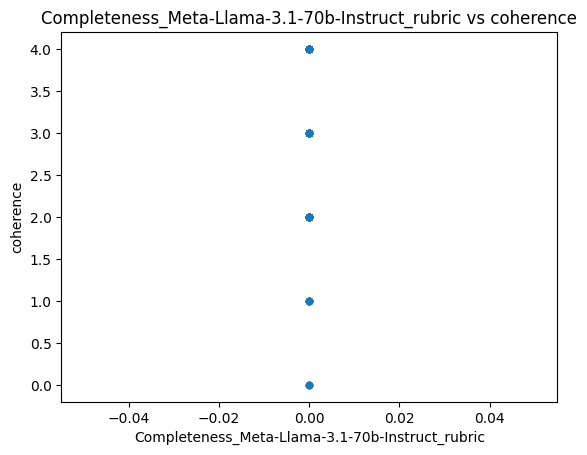

In [18]:
for target_column in dataset.target_columns:
    metric = get_top_metric_by_validation(dev, target_column, True)
    plot_metric_target_scatterplot(test, metric, target_column)
